In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%matplotlib?

In [3]:
#定义一个读取文件生成数据的函数，然后返回生成的数据
#这里1、使用format进行字符串的格式化操作
#2、运用 python的with 方法方便的进行异常的处理，和对资源的清理，省了些 try catch finally的步骤
def open_csv(csv_name):
    with open(r'D:\ml\rossmann-store-sales\{}'.format(csv_name)) as f:
        data = pd.read_csv(f)
    return data

In [4]:
#分别创建 训练数据集，测试数据集，和商店的描述数据
data_store = open_csv('store.csv')
data_train = open_csv('train.csv')
data_test = open_csv('test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
data_store.head().append(data_store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [6]:
data_train.head().append(data_train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
data_test.head().append(data_test.tail())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [10]:
#查看数据缺失
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [11]:
#商店的缺失数据分析
#CompetitionDistance
data_store[pd.isnull(data_store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [12]:
comp_month_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceMonth)].Store.unique()

In [13]:
comp_year_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceYear)].Store.unique()

In [14]:
(comp_month_nan_list == comp_year_nan_list).all()

True

竞争对手开启年份月份某些店铺存在为空的情况，认为数据丢失，考虑直接写为0

In [15]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceWeek)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [16]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceYear)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [17]:
df_nan_prom2 = data_store[pd.isnull(data_store.PromoInterval)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

上面三行分析得到促销相关的时间、时段信息为空，均是出现在Promo2 = 0 即无促销的情况下，因而对于促销相关的字段考虑直接写0

In [18]:
#分析缺失的数据
#测试集缺失数据
data_test[pd.isnull(data_test.Open)]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


缺失的数据都来自于 同一个店铺，无周末，无假期，且部分有促销，判定为正常营业，在特征处理时设置成1

下面具体分析每个字段的异常情况

In [19]:
#查看每个数据集合每一列的取值情况
data_store.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

需要对字符串进行数值化

In [20]:
data_store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

需要对字符串进行数值化

In [21]:
data_store.CompetitionDistance.describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [22]:
data_store.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

取值是一月到12月

In [23]:
data_store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [24]:
data_store.Promo2.unique()

array([0, 1], dtype=int64)

结果是有促销或者无促销

In [25]:
data_store.Promo2SinceWeek.unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

一年有52周，取值正常

In [26]:
data_store.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

除去空值外，年份情况无异常

In [27]:
data_store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

连续的促销为每年的固定月份，数据无异常,特征处理时，需要将特征处理为数值变量

In [28]:
#查看训练数据的情况
data_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

星期数为周一到周日，无问题

In [29]:
data_train.Date.unique()

array(['2015/7/31', '2015/7/30', '2015/7/29', '2015/7/28', '2015/7/27',
       '2015/7/26', '2015/7/25', '2015/7/24', '2015/7/23', '2015/7/22',
       '2015/7/21', '2015/7/20', '2015/7/19', '2015/7/18', '2015/7/17',
       '2015/7/16', '2015/7/15', '2015/7/14', '2015/7/13', '2015/7/12',
       '2015/7/11', '2015/7/10', '2015/7/9', '2015/7/8', '2015/7/7',
       '2015/7/6', '2015/7/5', '2015/7/4', '2015/7/3', '2015/7/2',
       '2015/7/1', '2015/6/30', '2015/6/29', '2015/6/28', '2015/6/27',
       '2015/6/26', '2015/6/25', '2015/6/24', '2015/6/23', '2015/6/22',
       '2015/6/21', '2015/6/20', '2015/6/19', '2015/6/18', '2015/6/17',
       '2015/6/16', '2015/6/15', '2015/6/14', '2015/6/13', '2015/6/12',
       '2015/6/11', '2015/6/10', '2015/6/9', '2015/6/8', '2015/6/7',
       '2015/6/6', '2015/6/5', '2015/6/4', '2015/6/3', '2015/6/2',
       '2015/6/1', '2015/5/31', '2015/5/30', '2015/5/29', '2015/5/28',
       '2015/5/27', '2015/5/26', '2015/5/25', '2015/5/24', '2015/5/23',
       '20

In [30]:
data_train.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
data_train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [32]:
data_train.Open.unique()

array([1, 0], dtype=int64)

In [33]:
data_train.Promo.unique()

array([1, 0], dtype=int64)

In [34]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

这个数据有点奇怪，有两个0 的数据 需要进行处理，合并，同时字母需要进行数值化

In [7]:
data_train.StateHoliday.replace(0,'0',inplace = True)

In [36]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [37]:
data_train.SchoolHoliday.unique()

array([1, 0], dtype=int64)

In [38]:
data_test.DayOfWeek.unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [39]:
data_test.Open.unique()

array([ 1., nan,  0.])

In [40]:
data_test.Promo.unique()

array([1, 0], dtype=int64)

In [41]:
data_test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [42]:
data_test.SchoolHoliday.unique()

array([0, 1], dtype=int64)

开始对空值和异常值进行处理

In [8]:
data_store.fillna(0, inplace=True)#促销和竞争对手信息缺失补位0

In [9]:
data_test.fillna(1, inplace=True)#open数据缺失，分析后认定为店铺开启，补为1

In [10]:
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

确认 没有空值

In [11]:
#生成新数据
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head().append(data_train_new.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [12]:
data_test_new=pd.merge(data_test,data_store,on='Store',how='left')
data_test_new.Date=pd.to_datetime(data_test_new.Date)
data_test_new.head().append(data_test_new.tail())

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0.0,0.0,0,0.0,0.0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


开始进行数据分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'sales(W)')

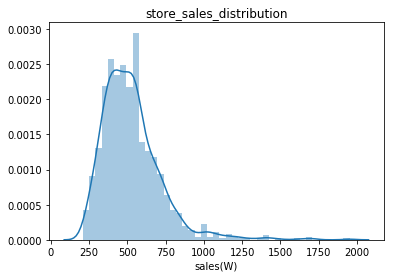

In [48]:
#每家店sales总额的分布
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
#df1.head()
sns.distplot(df1)
plt.title('store_sales_distribution')
plt.xlabel('sales(W)')

[Text(0.5, 1.0, 'StoreType-sum-sales')]

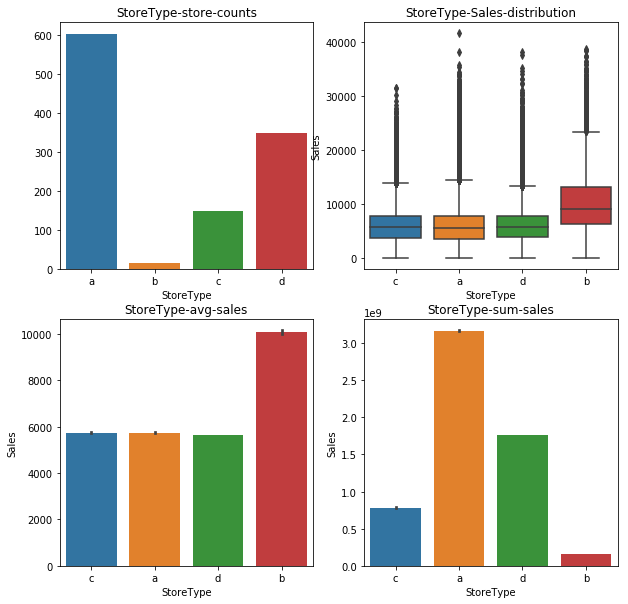

In [49]:
#不同店铺种类的数据分布情况
#StoreType
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('StoreType').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'StoreType-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'StoreType-Sales-distribution'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'StoreType-avg-sales'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'StoreType-sum-sales'})



[Text(0.5, 1.0, 'Assortment-sum-sales')]

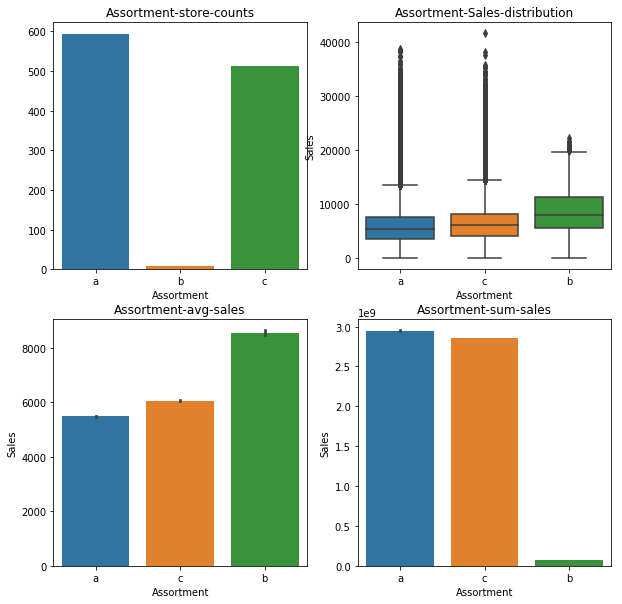

In [51]:
#对不同分类级别的店铺观察 分布情况
#Assortment
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('Assortment').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'Assortment-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'Assortment-Sales-distribution'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'Assortment-avg-sales'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'Assortment-sum-sales'})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[Text(0.5, 1.0, 'CompetitionOpen-avg-sales')]

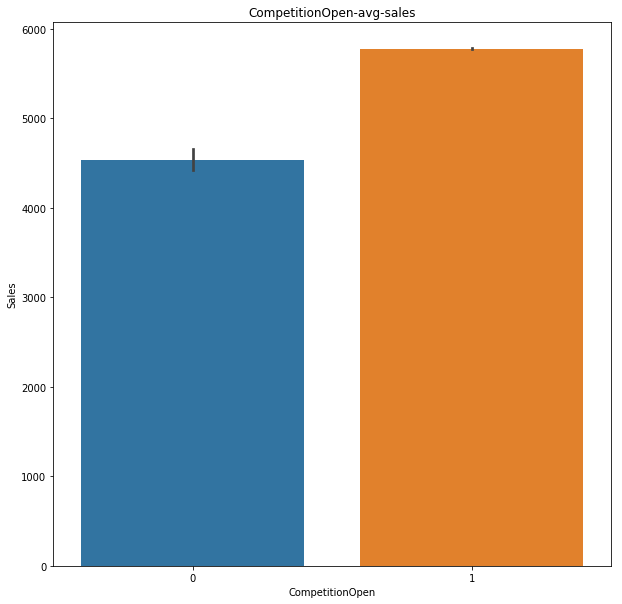

In [52]:
#探索竞争者的一些关系
#探索与竞争者有无的关系
df = data_train_new[['CompetitionDistance','Sales']]

df['CompetitionOpen'] = df.CompetitionDistance.apply(lambda x: 1 if x > 0 else 0)       


fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.barplot(y='Sales',x='CompetitionOpen',data=df,estimator=mean,ax=ax)
ax.set(**{'title':'CompetitionOpen-avg-sales'})




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
No handles with labels found to put in legend.


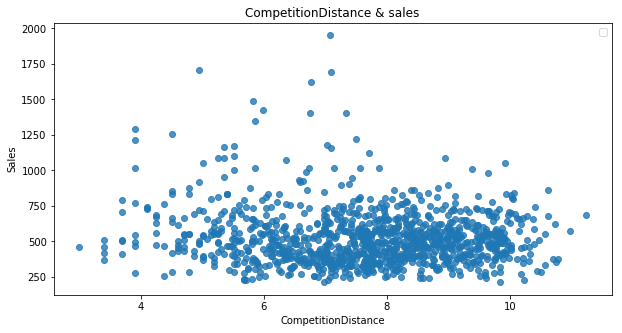

In [53]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('CompetitionDistance & sales')
plt.legend(loc='best')


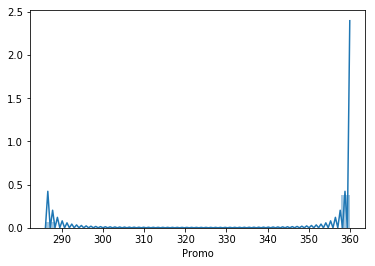

In [54]:
#促销的相关分析
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5, 1.0, 'Promo_counts')]

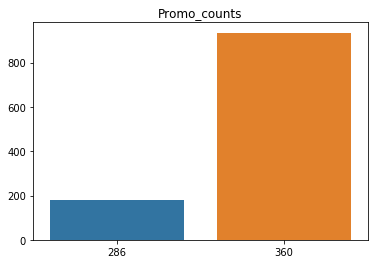

In [55]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'Promo_counts'})

[Text(0.5, 1.0, 'Promo & sales')]

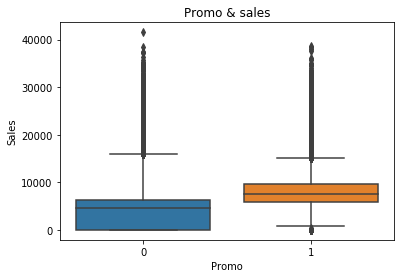

In [56]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'Promo & sales'})

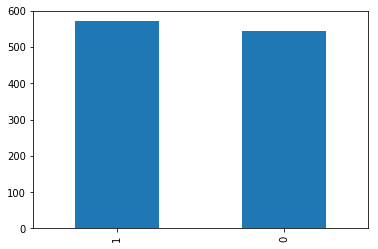

In [57]:
#季节促销的影响
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')

[Text(0.5, 1.0, 'promo2 & sales')]

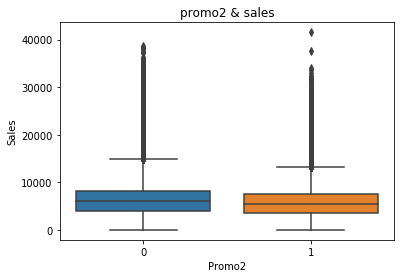

In [58]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'promo2 & sales'})

[Text(0.5, 1.0, 'StateHoliday & sales > 0 ')]

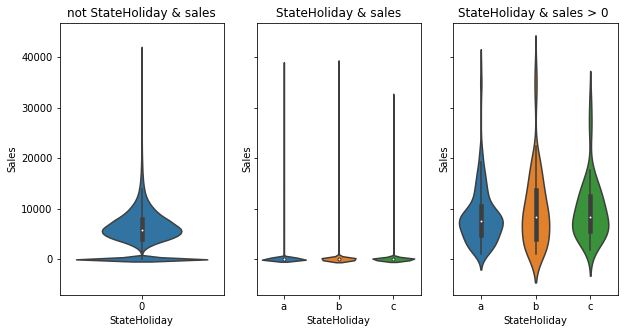

In [59]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='0'],ax=ax[0])
ax[0].set(**{'title':'not StateHoliday & sales'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='0'],ax=ax[1])
ax[1].set(**{'title':'StateHoliday & sales'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='0')&(data_train_new.Sales>0)],ax=ax[2])
ax[2].set(**{'title':'StateHoliday & sales > 0 '})

[Text(0.5, 1.0, 'SchoolHoliday & sales（Sales>=15000）')]

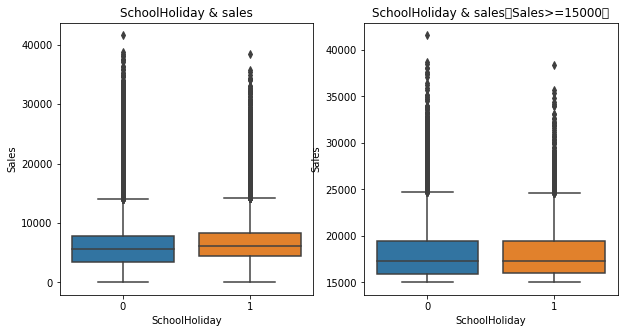

In [60]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday & sales'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday & sales（Sales>=15000）'})


Text(0.5, 1.0, 'DayOfWeek & Sales')

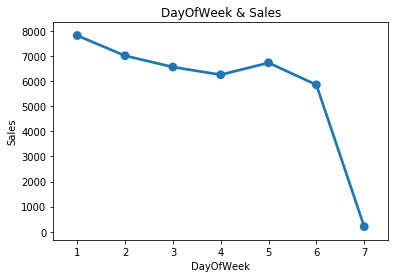

In [61]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('DayOfWeek & Sales')

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'DayOfWeek open rate')

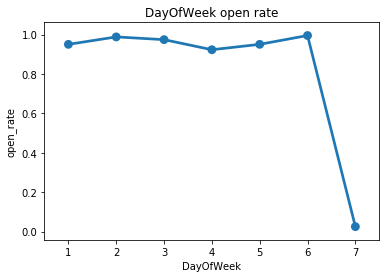

In [62]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('DayOfWeek open rate')

[Text(0.5, 1.0, 'Customers & sales')]

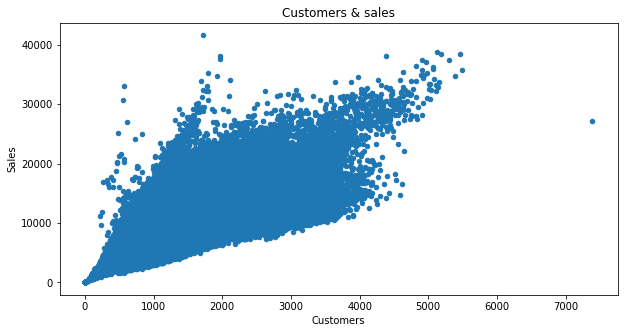

In [63]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'Customers & sales'})

[Text(0.5, 1.0, 'open & sales')]

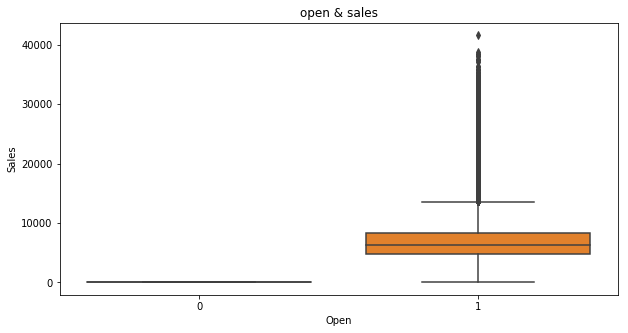

In [64]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'open & sales'})

Text(0.5, 1.0, 'month-avg-sales')

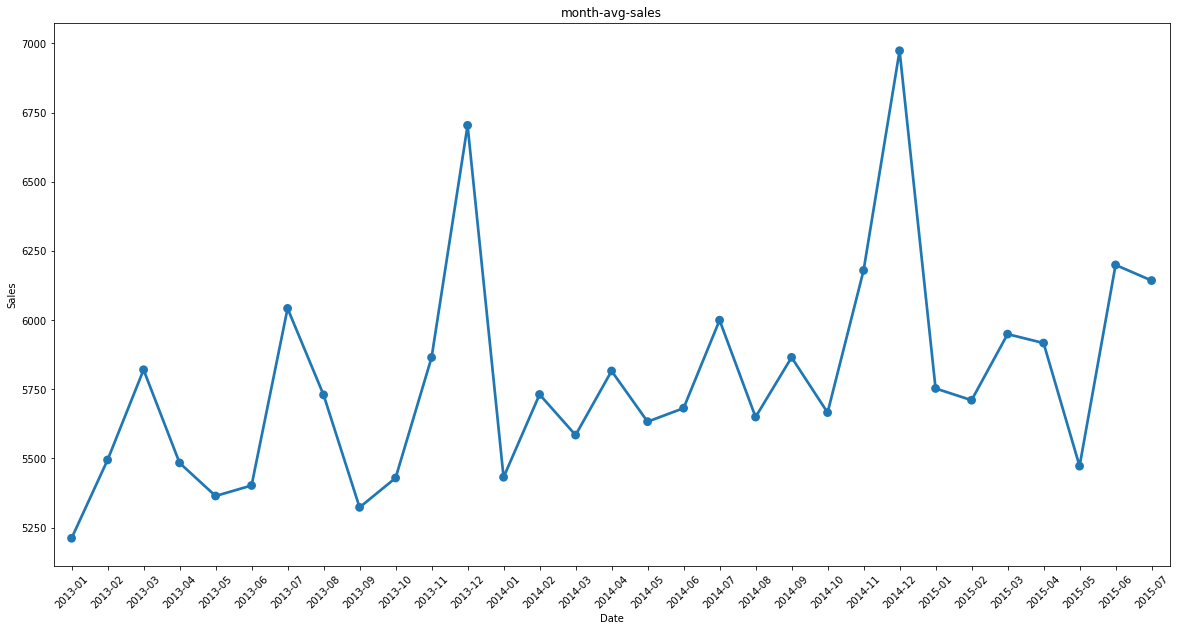

In [65]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('month-avg-sales')


In [13]:
#进入特征构建过程
#将数据分为训练集与测试集进行特征构建
#将数据先按照日期进行排序，然后取前面的作为训练集，后面6周的数据作为测试集
data_train_new = data_train_new.sort_values(['Date'],ascending = False)
ho_test = data_train_new[:6*7*1115]
ho_train = data_train_new[6*7*1115:]

In [14]:
#对于不开的店铺，销量是0，并没有分析的价值，这里直接将对应的数据去掉
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [68]:
#检查一下train和test数据集
ho_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
742,743,5,2015-07-31,5085,501,1,1,0,1,a,a,6710.0,11.0,2003.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
748,749,5,2015-07-31,6612,716,1,1,0,1,a,a,3410.0,8.0,2011.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct"
747,748,5,2015-07-31,7481,578,1,1,0,1,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
746,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0


In [69]:
ho_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
47570,741,5,2015-06-19,7329,938,1,1,0,0,d,c,11900.0,0.0,0.0,0,0.0,0.0,0
47576,747,5,2015-06-19,9367,783,1,1,0,0,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0
47575,746,5,2015-06-19,7856,576,1,1,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec"
47574,745,5,2015-06-19,8074,744,1,1,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
47573,744,5,2015-06-19,8626,913,1,1,0,0,a,a,1370.0,12.0,2011.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


In [15]:
#开始进行特征工程的构建
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [16]:
#对训练数据和测试数据集合使用特征工程
print('Features creation begin')
features_create(ho_train)
features_create(ho_test)
features_create(data_test_new)
print('Features creation finished')

Features creation begin
Features creation finished


In [17]:
#将无用的特征去除掉
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [127]:
data_test_new.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.0,24189.5,Sept,0
1,2,3,3,2015-09-17,1.0,1,0,0,1,1,...,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,54.0,Sept,0
2,3,7,3,2015-09-17,1.0,1,0,0,1,3,...,0.0,,2015,9,17,38,29.0,24189.5,Sept,0
3,4,8,3,2015-09-17,1.0,1,0,0,1,1,...,0.0,,2015,9,17,38,11.0,24189.5,Sept,0
4,5,9,3,2015-09-17,1.0,1,0,0,1,3,...,0.0,,2015,9,17,38,181.0,24189.5,Sept,0


In [18]:
#对要计算的结果，也把对应的特征删掉
xtest =data_test_new.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)
#data_test_new.head()

In [19]:
xtest.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,3,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,9,17,38,84.0,24189.5,0
1,3,3,1,0,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,9,17,38,105.0,54.0,0
2,7,3,1,0,0,1,3,24000.0,4.0,2013.0,0,0.0,0.0,2015,9,17,38,29.0,24189.5,0
3,8,3,1,0,0,1,1,7520.0,10.0,2014.0,0,0.0,0.0,2015,9,17,38,11.0,24189.5,0
4,9,3,1,0,0,1,3,2030.0,8.0,2000.0,0,0.0,0.0,2015,9,17,38,181.0,24189.5,0


In [73]:
#观察去除掉之后的情况
ho_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
47570,741,4,7329,1,0,0,4,3,11900.0,0.0,...,0,0.0,0.0,2015,6,19,25,24186.0,24186.25,0
47576,747,4,9367,1,0,0,3,3,45740.0,8.0,...,0,0.0,0.0,2015,6,19,25,82.0,24186.25,0
47575,746,4,7856,1,0,0,4,3,4330.0,2.0,...,1,35.0,2011.0,2015,6,19,25,52.0,45.50,1
47574,745,4,8074,1,0,0,1,1,17650.0,11.0,...,1,37.0,2009.0,2015,6,19,25,19.0,69.00,0
47573,744,4,8626,1,0,0,1,1,1370.0,12.0,...,1,40.0,2014.0,2015,6,19,25,42.0,8.25,0


In [74]:
ho_test.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,5263,1,0,1,3,1,1270.0,9.0,...,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
742,743,4,5085,1,0,1,1,1,6710.0,11.0,...,1,14.0,2012.0,2015,7,31,31,140.0,40.25,1
748,749,4,6612,1,0,1,1,1,3410.0,8.0,...,1,14.0,2015.0,2015,7,31,31,47.0,4.25,1
747,748,4,7481,1,0,1,4,1,2380.0,3.0,...,1,14.0,2011.0,2015,7,31,31,64.0,52.25,1
746,747,4,10708,1,0,1,3,3,45740.0,8.0,...,0,0.0,0.0,2015,7,31,31,83.0,24187.75,0


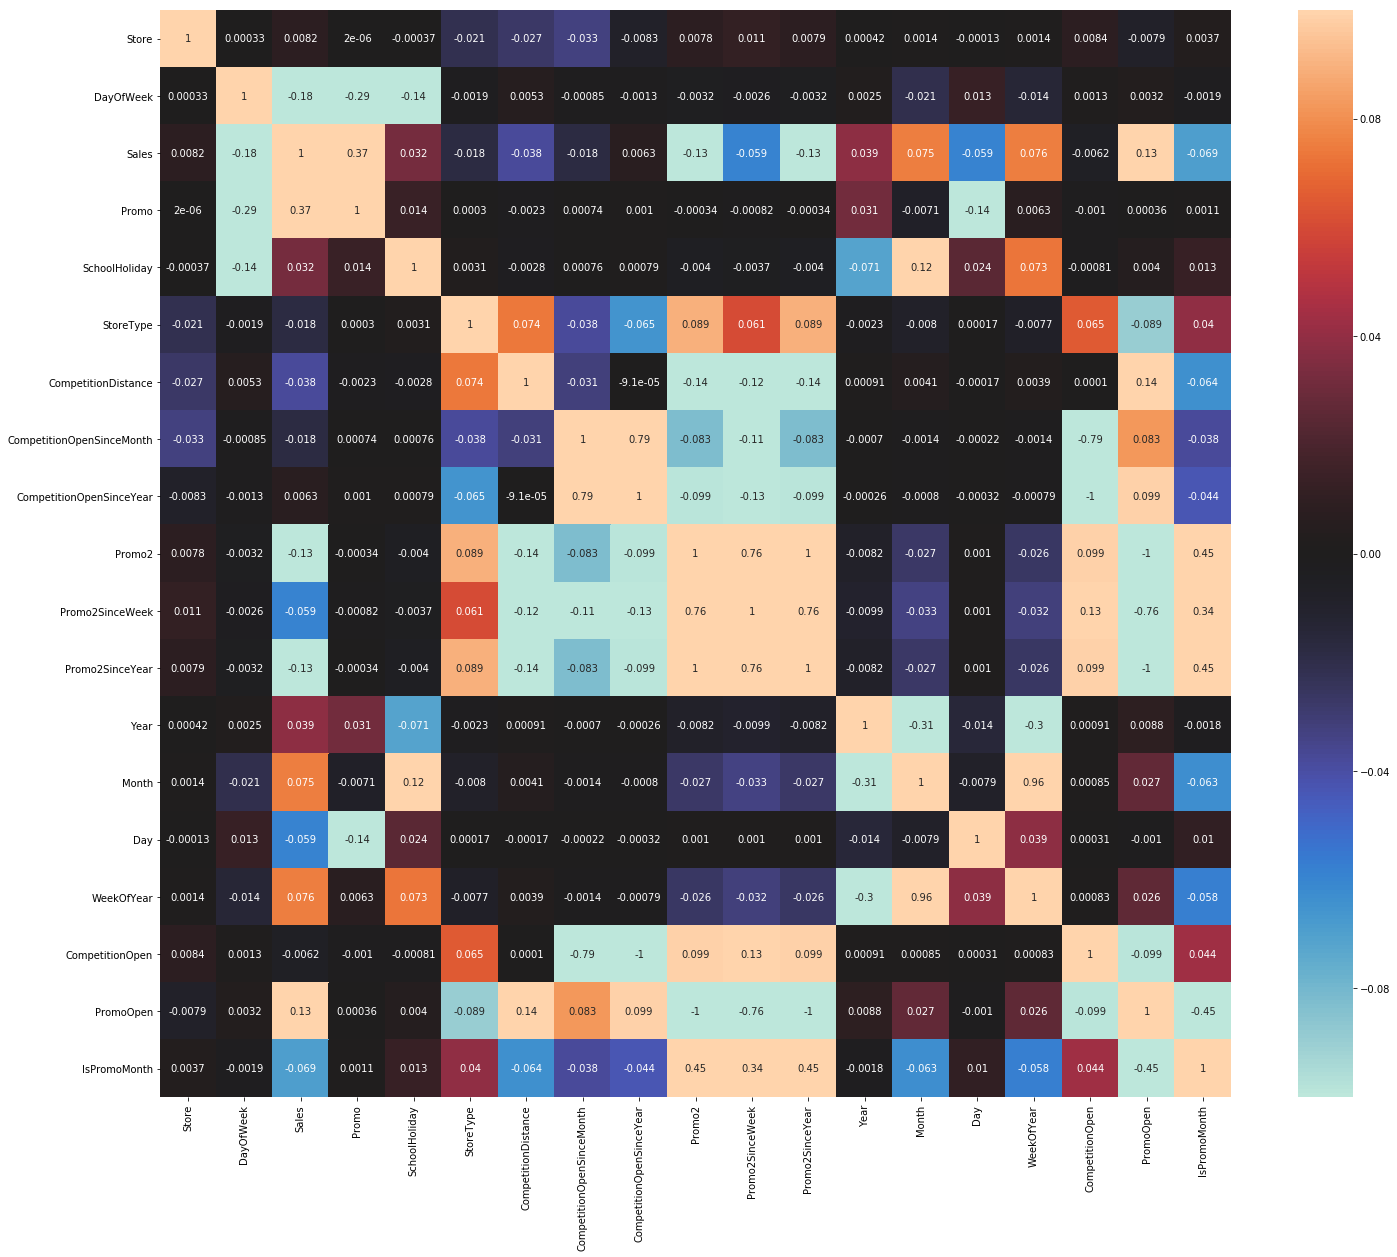

In [75]:
#观察特征之间的相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

与销量相关性最强的特征为 打折 Promo，以及开启的月份

In [20]:
#将预测的标签与特征分开，并将标签进行对数处理，方便进行计算
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [21]:
#自定义评估函数（rmspe）
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [26]:
#基准模型，采用线性回归建模
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split


lr_model=LinearRegression()
lr_model.fit(ho_xtrain, ho_ytrain) 
print('系数矩阵:\n',lr_model.coef_)
print('线性回归模型:\n',lr_model)
y_lr_predict=lr_model.predict(ho_xtest)
error = rmspe(ho_ytest,y_lr_predict)
print("rmspe---lr_model:\n",error)

y_lr_predict=lr_model.predict(ho_xtrain)
error = rmspe(ho_ytrain,y_lr_predict)
print("rmspe---lr_model:\n",error)



系数矩阵:
 [-1.47805722e-06 -1.97737152e-02  3.21308079e-01  7.11504917e-02
  1.80899695e-02  2.55542024e-03  5.96160990e-02 -3.93807652e-06
 -3.75992438e-03  2.22449437e-02  3.41855382e+01  4.63736765e-03
  8.98447199e-02 -8.33529429e-02  6.78114460e-03 -6.75665867e-04
 -1.48535517e-03  1.85198460e-03  8.91023075e-03 -9.36536107e-03]
线性回归模型:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
rmspe---lr_model:
 0.04218918630052368
rmspe---lr_model:
 0.04356994895692375


In [28]:
test_probs = lr_model.predict(xtest)
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_lr.csv", index=False)

In [29]:
#设置一组参数 输入到模型中
eta_list = [0.03,0.005]
#max_depth_list = [10,15]
max_depth_list = [10]
#subsample_list = [0.8,0.9]
subsample_list = [0.8]
#colsample_bytree_list = [0.7,0.8,0.9]
colsample_bytree_list = [0.7]
#num_boost_round_list = [6000,20000]

In [30]:
dict_params = {}

idx = 2
for eta in eta_list:
    for max_depth in max_depth_list:
        for subsample in subsample_list:
            for colsample_bytree in colsample_bytree_list:
                    if eta == 0.03 and max_depth == 10 and subsample == 0.8 and colsample_bytree == 0.7:continue
                    if idx not in dict_params:
                        dict_params[idx] = {
                            "objective": "reg:linear",
                            "booster" : "gbtree",
                            "eta": eta,
                            "max_depth": max_depth,
                            "subsample": subsample,
                            "colsample_bytree": colsample_bytree,
                            "silent": 1,
                            "seed": 10
                                          }
                        idx += 1 
                     
                

In [31]:
dict_params

{2: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.005,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10}}

In [32]:
import xgboost as xgb

dtrain = xgb.DMatrix(ho_xtrain.values, ho_ytrain.values)
dvalid = xgb.DMatrix(ho_xtest.values, ho_ytest.values)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [104]:
dtrain

In [33]:
import datetime
#训练模型
gbm_list = []
print("Train  XGBoost model")


for key in dict_params:
    params = dict_params[key]
    print(params) 
    print("begins-----")
    start = datetime.datetime.now()
    
    if params['eta'] == 0.005:
        num_boost_round = 50000
        early_stopping_rounds = 5000
    else:
        num_boost_round = 10000
        early_stopping_rounds = 1000
        
    
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,early_stopping_rounds=early_stopping_rounds, feval=rmspe_xg, verbose_eval=True)
    end = datetime.datetime.now()
    
    print(str(key) + '----------Training time is {:2f} s.'.format((end-start).total_seconds()))
    gbm_list.append([key,gbm])

Train  XGBoost model
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.005, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.7, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.2271	eval-rmse:8.23385	train-rmspe:0.999876	eval-rmspe:0.999878
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 5000 rounds.
[1]	train-rmse:8.18603	eval-rmse:8.19282	train-rmspe:0.999864	eval-rmspe:0.999865
[2]	train-rmse:8.1452	eval-rmse:8.15192	train-rmspe:0.999851	eval-rmspe:0.999853
[3]	train-rmse:8.10456	eval-rmse:8.1112	train-rmspe:0.999838	eval-rmspe:0.999839
[4]	train-rmse:8.06413	eval-rmse:8.07066	train-rmspe:0.999824	eval-rmspe:0.999826
[5]	train-rmse:8.02391	eval-rmse:8.03033	train-rmspe:0.99981	eval-rmspe:0.999812
[6]	train-rmse:7.98389	eval-rmse:7.99024	train-rmspe:0.999795	eval-rmspe:0.999797
[7]	train-rmse:7.94405	eval-rmse:7.95048	train-rmspe:0.99978	eval-rmspe:0.999782
[8]	train-rmse:7.9044

[96]	train-rmse:5.09182	eval-rmse:5.09881	train-rmspe:0.993496	eval-rmspe:0.99357
[97]	train-rmse:5.06646	eval-rmse:5.07349	train-rmspe:0.993325	eval-rmspe:0.993402
[98]	train-rmse:5.04123	eval-rmse:5.04829	train-rmspe:0.993152	eval-rmspe:0.993231
[99]	train-rmse:5.01613	eval-rmse:5.02324	train-rmspe:0.992974	eval-rmspe:0.993056
[100]	train-rmse:4.99115	eval-rmse:4.99829	train-rmspe:0.992794	eval-rmspe:0.992877
[101]	train-rmse:4.9663	eval-rmse:4.97337	train-rmspe:0.992609	eval-rmspe:0.992694
[102]	train-rmse:4.94159	eval-rmse:4.94862	train-rmspe:0.992421	eval-rmspe:0.992508
[103]	train-rmse:4.91699	eval-rmse:4.92407	train-rmspe:0.992229	eval-rmspe:0.992319
[104]	train-rmse:4.89251	eval-rmse:4.8996	train-rmspe:0.992033	eval-rmspe:0.992125
[105]	train-rmse:4.86815	eval-rmse:4.87525	train-rmspe:0.991835	eval-rmspe:0.991929
[106]	train-rmse:4.84391	eval-rmse:4.85099	train-rmspe:0.991632	eval-rmspe:0.991728
[107]	train-rmse:4.8198	eval-rmse:4.8269	train-rmspe:0.991425	eval-rmspe:0.991524
[

[195]	train-rmse:3.10994	eval-rmse:3.11378	train-rmspe:0.952326	eval-rmspe:0.952661
[196]	train-rmse:3.09453	eval-rmse:3.09826	train-rmspe:0.951588	eval-rmspe:0.951923
[197]	train-rmse:3.07922	eval-rmse:3.08291	train-rmspe:0.950844	eval-rmspe:0.951181
[198]	train-rmse:3.06395	eval-rmse:3.06763	train-rmspe:0.950092	eval-rmspe:0.950433
[199]	train-rmse:3.04879	eval-rmse:3.05232	train-rmspe:0.949332	eval-rmspe:0.949669
[200]	train-rmse:3.03369	eval-rmse:3.0371	train-rmspe:0.948564	eval-rmspe:0.948898
[201]	train-rmse:3.01868	eval-rmse:3.02192	train-rmspe:0.947788	eval-rmspe:0.948118
[202]	train-rmse:3.00374	eval-rmse:3.00677	train-rmspe:0.947005	eval-rmspe:0.947328
[203]	train-rmse:2.98888	eval-rmse:2.99195	train-rmspe:0.946213	eval-rmspe:0.946542
[204]	train-rmse:2.97409	eval-rmse:2.9771	train-rmspe:0.945414	eval-rmspe:0.945743
[205]	train-rmse:2.95937	eval-rmse:2.96227	train-rmspe:0.944607	eval-rmspe:0.944933
[206]	train-rmse:2.94473	eval-rmse:2.94758	train-rmspe:0.943795	eval-rmspe:0.9

[293]	train-rmse:1.91673	eval-rmse:1.91458	train-rmspe:0.843982	eval-rmspe:0.843687
[294]	train-rmse:1.90736	eval-rmse:1.90522	train-rmspe:0.842525	eval-rmspe:0.842222
[295]	train-rmse:1.89802	eval-rmse:1.89588	train-rmspe:0.841069	eval-rmspe:0.840758
[296]	train-rmse:1.88874	eval-rmse:1.88662	train-rmspe:0.839603	eval-rmspe:0.83929
[297]	train-rmse:1.8795	eval-rmse:1.87735	train-rmspe:0.838131	eval-rmspe:0.837803
[298]	train-rmse:1.87033	eval-rmse:1.8681	train-rmspe:0.83665	eval-rmspe:0.836299
[299]	train-rmse:1.8612	eval-rmse:1.85888	train-rmspe:0.835163	eval-rmspe:0.834787
[300]	train-rmse:1.85211	eval-rmse:1.8497	train-rmspe:0.83367	eval-rmspe:0.833269
[301]	train-rmse:1.84308	eval-rmse:1.84062	train-rmspe:0.832173	eval-rmspe:0.831753
[302]	train-rmse:1.83407	eval-rmse:1.83163	train-rmspe:0.830673	eval-rmspe:0.830245
[303]	train-rmse:1.82509	eval-rmse:1.82263	train-rmspe:0.829174	eval-rmspe:0.828733
[304]	train-rmse:1.81616	eval-rmse:1.81369	train-rmspe:0.827666	eval-rmspe:0.827213

[391]	train-rmse:1.19199	eval-rmse:1.18704	train-rmspe:0.68159	eval-rmspe:0.678688
[392]	train-rmse:1.1863	eval-rmse:1.1813	train-rmspe:0.679824	eval-rmspe:0.676871
[393]	train-rmse:1.18068	eval-rmse:1.17574	train-rmspe:0.678051	eval-rmspe:0.675082
[394]	train-rmse:1.17507	eval-rmse:1.17014	train-rmspe:0.676283	eval-rmspe:0.67329
[395]	train-rmse:1.1695	eval-rmse:1.16454	train-rmspe:0.67451	eval-rmspe:0.671467
[396]	train-rmse:1.16396	eval-rmse:1.15885	train-rmspe:0.672737	eval-rmspe:0.6696
[397]	train-rmse:1.15844	eval-rmse:1.15337	train-rmspe:0.670968	eval-rmspe:0.667806
[398]	train-rmse:1.15297	eval-rmse:1.14796	train-rmspe:0.669196	eval-rmspe:0.666017
[399]	train-rmse:1.14749	eval-rmse:1.14248	train-rmspe:0.667425	eval-rmspe:0.664211
[400]	train-rmse:1.14204	eval-rmse:1.13703	train-rmspe:0.665658	eval-rmspe:0.662406
[401]	train-rmse:1.13664	eval-rmse:1.13163	train-rmspe:0.663887	eval-rmspe:0.660596
[402]	train-rmse:1.13126	eval-rmse:1.12617	train-rmspe:0.662117	eval-rmspe:0.658766


[488]	train-rmse:0.760666	eval-rmse:0.752105	train-rmspe:0.516631	eval-rmspe:0.507202
[489]	train-rmse:0.757294	eval-rmse:0.748693	train-rmspe:0.515079	eval-rmspe:0.505556
[490]	train-rmse:0.753935	eval-rmse:0.745297	train-rmspe:0.513527	eval-rmspe:0.50392
[491]	train-rmse:0.750602	eval-rmse:0.741977	train-rmspe:0.51198	eval-rmspe:0.502307
[492]	train-rmse:0.747227	eval-rmse:0.738605	train-rmspe:0.510432	eval-rmspe:0.500692
[493]	train-rmse:0.743874	eval-rmse:0.735243	train-rmspe:0.508884	eval-rmspe:0.499071
[494]	train-rmse:0.740594	eval-rmse:0.731916	train-rmspe:0.507347	eval-rmspe:0.49744
[495]	train-rmse:0.737342	eval-rmse:0.728611	train-rmspe:0.50582	eval-rmspe:0.495814
[496]	train-rmse:0.734081	eval-rmse:0.725308	train-rmspe:0.504292	eval-rmspe:0.494201
[497]	train-rmse:0.730853	eval-rmse:0.721953	train-rmspe:0.502774	eval-rmspe:0.492543
[498]	train-rmse:0.727647	eval-rmse:0.718718	train-rmspe:0.501261	eval-rmspe:0.490942
[499]	train-rmse:0.724459	eval-rmse:0.715532	train-rmspe:0

[584]	train-rmse:0.50876	eval-rmse:0.499518	train-rmspe:0.389922	eval-rmspe:0.372568
[585]	train-rmse:0.506756	eval-rmse:0.497549	train-rmspe:0.388844	eval-rmspe:0.371425
[586]	train-rmse:0.504791	eval-rmse:0.495612	train-rmspe:0.387794	eval-rmspe:0.370302
[587]	train-rmse:0.502885	eval-rmse:0.493699	train-rmspe:0.386759	eval-rmspe:0.36918
[588]	train-rmse:0.500943	eval-rmse:0.491784	train-rmspe:0.385721	eval-rmspe:0.368066
[589]	train-rmse:0.498951	eval-rmse:0.489792	train-rmspe:0.384659	eval-rmspe:0.36691
[590]	train-rmse:0.497009	eval-rmse:0.487875	train-rmspe:0.383611	eval-rmspe:0.365789
[591]	train-rmse:0.49508	eval-rmse:0.485959	train-rmspe:0.382568	eval-rmspe:0.364667
[592]	train-rmse:0.493227	eval-rmse:0.484055	train-rmspe:0.381568	eval-rmspe:0.363547
[593]	train-rmse:0.49134	eval-rmse:0.482213	train-rmspe:0.380552	eval-rmspe:0.362464
[594]	train-rmse:0.489454	eval-rmse:0.480349	train-rmspe:0.379532	eval-rmspe:0.361374
[595]	train-rmse:0.487581	eval-rmse:0.47847	train-rmspe:0.3

[680]	train-rmse:0.365843	eval-rmse:0.359113	train-rmspe:0.313398	eval-rmspe:0.289541
[681]	train-rmse:0.364771	eval-rmse:0.358081	train-rmspe:0.312841	eval-rmspe:0.288943
[682]	train-rmse:0.363732	eval-rmse:0.357114	train-rmspe:0.312316	eval-rmspe:0.288387
[683]	train-rmse:0.362668	eval-rmse:0.356085	train-rmspe:0.311767	eval-rmspe:0.287793
[684]	train-rmse:0.361569	eval-rmse:0.355024	train-rmspe:0.311197	eval-rmspe:0.287176
[685]	train-rmse:0.360524	eval-rmse:0.35401	train-rmspe:0.310676	eval-rmspe:0.28659
[686]	train-rmse:0.359508	eval-rmse:0.353025	train-rmspe:0.31016	eval-rmspe:0.286027
[687]	train-rmse:0.358471	eval-rmse:0.352031	train-rmspe:0.309638	eval-rmspe:0.285454
[688]	train-rmse:0.357464	eval-rmse:0.351026	train-rmspe:0.309125	eval-rmspe:0.28489
[689]	train-rmse:0.356476	eval-rmse:0.350108	train-rmspe:0.308631	eval-rmspe:0.284366
[690]	train-rmse:0.355462	eval-rmse:0.349117	train-rmspe:0.308126	eval-rmspe:0.28379
[691]	train-rmse:0.354477	eval-rmse:0.348212	train-rmspe:0.

[776]	train-rmse:0.288367	eval-rmse:0.285475	train-rmspe:0.2769	eval-rmspe:0.249444
[777]	train-rmse:0.287832	eval-rmse:0.285002	train-rmspe:0.276689	eval-rmspe:0.249234
[778]	train-rmse:0.287232	eval-rmse:0.284422	train-rmspe:0.276446	eval-rmspe:0.248946
[779]	train-rmse:0.286627	eval-rmse:0.283879	train-rmspe:0.276189	eval-rmspe:0.248669
[780]	train-rmse:0.286079	eval-rmse:0.283365	train-rmspe:0.275975	eval-rmspe:0.248426
[781]	train-rmse:0.285577	eval-rmse:0.282894	train-rmspe:0.275791	eval-rmspe:0.248226
[782]	train-rmse:0.285011	eval-rmse:0.282373	train-rmspe:0.275539	eval-rmspe:0.247961
[783]	train-rmse:0.284496	eval-rmse:0.281901	train-rmspe:0.275353	eval-rmspe:0.247761
[784]	train-rmse:0.28386	eval-rmse:0.281299	train-rmspe:0.275068	eval-rmspe:0.247434
[785]	train-rmse:0.283371	eval-rmse:0.280852	train-rmspe:0.2749	eval-rmspe:0.247248
[786]	train-rmse:0.282873	eval-rmse:0.280421	train-rmspe:0.274669	eval-rmspe:0.247068
[787]	train-rmse:0.282309	eval-rmse:0.279902	train-rmspe:0.

[872]	train-rmse:0.247678	eval-rmse:0.248814	train-rmspe:0.262096	eval-rmspe:0.234253
[873]	train-rmse:0.247405	eval-rmse:0.248574	train-rmspe:0.262033	eval-rmspe:0.234182
[874]	train-rmse:0.247141	eval-rmse:0.248344	train-rmspe:0.261979	eval-rmspe:0.234121
[875]	train-rmse:0.24686	eval-rmse:0.248102	train-rmspe:0.261914	eval-rmspe:0.234051
[876]	train-rmse:0.246545	eval-rmse:0.247813	train-rmspe:0.261825	eval-rmspe:0.233945
[877]	train-rmse:0.246233	eval-rmse:0.247548	train-rmspe:0.261728	eval-rmspe:0.233844
[878]	train-rmse:0.245983	eval-rmse:0.247352	train-rmspe:0.261694	eval-rmspe:0.233821
[879]	train-rmse:0.245682	eval-rmse:0.247088	train-rmspe:0.261584	eval-rmspe:0.233724
[880]	train-rmse:0.245405	eval-rmse:0.246847	train-rmspe:0.261516	eval-rmspe:0.233651
[881]	train-rmse:0.245086	eval-rmse:0.246557	train-rmspe:0.261406	eval-rmspe:0.23353
[882]	train-rmse:0.244802	eval-rmse:0.246322	train-rmspe:0.261348	eval-rmspe:0.233462
[883]	train-rmse:0.244522	eval-rmse:0.246099	train-rmspe

[968]	train-rmse:0.225408	eval-rmse:0.229999	train-rmspe:0.256044	eval-rmspe:0.228682
[969]	train-rmse:0.225215	eval-rmse:0.229838	train-rmspe:0.255963	eval-rmspe:0.228615
[970]	train-rmse:0.225078	eval-rmse:0.229736	train-rmspe:0.255947	eval-rmspe:0.22863
[971]	train-rmse:0.224956	eval-rmse:0.229651	train-rmspe:0.255946	eval-rmspe:0.228657
[972]	train-rmse:0.224828	eval-rmse:0.229551	train-rmspe:0.255959	eval-rmspe:0.228667
[973]	train-rmse:0.224664	eval-rmse:0.229431	train-rmspe:0.255908	eval-rmspe:0.228648
[974]	train-rmse:0.224404	eval-rmse:0.229192	train-rmspe:0.25579	eval-rmspe:0.228504
[975]	train-rmse:0.224291	eval-rmse:0.229121	train-rmspe:0.2558	eval-rmspe:0.228533
[976]	train-rmse:0.224156	eval-rmse:0.229034	train-rmspe:0.255786	eval-rmspe:0.228547
[977]	train-rmse:0.224031	eval-rmse:0.228953	train-rmspe:0.255777	eval-rmspe:0.228575
[978]	train-rmse:0.223859	eval-rmse:0.228808	train-rmspe:0.255717	eval-rmspe:0.228526
[979]	train-rmse:0.223715	eval-rmse:0.228685	train-rmspe:0

[1063]	train-rmse:0.210594	eval-rmse:0.217963	train-rmspe:0.250332	eval-rmspe:0.224408
[1064]	train-rmse:0.21051	eval-rmse:0.217916	train-rmspe:0.250333	eval-rmspe:0.224434
[1065]	train-rmse:0.21037	eval-rmse:0.21779	train-rmspe:0.250272	eval-rmspe:0.224368
[1066]	train-rmse:0.210173	eval-rmse:0.217626	train-rmspe:0.250156	eval-rmspe:0.224252
[1067]	train-rmse:0.210013	eval-rmse:0.217482	train-rmspe:0.250083	eval-rmspe:0.224169
[1068]	train-rmse:0.209794	eval-rmse:0.217304	train-rmspe:0.249941	eval-rmspe:0.224042
[1069]	train-rmse:0.209741	eval-rmse:0.21726	train-rmspe:0.249971	eval-rmspe:0.224065
[1070]	train-rmse:0.209582	eval-rmse:0.217123	train-rmspe:0.249893	eval-rmspe:0.223971
[1071]	train-rmse:0.20933	eval-rmse:0.216891	train-rmspe:0.249732	eval-rmspe:0.223785
[1072]	train-rmse:0.209199	eval-rmse:0.216782	train-rmspe:0.249681	eval-rmspe:0.223724
[1073]	train-rmse:0.209134	eval-rmse:0.216734	train-rmspe:0.249699	eval-rmspe:0.223738
[1074]	train-rmse:0.209068	eval-rmse:0.216699	tr

[1158]	train-rmse:0.200475	eval-rmse:0.209912	train-rmspe:0.246155	eval-rmspe:0.22097
[1159]	train-rmse:0.20045	eval-rmse:0.209898	train-rmspe:0.246185	eval-rmspe:0.220999
[1160]	train-rmse:0.200413	eval-rmse:0.20988	train-rmspe:0.246195	eval-rmspe:0.221031
[1161]	train-rmse:0.20037	eval-rmse:0.20985	train-rmspe:0.246201	eval-rmspe:0.22103
[1162]	train-rmse:0.200113	eval-rmse:0.209613	train-rmspe:0.246024	eval-rmspe:0.22081
[1163]	train-rmse:0.199942	eval-rmse:0.209468	train-rmspe:0.245901	eval-rmspe:0.220689
[1164]	train-rmse:0.199896	eval-rmse:0.209435	train-rmspe:0.245869	eval-rmspe:0.220692
[1165]	train-rmse:0.199861	eval-rmse:0.209413	train-rmspe:0.24588	eval-rmspe:0.22071
[1166]	train-rmse:0.19979	eval-rmse:0.209358	train-rmspe:0.245715	eval-rmspe:0.220693
[1167]	train-rmse:0.199647	eval-rmse:0.209244	train-rmspe:0.245623	eval-rmspe:0.220602
[1168]	train-rmse:0.199603	eval-rmse:0.209212	train-rmspe:0.245629	eval-rmspe:0.220615
[1169]	train-rmse:0.1995	eval-rmse:0.209128	train-rms

[1253]	train-rmse:0.192201	eval-rmse:0.203087	train-rmspe:0.239969	eval-rmspe:0.216547
[1254]	train-rmse:0.19204	eval-rmse:0.202951	train-rmspe:0.239853	eval-rmspe:0.216423
[1255]	train-rmse:0.192026	eval-rmse:0.202946	train-rmspe:0.239869	eval-rmspe:0.216441
[1256]	train-rmse:0.191924	eval-rmse:0.202859	train-rmspe:0.239804	eval-rmspe:0.21637
[1257]	train-rmse:0.191691	eval-rmse:0.202638	train-rmspe:0.239591	eval-rmspe:0.216137
[1258]	train-rmse:0.191654	eval-rmse:0.202614	train-rmspe:0.239582	eval-rmspe:0.21614
[1259]	train-rmse:0.191551	eval-rmse:0.202526	train-rmspe:0.239493	eval-rmspe:0.216066
[1260]	train-rmse:0.191538	eval-rmse:0.202519	train-rmspe:0.239517	eval-rmspe:0.216082
[1261]	train-rmse:0.191483	eval-rmse:0.202469	train-rmspe:0.239492	eval-rmspe:0.216048
[1262]	train-rmse:0.191245	eval-rmse:0.202246	train-rmspe:0.23929	eval-rmspe:0.215806
[1263]	train-rmse:0.191145	eval-rmse:0.202153	train-rmspe:0.239234	eval-rmspe:0.215729
[1264]	train-rmse:0.191104	eval-rmse:0.202143	t

[1348]	train-rmse:0.184416	eval-rmse:0.196514	train-rmspe:0.234243	eval-rmspe:0.211201
[1349]	train-rmse:0.184261	eval-rmse:0.196364	train-rmspe:0.234114	eval-rmspe:0.21104
[1350]	train-rmse:0.184131	eval-rmse:0.19625	train-rmspe:0.234014	eval-rmspe:0.210936
[1351]	train-rmse:0.184104	eval-rmse:0.19623	train-rmspe:0.23401	eval-rmspe:0.210925
[1352]	train-rmse:0.183934	eval-rmse:0.196076	train-rmspe:0.233867	eval-rmspe:0.210766
[1353]	train-rmse:0.183871	eval-rmse:0.196019	train-rmspe:0.233823	eval-rmspe:0.210709
[1354]	train-rmse:0.183815	eval-rmse:0.195937	train-rmspe:0.233585	eval-rmspe:0.210656
[1355]	train-rmse:0.183671	eval-rmse:0.195816	train-rmspe:0.233462	eval-rmspe:0.21054
[1356]	train-rmse:0.18366	eval-rmse:0.19581	train-rmspe:0.233463	eval-rmspe:0.210547
[1357]	train-rmse:0.183519	eval-rmse:0.195696	train-rmspe:0.233349	eval-rmspe:0.21044
[1358]	train-rmse:0.183452	eval-rmse:0.195625	train-rmspe:0.233038	eval-rmspe:0.210384
[1359]	train-rmse:0.183417	eval-rmse:0.1956	train-r

[1443]	train-rmse:0.17659	eval-rmse:0.189749	train-rmspe:0.226639	eval-rmspe:0.205003
[1444]	train-rmse:0.176475	eval-rmse:0.18965	train-rmspe:0.226523	eval-rmspe:0.204898
[1445]	train-rmse:0.17641	eval-rmse:0.189606	train-rmspe:0.226358	eval-rmspe:0.204861
[1446]	train-rmse:0.176303	eval-rmse:0.189525	train-rmspe:0.226252	eval-rmspe:0.204785
[1447]	train-rmse:0.176294	eval-rmse:0.18952	train-rmspe:0.226228	eval-rmspe:0.204788
[1448]	train-rmse:0.176216	eval-rmse:0.189451	train-rmspe:0.226183	eval-rmspe:0.204723
[1449]	train-rmse:0.176123	eval-rmse:0.189391	train-rmspe:0.226116	eval-rmspe:0.204673
[1450]	train-rmse:0.176035	eval-rmse:0.189308	train-rmspe:0.226047	eval-rmspe:0.204594
[1451]	train-rmse:0.175945	eval-rmse:0.189224	train-rmspe:0.225981	eval-rmspe:0.204506
[1452]	train-rmse:0.175841	eval-rmse:0.189137	train-rmspe:0.225901	eval-rmspe:0.204428
[1453]	train-rmse:0.17579	eval-rmse:0.189094	train-rmspe:0.225865	eval-rmspe:0.20439
[1454]	train-rmse:0.175777	eval-rmse:0.189086	tra

[1538]	train-rmse:0.170306	eval-rmse:0.184673	train-rmspe:0.220706	eval-rmspe:0.20019
[1539]	train-rmse:0.170193	eval-rmse:0.184577	train-rmspe:0.220601	eval-rmspe:0.200087
[1540]	train-rmse:0.170162	eval-rmse:0.184554	train-rmspe:0.220574	eval-rmspe:0.200062
[1541]	train-rmse:0.170132	eval-rmse:0.18453	train-rmspe:0.220547	eval-rmspe:0.200047
[1542]	train-rmse:0.170064	eval-rmse:0.184466	train-rmspe:0.220495	eval-rmspe:0.199986
[1543]	train-rmse:0.17001	eval-rmse:0.184443	train-rmspe:0.220462	eval-rmspe:0.199979
[1544]	train-rmse:0.169946	eval-rmse:0.184385	train-rmspe:0.220412	eval-rmspe:0.199924
[1545]	train-rmse:0.169834	eval-rmse:0.184292	train-rmspe:0.220322	eval-rmspe:0.199831
[1546]	train-rmse:0.169823	eval-rmse:0.184284	train-rmspe:0.220316	eval-rmspe:0.199826
[1547]	train-rmse:0.169795	eval-rmse:0.184273	train-rmspe:0.220277	eval-rmspe:0.19983
[1548]	train-rmse:0.169737	eval-rmse:0.184228	train-rmspe:0.22023	eval-rmspe:0.199783
[1549]	train-rmse:0.169666	eval-rmse:0.184171	tr

[1633]	train-rmse:0.164689	eval-rmse:0.180031	train-rmspe:0.213756	eval-rmspe:0.195584
[1634]	train-rmse:0.164634	eval-rmse:0.179987	train-rmspe:0.21371	eval-rmspe:0.19554
[1635]	train-rmse:0.164583	eval-rmse:0.179941	train-rmspe:0.213669	eval-rmspe:0.195493
[1636]	train-rmse:0.164538	eval-rmse:0.179903	train-rmspe:0.213637	eval-rmspe:0.195457
[1637]	train-rmse:0.164514	eval-rmse:0.179907	train-rmspe:0.213613	eval-rmspe:0.195474
[1638]	train-rmse:0.164473	eval-rmse:0.17987	train-rmspe:0.213579	eval-rmspe:0.195435
[1639]	train-rmse:0.164422	eval-rmse:0.17983	train-rmspe:0.213537	eval-rmspe:0.195399
[1640]	train-rmse:0.164412	eval-rmse:0.179822	train-rmspe:0.213535	eval-rmspe:0.195393
[1641]	train-rmse:0.164348	eval-rmse:0.17977	train-rmspe:0.21348	eval-rmspe:0.195329
[1642]	train-rmse:0.164274	eval-rmse:0.179699	train-rmspe:0.213421	eval-rmspe:0.195251
[1643]	train-rmse:0.164233	eval-rmse:0.179665	train-rmspe:0.213373	eval-rmspe:0.195215
[1644]	train-rmse:0.164158	eval-rmse:0.179593	tra

[1728]	train-rmse:0.159433	eval-rmse:0.175465	train-rmspe:0.207738	eval-rmspe:0.190871
[1729]	train-rmse:0.15936	eval-rmse:0.175406	train-rmspe:0.207672	eval-rmspe:0.190809
[1730]	train-rmse:0.159335	eval-rmse:0.175394	train-rmspe:0.207435	eval-rmspe:0.190795
[1731]	train-rmse:0.159303	eval-rmse:0.175394	train-rmspe:0.207403	eval-rmspe:0.19081
[1732]	train-rmse:0.159236	eval-rmse:0.175332	train-rmspe:0.207349	eval-rmspe:0.190739
[1733]	train-rmse:0.159188	eval-rmse:0.175292	train-rmspe:0.207319	eval-rmspe:0.190698
[1734]	train-rmse:0.159085	eval-rmse:0.175207	train-rmspe:0.207219	eval-rmspe:0.190603
[1735]	train-rmse:0.159069	eval-rmse:0.175201	train-rmspe:0.207203	eval-rmspe:0.190603
[1736]	train-rmse:0.15903	eval-rmse:0.175168	train-rmspe:0.207158	eval-rmspe:0.190566
[1737]	train-rmse:0.158999	eval-rmse:0.175143	train-rmspe:0.207133	eval-rmspe:0.190545
[1738]	train-rmse:0.158903	eval-rmse:0.175057	train-rmspe:0.20704	eval-rmspe:0.190449
[1739]	train-rmse:0.15886	eval-rmse:0.175023	tr

[1823]	train-rmse:0.154656	eval-rmse:0.171453	train-rmspe:0.200986	eval-rmspe:0.186654
[1824]	train-rmse:0.154596	eval-rmse:0.171411	train-rmspe:0.200935	eval-rmspe:0.186612
[1825]	train-rmse:0.154547	eval-rmse:0.171368	train-rmspe:0.20089	eval-rmspe:0.18656
[1826]	train-rmse:0.154503	eval-rmse:0.171331	train-rmspe:0.200859	eval-rmspe:0.186521
[1827]	train-rmse:0.154459	eval-rmse:0.17129	train-rmspe:0.200822	eval-rmspe:0.18648
[1828]	train-rmse:0.154412	eval-rmse:0.171249	train-rmspe:0.200781	eval-rmspe:0.186425
[1829]	train-rmse:0.154366	eval-rmse:0.171214	train-rmspe:0.200676	eval-rmspe:0.186388
[1830]	train-rmse:0.15428	eval-rmse:0.171142	train-rmspe:0.200592	eval-rmspe:0.186311
[1831]	train-rmse:0.154193	eval-rmse:0.171065	train-rmspe:0.200516	eval-rmspe:0.186228
[1832]	train-rmse:0.154147	eval-rmse:0.171026	train-rmspe:0.200474	eval-rmspe:0.186185
[1833]	train-rmse:0.154112	eval-rmse:0.170996	train-rmspe:0.200243	eval-rmspe:0.186153
[1834]	train-rmse:0.154073	eval-rmse:0.170956	tr

[1918]	train-rmse:0.150096	eval-rmse:0.167504	train-rmspe:0.195188	eval-rmspe:0.182451
[1919]	train-rmse:0.150065	eval-rmse:0.167482	train-rmspe:0.19514	eval-rmspe:0.182431
[1920]	train-rmse:0.149999	eval-rmse:0.167424	train-rmspe:0.195077	eval-rmspe:0.182362
[1921]	train-rmse:0.149978	eval-rmse:0.167403	train-rmspe:0.195057	eval-rmspe:0.182339
[1922]	train-rmse:0.149921	eval-rmse:0.16735	train-rmspe:0.194972	eval-rmspe:0.182286
[1923]	train-rmse:0.149862	eval-rmse:0.167296	train-rmspe:0.194923	eval-rmspe:0.182229
[1924]	train-rmse:0.149775	eval-rmse:0.167212	train-rmspe:0.194852	eval-rmspe:0.182139
[1925]	train-rmse:0.149693	eval-rmse:0.167138	train-rmspe:0.194779	eval-rmspe:0.182059
[1926]	train-rmse:0.149643	eval-rmse:0.167102	train-rmspe:0.194707	eval-rmspe:0.182019
[1927]	train-rmse:0.149617	eval-rmse:0.167086	train-rmspe:0.194691	eval-rmspe:0.182003
[1928]	train-rmse:0.149595	eval-rmse:0.167075	train-rmspe:0.194497	eval-rmspe:0.182003
[1929]	train-rmse:0.149519	eval-rmse:0.16701	

[2013]	train-rmse:0.146045	eval-rmse:0.164044	train-rmspe:0.189089	eval-rmspe:0.17869
[2014]	train-rmse:0.146	eval-rmse:0.164009	train-rmspe:0.189052	eval-rmspe:0.178652
[2015]	train-rmse:0.145954	eval-rmse:0.163969	train-rmspe:0.18901	eval-rmspe:0.178608
[2016]	train-rmse:0.145922	eval-rmse:0.163941	train-rmspe:0.188977	eval-rmspe:0.178579
[2017]	train-rmse:0.145909	eval-rmse:0.16393	train-rmspe:0.188782	eval-rmspe:0.178567
[2018]	train-rmse:0.145861	eval-rmse:0.163886	train-rmspe:0.18874	eval-rmspe:0.178518
[2019]	train-rmse:0.145847	eval-rmse:0.163875	train-rmspe:0.188705	eval-rmspe:0.178505
[2020]	train-rmse:0.145813	eval-rmse:0.163843	train-rmspe:0.188675	eval-rmspe:0.178471
[2021]	train-rmse:0.145798	eval-rmse:0.16383	train-rmspe:0.188482	eval-rmspe:0.178453
[2022]	train-rmse:0.145767	eval-rmse:0.163804	train-rmspe:0.188435	eval-rmspe:0.178425
[2023]	train-rmse:0.145745	eval-rmse:0.163797	train-rmspe:0.188407	eval-rmspe:0.178422
[2024]	train-rmse:0.145731	eval-rmse:0.163786	train

[2108]	train-rmse:0.142381	eval-rmse:0.160977	train-rmspe:0.183708	eval-rmspe:0.175421
[2109]	train-rmse:0.14236	eval-rmse:0.160963	train-rmspe:0.183673	eval-rmspe:0.175404
[2110]	train-rmse:0.142326	eval-rmse:0.160935	train-rmspe:0.183643	eval-rmspe:0.175373
[2111]	train-rmse:0.142291	eval-rmse:0.160905	train-rmspe:0.183593	eval-rmspe:0.17534
[2112]	train-rmse:0.142257	eval-rmse:0.160877	train-rmspe:0.183558	eval-rmspe:0.175312
[2113]	train-rmse:0.142244	eval-rmse:0.160865	train-rmspe:0.183388	eval-rmspe:0.175299
[2114]	train-rmse:0.142198	eval-rmse:0.160831	train-rmspe:0.183349	eval-rmspe:0.175263
[2115]	train-rmse:0.14217	eval-rmse:0.160809	train-rmspe:0.183231	eval-rmspe:0.175242
[2116]	train-rmse:0.142152	eval-rmse:0.160788	train-rmspe:0.183213	eval-rmspe:0.175216
[2117]	train-rmse:0.142132	eval-rmse:0.160781	train-rmspe:0.183194	eval-rmspe:0.175206
[2118]	train-rmse:0.142108	eval-rmse:0.160762	train-rmspe:0.183172	eval-rmspe:0.175184
[2119]	train-rmse:0.142076	eval-rmse:0.160735	

[2203]	train-rmse:0.139055	eval-rmse:0.158213	train-rmspe:0.179202	eval-rmspe:0.172437
[2204]	train-rmse:0.139023	eval-rmse:0.158184	train-rmspe:0.179172	eval-rmspe:0.172403
[2205]	train-rmse:0.138971	eval-rmse:0.158137	train-rmspe:0.179126	eval-rmspe:0.172351
[2206]	train-rmse:0.138946	eval-rmse:0.158114	train-rmspe:0.179107	eval-rmspe:0.172329
[2207]	train-rmse:0.13889	eval-rmse:0.158062	train-rmspe:0.179057	eval-rmspe:0.17227
[2208]	train-rmse:0.138861	eval-rmse:0.158037	train-rmspe:0.179032	eval-rmspe:0.172247
[2209]	train-rmse:0.138788	eval-rmse:0.157966	train-rmspe:0.178972	eval-rmspe:0.172162
[2210]	train-rmse:0.138759	eval-rmse:0.157941	train-rmspe:0.178946	eval-rmspe:0.172136
[2211]	train-rmse:0.138743	eval-rmse:0.157935	train-rmspe:0.178926	eval-rmspe:0.172137
[2212]	train-rmse:0.138679	eval-rmse:0.157873	train-rmspe:0.178873	eval-rmspe:0.172069
[2213]	train-rmse:0.138638	eval-rmse:0.157838	train-rmspe:0.178726	eval-rmspe:0.172033
[2214]	train-rmse:0.138588	eval-rmse:0.157791

[2298]	train-rmse:0.135864	eval-rmse:0.155578	train-rmspe:0.174912	eval-rmspe:0.169542
[2299]	train-rmse:0.13585	eval-rmse:0.155558	train-rmspe:0.17489	eval-rmspe:0.169523
[2300]	train-rmse:0.135841	eval-rmse:0.155551	train-rmspe:0.174756	eval-rmspe:0.169515
[2301]	train-rmse:0.135824	eval-rmse:0.155544	train-rmspe:0.174722	eval-rmspe:0.169509
[2302]	train-rmse:0.135744	eval-rmse:0.155474	train-rmspe:0.174651	eval-rmspe:0.169427
[2303]	train-rmse:0.135731	eval-rmse:0.155463	train-rmspe:0.174622	eval-rmspe:0.169417
[2304]	train-rmse:0.135706	eval-rmse:0.155443	train-rmspe:0.174582	eval-rmspe:0.169394
[2305]	train-rmse:0.135695	eval-rmse:0.155433	train-rmspe:0.174481	eval-rmspe:0.169384
[2306]	train-rmse:0.135665	eval-rmse:0.155409	train-rmspe:0.174442	eval-rmspe:0.169357
[2307]	train-rmse:0.135643	eval-rmse:0.15539	train-rmspe:0.174418	eval-rmspe:0.169337
[2308]	train-rmse:0.135622	eval-rmse:0.155378	train-rmspe:0.174401	eval-rmspe:0.169324
[2309]	train-rmse:0.135582	eval-rmse:0.155346	

[2393]	train-rmse:0.133008	eval-rmse:0.153216	train-rmspe:0.171169	eval-rmspe:0.166981
[2394]	train-rmse:0.132965	eval-rmse:0.153179	train-rmspe:0.171129	eval-rmspe:0.16694
[2395]	train-rmse:0.132938	eval-rmse:0.153156	train-rmspe:0.171106	eval-rmspe:0.166916
[2396]	train-rmse:0.132918	eval-rmse:0.153138	train-rmspe:0.171078	eval-rmspe:0.166893
[2397]	train-rmse:0.132898	eval-rmse:0.153127	train-rmspe:0.17106	eval-rmspe:0.166883
[2398]	train-rmse:0.132884	eval-rmse:0.153127	train-rmspe:0.170699	eval-rmspe:0.166887
[2399]	train-rmse:0.132864	eval-rmse:0.153112	train-rmspe:0.170681	eval-rmspe:0.166871
[2400]	train-rmse:0.132849	eval-rmse:0.153097	train-rmspe:0.170366	eval-rmspe:0.166857
[2401]	train-rmse:0.132823	eval-rmse:0.153076	train-rmspe:0.170343	eval-rmspe:0.166836
[2402]	train-rmse:0.132794	eval-rmse:0.153052	train-rmspe:0.1703	eval-rmspe:0.166809
[2403]	train-rmse:0.132768	eval-rmse:0.153032	train-rmspe:0.170175	eval-rmspe:0.16679
[2404]	train-rmse:0.132708	eval-rmse:0.152979	tr

[2488]	train-rmse:0.130335	eval-rmse:0.150965	train-rmspe:0.167077	eval-rmspe:0.164487
[2489]	train-rmse:0.130304	eval-rmse:0.150936	train-rmspe:0.167049	eval-rmspe:0.164454
[2490]	train-rmse:0.130267	eval-rmse:0.150905	train-rmspe:0.167014	eval-rmspe:0.16442
[2491]	train-rmse:0.130243	eval-rmse:0.150883	train-rmspe:0.166993	eval-rmspe:0.164397
[2492]	train-rmse:0.130222	eval-rmse:0.150879	train-rmspe:0.166948	eval-rmspe:0.164404
[2493]	train-rmse:0.130185	eval-rmse:0.150849	train-rmspe:0.166863	eval-rmspe:0.164369
[2494]	train-rmse:0.130165	eval-rmse:0.150825	train-rmspe:0.166836	eval-rmspe:0.164342
[2495]	train-rmse:0.130149	eval-rmse:0.150813	train-rmspe:0.166823	eval-rmspe:0.164331
[2496]	train-rmse:0.130124	eval-rmse:0.150791	train-rmspe:0.166805	eval-rmspe:0.164306
[2497]	train-rmse:0.130111	eval-rmse:0.150788	train-rmspe:0.166757	eval-rmspe:0.164306
[2498]	train-rmse:0.130095	eval-rmse:0.150753	train-rmspe:0.166742	eval-rmspe:0.16427
[2499]	train-rmse:0.130082	eval-rmse:0.150748

[2583]	train-rmse:0.127835	eval-rmse:0.148937	train-rmspe:0.163706	eval-rmspe:0.162278
[2584]	train-rmse:0.127819	eval-rmse:0.148921	train-rmspe:0.163687	eval-rmspe:0.162257
[2585]	train-rmse:0.12781	eval-rmse:0.148926	train-rmspe:0.163671	eval-rmspe:0.162267
[2586]	train-rmse:0.127796	eval-rmse:0.148914	train-rmspe:0.163649	eval-rmspe:0.162254
[2587]	train-rmse:0.127772	eval-rmse:0.14889	train-rmspe:0.163628	eval-rmspe:0.162228
[2588]	train-rmse:0.127739	eval-rmse:0.148859	train-rmspe:0.163601	eval-rmspe:0.162194
[2589]	train-rmse:0.127693	eval-rmse:0.148821	train-rmspe:0.163556	eval-rmspe:0.162148
[2590]	train-rmse:0.127687	eval-rmse:0.148817	train-rmspe:0.16355	eval-rmspe:0.162145
[2591]	train-rmse:0.127672	eval-rmse:0.148805	train-rmspe:0.163535	eval-rmspe:0.162132
[2592]	train-rmse:0.127645	eval-rmse:0.148784	train-rmspe:0.163497	eval-rmspe:0.162108
[2593]	train-rmse:0.127607	eval-rmse:0.148752	train-rmspe:0.163463	eval-rmspe:0.162075
[2594]	train-rmse:0.12758	eval-rmse:0.148729	t

[2678]	train-rmse:0.125476	eval-rmse:0.146973	train-rmspe:0.160727	eval-rmspe:0.160091
[2679]	train-rmse:0.125458	eval-rmse:0.146962	train-rmspe:0.160711	eval-rmspe:0.160078
[2680]	train-rmse:0.125412	eval-rmse:0.146924	train-rmspe:0.160666	eval-rmspe:0.160032
[2681]	train-rmse:0.125402	eval-rmse:0.146921	train-rmspe:0.160652	eval-rmspe:0.160031
[2682]	train-rmse:0.125378	eval-rmse:0.146871	train-rmspe:0.160631	eval-rmspe:0.159975
[2683]	train-rmse:0.125348	eval-rmse:0.146846	train-rmspe:0.160592	eval-rmspe:0.159947
[2684]	train-rmse:0.125318	eval-rmse:0.146817	train-rmspe:0.160566	eval-rmspe:0.159914
[2685]	train-rmse:0.125263	eval-rmse:0.14677	train-rmspe:0.160517	eval-rmspe:0.159859
[2686]	train-rmse:0.125249	eval-rmse:0.146759	train-rmspe:0.160504	eval-rmspe:0.159848
[2687]	train-rmse:0.125233	eval-rmse:0.146747	train-rmspe:0.160489	eval-rmspe:0.159833
[2688]	train-rmse:0.12522	eval-rmse:0.146736	train-rmspe:0.160476	eval-rmspe:0.159824
[2689]	train-rmse:0.125184	eval-rmse:0.146707

[2773]	train-rmse:0.123297	eval-rmse:0.145282	train-rmspe:0.158263	eval-rmspe:0.158215
[2774]	train-rmse:0.123267	eval-rmse:0.145258	train-rmspe:0.158233	eval-rmspe:0.158186
[2775]	train-rmse:0.123258	eval-rmse:0.145253	train-rmspe:0.158226	eval-rmspe:0.158182
[2776]	train-rmse:0.123217	eval-rmse:0.145221	train-rmspe:0.158183	eval-rmspe:0.158141
[2777]	train-rmse:0.123205	eval-rmse:0.145229	train-rmspe:0.158171	eval-rmspe:0.158158
[2778]	train-rmse:0.123137	eval-rmse:0.145175	train-rmspe:0.158103	eval-rmspe:0.158092
[2779]	train-rmse:0.123103	eval-rmse:0.145145	train-rmspe:0.158073	eval-rmspe:0.158057
[2780]	train-rmse:0.123083	eval-rmse:0.145128	train-rmspe:0.158055	eval-rmspe:0.158038
[2781]	train-rmse:0.123058	eval-rmse:0.145117	train-rmspe:0.158031	eval-rmspe:0.158022
[2782]	train-rmse:0.123028	eval-rmse:0.145091	train-rmspe:0.158001	eval-rmspe:0.157988
[2783]	train-rmse:0.123017	eval-rmse:0.145083	train-rmspe:0.157979	eval-rmspe:0.157979
[2784]	train-rmse:0.123008	eval-rmse:0.1450

[2868]	train-rmse:0.121104	eval-rmse:0.143609	train-rmspe:0.155974	eval-rmspe:0.156307
[2869]	train-rmse:0.121095	eval-rmse:0.143601	train-rmspe:0.155966	eval-rmspe:0.156297
[2870]	train-rmse:0.121075	eval-rmse:0.143581	train-rmspe:0.155948	eval-rmspe:0.156274
[2871]	train-rmse:0.121065	eval-rmse:0.143582	train-rmspe:0.155933	eval-rmspe:0.156279
[2872]	train-rmse:0.121029	eval-rmse:0.143553	train-rmspe:0.155901	eval-rmspe:0.156246
[2873]	train-rmse:0.121015	eval-rmse:0.143543	train-rmspe:0.15589	eval-rmspe:0.156234
[2874]	train-rmse:0.120994	eval-rmse:0.143528	train-rmspe:0.155778	eval-rmspe:0.156217
[2875]	train-rmse:0.120963	eval-rmse:0.143503	train-rmspe:0.155748	eval-rmspe:0.156191
[2876]	train-rmse:0.120945	eval-rmse:0.143489	train-rmspe:0.155732	eval-rmspe:0.156176
[2877]	train-rmse:0.120916	eval-rmse:0.143464	train-rmspe:0.155706	eval-rmspe:0.156147
[2878]	train-rmse:0.120888	eval-rmse:0.143442	train-rmspe:0.15568	eval-rmspe:0.15612
[2879]	train-rmse:0.12088	eval-rmse:0.143435	t

[2963]	train-rmse:0.119289	eval-rmse:0.14219	train-rmspe:0.153801	eval-rmspe:0.154728
[2964]	train-rmse:0.119278	eval-rmse:0.142182	train-rmspe:0.1538	eval-rmspe:0.15472
[2965]	train-rmse:0.119257	eval-rmse:0.142167	train-rmspe:0.153782	eval-rmspe:0.154703
[2966]	train-rmse:0.119249	eval-rmse:0.142163	train-rmspe:0.153772	eval-rmspe:0.154701
[2967]	train-rmse:0.119239	eval-rmse:0.142158	train-rmspe:0.15375	eval-rmspe:0.154695
[2968]	train-rmse:0.119229	eval-rmse:0.14215	train-rmspe:0.153741	eval-rmspe:0.154687
[2969]	train-rmse:0.119213	eval-rmse:0.142137	train-rmspe:0.153727	eval-rmspe:0.154672
[2970]	train-rmse:0.119183	eval-rmse:0.142113	train-rmspe:0.153699	eval-rmspe:0.154645
[2971]	train-rmse:0.119164	eval-rmse:0.142098	train-rmspe:0.153676	eval-rmspe:0.154629
[2972]	train-rmse:0.119148	eval-rmse:0.142085	train-rmspe:0.153662	eval-rmspe:0.154615
[2973]	train-rmse:0.119131	eval-rmse:0.142071	train-rmspe:0.153646	eval-rmspe:0.1546
[2974]	train-rmse:0.119096	eval-rmse:0.142043	train

[3058]	train-rmse:0.117532	eval-rmse:0.14077	train-rmspe:0.151936	eval-rmspe:0.153132
[3059]	train-rmse:0.117497	eval-rmse:0.140735	train-rmspe:0.151904	eval-rmspe:0.153093
[3060]	train-rmse:0.117478	eval-rmse:0.140719	train-rmspe:0.15189	eval-rmspe:0.153075
[3061]	train-rmse:0.117456	eval-rmse:0.140701	train-rmspe:0.151869	eval-rmspe:0.153055
[3062]	train-rmse:0.11744	eval-rmse:0.14069	train-rmspe:0.151856	eval-rmspe:0.153043
[3063]	train-rmse:0.117431	eval-rmse:0.140683	train-rmspe:0.151844	eval-rmspe:0.153035
[3064]	train-rmse:0.117388	eval-rmse:0.140648	train-rmspe:0.151792	eval-rmspe:0.152994
[3065]	train-rmse:0.117377	eval-rmse:0.140655	train-rmspe:0.151783	eval-rmspe:0.153008
[3066]	train-rmse:0.117348	eval-rmse:0.140631	train-rmspe:0.151757	eval-rmspe:0.15298
[3067]	train-rmse:0.117321	eval-rmse:0.14061	train-rmspe:0.151731	eval-rmspe:0.152955
[3068]	train-rmse:0.117311	eval-rmse:0.140604	train-rmspe:0.151722	eval-rmspe:0.152948
[3069]	train-rmse:0.117297	eval-rmse:0.140576	tra

[3153]	train-rmse:0.115776	eval-rmse:0.139351	train-rmspe:0.149577	eval-rmspe:0.151523
[3154]	train-rmse:0.115758	eval-rmse:0.139337	train-rmspe:0.149562	eval-rmspe:0.151507
[3155]	train-rmse:0.115745	eval-rmse:0.139329	train-rmspe:0.14955	eval-rmspe:0.151497
[3156]	train-rmse:0.115735	eval-rmse:0.139322	train-rmspe:0.149535	eval-rmspe:0.15149
[3157]	train-rmse:0.115717	eval-rmse:0.139306	train-rmspe:0.149519	eval-rmspe:0.151472
[3158]	train-rmse:0.11571	eval-rmse:0.139304	train-rmspe:0.149509	eval-rmspe:0.151471
[3159]	train-rmse:0.115699	eval-rmse:0.139297	train-rmspe:0.149499	eval-rmspe:0.151463
[3160]	train-rmse:0.115689	eval-rmse:0.139293	train-rmspe:0.14949	eval-rmspe:0.151458
[3161]	train-rmse:0.115671	eval-rmse:0.139281	train-rmspe:0.149466	eval-rmspe:0.151445
[3162]	train-rmse:0.11565	eval-rmse:0.13926	train-rmspe:0.149448	eval-rmspe:0.151418
[3163]	train-rmse:0.115642	eval-rmse:0.139255	train-rmspe:0.149441	eval-rmspe:0.151412
[3164]	train-rmse:0.115624	eval-rmse:0.139242	tra

[3248]	train-rmse:0.114337	eval-rmse:0.13824	train-rmspe:0.147241	eval-rmspe:0.150295
[3249]	train-rmse:0.114321	eval-rmse:0.138226	train-rmspe:0.147225	eval-rmspe:0.150279
[3250]	train-rmse:0.11431	eval-rmse:0.138218	train-rmspe:0.147209	eval-rmspe:0.15027
[3251]	train-rmse:0.114304	eval-rmse:0.138212	train-rmspe:0.147192	eval-rmspe:0.150264
[3252]	train-rmse:0.114288	eval-rmse:0.1382	train-rmspe:0.147177	eval-rmspe:0.15025
[3253]	train-rmse:0.114276	eval-rmse:0.13819	train-rmspe:0.147167	eval-rmspe:0.150239
[3254]	train-rmse:0.114268	eval-rmse:0.138185	train-rmspe:0.147133	eval-rmspe:0.150233
[3255]	train-rmse:0.114259	eval-rmse:0.138191	train-rmspe:0.147122	eval-rmspe:0.150242
[3256]	train-rmse:0.114243	eval-rmse:0.138183	train-rmspe:0.147104	eval-rmspe:0.150232
[3257]	train-rmse:0.114232	eval-rmse:0.138173	train-rmspe:0.147095	eval-rmspe:0.15022
[3258]	train-rmse:0.114215	eval-rmse:0.13816	train-rmspe:0.147078	eval-rmspe:0.150203
[3259]	train-rmse:0.114197	eval-rmse:0.138145	train-

[3343]	train-rmse:0.112866	eval-rmse:0.137095	train-rmspe:0.144905	eval-rmspe:0.149015
[3344]	train-rmse:0.112851	eval-rmse:0.137083	train-rmspe:0.144891	eval-rmspe:0.149001
[3345]	train-rmse:0.112825	eval-rmse:0.137065	train-rmspe:0.144859	eval-rmspe:0.148981
[3346]	train-rmse:0.112809	eval-rmse:0.137053	train-rmspe:0.144672	eval-rmspe:0.148968
[3347]	train-rmse:0.112806	eval-rmse:0.137048	train-rmspe:0.144669	eval-rmspe:0.148964
[3348]	train-rmse:0.112801	eval-rmse:0.137046	train-rmspe:0.144665	eval-rmspe:0.148962
[3349]	train-rmse:0.112789	eval-rmse:0.137038	train-rmspe:0.14463	eval-rmspe:0.148952
[3350]	train-rmse:0.112772	eval-rmse:0.137024	train-rmspe:0.144614	eval-rmspe:0.148937
[3351]	train-rmse:0.112761	eval-rmse:0.137015	train-rmspe:0.14461	eval-rmspe:0.148926
[3352]	train-rmse:0.112742	eval-rmse:0.136998	train-rmspe:0.144594	eval-rmspe:0.148908
[3353]	train-rmse:0.112731	eval-rmse:0.136978	train-rmspe:0.144581	eval-rmspe:0.148881
[3354]	train-rmse:0.112687	eval-rmse:0.136947

[3438]	train-rmse:0.111443	eval-rmse:0.136022	train-rmspe:0.142629	eval-rmspe:0.147786
[3439]	train-rmse:0.111427	eval-rmse:0.136009	train-rmspe:0.142619	eval-rmspe:0.147772
[3440]	train-rmse:0.111411	eval-rmse:0.135996	train-rmspe:0.142605	eval-rmspe:0.147756
[3441]	train-rmse:0.111401	eval-rmse:0.135987	train-rmspe:0.142597	eval-rmspe:0.147746
[3442]	train-rmse:0.111388	eval-rmse:0.135974	train-rmspe:0.142586	eval-rmspe:0.14773
[3443]	train-rmse:0.111376	eval-rmse:0.135951	train-rmspe:0.142522	eval-rmspe:0.1477
[3444]	train-rmse:0.11136	eval-rmse:0.135941	train-rmspe:0.142508	eval-rmspe:0.14769
[3445]	train-rmse:0.111339	eval-rmse:0.135924	train-rmspe:0.14248	eval-rmspe:0.147671
[3446]	train-rmse:0.111329	eval-rmse:0.135915	train-rmspe:0.142463	eval-rmspe:0.147662
[3447]	train-rmse:0.111316	eval-rmse:0.135905	train-rmspe:0.142452	eval-rmspe:0.147651
[3448]	train-rmse:0.111301	eval-rmse:0.135894	train-rmspe:0.142439	eval-rmspe:0.147638
[3449]	train-rmse:0.111277	eval-rmse:0.135873	tra

[3533]	train-rmse:0.110243	eval-rmse:0.135131	train-rmspe:0.140442	eval-rmspe:0.146789
[3534]	train-rmse:0.110231	eval-rmse:0.135123	train-rmspe:0.140433	eval-rmspe:0.146781
[3535]	train-rmse:0.110213	eval-rmse:0.135111	train-rmspe:0.140417	eval-rmspe:0.146766
[3536]	train-rmse:0.110197	eval-rmse:0.135089	train-rmspe:0.140395	eval-rmspe:0.146738
[3537]	train-rmse:0.110187	eval-rmse:0.13508	train-rmspe:0.140386	eval-rmspe:0.146726
[3538]	train-rmse:0.110168	eval-rmse:0.135061	train-rmspe:0.140368	eval-rmspe:0.146703
[3539]	train-rmse:0.11016	eval-rmse:0.135054	train-rmspe:0.140352	eval-rmspe:0.146696
[3540]	train-rmse:0.110138	eval-rmse:0.135039	train-rmspe:0.140333	eval-rmspe:0.146678
[3541]	train-rmse:0.110129	eval-rmse:0.135031	train-rmspe:0.14025	eval-rmspe:0.146669
[3542]	train-rmse:0.110117	eval-rmse:0.135022	train-rmspe:0.140239	eval-rmspe:0.146658
[3543]	train-rmse:0.110109	eval-rmse:0.135018	train-rmspe:0.140232	eval-rmspe:0.146653
[3544]	train-rmse:0.110083	eval-rmse:0.134994	

[3628]	train-rmse:0.10893	eval-rmse:0.13409	train-rmspe:0.138691	eval-rmspe:0.145593
[3629]	train-rmse:0.108922	eval-rmse:0.134085	train-rmspe:0.138683	eval-rmspe:0.145587
[3630]	train-rmse:0.108914	eval-rmse:0.134063	train-rmspe:0.138681	eval-rmspe:0.145559
[3631]	train-rmse:0.108891	eval-rmse:0.134045	train-rmspe:0.138655	eval-rmspe:0.145532
[3632]	train-rmse:0.108885	eval-rmse:0.134026	train-rmspe:0.138647	eval-rmspe:0.145509
[3633]	train-rmse:0.108862	eval-rmse:0.13401	train-rmspe:0.138627	eval-rmspe:0.145489
[3634]	train-rmse:0.108856	eval-rmse:0.134006	train-rmspe:0.138612	eval-rmspe:0.145486
[3635]	train-rmse:0.108851	eval-rmse:0.134001	train-rmspe:0.138606	eval-rmspe:0.145481
[3636]	train-rmse:0.10883	eval-rmse:0.133983	train-rmspe:0.138586	eval-rmspe:0.145457
[3637]	train-rmse:0.10882	eval-rmse:0.133975	train-rmspe:0.138577	eval-rmspe:0.145448
[3638]	train-rmse:0.108815	eval-rmse:0.133972	train-rmspe:0.138573	eval-rmspe:0.145444
[3639]	train-rmse:0.108805	eval-rmse:0.133964	tr

[3723]	train-rmse:0.107725	eval-rmse:0.133116	train-rmspe:0.137427	eval-rmspe:0.144483
[3724]	train-rmse:0.107711	eval-rmse:0.133101	train-rmspe:0.137408	eval-rmspe:0.144462
[3725]	train-rmse:0.1077	eval-rmse:0.133091	train-rmspe:0.137398	eval-rmspe:0.144452
[3726]	train-rmse:0.107689	eval-rmse:0.133085	train-rmspe:0.13739	eval-rmspe:0.144444
[3727]	train-rmse:0.107672	eval-rmse:0.13307	train-rmspe:0.137373	eval-rmspe:0.144428
[3728]	train-rmse:0.107658	eval-rmse:0.133059	train-rmspe:0.137359	eval-rmspe:0.144414
[3729]	train-rmse:0.10765	eval-rmse:0.133052	train-rmspe:0.137292	eval-rmspe:0.144406
[3730]	train-rmse:0.107632	eval-rmse:0.133039	train-rmspe:0.137275	eval-rmspe:0.144391
[3731]	train-rmse:0.107605	eval-rmse:0.133018	train-rmspe:0.13725	eval-rmspe:0.144364
[3732]	train-rmse:0.107588	eval-rmse:0.133007	train-rmspe:0.137228	eval-rmspe:0.144352
[3733]	train-rmse:0.107578	eval-rmse:0.133009	train-rmspe:0.137212	eval-rmspe:0.144357
[3734]	train-rmse:0.107558	eval-rmse:0.132995	tra

[3818]	train-rmse:0.106559	eval-rmse:0.13221	train-rmspe:0.135398	eval-rmspe:0.143426
[3819]	train-rmse:0.106554	eval-rmse:0.132213	train-rmspe:0.135392	eval-rmspe:0.143434
[3820]	train-rmse:0.106542	eval-rmse:0.132216	train-rmspe:0.135312	eval-rmspe:0.143441
[3821]	train-rmse:0.106537	eval-rmse:0.132213	train-rmspe:0.135308	eval-rmspe:0.143437
[3822]	train-rmse:0.106531	eval-rmse:0.132208	train-rmspe:0.135303	eval-rmspe:0.143433
[3823]	train-rmse:0.106523	eval-rmse:0.132202	train-rmspe:0.135293	eval-rmspe:0.143426
[3824]	train-rmse:0.106508	eval-rmse:0.13218	train-rmspe:0.135276	eval-rmspe:0.143395
[3825]	train-rmse:0.106497	eval-rmse:0.132171	train-rmspe:0.135265	eval-rmspe:0.143385
[3826]	train-rmse:0.106487	eval-rmse:0.132182	train-rmspe:0.135257	eval-rmspe:0.1434
[3827]	train-rmse:0.106472	eval-rmse:0.132168	train-rmspe:0.135245	eval-rmspe:0.143382
[3828]	train-rmse:0.106463	eval-rmse:0.13216	train-rmspe:0.135236	eval-rmspe:0.143375
[3829]	train-rmse:0.106456	eval-rmse:0.132154	tr

[3913]	train-rmse:0.105598	eval-rmse:0.131489	train-rmspe:0.134192	eval-rmspe:0.142611
[3914]	train-rmse:0.105582	eval-rmse:0.131478	train-rmspe:0.134172	eval-rmspe:0.142599
[3915]	train-rmse:0.105577	eval-rmse:0.131474	train-rmspe:0.134168	eval-rmspe:0.142595
[3916]	train-rmse:0.105574	eval-rmse:0.13147	train-rmspe:0.134165	eval-rmspe:0.14259
[3917]	train-rmse:0.105567	eval-rmse:0.131464	train-rmspe:0.134149	eval-rmspe:0.142584
[3918]	train-rmse:0.105545	eval-rmse:0.131446	train-rmspe:0.134129	eval-rmspe:0.142564
[3919]	train-rmse:0.105536	eval-rmse:0.13144	train-rmspe:0.134122	eval-rmspe:0.142558
[3920]	train-rmse:0.105515	eval-rmse:0.131423	train-rmspe:0.134101	eval-rmspe:0.14254
[3921]	train-rmse:0.105509	eval-rmse:0.1314	train-rmspe:0.134095	eval-rmspe:0.142511
[3922]	train-rmse:0.1055	eval-rmse:0.131392	train-rmspe:0.134086	eval-rmspe:0.142503
[3923]	train-rmse:0.105488	eval-rmse:0.131384	train-rmspe:0.134074	eval-rmspe:0.142494
[3924]	train-rmse:0.105482	eval-rmse:0.131378	train

[4008]	train-rmse:0.104608	eval-rmse:0.13073	train-rmspe:0.13299	eval-rmspe:0.141776
[4009]	train-rmse:0.104596	eval-rmse:0.130718	train-rmspe:0.132978	eval-rmspe:0.141762
[4010]	train-rmse:0.104591	eval-rmse:0.130707	train-rmspe:0.132974	eval-rmspe:0.141747
[4011]	train-rmse:0.104585	eval-rmse:0.130702	train-rmspe:0.132968	eval-rmspe:0.141741
[4012]	train-rmse:0.104577	eval-rmse:0.130697	train-rmspe:0.132961	eval-rmspe:0.141736
[4013]	train-rmse:0.104571	eval-rmse:0.130694	train-rmspe:0.132952	eval-rmspe:0.141732
[4014]	train-rmse:0.104566	eval-rmse:0.130683	train-rmspe:0.132947	eval-rmspe:0.141718
[4015]	train-rmse:0.104555	eval-rmse:0.130676	train-rmspe:0.132784	eval-rmspe:0.14171
[4016]	train-rmse:0.10455	eval-rmse:0.130659	train-rmspe:0.132776	eval-rmspe:0.141687
[4017]	train-rmse:0.104542	eval-rmse:0.130643	train-rmspe:0.132769	eval-rmspe:0.141667
[4018]	train-rmse:0.104534	eval-rmse:0.130639	train-rmspe:0.132761	eval-rmspe:0.141663
[4019]	train-rmse:0.104516	eval-rmse:0.130628	t

[4103]	train-rmse:0.103724	eval-rmse:0.130025	train-rmspe:0.131595	eval-rmspe:0.140968
[4104]	train-rmse:0.103715	eval-rmse:0.130018	train-rmspe:0.131587	eval-rmspe:0.14096
[4105]	train-rmse:0.103708	eval-rmse:0.130013	train-rmspe:0.131576	eval-rmspe:0.140953
[4106]	train-rmse:0.103696	eval-rmse:0.130006	train-rmspe:0.131562	eval-rmspe:0.140948
[4107]	train-rmse:0.103688	eval-rmse:0.130001	train-rmspe:0.131552	eval-rmspe:0.140944
[4108]	train-rmse:0.103673	eval-rmse:0.129992	train-rmspe:0.131538	eval-rmspe:0.140933
[4109]	train-rmse:0.103665	eval-rmse:0.129987	train-rmspe:0.131531	eval-rmspe:0.140927
[4110]	train-rmse:0.103657	eval-rmse:0.129981	train-rmspe:0.131524	eval-rmspe:0.140921
[4111]	train-rmse:0.103649	eval-rmse:0.129979	train-rmspe:0.131516	eval-rmspe:0.140919
[4112]	train-rmse:0.103646	eval-rmse:0.129977	train-rmspe:0.131507	eval-rmspe:0.140916
[4113]	train-rmse:0.103637	eval-rmse:0.12997	train-rmspe:0.1315	eval-rmspe:0.140909
[4114]	train-rmse:0.103629	eval-rmse:0.129964	t

[4198]	train-rmse:0.102827	eval-rmse:0.129304	train-rmspe:0.130237	eval-rmspe:0.140133
[4199]	train-rmse:0.102823	eval-rmse:0.129302	train-rmspe:0.130132	eval-rmspe:0.140131
[4200]	train-rmse:0.102817	eval-rmse:0.129297	train-rmspe:0.130126	eval-rmspe:0.140125
[4201]	train-rmse:0.102814	eval-rmse:0.129295	train-rmspe:0.130122	eval-rmspe:0.140123
[4202]	train-rmse:0.102807	eval-rmse:0.129289	train-rmspe:0.130113	eval-rmspe:0.140116
[4203]	train-rmse:0.102795	eval-rmse:0.129278	train-rmspe:0.130102	eval-rmspe:0.140107
[4204]	train-rmse:0.102791	eval-rmse:0.129267	train-rmspe:0.130101	eval-rmspe:0.140092
[4205]	train-rmse:0.102785	eval-rmse:0.129264	train-rmspe:0.130092	eval-rmspe:0.14009
[4206]	train-rmse:0.10278	eval-rmse:0.129263	train-rmspe:0.130088	eval-rmspe:0.140088
[4207]	train-rmse:0.102771	eval-rmse:0.129257	train-rmspe:0.130077	eval-rmspe:0.140081
[4208]	train-rmse:0.102764	eval-rmse:0.129253	train-rmspe:0.13007	eval-rmspe:0.140077
[4209]	train-rmse:0.102756	eval-rmse:0.129248	

[4293]	train-rmse:0.102029	eval-rmse:0.128708	train-rmspe:0.129143	eval-rmspe:0.139456
[4294]	train-rmse:0.10202	eval-rmse:0.128698	train-rmspe:0.129133	eval-rmspe:0.139448
[4295]	train-rmse:0.102011	eval-rmse:0.128695	train-rmspe:0.129125	eval-rmspe:0.139445
[4296]	train-rmse:0.102004	eval-rmse:0.128689	train-rmspe:0.129119	eval-rmspe:0.139439
[4297]	train-rmse:0.101997	eval-rmse:0.128676	train-rmspe:0.129111	eval-rmspe:0.139422
[4298]	train-rmse:0.101986	eval-rmse:0.128669	train-rmspe:0.129102	eval-rmspe:0.139414
[4299]	train-rmse:0.101982	eval-rmse:0.128667	train-rmspe:0.129097	eval-rmspe:0.139411
[4300]	train-rmse:0.101976	eval-rmse:0.128662	train-rmspe:0.12909	eval-rmspe:0.139407
[4301]	train-rmse:0.101956	eval-rmse:0.128647	train-rmspe:0.129073	eval-rmspe:0.139388
[4302]	train-rmse:0.10195	eval-rmse:0.128644	train-rmspe:0.129068	eval-rmspe:0.139384
[4303]	train-rmse:0.101945	eval-rmse:0.128642	train-rmspe:0.129062	eval-rmspe:0.139383
[4304]	train-rmse:0.101934	eval-rmse:0.128634	

[4388]	train-rmse:0.101138	eval-rmse:0.128146	train-rmspe:0.127591	eval-rmspe:0.138825
[4389]	train-rmse:0.101132	eval-rmse:0.128143	train-rmspe:0.127586	eval-rmspe:0.138823
[4390]	train-rmse:0.101123	eval-rmse:0.128139	train-rmspe:0.127576	eval-rmspe:0.138818
[4391]	train-rmse:0.101115	eval-rmse:0.128133	train-rmspe:0.127569	eval-rmspe:0.138813
[4392]	train-rmse:0.101107	eval-rmse:0.128128	train-rmspe:0.127562	eval-rmspe:0.138807
[4393]	train-rmse:0.101097	eval-rmse:0.128122	train-rmspe:0.127551	eval-rmspe:0.1388
[4394]	train-rmse:0.101092	eval-rmse:0.12812	train-rmspe:0.127547	eval-rmspe:0.138798
[4395]	train-rmse:0.101082	eval-rmse:0.128114	train-rmspe:0.127537	eval-rmspe:0.138791
[4396]	train-rmse:0.10107	eval-rmse:0.128104	train-rmspe:0.127524	eval-rmspe:0.13878
[4397]	train-rmse:0.101063	eval-rmse:0.128089	train-rmspe:0.127518	eval-rmspe:0.138763
[4398]	train-rmse:0.10106	eval-rmse:0.128087	train-rmspe:0.127522	eval-rmspe:0.138761
[4399]	train-rmse:0.101051	eval-rmse:0.128087	tra

[4483]	train-rmse:0.100357	eval-rmse:0.127615	train-rmspe:0.126498	eval-rmspe:0.138238
[4484]	train-rmse:0.100343	eval-rmse:0.127598	train-rmspe:0.126463	eval-rmspe:0.138219
[4485]	train-rmse:0.100336	eval-rmse:0.127598	train-rmspe:0.126458	eval-rmspe:0.138219
[4486]	train-rmse:0.100333	eval-rmse:0.127587	train-rmspe:0.126455	eval-rmspe:0.138205
[4487]	train-rmse:0.100327	eval-rmse:0.127583	train-rmspe:0.126449	eval-rmspe:0.1382
[4488]	train-rmse:0.100316	eval-rmse:0.127576	train-rmspe:0.126438	eval-rmspe:0.138194
[4489]	train-rmse:0.100301	eval-rmse:0.127567	train-rmspe:0.126425	eval-rmspe:0.138184
[4490]	train-rmse:0.100295	eval-rmse:0.127563	train-rmspe:0.126416	eval-rmspe:0.13818
[4491]	train-rmse:0.100276	eval-rmse:0.12755	train-rmspe:0.126399	eval-rmspe:0.138167
[4492]	train-rmse:0.100272	eval-rmse:0.127542	train-rmspe:0.126395	eval-rmspe:0.138156
[4493]	train-rmse:0.100266	eval-rmse:0.127539	train-rmspe:0.126389	eval-rmspe:0.138155
[4494]	train-rmse:0.100261	eval-rmse:0.127536	t

[4578]	train-rmse:0.099573	eval-rmse:0.126977	train-rmspe:0.125289	eval-rmspe:0.137522
[4579]	train-rmse:0.099566	eval-rmse:0.126975	train-rmspe:0.125282	eval-rmspe:0.13752
[4580]	train-rmse:0.099557	eval-rmse:0.126968	train-rmspe:0.125272	eval-rmspe:0.137513
[4581]	train-rmse:0.099549	eval-rmse:0.126964	train-rmspe:0.125265	eval-rmspe:0.137508
[4582]	train-rmse:0.099543	eval-rmse:0.126963	train-rmspe:0.125259	eval-rmspe:0.137506
[4583]	train-rmse:0.099538	eval-rmse:0.126954	train-rmspe:0.125254	eval-rmspe:0.137497
[4584]	train-rmse:0.099531	eval-rmse:0.12695	train-rmspe:0.12525	eval-rmspe:0.137491
[4585]	train-rmse:0.099525	eval-rmse:0.126943	train-rmspe:0.125244	eval-rmspe:0.137484
[4586]	train-rmse:0.099522	eval-rmse:0.126943	train-rmspe:0.125241	eval-rmspe:0.137484
[4587]	train-rmse:0.099512	eval-rmse:0.126935	train-rmspe:0.12523	eval-rmspe:0.137476
[4588]	train-rmse:0.099498	eval-rmse:0.126926	train-rmspe:0.125212	eval-rmspe:0.137465
[4589]	train-rmse:0.099493	eval-rmse:0.126925	t

[4673]	train-rmse:0.098889	eval-rmse:0.126592	train-rmspe:0.124103	eval-rmspe:0.137101
[4674]	train-rmse:0.098886	eval-rmse:0.126585	train-rmspe:0.124097	eval-rmspe:0.137092
[4675]	train-rmse:0.098869	eval-rmse:0.126574	train-rmspe:0.124082	eval-rmspe:0.13708
[4676]	train-rmse:0.098863	eval-rmse:0.126571	train-rmspe:0.124074	eval-rmspe:0.137076
[4677]	train-rmse:0.098853	eval-rmse:0.126564	train-rmspe:0.124066	eval-rmspe:0.137068
[4678]	train-rmse:0.098842	eval-rmse:0.126558	train-rmspe:0.124052	eval-rmspe:0.137062
[4679]	train-rmse:0.098836	eval-rmse:0.126554	train-rmspe:0.124046	eval-rmspe:0.137058
[4680]	train-rmse:0.09883	eval-rmse:0.126552	train-rmspe:0.124029	eval-rmspe:0.137055
[4681]	train-rmse:0.09882	eval-rmse:0.126552	train-rmspe:0.12402	eval-rmspe:0.137055
[4682]	train-rmse:0.098812	eval-rmse:0.126547	train-rmspe:0.124012	eval-rmspe:0.137049
[4683]	train-rmse:0.098805	eval-rmse:0.126538	train-rmspe:0.124006	eval-rmspe:0.137038
[4684]	train-rmse:0.09879	eval-rmse:0.126527	tr

[4768]	train-rmse:0.098188	eval-rmse:0.126136	train-rmspe:0.123051	eval-rmspe:0.136588
[4769]	train-rmse:0.098183	eval-rmse:0.126125	train-rmspe:0.123047	eval-rmspe:0.136574
[4770]	train-rmse:0.098176	eval-rmse:0.12612	train-rmspe:0.12304	eval-rmspe:0.136567
[4771]	train-rmse:0.098171	eval-rmse:0.126117	train-rmspe:0.123035	eval-rmspe:0.136564
[4772]	train-rmse:0.098166	eval-rmse:0.126115	train-rmspe:0.122988	eval-rmspe:0.13656
[4773]	train-rmse:0.098164	eval-rmse:0.126113	train-rmspe:0.122967	eval-rmspe:0.136558
[4774]	train-rmse:0.098157	eval-rmse:0.12611	train-rmspe:0.122961	eval-rmspe:0.136555
[4775]	train-rmse:0.098153	eval-rmse:0.126107	train-rmspe:0.122957	eval-rmspe:0.136551
[4776]	train-rmse:0.098147	eval-rmse:0.126103	train-rmspe:0.122947	eval-rmspe:0.136549
[4777]	train-rmse:0.098141	eval-rmse:0.126101	train-rmspe:0.122936	eval-rmspe:0.136546
[4778]	train-rmse:0.098126	eval-rmse:0.12609	train-rmspe:0.122922	eval-rmspe:0.136534
[4779]	train-rmse:0.098117	eval-rmse:0.126083	tr

[4863]	train-rmse:0.097461	eval-rmse:0.125642	train-rmspe:0.121673	eval-rmspe:0.136031
[4864]	train-rmse:0.097455	eval-rmse:0.125638	train-rmspe:0.121664	eval-rmspe:0.136027
[4865]	train-rmse:0.097429	eval-rmse:0.125619	train-rmspe:0.12164	eval-rmspe:0.136004
[4866]	train-rmse:0.097421	eval-rmse:0.125612	train-rmspe:0.121633	eval-rmspe:0.135995
[4867]	train-rmse:0.097412	eval-rmse:0.125607	train-rmspe:0.121622	eval-rmspe:0.13599
[4868]	train-rmse:0.097406	eval-rmse:0.125604	train-rmspe:0.121616	eval-rmspe:0.135984
[4869]	train-rmse:0.097404	eval-rmse:0.125603	train-rmspe:0.121614	eval-rmspe:0.135983
[4870]	train-rmse:0.097391	eval-rmse:0.12559	train-rmspe:0.1216	eval-rmspe:0.135969
[4871]	train-rmse:0.09738	eval-rmse:0.125582	train-rmspe:0.121589	eval-rmspe:0.13596
[4872]	train-rmse:0.097372	eval-rmse:0.125578	train-rmspe:0.121575	eval-rmspe:0.135956
[4873]	train-rmse:0.097365	eval-rmse:0.125577	train-rmspe:0.121564	eval-rmspe:0.135954
[4874]	train-rmse:0.097355	eval-rmse:0.125569	trai

[4958]	train-rmse:0.096775	eval-rmse:0.125234	train-rmspe:0.120654	eval-rmspe:0.135575
[4959]	train-rmse:0.096771	eval-rmse:0.125234	train-rmspe:0.12065	eval-rmspe:0.135575
[4960]	train-rmse:0.096765	eval-rmse:0.125229	train-rmspe:0.120645	eval-rmspe:0.135571
[4961]	train-rmse:0.096762	eval-rmse:0.125228	train-rmspe:0.120641	eval-rmspe:0.13557
[4962]	train-rmse:0.09676	eval-rmse:0.125226	train-rmspe:0.120639	eval-rmspe:0.135568
[4963]	train-rmse:0.096758	eval-rmse:0.125224	train-rmspe:0.120637	eval-rmspe:0.135566
[4964]	train-rmse:0.096752	eval-rmse:0.125225	train-rmspe:0.120629	eval-rmspe:0.135567
[4965]	train-rmse:0.096749	eval-rmse:0.125217	train-rmspe:0.120625	eval-rmspe:0.135557
[4966]	train-rmse:0.096743	eval-rmse:0.125214	train-rmspe:0.12062	eval-rmspe:0.135553
[4967]	train-rmse:0.096738	eval-rmse:0.125211	train-rmspe:0.120615	eval-rmspe:0.13555
[4968]	train-rmse:0.096735	eval-rmse:0.125209	train-rmspe:0.120615	eval-rmspe:0.135548
[4969]	train-rmse:0.096731	eval-rmse:0.125207	tr

[5053]	train-rmse:0.096234	eval-rmse:0.124917	train-rmspe:0.119992	eval-rmspe:0.135216
[5054]	train-rmse:0.096229	eval-rmse:0.124913	train-rmspe:0.119983	eval-rmspe:0.135212
[5055]	train-rmse:0.096225	eval-rmse:0.124911	train-rmspe:0.11998	eval-rmspe:0.135209
[5056]	train-rmse:0.096218	eval-rmse:0.124906	train-rmspe:0.11997	eval-rmspe:0.135204
[5057]	train-rmse:0.096211	eval-rmse:0.124902	train-rmspe:0.119964	eval-rmspe:0.135199
[5058]	train-rmse:0.096208	eval-rmse:0.124901	train-rmspe:0.119958	eval-rmspe:0.135198
[5059]	train-rmse:0.096204	eval-rmse:0.124901	train-rmspe:0.119954	eval-rmspe:0.135197
[5060]	train-rmse:0.0962	eval-rmse:0.124892	train-rmspe:0.119949	eval-rmspe:0.135186
[5061]	train-rmse:0.096196	eval-rmse:0.124888	train-rmspe:0.119946	eval-rmspe:0.135183
[5062]	train-rmse:0.096189	eval-rmse:0.124882	train-rmspe:0.119939	eval-rmspe:0.135176
[5063]	train-rmse:0.096182	eval-rmse:0.124878	train-rmspe:0.11993	eval-rmspe:0.135172
[5064]	train-rmse:0.096177	eval-rmse:0.124878	tr

[5148]	train-rmse:0.095569	eval-rmse:0.124501	train-rmspe:0.118999	eval-rmspe:0.134756
[5149]	train-rmse:0.095564	eval-rmse:0.124491	train-rmspe:0.118993	eval-rmspe:0.134745
[5150]	train-rmse:0.095558	eval-rmse:0.124491	train-rmspe:0.118987	eval-rmspe:0.134748
[5151]	train-rmse:0.095553	eval-rmse:0.124487	train-rmspe:0.11898	eval-rmspe:0.134745
[5152]	train-rmse:0.09555	eval-rmse:0.124486	train-rmspe:0.118976	eval-rmspe:0.134743
[5153]	train-rmse:0.095545	eval-rmse:0.124484	train-rmspe:0.118971	eval-rmspe:0.134741
[5154]	train-rmse:0.095541	eval-rmse:0.124483	train-rmspe:0.118967	eval-rmspe:0.13474
[5155]	train-rmse:0.095538	eval-rmse:0.124482	train-rmspe:0.118963	eval-rmspe:0.134738
[5156]	train-rmse:0.095526	eval-rmse:0.124473	train-rmspe:0.118952	eval-rmspe:0.134728
[5157]	train-rmse:0.095521	eval-rmse:0.124467	train-rmspe:0.118946	eval-rmspe:0.134721
[5158]	train-rmse:0.095515	eval-rmse:0.124464	train-rmspe:0.118936	eval-rmspe:0.134718
[5159]	train-rmse:0.095511	eval-rmse:0.12446	t

[5243]	train-rmse:0.094997	eval-rmse:0.124222	train-rmspe:0.118327	eval-rmspe:0.134458
[5244]	train-rmse:0.094992	eval-rmse:0.124221	train-rmspe:0.118323	eval-rmspe:0.134457
[5245]	train-rmse:0.094986	eval-rmse:0.124216	train-rmspe:0.118317	eval-rmspe:0.134452
[5246]	train-rmse:0.09498	eval-rmse:0.12422	train-rmspe:0.118311	eval-rmspe:0.134457
[5247]	train-rmse:0.094976	eval-rmse:0.12422	train-rmspe:0.118256	eval-rmspe:0.134456
[5248]	train-rmse:0.094966	eval-rmse:0.124215	train-rmspe:0.118247	eval-rmspe:0.134452
[5249]	train-rmse:0.09496	eval-rmse:0.124212	train-rmspe:0.118242	eval-rmspe:0.134449
[5250]	train-rmse:0.094956	eval-rmse:0.12421	train-rmspe:0.118235	eval-rmspe:0.134448
[5251]	train-rmse:0.094952	eval-rmse:0.124206	train-rmspe:0.118232	eval-rmspe:0.134443
[5252]	train-rmse:0.094942	eval-rmse:0.124202	train-rmspe:0.118219	eval-rmspe:0.134438
[5253]	train-rmse:0.094933	eval-rmse:0.124195	train-rmspe:0.118211	eval-rmspe:0.134431
[5254]	train-rmse:0.094927	eval-rmse:0.124191	tr

[5338]	train-rmse:0.094362	eval-rmse:0.123876	train-rmspe:0.11703	eval-rmspe:0.13408
[5339]	train-rmse:0.094357	eval-rmse:0.123873	train-rmspe:0.117025	eval-rmspe:0.134076
[5340]	train-rmse:0.094351	eval-rmse:0.123871	train-rmspe:0.11702	eval-rmspe:0.134075
[5341]	train-rmse:0.094351	eval-rmse:0.123871	train-rmspe:0.117019	eval-rmspe:0.134074
[5342]	train-rmse:0.094347	eval-rmse:0.12387	train-rmspe:0.117015	eval-rmspe:0.134072
[5343]	train-rmse:0.094339	eval-rmse:0.123871	train-rmspe:0.117008	eval-rmspe:0.134076
[5344]	train-rmse:0.094335	eval-rmse:0.123864	train-rmspe:0.117004	eval-rmspe:0.134068
[5345]	train-rmse:0.094334	eval-rmse:0.123864	train-rmspe:0.117002	eval-rmspe:0.134067
[5346]	train-rmse:0.094326	eval-rmse:0.123865	train-rmspe:0.116992	eval-rmspe:0.134071
[5347]	train-rmse:0.094316	eval-rmse:0.123849	train-rmspe:0.116981	eval-rmspe:0.134049
[5348]	train-rmse:0.094313	eval-rmse:0.123851	train-rmspe:0.116976	eval-rmspe:0.13405
[5349]	train-rmse:0.094309	eval-rmse:0.123849	tr

[5433]	train-rmse:0.093811	eval-rmse:0.123593	train-rmspe:0.116241	eval-rmspe:0.133773
[5434]	train-rmse:0.093809	eval-rmse:0.123591	train-rmspe:0.116239	eval-rmspe:0.133772
[5435]	train-rmse:0.093796	eval-rmse:0.123583	train-rmspe:0.116227	eval-rmspe:0.133763
[5436]	train-rmse:0.093789	eval-rmse:0.123578	train-rmspe:0.116219	eval-rmspe:0.133758
[5437]	train-rmse:0.09378	eval-rmse:0.123573	train-rmspe:0.116189	eval-rmspe:0.133752
[5438]	train-rmse:0.093765	eval-rmse:0.123562	train-rmspe:0.116176	eval-rmspe:0.133739
[5439]	train-rmse:0.09376	eval-rmse:0.123559	train-rmspe:0.116172	eval-rmspe:0.133736
[5440]	train-rmse:0.093753	eval-rmse:0.123557	train-rmspe:0.116163	eval-rmspe:0.133735
[5441]	train-rmse:0.093747	eval-rmse:0.123557	train-rmspe:0.116154	eval-rmspe:0.133735
[5442]	train-rmse:0.093745	eval-rmse:0.123556	train-rmspe:0.116151	eval-rmspe:0.133733
[5443]	train-rmse:0.09374	eval-rmse:0.12355	train-rmspe:0.116145	eval-rmspe:0.133729
[5444]	train-rmse:0.09373	eval-rmse:0.123543	tr

[5528]	train-rmse:0.093276	eval-rmse:0.123328	train-rmspe:0.115457	eval-rmspe:0.133497
[5529]	train-rmse:0.093273	eval-rmse:0.123327	train-rmspe:0.115454	eval-rmspe:0.133496
[5530]	train-rmse:0.093271	eval-rmse:0.123326	train-rmspe:0.115452	eval-rmspe:0.133495
[5531]	train-rmse:0.093264	eval-rmse:0.123321	train-rmspe:0.115445	eval-rmspe:0.133491
[5532]	train-rmse:0.093261	eval-rmse:0.123319	train-rmspe:0.115442	eval-rmspe:0.133488
[5533]	train-rmse:0.093253	eval-rmse:0.123327	train-rmspe:0.115432	eval-rmspe:0.133502
[5534]	train-rmse:0.093247	eval-rmse:0.123325	train-rmspe:0.115426	eval-rmspe:0.133499
[5535]	train-rmse:0.093244	eval-rmse:0.12332	train-rmspe:0.115422	eval-rmspe:0.133493
[5536]	train-rmse:0.093238	eval-rmse:0.123316	train-rmspe:0.115416	eval-rmspe:0.133488
[5537]	train-rmse:0.093235	eval-rmse:0.123316	train-rmspe:0.115414	eval-rmspe:0.133488
[5538]	train-rmse:0.093233	eval-rmse:0.123315	train-rmspe:0.115412	eval-rmspe:0.133486
[5539]	train-rmse:0.093227	eval-rmse:0.12331

[5623]	train-rmse:0.092787	eval-rmse:0.123138	train-rmspe:0.114798	eval-rmspe:0.133291
[5624]	train-rmse:0.092783	eval-rmse:0.123135	train-rmspe:0.114794	eval-rmspe:0.133288
[5625]	train-rmse:0.092777	eval-rmse:0.123132	train-rmspe:0.114785	eval-rmspe:0.133284
[5626]	train-rmse:0.092767	eval-rmse:0.123142	train-rmspe:0.114767	eval-rmspe:0.133296
[5627]	train-rmse:0.092763	eval-rmse:0.12314	train-rmspe:0.114754	eval-rmspe:0.133295
[5628]	train-rmse:0.09276	eval-rmse:0.123138	train-rmspe:0.11475	eval-rmspe:0.133293
[5629]	train-rmse:0.09275	eval-rmse:0.123131	train-rmspe:0.11474	eval-rmspe:0.133286
[5630]	train-rmse:0.092745	eval-rmse:0.123128	train-rmspe:0.114736	eval-rmspe:0.133282
[5631]	train-rmse:0.092742	eval-rmse:0.123125	train-rmspe:0.114732	eval-rmspe:0.133278
[5632]	train-rmse:0.092734	eval-rmse:0.123124	train-rmspe:0.114721	eval-rmspe:0.133276
[5633]	train-rmse:0.092729	eval-rmse:0.12312	train-rmspe:0.114716	eval-rmspe:0.133271
[5634]	train-rmse:0.09272	eval-rmse:0.123114	trai

[5718]	train-rmse:0.092285	eval-rmse:0.122934	train-rmspe:0.113938	eval-rmspe:0.133073
[5719]	train-rmse:0.092277	eval-rmse:0.122929	train-rmspe:0.113929	eval-rmspe:0.133067
[5720]	train-rmse:0.092274	eval-rmse:0.122928	train-rmspe:0.113926	eval-rmspe:0.133066
[5721]	train-rmse:0.092266	eval-rmse:0.122923	train-rmspe:0.11392	eval-rmspe:0.133062
[5722]	train-rmse:0.092263	eval-rmse:0.122926	train-rmspe:0.113916	eval-rmspe:0.133064
[5723]	train-rmse:0.092259	eval-rmse:0.122924	train-rmspe:0.113912	eval-rmspe:0.133062
[5724]	train-rmse:0.092255	eval-rmse:0.122922	train-rmspe:0.113908	eval-rmspe:0.13306
[5725]	train-rmse:0.092249	eval-rmse:0.122923	train-rmspe:0.113897	eval-rmspe:0.133061
[5726]	train-rmse:0.092245	eval-rmse:0.122921	train-rmspe:0.113892	eval-rmspe:0.133059
[5727]	train-rmse:0.092238	eval-rmse:0.122917	train-rmspe:0.113886	eval-rmspe:0.133054
[5728]	train-rmse:0.092236	eval-rmse:0.122914	train-rmspe:0.113883	eval-rmspe:0.133051
[5729]	train-rmse:0.092228	eval-rmse:0.122926

[5813]	train-rmse:0.091743	eval-rmse:0.122675	train-rmspe:0.113136	eval-rmspe:0.132799
[5814]	train-rmse:0.091736	eval-rmse:0.12268	train-rmspe:0.113115	eval-rmspe:0.132807
[5815]	train-rmse:0.091732	eval-rmse:0.122678	train-rmspe:0.113112	eval-rmspe:0.132805
[5816]	train-rmse:0.091728	eval-rmse:0.122676	train-rmspe:0.113044	eval-rmspe:0.132803
[5817]	train-rmse:0.091722	eval-rmse:0.122677	train-rmspe:0.112985	eval-rmspe:0.132804
[5818]	train-rmse:0.09172	eval-rmse:0.122676	train-rmspe:0.112944	eval-rmspe:0.132803
[5819]	train-rmse:0.091714	eval-rmse:0.122672	train-rmspe:0.112937	eval-rmspe:0.132798
[5820]	train-rmse:0.091712	eval-rmse:0.122667	train-rmspe:0.112935	eval-rmspe:0.132793
[5821]	train-rmse:0.091705	eval-rmse:0.122663	train-rmspe:0.112928	eval-rmspe:0.132789
[5822]	train-rmse:0.091701	eval-rmse:0.122661	train-rmspe:0.112924	eval-rmspe:0.132787
[5823]	train-rmse:0.091697	eval-rmse:0.122661	train-rmspe:0.112921	eval-rmspe:0.132787
[5824]	train-rmse:0.091693	eval-rmse:0.122659

[5908]	train-rmse:0.091282	eval-rmse:0.122471	train-rmspe:0.112057	eval-rmspe:0.132581
[5909]	train-rmse:0.091273	eval-rmse:0.12247	train-rmspe:0.112047	eval-rmspe:0.132579
[5910]	train-rmse:0.091262	eval-rmse:0.122463	train-rmspe:0.112037	eval-rmspe:0.13257
[5911]	train-rmse:0.091259	eval-rmse:0.122462	train-rmspe:0.112029	eval-rmspe:0.132569
[5912]	train-rmse:0.091256	eval-rmse:0.12246	train-rmspe:0.112026	eval-rmspe:0.132566
[5913]	train-rmse:0.091251	eval-rmse:0.122461	train-rmspe:0.11202	eval-rmspe:0.132567
[5914]	train-rmse:0.091245	eval-rmse:0.122458	train-rmspe:0.112015	eval-rmspe:0.132563
[5915]	train-rmse:0.091239	eval-rmse:0.122454	train-rmspe:0.11201	eval-rmspe:0.13256
[5916]	train-rmse:0.091234	eval-rmse:0.122451	train-rmspe:0.112005	eval-rmspe:0.132557
[5917]	train-rmse:0.091229	eval-rmse:0.122448	train-rmspe:0.111999	eval-rmspe:0.132554
[5918]	train-rmse:0.091227	eval-rmse:0.122446	train-rmspe:0.111997	eval-rmspe:0.132552
[5919]	train-rmse:0.091224	eval-rmse:0.122443	tra

[6003]	train-rmse:0.090811	eval-rmse:0.12226	train-rmspe:0.111149	eval-rmspe:0.132355
[6004]	train-rmse:0.090806	eval-rmse:0.122257	train-rmspe:0.111142	eval-rmspe:0.132352
[6005]	train-rmse:0.090802	eval-rmse:0.122249	train-rmspe:0.111138	eval-rmspe:0.132339
[6006]	train-rmse:0.090799	eval-rmse:0.122248	train-rmspe:0.111136	eval-rmspe:0.132337
[6007]	train-rmse:0.090792	eval-rmse:0.122244	train-rmspe:0.111128	eval-rmspe:0.132334
[6008]	train-rmse:0.090786	eval-rmse:0.122241	train-rmspe:0.111119	eval-rmspe:0.132331
[6009]	train-rmse:0.090783	eval-rmse:0.122239	train-rmspe:0.111116	eval-rmspe:0.132329
[6010]	train-rmse:0.090778	eval-rmse:0.122238	train-rmspe:0.111103	eval-rmspe:0.132328
[6011]	train-rmse:0.090774	eval-rmse:0.122235	train-rmspe:0.111098	eval-rmspe:0.132325
[6012]	train-rmse:0.09077	eval-rmse:0.122233	train-rmspe:0.111095	eval-rmspe:0.132324
[6013]	train-rmse:0.090765	eval-rmse:0.122232	train-rmspe:0.111091	eval-rmspe:0.132324
[6014]	train-rmse:0.090761	eval-rmse:0.12223	

[6098]	train-rmse:0.090352	eval-rmse:0.122037	train-rmspe:0.110587	eval-rmspe:0.132111
[6099]	train-rmse:0.090346	eval-rmse:0.122048	train-rmspe:0.110578	eval-rmspe:0.132128
[6100]	train-rmse:0.090342	eval-rmse:0.122047	train-rmspe:0.110575	eval-rmspe:0.132127
[6101]	train-rmse:0.090335	eval-rmse:0.122043	train-rmspe:0.110568	eval-rmspe:0.132121
[6102]	train-rmse:0.090328	eval-rmse:0.122047	train-rmspe:0.110544	eval-rmspe:0.132129
[6103]	train-rmse:0.090325	eval-rmse:0.122048	train-rmspe:0.110542	eval-rmspe:0.13213
[6104]	train-rmse:0.090323	eval-rmse:0.122047	train-rmspe:0.11054	eval-rmspe:0.13213
[6105]	train-rmse:0.090317	eval-rmse:0.122043	train-rmspe:0.110535	eval-rmspe:0.132125
[6106]	train-rmse:0.090316	eval-rmse:0.122043	train-rmspe:0.110534	eval-rmspe:0.132125
[6107]	train-rmse:0.090312	eval-rmse:0.122041	train-rmspe:0.11053	eval-rmspe:0.132124
[6108]	train-rmse:0.090308	eval-rmse:0.122037	train-rmspe:0.110524	eval-rmspe:0.132118
[6109]	train-rmse:0.090303	eval-rmse:0.122037	t

[6193]	train-rmse:0.089893	eval-rmse:0.121883	train-rmspe:0.109852	eval-rmspe:0.13193
[6194]	train-rmse:0.089888	eval-rmse:0.12188	train-rmspe:0.109845	eval-rmspe:0.131926
[6195]	train-rmse:0.089882	eval-rmse:0.121879	train-rmspe:0.109838	eval-rmspe:0.131924
[6196]	train-rmse:0.089878	eval-rmse:0.121876	train-rmspe:0.109833	eval-rmspe:0.131922
[6197]	train-rmse:0.089876	eval-rmse:0.121876	train-rmspe:0.10983	eval-rmspe:0.131921
[6198]	train-rmse:0.089871	eval-rmse:0.121873	train-rmspe:0.109826	eval-rmspe:0.131918
[6199]	train-rmse:0.089862	eval-rmse:0.121869	train-rmspe:0.109818	eval-rmspe:0.131913
[6200]	train-rmse:0.089857	eval-rmse:0.121866	train-rmspe:0.109813	eval-rmspe:0.131911
[6201]	train-rmse:0.089853	eval-rmse:0.121863	train-rmspe:0.109809	eval-rmspe:0.131908
[6202]	train-rmse:0.089851	eval-rmse:0.121862	train-rmspe:0.109807	eval-rmspe:0.131907
[6203]	train-rmse:0.089845	eval-rmse:0.121859	train-rmspe:0.10973	eval-rmspe:0.131904
[6204]	train-rmse:0.089841	eval-rmse:0.121856	t

[6288]	train-rmse:0.08947	eval-rmse:0.121704	train-rmspe:0.109237	eval-rmspe:0.131755
[6289]	train-rmse:0.089462	eval-rmse:0.121697	train-rmspe:0.109229	eval-rmspe:0.131747
[6290]	train-rmse:0.08946	eval-rmse:0.121697	train-rmspe:0.109227	eval-rmspe:0.131747
[6291]	train-rmse:0.089458	eval-rmse:0.121699	train-rmspe:0.109225	eval-rmspe:0.13175
[6292]	train-rmse:0.089455	eval-rmse:0.121695	train-rmspe:0.109219	eval-rmspe:0.131745
[6293]	train-rmse:0.089452	eval-rmse:0.121684	train-rmspe:0.109215	eval-rmspe:0.13173
[6294]	train-rmse:0.08945	eval-rmse:0.121683	train-rmspe:0.109213	eval-rmspe:0.131729
[6295]	train-rmse:0.089445	eval-rmse:0.12168	train-rmspe:0.109208	eval-rmspe:0.131725
[6296]	train-rmse:0.089435	eval-rmse:0.121673	train-rmspe:0.109197	eval-rmspe:0.131717
[6297]	train-rmse:0.089431	eval-rmse:0.121675	train-rmspe:0.109191	eval-rmspe:0.131721
[6298]	train-rmse:0.089423	eval-rmse:0.121669	train-rmspe:0.109183	eval-rmspe:0.131714
[6299]	train-rmse:0.089417	eval-rmse:0.121668	tra

[6383]	train-rmse:0.089091	eval-rmse:0.12153	train-rmspe:0.108586	eval-rmspe:0.131572
[6384]	train-rmse:0.089087	eval-rmse:0.121529	train-rmspe:0.108582	eval-rmspe:0.13157
[6385]	train-rmse:0.089084	eval-rmse:0.121525	train-rmspe:0.108578	eval-rmspe:0.131566
[6386]	train-rmse:0.08908	eval-rmse:0.121522	train-rmspe:0.108574	eval-rmspe:0.131564
[6387]	train-rmse:0.089075	eval-rmse:0.121519	train-rmspe:0.108552	eval-rmspe:0.131561
[6388]	train-rmse:0.089073	eval-rmse:0.121518	train-rmspe:0.10855	eval-rmspe:0.13156
[6389]	train-rmse:0.089071	eval-rmse:0.121516	train-rmspe:0.108537	eval-rmspe:0.131557
[6390]	train-rmse:0.089066	eval-rmse:0.121513	train-rmspe:0.108533	eval-rmspe:0.131554
[6391]	train-rmse:0.08906	eval-rmse:0.121511	train-rmspe:0.108527	eval-rmspe:0.131554
[6392]	train-rmse:0.089055	eval-rmse:0.121508	train-rmspe:0.108521	eval-rmspe:0.13155
[6393]	train-rmse:0.089053	eval-rmse:0.121507	train-rmspe:0.10852	eval-rmspe:0.131549
[6394]	train-rmse:0.089048	eval-rmse:0.121505	train

[6478]	train-rmse:0.088703	eval-rmse:0.12132	train-rmspe:0.107914	eval-rmspe:0.131325
[6479]	train-rmse:0.0887	eval-rmse:0.121318	train-rmspe:0.10791	eval-rmspe:0.131323
[6480]	train-rmse:0.088696	eval-rmse:0.121315	train-rmspe:0.107808	eval-rmspe:0.13132
[6481]	train-rmse:0.088693	eval-rmse:0.121315	train-rmspe:0.107805	eval-rmspe:0.13132
[6482]	train-rmse:0.088689	eval-rmse:0.121313	train-rmspe:0.1078	eval-rmspe:0.131318
[6483]	train-rmse:0.088682	eval-rmse:0.121307	train-rmspe:0.107792	eval-rmspe:0.131308
[6484]	train-rmse:0.088679	eval-rmse:0.121306	train-rmspe:0.107788	eval-rmspe:0.131307
[6485]	train-rmse:0.088677	eval-rmse:0.121306	train-rmspe:0.107785	eval-rmspe:0.131307
[6486]	train-rmse:0.088675	eval-rmse:0.121304	train-rmspe:0.107782	eval-rmspe:0.131306
[6487]	train-rmse:0.088671	eval-rmse:0.121302	train-rmspe:0.107775	eval-rmspe:0.131303
[6488]	train-rmse:0.088668	eval-rmse:0.121301	train-rmspe:0.107772	eval-rmspe:0.131302
[6489]	train-rmse:0.088666	eval-rmse:0.1213	train-r

[6573]	train-rmse:0.088305	eval-rmse:0.121168	train-rmspe:0.107222	eval-rmspe:0.131149
[6574]	train-rmse:0.0883	eval-rmse:0.121172	train-rmspe:0.107216	eval-rmspe:0.131154
[6575]	train-rmse:0.088297	eval-rmse:0.121167	train-rmspe:0.107213	eval-rmspe:0.131149
[6576]	train-rmse:0.088294	eval-rmse:0.121165	train-rmspe:0.107207	eval-rmspe:0.131148
[6577]	train-rmse:0.08829	eval-rmse:0.121166	train-rmspe:0.107203	eval-rmspe:0.131149
[6578]	train-rmse:0.088286	eval-rmse:0.121174	train-rmspe:0.107197	eval-rmspe:0.13116
[6579]	train-rmse:0.08828	eval-rmse:0.121171	train-rmspe:0.107192	eval-rmspe:0.131157
[6580]	train-rmse:0.088274	eval-rmse:0.121167	train-rmspe:0.107186	eval-rmspe:0.131152
[6581]	train-rmse:0.088271	eval-rmse:0.121167	train-rmspe:0.107183	eval-rmspe:0.131153
[6582]	train-rmse:0.088268	eval-rmse:0.121166	train-rmspe:0.10718	eval-rmspe:0.131151
[6583]	train-rmse:0.088263	eval-rmse:0.121173	train-rmspe:0.107176	eval-rmspe:0.131161
[6584]	train-rmse:0.088259	eval-rmse:0.121171	tra

[6668]	train-rmse:0.087904	eval-rmse:0.121031	train-rmspe:0.106493	eval-rmspe:0.131009
[6669]	train-rmse:0.087896	eval-rmse:0.121027	train-rmspe:0.106486	eval-rmspe:0.131004
[6670]	train-rmse:0.087892	eval-rmse:0.121024	train-rmspe:0.106482	eval-rmspe:0.131002
[6671]	train-rmse:0.087888	eval-rmse:0.121023	train-rmspe:0.106476	eval-rmspe:0.131001
[6672]	train-rmse:0.087885	eval-rmse:0.121023	train-rmspe:0.106473	eval-rmspe:0.131001
[6673]	train-rmse:0.087881	eval-rmse:0.121021	train-rmspe:0.106469	eval-rmspe:0.130999
[6674]	train-rmse:0.087878	eval-rmse:0.12102	train-rmspe:0.106467	eval-rmspe:0.130998
[6675]	train-rmse:0.087873	eval-rmse:0.121017	train-rmspe:0.106462	eval-rmspe:0.130995
[6676]	train-rmse:0.087871	eval-rmse:0.121016	train-rmspe:0.106458	eval-rmspe:0.130994
[6677]	train-rmse:0.087866	eval-rmse:0.121013	train-rmspe:0.106454	eval-rmspe:0.130991
[6678]	train-rmse:0.087862	eval-rmse:0.121012	train-rmspe:0.106449	eval-rmspe:0.13099
[6679]	train-rmse:0.087858	eval-rmse:0.121009

[6763]	train-rmse:0.087524	eval-rmse:0.120856	train-rmspe:0.105944	eval-rmspe:0.130814
[6764]	train-rmse:0.08752	eval-rmse:0.120854	train-rmspe:0.105938	eval-rmspe:0.130812
[6765]	train-rmse:0.087516	eval-rmse:0.120852	train-rmspe:0.105929	eval-rmspe:0.130808
[6766]	train-rmse:0.087511	eval-rmse:0.12085	train-rmspe:0.105924	eval-rmspe:0.130806
[6767]	train-rmse:0.087507	eval-rmse:0.120848	train-rmspe:0.10592	eval-rmspe:0.130803
[6768]	train-rmse:0.087503	eval-rmse:0.120847	train-rmspe:0.10591	eval-rmspe:0.130802
[6769]	train-rmse:0.087501	eval-rmse:0.120845	train-rmspe:0.105908	eval-rmspe:0.130798
[6770]	train-rmse:0.087495	eval-rmse:0.120842	train-rmspe:0.105902	eval-rmspe:0.130796
[6771]	train-rmse:0.087492	eval-rmse:0.12084	train-rmspe:0.105899	eval-rmspe:0.130793
[6772]	train-rmse:0.087488	eval-rmse:0.12084	train-rmspe:0.105892	eval-rmspe:0.130793
[6773]	train-rmse:0.087483	eval-rmse:0.120836	train-rmspe:0.10575	eval-rmspe:0.130789
[6774]	train-rmse:0.087478	eval-rmse:0.120849	trai

[6858]	train-rmse:0.087159	eval-rmse:0.120733	train-rmspe:0.105316	eval-rmspe:0.130687
[6859]	train-rmse:0.087154	eval-rmse:0.120727	train-rmspe:0.105306	eval-rmspe:0.130678
[6860]	train-rmse:0.087149	eval-rmse:0.120725	train-rmspe:0.105297	eval-rmspe:0.130675
[6861]	train-rmse:0.087145	eval-rmse:0.120724	train-rmspe:0.105291	eval-rmspe:0.130673
[6862]	train-rmse:0.087143	eval-rmse:0.120723	train-rmspe:0.105288	eval-rmspe:0.130673
[6863]	train-rmse:0.087139	eval-rmse:0.120719	train-rmspe:0.105285	eval-rmspe:0.130665
[6864]	train-rmse:0.087128	eval-rmse:0.120713	train-rmspe:0.105275	eval-rmspe:0.130659
[6865]	train-rmse:0.087125	eval-rmse:0.120711	train-rmspe:0.105271	eval-rmspe:0.130657
[6866]	train-rmse:0.087117	eval-rmse:0.120709	train-rmspe:0.105264	eval-rmspe:0.130655
[6867]	train-rmse:0.087114	eval-rmse:0.120707	train-rmspe:0.10526	eval-rmspe:0.130653
[6868]	train-rmse:0.087111	eval-rmse:0.120706	train-rmspe:0.105257	eval-rmspe:0.130652
[6869]	train-rmse:0.087107	eval-rmse:0.12070

[6953]	train-rmse:0.086803	eval-rmse:0.12061	train-rmspe:0.104759	eval-rmspe:0.13055
[6954]	train-rmse:0.086798	eval-rmse:0.120608	train-rmspe:0.104754	eval-rmspe:0.130547
[6955]	train-rmse:0.086793	eval-rmse:0.120604	train-rmspe:0.104746	eval-rmspe:0.130542
[6956]	train-rmse:0.08679	eval-rmse:0.120603	train-rmspe:0.104744	eval-rmspe:0.130542
[6957]	train-rmse:0.086784	eval-rmse:0.1206	train-rmspe:0.104736	eval-rmspe:0.130539
[6958]	train-rmse:0.08678	eval-rmse:0.120604	train-rmspe:0.104731	eval-rmspe:0.130544
[6959]	train-rmse:0.086777	eval-rmse:0.120603	train-rmspe:0.10473	eval-rmspe:0.130544
[6960]	train-rmse:0.086774	eval-rmse:0.120597	train-rmspe:0.104724	eval-rmspe:0.130535
[6961]	train-rmse:0.086772	eval-rmse:0.120597	train-rmspe:0.104722	eval-rmspe:0.130534
[6962]	train-rmse:0.086767	eval-rmse:0.120596	train-rmspe:0.104718	eval-rmspe:0.130533
[6963]	train-rmse:0.086764	eval-rmse:0.120597	train-rmspe:0.104714	eval-rmspe:0.130534
[6964]	train-rmse:0.086761	eval-rmse:0.120596	trai

[7048]	train-rmse:0.086436	eval-rmse:0.120526	train-rmspe:0.10404	eval-rmspe:0.13046
[7049]	train-rmse:0.086432	eval-rmse:0.120524	train-rmspe:0.104036	eval-rmspe:0.130457
[7050]	train-rmse:0.086429	eval-rmse:0.120523	train-rmspe:0.104034	eval-rmspe:0.130457
[7051]	train-rmse:0.086427	eval-rmse:0.120522	train-rmspe:0.10403	eval-rmspe:0.130455
[7052]	train-rmse:0.086421	eval-rmse:0.120517	train-rmspe:0.104025	eval-rmspe:0.13045
[7053]	train-rmse:0.086415	eval-rmse:0.120512	train-rmspe:0.104018	eval-rmspe:0.130442
[7054]	train-rmse:0.086412	eval-rmse:0.120512	train-rmspe:0.104015	eval-rmspe:0.130442
[7055]	train-rmse:0.086409	eval-rmse:0.12051	train-rmspe:0.104012	eval-rmspe:0.130441
[7056]	train-rmse:0.086406	eval-rmse:0.12051	train-rmspe:0.10401	eval-rmspe:0.13044
[7057]	train-rmse:0.086403	eval-rmse:0.120508	train-rmspe:0.103876	eval-rmspe:0.130439
[7058]	train-rmse:0.086401	eval-rmse:0.120507	train-rmspe:0.103873	eval-rmspe:0.130437
[7059]	train-rmse:0.086399	eval-rmse:0.120507	train

[7143]	train-rmse:0.086125	eval-rmse:0.120442	train-rmspe:0.103366	eval-rmspe:0.130369
[7144]	train-rmse:0.086122	eval-rmse:0.12045	train-rmspe:0.103364	eval-rmspe:0.130379
[7145]	train-rmse:0.086118	eval-rmse:0.12045	train-rmspe:0.10336	eval-rmspe:0.130381
[7146]	train-rmse:0.086115	eval-rmse:0.120448	train-rmspe:0.103357	eval-rmspe:0.130379
[7147]	train-rmse:0.086112	eval-rmse:0.120448	train-rmspe:0.103353	eval-rmspe:0.130378
[7148]	train-rmse:0.086108	eval-rmse:0.120447	train-rmspe:0.103346	eval-rmspe:0.130375
[7149]	train-rmse:0.086105	eval-rmse:0.120446	train-rmspe:0.103341	eval-rmspe:0.130374
[7150]	train-rmse:0.086102	eval-rmse:0.120445	train-rmspe:0.103334	eval-rmspe:0.130374
[7151]	train-rmse:0.086099	eval-rmse:0.120444	train-rmspe:0.103326	eval-rmspe:0.130372
[7152]	train-rmse:0.086098	eval-rmse:0.120444	train-rmspe:0.103325	eval-rmspe:0.130374
[7153]	train-rmse:0.086093	eval-rmse:0.120441	train-rmspe:0.10332	eval-rmspe:0.130372
[7154]	train-rmse:0.086085	eval-rmse:0.120436	t

[7238]	train-rmse:0.085797	eval-rmse:0.120339	train-rmspe:0.102927	eval-rmspe:0.13026
[7239]	train-rmse:0.085795	eval-rmse:0.120339	train-rmspe:0.102926	eval-rmspe:0.130261
[7240]	train-rmse:0.085792	eval-rmse:0.120338	train-rmspe:0.102924	eval-rmspe:0.130259
[7241]	train-rmse:0.085789	eval-rmse:0.120336	train-rmspe:0.102894	eval-rmspe:0.130257
[7242]	train-rmse:0.085785	eval-rmse:0.120333	train-rmspe:0.102889	eval-rmspe:0.130254
[7243]	train-rmse:0.085779	eval-rmse:0.120331	train-rmspe:0.102759	eval-rmspe:0.130251
[7244]	train-rmse:0.085778	eval-rmse:0.120329	train-rmspe:0.102751	eval-rmspe:0.130249
[7245]	train-rmse:0.085777	eval-rmse:0.120329	train-rmspe:0.10275	eval-rmspe:0.130249
[7246]	train-rmse:0.085774	eval-rmse:0.120328	train-rmspe:0.102747	eval-rmspe:0.130248
[7247]	train-rmse:0.085771	eval-rmse:0.120327	train-rmspe:0.102744	eval-rmspe:0.130247
[7248]	train-rmse:0.085769	eval-rmse:0.120326	train-rmspe:0.102738	eval-rmspe:0.130247
[7249]	train-rmse:0.085764	eval-rmse:0.120324

[7333]	train-rmse:0.085466	eval-rmse:0.120194	train-rmspe:0.102138	eval-rmspe:0.130093
[7334]	train-rmse:0.085465	eval-rmse:0.120193	train-rmspe:0.102137	eval-rmspe:0.130091
[7335]	train-rmse:0.085462	eval-rmse:0.120192	train-rmspe:0.102134	eval-rmspe:0.130091
[7336]	train-rmse:0.085459	eval-rmse:0.120191	train-rmspe:0.10213	eval-rmspe:0.130089
[7337]	train-rmse:0.085457	eval-rmse:0.12019	train-rmspe:0.102128	eval-rmspe:0.130089
[7338]	train-rmse:0.085454	eval-rmse:0.120188	train-rmspe:0.102125	eval-rmspe:0.130087
[7339]	train-rmse:0.08545	eval-rmse:0.120188	train-rmspe:0.102121	eval-rmspe:0.130086
[7340]	train-rmse:0.085448	eval-rmse:0.120187	train-rmspe:0.102119	eval-rmspe:0.130086
[7341]	train-rmse:0.085445	eval-rmse:0.120186	train-rmspe:0.102113	eval-rmspe:0.130085
[7342]	train-rmse:0.085442	eval-rmse:0.120189	train-rmspe:0.102107	eval-rmspe:0.130088
[7343]	train-rmse:0.085442	eval-rmse:0.120189	train-rmspe:0.102107	eval-rmspe:0.130088
[7344]	train-rmse:0.085439	eval-rmse:0.120187	

[7428]	train-rmse:0.085142	eval-rmse:0.120081	train-rmspe:0.101674	eval-rmspe:0.129977
[7429]	train-rmse:0.08514	eval-rmse:0.120081	train-rmspe:0.101673	eval-rmspe:0.129977
[7430]	train-rmse:0.085135	eval-rmse:0.120079	train-rmspe:0.101668	eval-rmspe:0.129975
[7431]	train-rmse:0.085132	eval-rmse:0.120077	train-rmspe:0.101666	eval-rmspe:0.129972
[7432]	train-rmse:0.085129	eval-rmse:0.120074	train-rmspe:0.10166	eval-rmspe:0.129969
[7433]	train-rmse:0.085125	eval-rmse:0.120072	train-rmspe:0.101643	eval-rmspe:0.129967
[7434]	train-rmse:0.085124	eval-rmse:0.120071	train-rmspe:0.101643	eval-rmspe:0.129966
[7435]	train-rmse:0.08512	eval-rmse:0.120071	train-rmspe:0.101638	eval-rmspe:0.129965
[7436]	train-rmse:0.085115	eval-rmse:0.120068	train-rmspe:0.101633	eval-rmspe:0.129963
[7437]	train-rmse:0.085113	eval-rmse:0.120067	train-rmspe:0.101631	eval-rmspe:0.129962
[7438]	train-rmse:0.085109	eval-rmse:0.120066	train-rmspe:0.101628	eval-rmspe:0.12996
[7439]	train-rmse:0.085106	eval-rmse:0.120064	t

[7523]	train-rmse:0.084821	eval-rmse:0.119971	train-rmspe:0.101014	eval-rmspe:0.129857
[7524]	train-rmse:0.084818	eval-rmse:0.11997	train-rmspe:0.101012	eval-rmspe:0.129856
[7525]	train-rmse:0.084814	eval-rmse:0.119969	train-rmspe:0.101006	eval-rmspe:0.129855
[7526]	train-rmse:0.084812	eval-rmse:0.119969	train-rmspe:0.101004	eval-rmspe:0.129855
[7527]	train-rmse:0.08481	eval-rmse:0.119969	train-rmspe:0.101001	eval-rmspe:0.129855
[7528]	train-rmse:0.084807	eval-rmse:0.119968	train-rmspe:0.100998	eval-rmspe:0.129854
[7529]	train-rmse:0.084802	eval-rmse:0.119965	train-rmspe:0.100994	eval-rmspe:0.129851
[7530]	train-rmse:0.0848	eval-rmse:0.119964	train-rmspe:0.100992	eval-rmspe:0.12985
[7531]	train-rmse:0.084796	eval-rmse:0.119963	train-rmspe:0.100987	eval-rmspe:0.129848
[7532]	train-rmse:0.084793	eval-rmse:0.119962	train-rmspe:0.100984	eval-rmspe:0.129847
[7533]	train-rmse:0.084787	eval-rmse:0.119961	train-rmspe:0.100972	eval-rmspe:0.129846
[7534]	train-rmse:0.084785	eval-rmse:0.11996	tra

[7618]	train-rmse:0.084537	eval-rmse:0.119876	train-rmspe:0.100525	eval-rmspe:0.129756
[7619]	train-rmse:0.084535	eval-rmse:0.119874	train-rmspe:0.100523	eval-rmspe:0.129754
[7620]	train-rmse:0.084532	eval-rmse:0.119874	train-rmspe:0.100519	eval-rmspe:0.129753
[7621]	train-rmse:0.08453	eval-rmse:0.119873	train-rmspe:0.100506	eval-rmspe:0.129753
[7622]	train-rmse:0.084526	eval-rmse:0.119872	train-rmspe:0.100502	eval-rmspe:0.129752
[7623]	train-rmse:0.084523	eval-rmse:0.11987	train-rmspe:0.100499	eval-rmspe:0.12975
[7624]	train-rmse:0.08452	eval-rmse:0.119869	train-rmspe:0.100496	eval-rmspe:0.129747
[7625]	train-rmse:0.084516	eval-rmse:0.119867	train-rmspe:0.100492	eval-rmspe:0.129745
[7626]	train-rmse:0.084513	eval-rmse:0.119865	train-rmspe:0.100489	eval-rmspe:0.129744
[7627]	train-rmse:0.084509	eval-rmse:0.119863	train-rmspe:0.100465	eval-rmspe:0.129741
[7628]	train-rmse:0.084507	eval-rmse:0.119863	train-rmspe:0.100463	eval-rmspe:0.12974
[7629]	train-rmse:0.084504	eval-rmse:0.11986	tra

[7713]	train-rmse:0.084255	eval-rmse:0.119786	train-rmspe:0.100106	eval-rmspe:0.129654
[7714]	train-rmse:0.084252	eval-rmse:0.119785	train-rmspe:0.100103	eval-rmspe:0.129653
[7715]	train-rmse:0.084248	eval-rmse:0.119784	train-rmspe:0.1001	eval-rmspe:0.129652
[7716]	train-rmse:0.084246	eval-rmse:0.119783	train-rmspe:0.100098	eval-rmspe:0.129652
[7717]	train-rmse:0.084243	eval-rmse:0.119782	train-rmspe:0.100095	eval-rmspe:0.12965
[7718]	train-rmse:0.084241	eval-rmse:0.11978	train-rmspe:0.100088	eval-rmspe:0.129648
[7719]	train-rmse:0.084238	eval-rmse:0.119778	train-rmspe:0.100085	eval-rmspe:0.129647
[7720]	train-rmse:0.084236	eval-rmse:0.119783	train-rmspe:0.100083	eval-rmspe:0.129653
[7721]	train-rmse:0.084234	eval-rmse:0.11978	train-rmspe:0.100081	eval-rmspe:0.129649
[7722]	train-rmse:0.084231	eval-rmse:0.119778	train-rmspe:0.100078	eval-rmspe:0.129647
[7723]	train-rmse:0.084228	eval-rmse:0.119777	train-rmspe:0.100066	eval-rmspe:0.129646
[7724]	train-rmse:0.084225	eval-rmse:0.119772	tr

[7808]	train-rmse:0.083969	eval-rmse:0.119724	train-rmspe:0.099379	eval-rmspe:0.129595
[7809]	train-rmse:0.083964	eval-rmse:0.119722	train-rmspe:0.099374	eval-rmspe:0.129593
[7810]	train-rmse:0.083962	eval-rmse:0.119721	train-rmspe:0.099371	eval-rmspe:0.129591
[7811]	train-rmse:0.083956	eval-rmse:0.119719	train-rmspe:0.099364	eval-rmspe:0.129589
[7812]	train-rmse:0.083955	eval-rmse:0.119719	train-rmspe:0.099363	eval-rmspe:0.129589
[7813]	train-rmse:0.083952	eval-rmse:0.119718	train-rmspe:0.09936	eval-rmspe:0.129589
[7814]	train-rmse:0.083949	eval-rmse:0.119719	train-rmspe:0.099357	eval-rmspe:0.12959
[7815]	train-rmse:0.083947	eval-rmse:0.119718	train-rmspe:0.099352	eval-rmspe:0.129589
[7816]	train-rmse:0.083944	eval-rmse:0.119721	train-rmspe:0.099348	eval-rmspe:0.129595
[7817]	train-rmse:0.083942	eval-rmse:0.119721	train-rmspe:0.099346	eval-rmspe:0.129594
[7818]	train-rmse:0.083936	eval-rmse:0.119717	train-rmspe:0.099337	eval-rmspe:0.12959
[7819]	train-rmse:0.083932	eval-rmse:0.119715	

[7903]	train-rmse:0.083671	eval-rmse:0.119649	train-rmspe:0.098679	eval-rmspe:0.129519
[7904]	train-rmse:0.083669	eval-rmse:0.119651	train-rmspe:0.098677	eval-rmspe:0.12952
[7905]	train-rmse:0.083665	eval-rmse:0.119649	train-rmspe:0.098669	eval-rmspe:0.129517
[7906]	train-rmse:0.083661	eval-rmse:0.119648	train-rmspe:0.098665	eval-rmspe:0.129516
[7907]	train-rmse:0.083657	eval-rmse:0.119645	train-rmspe:0.098661	eval-rmspe:0.129514
[7908]	train-rmse:0.083655	eval-rmse:0.119645	train-rmspe:0.098659	eval-rmspe:0.129514
[7909]	train-rmse:0.083651	eval-rmse:0.119643	train-rmspe:0.098655	eval-rmspe:0.129511
[7910]	train-rmse:0.083649	eval-rmse:0.119643	train-rmspe:0.098653	eval-rmspe:0.129511
[7911]	train-rmse:0.083649	eval-rmse:0.119643	train-rmspe:0.098652	eval-rmspe:0.129511
[7912]	train-rmse:0.083645	eval-rmse:0.119641	train-rmspe:0.098647	eval-rmspe:0.12951
[7913]	train-rmse:0.083641	eval-rmse:0.119646	train-rmspe:0.09864	eval-rmspe:0.129516
[7914]	train-rmse:0.083638	eval-rmse:0.119644	

[7998]	train-rmse:0.08339	eval-rmse:0.119585	train-rmspe:0.098084	eval-rmspe:0.129457
[7999]	train-rmse:0.083388	eval-rmse:0.119584	train-rmspe:0.098082	eval-rmspe:0.129456
[8000]	train-rmse:0.083387	eval-rmse:0.119584	train-rmspe:0.09808	eval-rmspe:0.129456
[8001]	train-rmse:0.083382	eval-rmse:0.119583	train-rmspe:0.098072	eval-rmspe:0.129455
[8002]	train-rmse:0.083377	eval-rmse:0.11958	train-rmspe:0.098066	eval-rmspe:0.129453
[8003]	train-rmse:0.083373	eval-rmse:0.119578	train-rmspe:0.098063	eval-rmspe:0.12945
[8004]	train-rmse:0.08337	eval-rmse:0.119577	train-rmspe:0.098059	eval-rmspe:0.12945
[8005]	train-rmse:0.083367	eval-rmse:0.119579	train-rmspe:0.098056	eval-rmspe:0.129452
[8006]	train-rmse:0.083365	eval-rmse:0.119579	train-rmspe:0.098054	eval-rmspe:0.129452
[8007]	train-rmse:0.083363	eval-rmse:0.11958	train-rmspe:0.098051	eval-rmspe:0.129453
[8008]	train-rmse:0.083361	eval-rmse:0.119579	train-rmspe:0.098049	eval-rmspe:0.129452
[8009]	train-rmse:0.083359	eval-rmse:0.11958	train

[8093]	train-rmse:0.083122	eval-rmse:0.11951	train-rmspe:0.097747	eval-rmspe:0.129378
[8094]	train-rmse:0.083118	eval-rmse:0.119508	train-rmspe:0.097743	eval-rmspe:0.129376
[8095]	train-rmse:0.083114	eval-rmse:0.119507	train-rmspe:0.097739	eval-rmspe:0.129375
[8096]	train-rmse:0.083111	eval-rmse:0.119506	train-rmspe:0.097734	eval-rmspe:0.129373
[8097]	train-rmse:0.083109	eval-rmse:0.119504	train-rmspe:0.097732	eval-rmspe:0.129371
[8098]	train-rmse:0.083107	eval-rmse:0.119504	train-rmspe:0.09773	eval-rmspe:0.129371
[8099]	train-rmse:0.083105	eval-rmse:0.119504	train-rmspe:0.097727	eval-rmspe:0.129371
[8100]	train-rmse:0.083102	eval-rmse:0.119502	train-rmspe:0.097724	eval-rmspe:0.12937
[8101]	train-rmse:0.083099	eval-rmse:0.119504	train-rmspe:0.097721	eval-rmspe:0.129371
[8102]	train-rmse:0.083097	eval-rmse:0.119504	train-rmspe:0.09772	eval-rmspe:0.12937
[8103]	train-rmse:0.083094	eval-rmse:0.119503	train-rmspe:0.097714	eval-rmspe:0.129369
[8104]	train-rmse:0.083092	eval-rmse:0.119502	tr

[8188]	train-rmse:0.082864	eval-rmse:0.119427	train-rmspe:0.097407	eval-rmspe:0.129288
[8189]	train-rmse:0.082861	eval-rmse:0.119427	train-rmspe:0.097392	eval-rmspe:0.129288
[8190]	train-rmse:0.082857	eval-rmse:0.119425	train-rmspe:0.097389	eval-rmspe:0.129285
[8191]	train-rmse:0.082856	eval-rmse:0.119424	train-rmspe:0.097387	eval-rmspe:0.129285
[8192]	train-rmse:0.082854	eval-rmse:0.119422	train-rmspe:0.097386	eval-rmspe:0.129282
[8193]	train-rmse:0.08285	eval-rmse:0.119421	train-rmspe:0.097379	eval-rmspe:0.129281
[8194]	train-rmse:0.082845	eval-rmse:0.11942	train-rmspe:0.097374	eval-rmspe:0.12928
[8195]	train-rmse:0.082843	eval-rmse:0.119419	train-rmspe:0.097371	eval-rmspe:0.129279
[8196]	train-rmse:0.082841	eval-rmse:0.119419	train-rmspe:0.097369	eval-rmspe:0.129279
[8197]	train-rmse:0.082839	eval-rmse:0.119419	train-rmspe:0.097364	eval-rmspe:0.129278
[8198]	train-rmse:0.082836	eval-rmse:0.119418	train-rmspe:0.097362	eval-rmspe:0.129277
[8199]	train-rmse:0.082835	eval-rmse:0.119417	

[8283]	train-rmse:0.082593	eval-rmse:0.119351	train-rmspe:0.096779	eval-rmspe:0.129207
[8284]	train-rmse:0.082591	eval-rmse:0.119349	train-rmspe:0.096777	eval-rmspe:0.129206
[8285]	train-rmse:0.082589	eval-rmse:0.119349	train-rmspe:0.096774	eval-rmspe:0.129205
[8286]	train-rmse:0.082586	eval-rmse:0.119348	train-rmspe:0.096771	eval-rmspe:0.129204
[8287]	train-rmse:0.082583	eval-rmse:0.119346	train-rmspe:0.096769	eval-rmspe:0.129202
[8288]	train-rmse:0.08258	eval-rmse:0.119345	train-rmspe:0.096766	eval-rmspe:0.129201
[8289]	train-rmse:0.082577	eval-rmse:0.119344	train-rmspe:0.096753	eval-rmspe:0.1292
[8290]	train-rmse:0.082575	eval-rmse:0.119342	train-rmspe:0.096751	eval-rmspe:0.129198
[8291]	train-rmse:0.082572	eval-rmse:0.119342	train-rmspe:0.096748	eval-rmspe:0.129197
[8292]	train-rmse:0.082569	eval-rmse:0.119342	train-rmspe:0.096745	eval-rmspe:0.129197
[8293]	train-rmse:0.082566	eval-rmse:0.11934	train-rmspe:0.096741	eval-rmspe:0.129196
[8294]	train-rmse:0.082562	eval-rmse:0.119338	t

[8378]	train-rmse:0.082323	eval-rmse:0.119286	train-rmspe:0.096235	eval-rmspe:0.12915
[8379]	train-rmse:0.082319	eval-rmse:0.119285	train-rmspe:0.096231	eval-rmspe:0.129148
[8380]	train-rmse:0.082317	eval-rmse:0.119284	train-rmspe:0.096229	eval-rmspe:0.129147
[8381]	train-rmse:0.082314	eval-rmse:0.119283	train-rmspe:0.096227	eval-rmspe:0.129146
[8382]	train-rmse:0.082312	eval-rmse:0.119283	train-rmspe:0.096224	eval-rmspe:0.129145
[8383]	train-rmse:0.082309	eval-rmse:0.119281	train-rmspe:0.096222	eval-rmspe:0.129144
[8384]	train-rmse:0.082306	eval-rmse:0.11928	train-rmspe:0.096218	eval-rmspe:0.129142
[8385]	train-rmse:0.082303	eval-rmse:0.11928	train-rmspe:0.096216	eval-rmspe:0.129143
[8386]	train-rmse:0.0823	eval-rmse:0.11928	train-rmspe:0.096212	eval-rmspe:0.129142
[8387]	train-rmse:0.082298	eval-rmse:0.11928	train-rmspe:0.09621	eval-rmspe:0.129142
[8388]	train-rmse:0.082295	eval-rmse:0.119279	train-rmspe:0.096206	eval-rmspe:0.129141
[8389]	train-rmse:0.082294	eval-rmse:0.11928	train-

[8473]	train-rmse:0.082078	eval-rmse:0.119217	train-rmspe:0.095682	eval-rmspe:0.129074
[8474]	train-rmse:0.082075	eval-rmse:0.119216	train-rmspe:0.095679	eval-rmspe:0.129073
[8475]	train-rmse:0.082071	eval-rmse:0.119214	train-rmspe:0.095674	eval-rmspe:0.129071
[8476]	train-rmse:0.082066	eval-rmse:0.11922	train-rmspe:0.095658	eval-rmspe:0.129079
[8477]	train-rmse:0.082063	eval-rmse:0.119219	train-rmspe:0.095654	eval-rmspe:0.129078
[8478]	train-rmse:0.082061	eval-rmse:0.119218	train-rmspe:0.095652	eval-rmspe:0.129077
[8479]	train-rmse:0.082059	eval-rmse:0.119218	train-rmspe:0.095649	eval-rmspe:0.129076
[8480]	train-rmse:0.082057	eval-rmse:0.119217	train-rmspe:0.095646	eval-rmspe:0.129075
[8481]	train-rmse:0.082052	eval-rmse:0.119211	train-rmspe:0.095638	eval-rmspe:0.129065
[8482]	train-rmse:0.082048	eval-rmse:0.11921	train-rmspe:0.095634	eval-rmspe:0.129064
[8483]	train-rmse:0.082045	eval-rmse:0.11921	train-rmspe:0.095632	eval-rmspe:0.129064
[8484]	train-rmse:0.082043	eval-rmse:0.119214	

[8568]	train-rmse:0.081831	eval-rmse:0.11914	train-rmspe:0.095329	eval-rmspe:0.128989
[8569]	train-rmse:0.081829	eval-rmse:0.119138	train-rmspe:0.095319	eval-rmspe:0.128988
[8570]	train-rmse:0.081827	eval-rmse:0.119138	train-rmspe:0.095316	eval-rmspe:0.128988
[8571]	train-rmse:0.081825	eval-rmse:0.119138	train-rmspe:0.095311	eval-rmspe:0.128987
[8572]	train-rmse:0.081823	eval-rmse:0.119137	train-rmspe:0.095308	eval-rmspe:0.128986
[8573]	train-rmse:0.08182	eval-rmse:0.119135	train-rmspe:0.095305	eval-rmspe:0.128984
[8574]	train-rmse:0.081817	eval-rmse:0.119134	train-rmspe:0.095301	eval-rmspe:0.128983
[8575]	train-rmse:0.081814	eval-rmse:0.119133	train-rmspe:0.095298	eval-rmspe:0.128982
[8576]	train-rmse:0.081811	eval-rmse:0.119132	train-rmspe:0.095295	eval-rmspe:0.128981
[8577]	train-rmse:0.081809	eval-rmse:0.119129	train-rmspe:0.095292	eval-rmspe:0.128976
[8578]	train-rmse:0.081807	eval-rmse:0.119128	train-rmspe:0.095289	eval-rmspe:0.128976
[8579]	train-rmse:0.081803	eval-rmse:0.119126

[8663]	train-rmse:0.081579	eval-rmse:0.119055	train-rmspe:0.09463	eval-rmspe:0.128896
[8664]	train-rmse:0.081576	eval-rmse:0.119053	train-rmspe:0.094627	eval-rmspe:0.128894
[8665]	train-rmse:0.081573	eval-rmse:0.119052	train-rmspe:0.094624	eval-rmspe:0.128894
[8666]	train-rmse:0.081572	eval-rmse:0.119051	train-rmspe:0.094622	eval-rmspe:0.128893
[8667]	train-rmse:0.081569	eval-rmse:0.119051	train-rmspe:0.094619	eval-rmspe:0.128893
[8668]	train-rmse:0.081564	eval-rmse:0.11905	train-rmspe:0.094615	eval-rmspe:0.128892
[8669]	train-rmse:0.081562	eval-rmse:0.11905	train-rmspe:0.094612	eval-rmspe:0.128892
[8670]	train-rmse:0.081557	eval-rmse:0.119047	train-rmspe:0.094608	eval-rmspe:0.128889
[8671]	train-rmse:0.081554	eval-rmse:0.119046	train-rmspe:0.094604	eval-rmspe:0.128888
[8672]	train-rmse:0.081549	eval-rmse:0.119044	train-rmspe:0.094597	eval-rmspe:0.128886
[8673]	train-rmse:0.081547	eval-rmse:0.119043	train-rmspe:0.094595	eval-rmspe:0.128885
[8674]	train-rmse:0.081543	eval-rmse:0.119045	

[8758]	train-rmse:0.081331	eval-rmse:0.118992	train-rmspe:0.093901	eval-rmspe:0.128832
[8759]	train-rmse:0.081327	eval-rmse:0.118989	train-rmspe:0.093897	eval-rmspe:0.128829
[8760]	train-rmse:0.081325	eval-rmse:0.118989	train-rmspe:0.093894	eval-rmspe:0.128829
[8761]	train-rmse:0.081323	eval-rmse:0.11899	train-rmspe:0.093893	eval-rmspe:0.128831
[8762]	train-rmse:0.08132	eval-rmse:0.118987	train-rmspe:0.093889	eval-rmspe:0.128827
[8763]	train-rmse:0.081317	eval-rmse:0.118986	train-rmspe:0.093886	eval-rmspe:0.128827
[8764]	train-rmse:0.081316	eval-rmse:0.118985	train-rmspe:0.093885	eval-rmspe:0.128826
[8765]	train-rmse:0.081313	eval-rmse:0.118984	train-rmspe:0.093882	eval-rmspe:0.128824
[8766]	train-rmse:0.08131	eval-rmse:0.118982	train-rmspe:0.093878	eval-rmspe:0.128822
[8767]	train-rmse:0.081308	eval-rmse:0.11898	train-rmspe:0.093876	eval-rmspe:0.128818
[8768]	train-rmse:0.081306	eval-rmse:0.118981	train-rmspe:0.093872	eval-rmspe:0.12882
[8769]	train-rmse:0.081303	eval-rmse:0.118979	tr

[8853]	train-rmse:0.081085	eval-rmse:0.118914	train-rmspe:0.093525	eval-rmspe:0.128744
[8854]	train-rmse:0.081083	eval-rmse:0.118914	train-rmspe:0.093523	eval-rmspe:0.128746
[8855]	train-rmse:0.08108	eval-rmse:0.118913	train-rmspe:0.09352	eval-rmspe:0.128744
[8856]	train-rmse:0.081077	eval-rmse:0.118913	train-rmspe:0.093517	eval-rmspe:0.128744
[8857]	train-rmse:0.081075	eval-rmse:0.118913	train-rmspe:0.093514	eval-rmspe:0.128744
[8858]	train-rmse:0.081071	eval-rmse:0.118911	train-rmspe:0.093511	eval-rmspe:0.128742
[8859]	train-rmse:0.081068	eval-rmse:0.118913	train-rmspe:0.093507	eval-rmspe:0.128744
[8860]	train-rmse:0.081065	eval-rmse:0.118912	train-rmspe:0.093504	eval-rmspe:0.128743
[8861]	train-rmse:0.081063	eval-rmse:0.118911	train-rmspe:0.093456	eval-rmspe:0.128743
[8862]	train-rmse:0.081059	eval-rmse:0.11891	train-rmspe:0.093449	eval-rmspe:0.128742
[8863]	train-rmse:0.081055	eval-rmse:0.118911	train-rmspe:0.093444	eval-rmspe:0.128744
[8864]	train-rmse:0.081052	eval-rmse:0.11891	t

[8948]	train-rmse:0.080843	eval-rmse:0.118838	train-rmspe:0.093081	eval-rmspe:0.128652
[8949]	train-rmse:0.080841	eval-rmse:0.118839	train-rmspe:0.093079	eval-rmspe:0.128653
[8950]	train-rmse:0.080839	eval-rmse:0.118839	train-rmspe:0.093058	eval-rmspe:0.128654
[8951]	train-rmse:0.080835	eval-rmse:0.118838	train-rmspe:0.093055	eval-rmspe:0.128652
[8952]	train-rmse:0.080833	eval-rmse:0.118841	train-rmspe:0.093052	eval-rmspe:0.128655
[8953]	train-rmse:0.080831	eval-rmse:0.118839	train-rmspe:0.093051	eval-rmspe:0.128653
[8954]	train-rmse:0.080828	eval-rmse:0.118837	train-rmspe:0.093047	eval-rmspe:0.128651
[8955]	train-rmse:0.080824	eval-rmse:0.118835	train-rmspe:0.093041	eval-rmspe:0.128649
[8956]	train-rmse:0.08082	eval-rmse:0.118834	train-rmspe:0.093037	eval-rmspe:0.128648
[8957]	train-rmse:0.080816	eval-rmse:0.118835	train-rmspe:0.093028	eval-rmspe:0.128649
[8958]	train-rmse:0.080814	eval-rmse:0.118835	train-rmspe:0.093027	eval-rmspe:0.128649
[8959]	train-rmse:0.080812	eval-rmse:0.11883

[9043]	train-rmse:0.080595	eval-rmse:0.118768	train-rmspe:0.09255	eval-rmspe:0.128579
[9044]	train-rmse:0.080592	eval-rmse:0.118766	train-rmspe:0.092547	eval-rmspe:0.128577
[9045]	train-rmse:0.08059	eval-rmse:0.118766	train-rmspe:0.092543	eval-rmspe:0.128576
[9046]	train-rmse:0.080587	eval-rmse:0.118767	train-rmspe:0.092539	eval-rmspe:0.128577
[9047]	train-rmse:0.080585	eval-rmse:0.118766	train-rmspe:0.092537	eval-rmspe:0.128576
[9048]	train-rmse:0.080583	eval-rmse:0.118765	train-rmspe:0.092534	eval-rmspe:0.128575
[9049]	train-rmse:0.08058	eval-rmse:0.118762	train-rmspe:0.092531	eval-rmspe:0.128569
[9050]	train-rmse:0.080578	eval-rmse:0.118761	train-rmspe:0.092527	eval-rmspe:0.128568
[9051]	train-rmse:0.080575	eval-rmse:0.118761	train-rmspe:0.092525	eval-rmspe:0.12857
[9052]	train-rmse:0.080573	eval-rmse:0.118761	train-rmspe:0.092523	eval-rmspe:0.128569
[9053]	train-rmse:0.080572	eval-rmse:0.118761	train-rmspe:0.092521	eval-rmspe:0.12857
[9054]	train-rmse:0.080569	eval-rmse:0.11876	tra

[9138]	train-rmse:0.080362	eval-rmse:0.118677	train-rmspe:0.092007	eval-rmspe:0.128469
[9139]	train-rmse:0.080358	eval-rmse:0.118676	train-rmspe:0.092004	eval-rmspe:0.128468
[9140]	train-rmse:0.080356	eval-rmse:0.118674	train-rmspe:0.092001	eval-rmspe:0.128466
[9141]	train-rmse:0.080353	eval-rmse:0.118672	train-rmspe:0.091998	eval-rmspe:0.128464
[9142]	train-rmse:0.08035	eval-rmse:0.118671	train-rmspe:0.091994	eval-rmspe:0.128463
[9143]	train-rmse:0.080347	eval-rmse:0.118669	train-rmspe:0.091992	eval-rmspe:0.12846
[9144]	train-rmse:0.080343	eval-rmse:0.118666	train-rmspe:0.091988	eval-rmspe:0.128458
[9145]	train-rmse:0.080342	eval-rmse:0.118666	train-rmspe:0.091986	eval-rmspe:0.128457
[9146]	train-rmse:0.080339	eval-rmse:0.118665	train-rmspe:0.091984	eval-rmspe:0.128456
[9147]	train-rmse:0.080335	eval-rmse:0.118663	train-rmspe:0.091979	eval-rmspe:0.128453
[9148]	train-rmse:0.080333	eval-rmse:0.118662	train-rmspe:0.091976	eval-rmspe:0.128452
[9149]	train-rmse:0.080331	eval-rmse:0.118661

[9233]	train-rmse:0.080129	eval-rmse:0.118611	train-rmspe:0.091697	eval-rmspe:0.128404
[9234]	train-rmse:0.080126	eval-rmse:0.118615	train-rmspe:0.091691	eval-rmspe:0.128408
[9235]	train-rmse:0.080122	eval-rmse:0.118617	train-rmspe:0.091686	eval-rmspe:0.12841
[9236]	train-rmse:0.08012	eval-rmse:0.118619	train-rmspe:0.091682	eval-rmspe:0.128412
[9237]	train-rmse:0.080118	eval-rmse:0.118618	train-rmspe:0.09168	eval-rmspe:0.128411
[9238]	train-rmse:0.080116	eval-rmse:0.118617	train-rmspe:0.091678	eval-rmspe:0.128411
[9239]	train-rmse:0.080114	eval-rmse:0.118615	train-rmspe:0.091676	eval-rmspe:0.12841
[9240]	train-rmse:0.080113	eval-rmse:0.118614	train-rmspe:0.091674	eval-rmspe:0.128408
[9241]	train-rmse:0.080111	eval-rmse:0.118613	train-rmspe:0.091671	eval-rmspe:0.128407
[9242]	train-rmse:0.080109	eval-rmse:0.118613	train-rmspe:0.091669	eval-rmspe:0.128407
[9243]	train-rmse:0.080107	eval-rmse:0.118612	train-rmspe:0.091668	eval-rmspe:0.128405
[9244]	train-rmse:0.080106	eval-rmse:0.118612	t

[9328]	train-rmse:0.079899	eval-rmse:0.11856	train-rmspe:0.091285	eval-rmspe:0.128356
[9329]	train-rmse:0.079896	eval-rmse:0.118558	train-rmspe:0.091281	eval-rmspe:0.128355
[9330]	train-rmse:0.079895	eval-rmse:0.118558	train-rmspe:0.091279	eval-rmspe:0.128354
[9331]	train-rmse:0.079894	eval-rmse:0.118558	train-rmspe:0.091278	eval-rmspe:0.128354
[9332]	train-rmse:0.079892	eval-rmse:0.118557	train-rmspe:0.091274	eval-rmspe:0.128354
[9333]	train-rmse:0.07989	eval-rmse:0.118556	train-rmspe:0.091271	eval-rmspe:0.128354
[9334]	train-rmse:0.079888	eval-rmse:0.118556	train-rmspe:0.091269	eval-rmspe:0.128354
[9335]	train-rmse:0.079887	eval-rmse:0.118556	train-rmspe:0.091267	eval-rmspe:0.128355
[9336]	train-rmse:0.079884	eval-rmse:0.118555	train-rmspe:0.091265	eval-rmspe:0.128354
[9337]	train-rmse:0.079882	eval-rmse:0.118555	train-rmspe:0.091259	eval-rmspe:0.128354
[9338]	train-rmse:0.07988	eval-rmse:0.118554	train-rmspe:0.091257	eval-rmspe:0.128353
[9339]	train-rmse:0.079878	eval-rmse:0.118556	

[9423]	train-rmse:0.079688	eval-rmse:0.118504	train-rmspe:0.090805	eval-rmspe:0.128299
[9424]	train-rmse:0.079686	eval-rmse:0.118503	train-rmspe:0.090802	eval-rmspe:0.128299
[9425]	train-rmse:0.079684	eval-rmse:0.118504	train-rmspe:0.0908	eval-rmspe:0.1283
[9426]	train-rmse:0.079681	eval-rmse:0.118505	train-rmspe:0.090755	eval-rmspe:0.1283
[9427]	train-rmse:0.079679	eval-rmse:0.118504	train-rmspe:0.090753	eval-rmspe:0.128299
[9428]	train-rmse:0.079678	eval-rmse:0.118503	train-rmspe:0.090751	eval-rmspe:0.128298
[9429]	train-rmse:0.079675	eval-rmse:0.118502	train-rmspe:0.090721	eval-rmspe:0.128296
[9430]	train-rmse:0.079672	eval-rmse:0.118501	train-rmspe:0.090718	eval-rmspe:0.128296
[9431]	train-rmse:0.07967	eval-rmse:0.118501	train-rmspe:0.090716	eval-rmspe:0.128295
[9432]	train-rmse:0.079668	eval-rmse:0.1185	train-rmspe:0.090713	eval-rmspe:0.128295
[9433]	train-rmse:0.079665	eval-rmse:0.118499	train-rmspe:0.090709	eval-rmspe:0.128293
[9434]	train-rmse:0.079664	eval-rmse:0.118499	train-

[9518]	train-rmse:0.079483	eval-rmse:0.118459	train-rmspe:0.090399	eval-rmspe:0.128251
[9519]	train-rmse:0.079481	eval-rmse:0.118458	train-rmspe:0.090396	eval-rmspe:0.12825
[9520]	train-rmse:0.07948	eval-rmse:0.118457	train-rmspe:0.090395	eval-rmspe:0.12825
[9521]	train-rmse:0.079479	eval-rmse:0.118457	train-rmspe:0.090393	eval-rmspe:0.128249
[9522]	train-rmse:0.079477	eval-rmse:0.118457	train-rmspe:0.09039	eval-rmspe:0.12825
[9523]	train-rmse:0.079475	eval-rmse:0.118456	train-rmspe:0.090388	eval-rmspe:0.128249
[9524]	train-rmse:0.079473	eval-rmse:0.118455	train-rmspe:0.090384	eval-rmspe:0.128247
[9525]	train-rmse:0.079471	eval-rmse:0.118459	train-rmspe:0.090382	eval-rmspe:0.128251
[9526]	train-rmse:0.079469	eval-rmse:0.118457	train-rmspe:0.090379	eval-rmspe:0.12825
[9527]	train-rmse:0.079466	eval-rmse:0.118456	train-rmspe:0.090372	eval-rmspe:0.128248
[9528]	train-rmse:0.079464	eval-rmse:0.118456	train-rmspe:0.090369	eval-rmspe:0.128248
[9529]	train-rmse:0.079462	eval-rmse:0.118454	tra

[9613]	train-rmse:0.079266	eval-rmse:0.118396	train-rmspe:0.090099	eval-rmspe:0.128183
[9614]	train-rmse:0.079264	eval-rmse:0.118388	train-rmspe:0.090096	eval-rmspe:0.128172
[9615]	train-rmse:0.079261	eval-rmse:0.118388	train-rmspe:0.090093	eval-rmspe:0.128171
[9616]	train-rmse:0.079259	eval-rmse:0.118387	train-rmspe:0.09009	eval-rmspe:0.128171
[9617]	train-rmse:0.079257	eval-rmse:0.118386	train-rmspe:0.090086	eval-rmspe:0.12817
[9618]	train-rmse:0.079255	eval-rmse:0.118386	train-rmspe:0.090084	eval-rmspe:0.128169
[9619]	train-rmse:0.079254	eval-rmse:0.118386	train-rmspe:0.090083	eval-rmspe:0.128169
[9620]	train-rmse:0.079251	eval-rmse:0.118385	train-rmspe:0.090076	eval-rmspe:0.128168
[9621]	train-rmse:0.079249	eval-rmse:0.118384	train-rmspe:0.090072	eval-rmspe:0.128168
[9622]	train-rmse:0.079247	eval-rmse:0.118384	train-rmspe:0.090066	eval-rmspe:0.128168
[9623]	train-rmse:0.079242	eval-rmse:0.11838	train-rmspe:0.090061	eval-rmspe:0.128163
[9624]	train-rmse:0.07924	eval-rmse:0.118379	t

[9708]	train-rmse:0.079058	eval-rmse:0.118341	train-rmspe:0.08979	eval-rmspe:0.128114
[9709]	train-rmse:0.079055	eval-rmse:0.11834	train-rmspe:0.089788	eval-rmspe:0.128114
[9710]	train-rmse:0.079053	eval-rmse:0.118339	train-rmspe:0.089786	eval-rmspe:0.128113
[9711]	train-rmse:0.07905	eval-rmse:0.11834	train-rmspe:0.089782	eval-rmspe:0.128114
[9712]	train-rmse:0.079048	eval-rmse:0.118339	train-rmspe:0.08978	eval-rmspe:0.128114
[9713]	train-rmse:0.079045	eval-rmse:0.118339	train-rmspe:0.089778	eval-rmspe:0.128113
[9714]	train-rmse:0.079044	eval-rmse:0.118337	train-rmspe:0.089776	eval-rmspe:0.128112
[9715]	train-rmse:0.079042	eval-rmse:0.118336	train-rmspe:0.089774	eval-rmspe:0.12811
[9716]	train-rmse:0.07904	eval-rmse:0.118336	train-rmspe:0.089773	eval-rmspe:0.12811
[9717]	train-rmse:0.079037	eval-rmse:0.118335	train-rmspe:0.089769	eval-rmspe:0.128109
[9718]	train-rmse:0.079035	eval-rmse:0.118334	train-rmspe:0.089767	eval-rmspe:0.128109
[9719]	train-rmse:0.079032	eval-rmse:0.118333	train

[9803]	train-rmse:0.078852	eval-rmse:0.118293	train-rmspe:0.089441	eval-rmspe:0.128065
[9804]	train-rmse:0.078849	eval-rmse:0.118291	train-rmspe:0.089438	eval-rmspe:0.128063
[9805]	train-rmse:0.078846	eval-rmse:0.11829	train-rmspe:0.089435	eval-rmspe:0.128062
[9806]	train-rmse:0.078844	eval-rmse:0.118288	train-rmspe:0.089433	eval-rmspe:0.12806
[9807]	train-rmse:0.078842	eval-rmse:0.118288	train-rmspe:0.089427	eval-rmspe:0.128059
[9808]	train-rmse:0.07884	eval-rmse:0.118287	train-rmspe:0.089424	eval-rmspe:0.128059
[9809]	train-rmse:0.078837	eval-rmse:0.118286	train-rmspe:0.089372	eval-rmspe:0.128058
[9810]	train-rmse:0.078836	eval-rmse:0.118285	train-rmspe:0.08937	eval-rmspe:0.128057
[9811]	train-rmse:0.078834	eval-rmse:0.118285	train-rmspe:0.089368	eval-rmspe:0.128055
[9812]	train-rmse:0.078832	eval-rmse:0.118284	train-rmspe:0.089362	eval-rmspe:0.128055
[9813]	train-rmse:0.078831	eval-rmse:0.118284	train-rmspe:0.08936	eval-rmspe:0.128055
[9814]	train-rmse:0.078829	eval-rmse:0.118283	tr

[9898]	train-rmse:0.078646	eval-rmse:0.118248	train-rmspe:0.08909	eval-rmspe:0.128018
[9899]	train-rmse:0.078644	eval-rmse:0.118254	train-rmspe:0.089087	eval-rmspe:0.128026
[9900]	train-rmse:0.078642	eval-rmse:0.118255	train-rmspe:0.089085	eval-rmspe:0.128028
[9901]	train-rmse:0.07864	eval-rmse:0.118255	train-rmspe:0.089083	eval-rmspe:0.128027
[9902]	train-rmse:0.078638	eval-rmse:0.118256	train-rmspe:0.089081	eval-rmspe:0.128028
[9903]	train-rmse:0.078637	eval-rmse:0.118256	train-rmspe:0.08908	eval-rmspe:0.128027
[9904]	train-rmse:0.078635	eval-rmse:0.118255	train-rmspe:0.089078	eval-rmspe:0.128028
[9905]	train-rmse:0.078634	eval-rmse:0.118255	train-rmspe:0.089076	eval-rmspe:0.128028
[9906]	train-rmse:0.078632	eval-rmse:0.118254	train-rmspe:0.089075	eval-rmspe:0.128027
[9907]	train-rmse:0.07863	eval-rmse:0.118254	train-rmspe:0.089073	eval-rmspe:0.128027
[9908]	train-rmse:0.078628	eval-rmse:0.118253	train-rmspe:0.089023	eval-rmspe:0.128026
[9909]	train-rmse:0.078626	eval-rmse:0.118252	t

[9993]	train-rmse:0.078435	eval-rmse:0.118223	train-rmspe:0.088685	eval-rmspe:0.127996
[9994]	train-rmse:0.078433	eval-rmse:0.118223	train-rmspe:0.088683	eval-rmspe:0.127996
[9995]	train-rmse:0.07843	eval-rmse:0.11822	train-rmspe:0.088679	eval-rmspe:0.127992
[9996]	train-rmse:0.078427	eval-rmse:0.11822	train-rmspe:0.088676	eval-rmspe:0.127993
[9997]	train-rmse:0.078425	eval-rmse:0.118219	train-rmspe:0.088673	eval-rmspe:0.127991
[9998]	train-rmse:0.078422	eval-rmse:0.118218	train-rmspe:0.08867	eval-rmspe:0.127989
[9999]	train-rmse:0.078418	eval-rmse:0.118218	train-rmspe:0.088666	eval-rmspe:0.127989
[10000]	train-rmse:0.078415	eval-rmse:0.118216	train-rmspe:0.088662	eval-rmspe:0.127986
[10001]	train-rmse:0.078411	eval-rmse:0.118216	train-rmspe:0.088649	eval-rmspe:0.127987
[10002]	train-rmse:0.078409	eval-rmse:0.118216	train-rmspe:0.088646	eval-rmspe:0.127987
[10003]	train-rmse:0.078408	eval-rmse:0.118215	train-rmspe:0.088644	eval-rmspe:0.127987
[10004]	train-rmse:0.078406	eval-rmse:0.118

[10087]	train-rmse:0.078228	eval-rmse:0.118181	train-rmspe:0.088323	eval-rmspe:0.127959
[10088]	train-rmse:0.078224	eval-rmse:0.118182	train-rmspe:0.088312	eval-rmspe:0.12796
[10089]	train-rmse:0.078221	eval-rmse:0.118182	train-rmspe:0.088309	eval-rmspe:0.12796
[10090]	train-rmse:0.078219	eval-rmse:0.118182	train-rmspe:0.088306	eval-rmspe:0.127961
[10091]	train-rmse:0.078217	eval-rmse:0.118181	train-rmspe:0.088303	eval-rmspe:0.12796
[10092]	train-rmse:0.078216	eval-rmse:0.118181	train-rmspe:0.088301	eval-rmspe:0.127959
[10093]	train-rmse:0.078214	eval-rmse:0.118183	train-rmspe:0.0883	eval-rmspe:0.127961
[10094]	train-rmse:0.078211	eval-rmse:0.118183	train-rmspe:0.088296	eval-rmspe:0.127961
[10095]	train-rmse:0.07821	eval-rmse:0.118182	train-rmspe:0.088294	eval-rmspe:0.12796
[10096]	train-rmse:0.078209	eval-rmse:0.118181	train-rmspe:0.088293	eval-rmspe:0.127959
[10097]	train-rmse:0.078207	eval-rmse:0.11818	train-rmspe:0.08829	eval-rmspe:0.127958
[10098]	train-rmse:0.078205	eval-rmse:0.1

[10181]	train-rmse:0.078026	eval-rmse:0.118135	train-rmspe:0.087947	eval-rmspe:0.127915
[10182]	train-rmse:0.078023	eval-rmse:0.118134	train-rmspe:0.087943	eval-rmspe:0.127913
[10183]	train-rmse:0.078022	eval-rmse:0.118133	train-rmspe:0.087942	eval-rmspe:0.127913
[10184]	train-rmse:0.078021	eval-rmse:0.118134	train-rmspe:0.08794	eval-rmspe:0.127913
[10185]	train-rmse:0.078019	eval-rmse:0.118133	train-rmspe:0.087939	eval-rmspe:0.127912
[10186]	train-rmse:0.078017	eval-rmse:0.118132	train-rmspe:0.087936	eval-rmspe:0.127911
[10187]	train-rmse:0.078015	eval-rmse:0.118132	train-rmspe:0.087933	eval-rmspe:0.127911
[10188]	train-rmse:0.078013	eval-rmse:0.118132	train-rmspe:0.08793	eval-rmspe:0.127911
[10189]	train-rmse:0.078011	eval-rmse:0.118132	train-rmspe:0.087928	eval-rmspe:0.127912
[10190]	train-rmse:0.07801	eval-rmse:0.118132	train-rmspe:0.087927	eval-rmspe:0.127912
[10191]	train-rmse:0.078008	eval-rmse:0.118132	train-rmspe:0.087922	eval-rmspe:0.127912
[10192]	train-rmse:0.078006	eval-rm

[10275]	train-rmse:0.077836	eval-rmse:0.118096	train-rmspe:0.087642	eval-rmspe:0.127874
[10276]	train-rmse:0.077832	eval-rmse:0.118094	train-rmspe:0.087638	eval-rmspe:0.127872
[10277]	train-rmse:0.07783	eval-rmse:0.118094	train-rmspe:0.087636	eval-rmspe:0.127872
[10278]	train-rmse:0.077828	eval-rmse:0.118093	train-rmspe:0.087633	eval-rmspe:0.127871
[10279]	train-rmse:0.077825	eval-rmse:0.118091	train-rmspe:0.08763	eval-rmspe:0.127868
[10280]	train-rmse:0.077823	eval-rmse:0.118091	train-rmspe:0.087627	eval-rmspe:0.127868
[10281]	train-rmse:0.077822	eval-rmse:0.118091	train-rmspe:0.087626	eval-rmspe:0.127868
[10282]	train-rmse:0.07782	eval-rmse:0.118094	train-rmspe:0.087624	eval-rmspe:0.127872
[10283]	train-rmse:0.077818	eval-rmse:0.118094	train-rmspe:0.087619	eval-rmspe:0.127872
[10284]	train-rmse:0.077816	eval-rmse:0.118093	train-rmspe:0.087615	eval-rmspe:0.127871
[10285]	train-rmse:0.077814	eval-rmse:0.118092	train-rmspe:0.087613	eval-rmspe:0.127871
[10286]	train-rmse:0.077811	eval-rm

[10369]	train-rmse:0.077638	eval-rmse:0.118064	train-rmspe:0.087333	eval-rmspe:0.127847
[10370]	train-rmse:0.077636	eval-rmse:0.118063	train-rmspe:0.08733	eval-rmspe:0.127847
[10371]	train-rmse:0.077634	eval-rmse:0.118063	train-rmspe:0.087329	eval-rmspe:0.127845
[10372]	train-rmse:0.077632	eval-rmse:0.118062	train-rmspe:0.087327	eval-rmspe:0.127845
[10373]	train-rmse:0.077631	eval-rmse:0.118062	train-rmspe:0.08732	eval-rmspe:0.127845
[10374]	train-rmse:0.077628	eval-rmse:0.118061	train-rmspe:0.087317	eval-rmspe:0.127844
[10375]	train-rmse:0.077627	eval-rmse:0.118061	train-rmspe:0.087314	eval-rmspe:0.127844
[10376]	train-rmse:0.077624	eval-rmse:0.118061	train-rmspe:0.087309	eval-rmspe:0.127843
[10377]	train-rmse:0.077622	eval-rmse:0.118059	train-rmspe:0.087307	eval-rmspe:0.127841
[10378]	train-rmse:0.07762	eval-rmse:0.118059	train-rmspe:0.087305	eval-rmspe:0.127841
[10379]	train-rmse:0.077618	eval-rmse:0.118058	train-rmspe:0.087302	eval-rmspe:0.12784
[10380]	train-rmse:0.077616	eval-rms

[10463]	train-rmse:0.077451	eval-rmse:0.118034	train-rmspe:0.087084	eval-rmspe:0.127817
[10464]	train-rmse:0.077449	eval-rmse:0.118033	train-rmspe:0.087081	eval-rmspe:0.127817
[10465]	train-rmse:0.077447	eval-rmse:0.118033	train-rmspe:0.087078	eval-rmspe:0.127816
[10466]	train-rmse:0.077445	eval-rmse:0.118032	train-rmspe:0.087075	eval-rmspe:0.127816
[10467]	train-rmse:0.077441	eval-rmse:0.118031	train-rmspe:0.087071	eval-rmspe:0.127814
[10468]	train-rmse:0.077439	eval-rmse:0.11803	train-rmspe:0.087066	eval-rmspe:0.127813
[10469]	train-rmse:0.077435	eval-rmse:0.118028	train-rmspe:0.087063	eval-rmspe:0.127811
[10470]	train-rmse:0.077433	eval-rmse:0.118029	train-rmspe:0.087061	eval-rmspe:0.127811
[10471]	train-rmse:0.077433	eval-rmse:0.118029	train-rmspe:0.08706	eval-rmspe:0.127811
[10472]	train-rmse:0.07743	eval-rmse:0.118028	train-rmspe:0.087057	eval-rmspe:0.127811
[10473]	train-rmse:0.077429	eval-rmse:0.118028	train-rmspe:0.087051	eval-rmspe:0.12781
[10474]	train-rmse:0.077427	eval-rms

[10557]	train-rmse:0.077264	eval-rmse:0.117994	train-rmspe:0.086711	eval-rmspe:0.127777
[10558]	train-rmse:0.077261	eval-rmse:0.117993	train-rmspe:0.086708	eval-rmspe:0.127777
[10559]	train-rmse:0.077259	eval-rmse:0.117994	train-rmspe:0.086667	eval-rmspe:0.127777
[10560]	train-rmse:0.077257	eval-rmse:0.117993	train-rmspe:0.086662	eval-rmspe:0.127776
[10561]	train-rmse:0.077255	eval-rmse:0.117991	train-rmspe:0.086658	eval-rmspe:0.127774
[10562]	train-rmse:0.077251	eval-rmse:0.117989	train-rmspe:0.086653	eval-rmspe:0.127771
[10563]	train-rmse:0.077249	eval-rmse:0.117988	train-rmspe:0.08665	eval-rmspe:0.12777
[10564]	train-rmse:0.077248	eval-rmse:0.117988	train-rmspe:0.086649	eval-rmspe:0.127771
[10565]	train-rmse:0.077246	eval-rmse:0.117988	train-rmspe:0.086647	eval-rmspe:0.127771
[10566]	train-rmse:0.077244	eval-rmse:0.117988	train-rmspe:0.086646	eval-rmspe:0.127771
[10567]	train-rmse:0.077242	eval-rmse:0.117986	train-rmspe:0.086642	eval-rmspe:0.127768
[10568]	train-rmse:0.07724	eval-rm

[10651]	train-rmse:0.07707	eval-rmse:0.117948	train-rmspe:0.086351	eval-rmspe:0.127723
[10652]	train-rmse:0.077069	eval-rmse:0.117946	train-rmspe:0.086341	eval-rmspe:0.127721
[10653]	train-rmse:0.077067	eval-rmse:0.117946	train-rmspe:0.086339	eval-rmspe:0.127721
[10654]	train-rmse:0.077064	eval-rmse:0.117945	train-rmspe:0.086336	eval-rmspe:0.12772
[10655]	train-rmse:0.077062	eval-rmse:0.117945	train-rmspe:0.086333	eval-rmspe:0.12772
[10656]	train-rmse:0.077061	eval-rmse:0.117946	train-rmspe:0.086331	eval-rmspe:0.127721
[10657]	train-rmse:0.077059	eval-rmse:0.117945	train-rmspe:0.08633	eval-rmspe:0.127721
[10658]	train-rmse:0.077057	eval-rmse:0.117945	train-rmspe:0.086328	eval-rmspe:0.12772
[10659]	train-rmse:0.077055	eval-rmse:0.117944	train-rmspe:0.086325	eval-rmspe:0.12772
[10660]	train-rmse:0.077053	eval-rmse:0.117946	train-rmspe:0.086324	eval-rmspe:0.127721
[10661]	train-rmse:0.077052	eval-rmse:0.117945	train-rmspe:0.086322	eval-rmspe:0.12772
[10662]	train-rmse:0.07705	eval-rmse:0.

[10745]	train-rmse:0.076878	eval-rmse:0.117915	train-rmspe:0.086013	eval-rmspe:0.127697
[10746]	train-rmse:0.076877	eval-rmse:0.117915	train-rmspe:0.086012	eval-rmspe:0.127697
[10747]	train-rmse:0.076875	eval-rmse:0.117915	train-rmspe:0.085975	eval-rmspe:0.127696
[10748]	train-rmse:0.076872	eval-rmse:0.117913	train-rmspe:0.085971	eval-rmspe:0.127695
[10749]	train-rmse:0.076871	eval-rmse:0.117913	train-rmspe:0.085969	eval-rmspe:0.127694
[10750]	train-rmse:0.07687	eval-rmse:0.117913	train-rmspe:0.085968	eval-rmspe:0.127694
[10751]	train-rmse:0.076868	eval-rmse:0.117914	train-rmspe:0.085965	eval-rmspe:0.127695
[10752]	train-rmse:0.076867	eval-rmse:0.117913	train-rmspe:0.085964	eval-rmspe:0.127695
[10753]	train-rmse:0.076864	eval-rmse:0.117913	train-rmspe:0.08596	eval-rmspe:0.127695
[10754]	train-rmse:0.076863	eval-rmse:0.117912	train-rmspe:0.085956	eval-rmspe:0.127694
[10755]	train-rmse:0.07686	eval-rmse:0.117912	train-rmspe:0.085953	eval-rmspe:0.127695
[10756]	train-rmse:0.076858	eval-rm

[10839]	train-rmse:0.076692	eval-rmse:0.117857	train-rmspe:0.085686	eval-rmspe:0.127632
[10840]	train-rmse:0.07669	eval-rmse:0.117857	train-rmspe:0.085683	eval-rmspe:0.127632
[10841]	train-rmse:0.076688	eval-rmse:0.117857	train-rmspe:0.08568	eval-rmspe:0.127632
[10842]	train-rmse:0.076686	eval-rmse:0.117857	train-rmspe:0.085678	eval-rmspe:0.127632
[10843]	train-rmse:0.076684	eval-rmse:0.117856	train-rmspe:0.085675	eval-rmspe:0.12763
[10844]	train-rmse:0.076682	eval-rmse:0.117856	train-rmspe:0.085673	eval-rmspe:0.12763
[10845]	train-rmse:0.07668	eval-rmse:0.117859	train-rmspe:0.085671	eval-rmspe:0.127632
[10846]	train-rmse:0.076677	eval-rmse:0.117858	train-rmspe:0.085667	eval-rmspe:0.127631
[10847]	train-rmse:0.076675	eval-rmse:0.117857	train-rmspe:0.085665	eval-rmspe:0.127631
[10848]	train-rmse:0.076672	eval-rmse:0.117855	train-rmspe:0.085661	eval-rmspe:0.127629
[10849]	train-rmse:0.076671	eval-rmse:0.117854	train-rmspe:0.085659	eval-rmspe:0.127628
[10850]	train-rmse:0.076669	eval-rmse

[10933]	train-rmse:0.076505	eval-rmse:0.117825	train-rmspe:0.085397	eval-rmspe:0.127604
[10934]	train-rmse:0.076503	eval-rmse:0.117825	train-rmspe:0.085396	eval-rmspe:0.127603
[10935]	train-rmse:0.076502	eval-rmse:0.117824	train-rmspe:0.085393	eval-rmspe:0.127603
[10936]	train-rmse:0.0765	eval-rmse:0.117824	train-rmspe:0.085391	eval-rmspe:0.127602
[10937]	train-rmse:0.076498	eval-rmse:0.117823	train-rmspe:0.085389	eval-rmspe:0.127601
[10938]	train-rmse:0.076496	eval-rmse:0.117823	train-rmspe:0.085387	eval-rmspe:0.127601
[10939]	train-rmse:0.076495	eval-rmse:0.117822	train-rmspe:0.085385	eval-rmspe:0.127601
[10940]	train-rmse:0.076493	eval-rmse:0.117822	train-rmspe:0.085383	eval-rmspe:0.1276
[10941]	train-rmse:0.076491	eval-rmse:0.117822	train-rmspe:0.085382	eval-rmspe:0.1276
[10942]	train-rmse:0.07649	eval-rmse:0.117822	train-rmspe:0.085381	eval-rmspe:0.1276
[10943]	train-rmse:0.076488	eval-rmse:0.117822	train-rmspe:0.085379	eval-rmspe:0.1276
[10944]	train-rmse:0.076486	eval-rmse:0.117

[11027]	train-rmse:0.076337	eval-rmse:0.117788	train-rmspe:0.085069	eval-rmspe:0.12756
[11028]	train-rmse:0.076335	eval-rmse:0.117788	train-rmspe:0.085068	eval-rmspe:0.12756
[11029]	train-rmse:0.076334	eval-rmse:0.117786	train-rmspe:0.085067	eval-rmspe:0.127557
[11030]	train-rmse:0.076333	eval-rmse:0.117785	train-rmspe:0.085059	eval-rmspe:0.127556
[11031]	train-rmse:0.07633	eval-rmse:0.117783	train-rmspe:0.085056	eval-rmspe:0.127554
[11032]	train-rmse:0.076328	eval-rmse:0.117784	train-rmspe:0.085054	eval-rmspe:0.127556
[11033]	train-rmse:0.076325	eval-rmse:0.117785	train-rmspe:0.085051	eval-rmspe:0.127557
[11034]	train-rmse:0.076323	eval-rmse:0.117784	train-rmspe:0.085049	eval-rmspe:0.127557
[11035]	train-rmse:0.076321	eval-rmse:0.117784	train-rmspe:0.085047	eval-rmspe:0.127556
[11036]	train-rmse:0.07632	eval-rmse:0.117783	train-rmspe:0.085045	eval-rmspe:0.127555
[11037]	train-rmse:0.076318	eval-rmse:0.117783	train-rmspe:0.085043	eval-rmspe:0.127554
[11038]	train-rmse:0.076317	eval-rms

[11121]	train-rmse:0.076167	eval-rmse:0.117747	train-rmspe:0.084825	eval-rmspe:0.127516
[11122]	train-rmse:0.076165	eval-rmse:0.11775	train-rmspe:0.084823	eval-rmspe:0.127519
[11123]	train-rmse:0.076163	eval-rmse:0.117749	train-rmspe:0.08482	eval-rmspe:0.127519
[11124]	train-rmse:0.076161	eval-rmse:0.117749	train-rmspe:0.084817	eval-rmspe:0.127519
[11125]	train-rmse:0.076159	eval-rmse:0.117749	train-rmspe:0.084813	eval-rmspe:0.127519
[11126]	train-rmse:0.076155	eval-rmse:0.117748	train-rmspe:0.084809	eval-rmspe:0.127517
[11127]	train-rmse:0.076154	eval-rmse:0.117748	train-rmspe:0.084801	eval-rmspe:0.127518
[11128]	train-rmse:0.076152	eval-rmse:0.117748	train-rmspe:0.0848	eval-rmspe:0.127517
[11129]	train-rmse:0.076151	eval-rmse:0.117747	train-rmspe:0.084798	eval-rmspe:0.127517
[11130]	train-rmse:0.076149	eval-rmse:0.117746	train-rmspe:0.084796	eval-rmspe:0.127516
[11131]	train-rmse:0.076148	eval-rmse:0.117746	train-rmspe:0.084795	eval-rmspe:0.127515
[11132]	train-rmse:0.076145	eval-rms

[11215]	train-rmse:0.075985	eval-rmse:0.117714	train-rmspe:0.084484	eval-rmspe:0.127485
[11216]	train-rmse:0.075983	eval-rmse:0.117713	train-rmspe:0.084478	eval-rmspe:0.127484
[11217]	train-rmse:0.075981	eval-rmse:0.117713	train-rmspe:0.084475	eval-rmspe:0.127484
[11218]	train-rmse:0.075978	eval-rmse:0.117713	train-rmspe:0.08447	eval-rmspe:0.127484
[11219]	train-rmse:0.075977	eval-rmse:0.117713	train-rmspe:0.084468	eval-rmspe:0.127484
[11220]	train-rmse:0.075975	eval-rmse:0.117714	train-rmspe:0.084467	eval-rmspe:0.127485
[11221]	train-rmse:0.075974	eval-rmse:0.117714	train-rmspe:0.084466	eval-rmspe:0.127485
[11222]	train-rmse:0.075971	eval-rmse:0.117713	train-rmspe:0.084463	eval-rmspe:0.127484
[11223]	train-rmse:0.075969	eval-rmse:0.117713	train-rmspe:0.08446	eval-rmspe:0.127484
[11224]	train-rmse:0.075968	eval-rmse:0.117712	train-rmspe:0.084459	eval-rmspe:0.127483
[11225]	train-rmse:0.075966	eval-rmse:0.117712	train-rmspe:0.084457	eval-rmspe:0.127483
[11226]	train-rmse:0.075963	eval-r

[11309]	train-rmse:0.075818	eval-rmse:0.117687	train-rmspe:0.0842	eval-rmspe:0.127464
[11310]	train-rmse:0.075817	eval-rmse:0.117686	train-rmspe:0.084199	eval-rmspe:0.127463
[11311]	train-rmse:0.075815	eval-rmse:0.117685	train-rmspe:0.084197	eval-rmspe:0.127462
[11312]	train-rmse:0.075811	eval-rmse:0.117683	train-rmspe:0.084191	eval-rmspe:0.12746
[11313]	train-rmse:0.07581	eval-rmse:0.117683	train-rmspe:0.084189	eval-rmspe:0.12746
[11314]	train-rmse:0.075807	eval-rmse:0.117682	train-rmspe:0.084186	eval-rmspe:0.127459
[11315]	train-rmse:0.075806	eval-rmse:0.117682	train-rmspe:0.084185	eval-rmspe:0.127459
[11316]	train-rmse:0.075804	eval-rmse:0.117682	train-rmspe:0.084183	eval-rmspe:0.127459
[11317]	train-rmse:0.075802	eval-rmse:0.117681	train-rmspe:0.084181	eval-rmspe:0.127458
[11318]	train-rmse:0.075801	eval-rmse:0.11768	train-rmspe:0.084179	eval-rmspe:0.127458
[11319]	train-rmse:0.075799	eval-rmse:0.11768	train-rmspe:0.084177	eval-rmspe:0.127457
[11320]	train-rmse:0.075797	eval-rmse:0

[11403]	train-rmse:0.075644	eval-rmse:0.117652	train-rmspe:0.083911	eval-rmspe:0.127435
[11404]	train-rmse:0.075643	eval-rmse:0.117651	train-rmspe:0.083909	eval-rmspe:0.127435
[11405]	train-rmse:0.075642	eval-rmse:0.117651	train-rmspe:0.083908	eval-rmspe:0.127435
[11406]	train-rmse:0.075641	eval-rmse:0.117651	train-rmspe:0.083906	eval-rmspe:0.127434
[11407]	train-rmse:0.075639	eval-rmse:0.117652	train-rmspe:0.083902	eval-rmspe:0.127434
[11408]	train-rmse:0.075637	eval-rmse:0.117651	train-rmspe:0.083901	eval-rmspe:0.127433
[11409]	train-rmse:0.075636	eval-rmse:0.117651	train-rmspe:0.083898	eval-rmspe:0.127434
[11410]	train-rmse:0.075634	eval-rmse:0.117651	train-rmspe:0.083895	eval-rmspe:0.127434
[11411]	train-rmse:0.075631	eval-rmse:0.11765	train-rmspe:0.083891	eval-rmspe:0.127434
[11412]	train-rmse:0.075629	eval-rmse:0.117651	train-rmspe:0.083884	eval-rmspe:0.127434
[11413]	train-rmse:0.075627	eval-rmse:0.117651	train-rmspe:0.083882	eval-rmspe:0.127434
[11414]	train-rmse:0.075625	eval-

[11497]	train-rmse:0.075476	eval-rmse:0.117632	train-rmspe:0.083599	eval-rmspe:0.127418
[11498]	train-rmse:0.075474	eval-rmse:0.117627	train-rmspe:0.083598	eval-rmspe:0.12741
[11499]	train-rmse:0.075472	eval-rmse:0.117626	train-rmspe:0.083596	eval-rmspe:0.127409
[11500]	train-rmse:0.07547	eval-rmse:0.117626	train-rmspe:0.083593	eval-rmspe:0.127409
[11501]	train-rmse:0.075468	eval-rmse:0.117626	train-rmspe:0.083591	eval-rmspe:0.127409
[11502]	train-rmse:0.075466	eval-rmse:0.117626	train-rmspe:0.083589	eval-rmspe:0.127409
[11503]	train-rmse:0.075465	eval-rmse:0.117625	train-rmspe:0.083587	eval-rmspe:0.127407
[11504]	train-rmse:0.075463	eval-rmse:0.117624	train-rmspe:0.083585	eval-rmspe:0.127406
[11505]	train-rmse:0.075461	eval-rmse:0.117624	train-rmspe:0.083583	eval-rmspe:0.127405
[11506]	train-rmse:0.07546	eval-rmse:0.117623	train-rmspe:0.083583	eval-rmspe:0.127405
[11507]	train-rmse:0.075459	eval-rmse:0.117623	train-rmspe:0.08358	eval-rmspe:0.127404
[11508]	train-rmse:0.075457	eval-rms

[11591]	train-rmse:0.0753	eval-rmse:0.117598	train-rmspe:0.083302	eval-rmspe:0.12738
[11592]	train-rmse:0.075299	eval-rmse:0.117598	train-rmspe:0.083301	eval-rmspe:0.12738
[11593]	train-rmse:0.075297	eval-rmse:0.117598	train-rmspe:0.083298	eval-rmspe:0.127381
[11594]	train-rmse:0.075296	eval-rmse:0.117598	train-rmspe:0.083296	eval-rmspe:0.127381
[11595]	train-rmse:0.075293	eval-rmse:0.117599	train-rmspe:0.083291	eval-rmspe:0.127381
[11596]	train-rmse:0.075291	eval-rmse:0.117598	train-rmspe:0.083288	eval-rmspe:0.12738
[11597]	train-rmse:0.075288	eval-rmse:0.117598	train-rmspe:0.083285	eval-rmspe:0.127379
[11598]	train-rmse:0.075287	eval-rmse:0.117598	train-rmspe:0.083283	eval-rmspe:0.127379
[11599]	train-rmse:0.075285	eval-rmse:0.117597	train-rmspe:0.08328	eval-rmspe:0.127379
[11600]	train-rmse:0.075283	eval-rmse:0.117597	train-rmspe:0.083278	eval-rmspe:0.127379
[11601]	train-rmse:0.075281	eval-rmse:0.117597	train-rmspe:0.083273	eval-rmspe:0.127378
[11602]	train-rmse:0.075279	eval-rmse:

[11685]	train-rmse:0.075124	eval-rmse:0.117566	train-rmspe:0.083014	eval-rmspe:0.127342
[11686]	train-rmse:0.075123	eval-rmse:0.117566	train-rmspe:0.083012	eval-rmspe:0.127342
[11687]	train-rmse:0.075122	eval-rmse:0.117565	train-rmspe:0.083011	eval-rmspe:0.127341
[11688]	train-rmse:0.075119	eval-rmse:0.117564	train-rmspe:0.083008	eval-rmspe:0.12734
[11689]	train-rmse:0.075117	eval-rmse:0.117564	train-rmspe:0.083005	eval-rmspe:0.12734
[11690]	train-rmse:0.075116	eval-rmse:0.11756	train-rmspe:0.083004	eval-rmspe:0.127334
[11691]	train-rmse:0.075115	eval-rmse:0.117561	train-rmspe:0.083003	eval-rmspe:0.127334
[11692]	train-rmse:0.075113	eval-rmse:0.11756	train-rmspe:0.083001	eval-rmspe:0.127334
[11693]	train-rmse:0.075112	eval-rmse:0.11756	train-rmspe:0.082999	eval-rmspe:0.127334
[11694]	train-rmse:0.075111	eval-rmse:0.11756	train-rmspe:0.082998	eval-rmspe:0.127333
[11695]	train-rmse:0.075109	eval-rmse:0.117559	train-rmspe:0.082996	eval-rmspe:0.127333
[11696]	train-rmse:0.075107	eval-rmse:

[11779]	train-rmse:0.07496	eval-rmse:0.117536	train-rmspe:0.082689	eval-rmspe:0.127311
[11780]	train-rmse:0.074958	eval-rmse:0.117536	train-rmspe:0.082686	eval-rmspe:0.12731
[11781]	train-rmse:0.074957	eval-rmse:0.117535	train-rmspe:0.082684	eval-rmspe:0.12731
[11782]	train-rmse:0.074955	eval-rmse:0.117535	train-rmspe:0.082683	eval-rmspe:0.127309
[11783]	train-rmse:0.074954	eval-rmse:0.117534	train-rmspe:0.08268	eval-rmspe:0.127309
[11784]	train-rmse:0.074952	eval-rmse:0.117534	train-rmspe:0.082678	eval-rmspe:0.127309
[11785]	train-rmse:0.074951	eval-rmse:0.117534	train-rmspe:0.082677	eval-rmspe:0.127309
[11786]	train-rmse:0.074947	eval-rmse:0.117534	train-rmspe:0.082672	eval-rmspe:0.127309
[11787]	train-rmse:0.074945	eval-rmse:0.117534	train-rmspe:0.082669	eval-rmspe:0.12731
[11788]	train-rmse:0.074944	eval-rmse:0.117534	train-rmspe:0.082668	eval-rmspe:0.12731
[11789]	train-rmse:0.074941	eval-rmse:0.117533	train-rmspe:0.082665	eval-rmspe:0.127309
[11790]	train-rmse:0.074939	eval-rmse:

[11873]	train-rmse:0.074793	eval-rmse:0.117516	train-rmspe:0.082425	eval-rmspe:0.127294
[11874]	train-rmse:0.074791	eval-rmse:0.117516	train-rmspe:0.082419	eval-rmspe:0.127294
[11875]	train-rmse:0.074789	eval-rmse:0.117516	train-rmspe:0.082418	eval-rmspe:0.127295
[11876]	train-rmse:0.074787	eval-rmse:0.117516	train-rmspe:0.082415	eval-rmspe:0.127294
[11877]	train-rmse:0.074784	eval-rmse:0.117515	train-rmspe:0.082412	eval-rmspe:0.127294
[11878]	train-rmse:0.074783	eval-rmse:0.117515	train-rmspe:0.08241	eval-rmspe:0.127293
[11879]	train-rmse:0.07478	eval-rmse:0.117515	train-rmspe:0.082407	eval-rmspe:0.127293
[11880]	train-rmse:0.074779	eval-rmse:0.117514	train-rmspe:0.082405	eval-rmspe:0.127292
[11881]	train-rmse:0.074777	eval-rmse:0.117514	train-rmspe:0.082403	eval-rmspe:0.127292
[11882]	train-rmse:0.074775	eval-rmse:0.117513	train-rmspe:0.082401	eval-rmspe:0.127292
[11883]	train-rmse:0.074773	eval-rmse:0.117512	train-rmspe:0.082398	eval-rmspe:0.127291
[11884]	train-rmse:0.074771	eval-r

[11967]	train-rmse:0.074619	eval-rmse:0.117487	train-rmspe:0.08217	eval-rmspe:0.127265
[11968]	train-rmse:0.074617	eval-rmse:0.117487	train-rmspe:0.082166	eval-rmspe:0.127264
[11969]	train-rmse:0.074614	eval-rmse:0.117487	train-rmspe:0.082162	eval-rmspe:0.127264
[11970]	train-rmse:0.074613	eval-rmse:0.117487	train-rmspe:0.082159	eval-rmspe:0.127264
[11971]	train-rmse:0.074612	eval-rmse:0.117487	train-rmspe:0.082158	eval-rmspe:0.127264
[11972]	train-rmse:0.07461	eval-rmse:0.117485	train-rmspe:0.082156	eval-rmspe:0.127263
[11973]	train-rmse:0.074609	eval-rmse:0.117486	train-rmspe:0.082155	eval-rmspe:0.127263
[11974]	train-rmse:0.074606	eval-rmse:0.117484	train-rmspe:0.082141	eval-rmspe:0.127261
[11975]	train-rmse:0.074605	eval-rmse:0.117484	train-rmspe:0.08214	eval-rmspe:0.127261
[11976]	train-rmse:0.074604	eval-rmse:0.117484	train-rmspe:0.082138	eval-rmspe:0.12726
[11977]	train-rmse:0.074602	eval-rmse:0.117484	train-rmspe:0.082136	eval-rmspe:0.12726
[11978]	train-rmse:0.0746	eval-rmse:0

[12061]	train-rmse:0.074449	eval-rmse:0.117466	train-rmspe:0.081886	eval-rmspe:0.127242
[12062]	train-rmse:0.074448	eval-rmse:0.117464	train-rmspe:0.081885	eval-rmspe:0.127239
[12063]	train-rmse:0.074444	eval-rmse:0.117463	train-rmspe:0.081881	eval-rmspe:0.127238
[12064]	train-rmse:0.074443	eval-rmse:0.117463	train-rmspe:0.081879	eval-rmspe:0.127238
[12065]	train-rmse:0.074441	eval-rmse:0.117462	train-rmspe:0.081876	eval-rmspe:0.127237
[12066]	train-rmse:0.074438	eval-rmse:0.117461	train-rmspe:0.081873	eval-rmspe:0.127235
[12067]	train-rmse:0.074436	eval-rmse:0.117464	train-rmspe:0.081871	eval-rmspe:0.127239
[12068]	train-rmse:0.074434	eval-rmse:0.117462	train-rmspe:0.081869	eval-rmspe:0.127238
[12069]	train-rmse:0.074432	eval-rmse:0.117462	train-rmspe:0.081867	eval-rmspe:0.127237
[12070]	train-rmse:0.074429	eval-rmse:0.117461	train-rmspe:0.081864	eval-rmspe:0.127236
[12071]	train-rmse:0.074429	eval-rmse:0.11746	train-rmspe:0.081863	eval-rmspe:0.127235
[12072]	train-rmse:0.074427	eval-

[12155]	train-rmse:0.074281	eval-rmse:0.11743	train-rmspe:0.081637	eval-rmspe:0.127203
[12156]	train-rmse:0.07428	eval-rmse:0.117431	train-rmspe:0.081635	eval-rmspe:0.127204
[12157]	train-rmse:0.074279	eval-rmse:0.117431	train-rmspe:0.081634	eval-rmspe:0.127204
[12158]	train-rmse:0.074277	eval-rmse:0.117431	train-rmspe:0.081632	eval-rmspe:0.127204
[12159]	train-rmse:0.074276	eval-rmse:0.117431	train-rmspe:0.08163	eval-rmspe:0.127205
[12160]	train-rmse:0.074274	eval-rmse:0.117431	train-rmspe:0.081628	eval-rmspe:0.127204
[12161]	train-rmse:0.074273	eval-rmse:0.11743	train-rmspe:0.081627	eval-rmspe:0.127204
[12162]	train-rmse:0.074271	eval-rmse:0.117429	train-rmspe:0.081625	eval-rmspe:0.127202
[12163]	train-rmse:0.074269	eval-rmse:0.117428	train-rmspe:0.081622	eval-rmspe:0.127202
[12164]	train-rmse:0.074267	eval-rmse:0.117427	train-rmspe:0.08162	eval-rmspe:0.1272
[12165]	train-rmse:0.074266	eval-rmse:0.117424	train-rmspe:0.081618	eval-rmspe:0.127196
[12166]	train-rmse:0.074264	eval-rmse:0

[12249]	train-rmse:0.074123	eval-rmse:0.117393	train-rmspe:0.081409	eval-rmspe:0.127158
[12250]	train-rmse:0.074121	eval-rmse:0.117392	train-rmspe:0.081407	eval-rmspe:0.127157
[12251]	train-rmse:0.07412	eval-rmse:0.117396	train-rmspe:0.081405	eval-rmspe:0.127162
[12252]	train-rmse:0.074118	eval-rmse:0.117395	train-rmspe:0.081402	eval-rmspe:0.127161
[12253]	train-rmse:0.074115	eval-rmse:0.117396	train-rmspe:0.081399	eval-rmspe:0.127161
[12254]	train-rmse:0.074114	eval-rmse:0.117396	train-rmspe:0.081398	eval-rmspe:0.127162
[12255]	train-rmse:0.074112	eval-rmse:0.117395	train-rmspe:0.081395	eval-rmspe:0.127161
[12256]	train-rmse:0.07411	eval-rmse:0.117395	train-rmspe:0.081393	eval-rmspe:0.127161
[12257]	train-rmse:0.074109	eval-rmse:0.117394	train-rmspe:0.081391	eval-rmspe:0.12716
[12258]	train-rmse:0.074107	eval-rmse:0.117393	train-rmspe:0.081389	eval-rmspe:0.127159
[12259]	train-rmse:0.074105	eval-rmse:0.117392	train-rmspe:0.081387	eval-rmspe:0.127157
[12260]	train-rmse:0.074104	eval-rm

[12343]	train-rmse:0.073963	eval-rmse:0.117372	train-rmspe:0.081166	eval-rmspe:0.127139
[12344]	train-rmse:0.073962	eval-rmse:0.117371	train-rmspe:0.081165	eval-rmspe:0.127138
[12345]	train-rmse:0.07396	eval-rmse:0.11737	train-rmspe:0.081162	eval-rmspe:0.127138
[12346]	train-rmse:0.073959	eval-rmse:0.11737	train-rmspe:0.081161	eval-rmspe:0.127137
[12347]	train-rmse:0.073958	eval-rmse:0.11737	train-rmspe:0.081158	eval-rmspe:0.127138
[12348]	train-rmse:0.073955	eval-rmse:0.117369	train-rmspe:0.081154	eval-rmspe:0.127136
[12349]	train-rmse:0.073953	eval-rmse:0.117369	train-rmspe:0.081152	eval-rmspe:0.127137
[12350]	train-rmse:0.073951	eval-rmse:0.117368	train-rmspe:0.081143	eval-rmspe:0.127136
[12351]	train-rmse:0.073949	eval-rmse:0.117367	train-rmspe:0.08114	eval-rmspe:0.127135
[12352]	train-rmse:0.073947	eval-rmse:0.117367	train-rmspe:0.081138	eval-rmspe:0.127134
[12353]	train-rmse:0.073944	eval-rmse:0.117366	train-rmspe:0.081135	eval-rmspe:0.127133
[12354]	train-rmse:0.073943	eval-rmse

[12437]	train-rmse:0.073807	eval-rmse:0.117346	train-rmspe:0.080913	eval-rmspe:0.127117
[12438]	train-rmse:0.073806	eval-rmse:0.117346	train-rmspe:0.080912	eval-rmspe:0.127117
[12439]	train-rmse:0.073804	eval-rmse:0.117346	train-rmspe:0.08091	eval-rmspe:0.127117
[12440]	train-rmse:0.073803	eval-rmse:0.117346	train-rmspe:0.080908	eval-rmspe:0.127116
[12441]	train-rmse:0.0738	eval-rmse:0.117344	train-rmspe:0.080905	eval-rmspe:0.127115
[12442]	train-rmse:0.073799	eval-rmse:0.117342	train-rmspe:0.080903	eval-rmspe:0.127111
[12443]	train-rmse:0.073797	eval-rmse:0.117339	train-rmspe:0.080883	eval-rmspe:0.127106
[12444]	train-rmse:0.073795	eval-rmse:0.117338	train-rmspe:0.080879	eval-rmspe:0.127104
[12445]	train-rmse:0.073794	eval-rmse:0.117337	train-rmspe:0.080877	eval-rmspe:0.127103
[12446]	train-rmse:0.073791	eval-rmse:0.117337	train-rmspe:0.080874	eval-rmspe:0.127103
[12447]	train-rmse:0.07379	eval-rmse:0.117337	train-rmspe:0.080873	eval-rmspe:0.127103
[12448]	train-rmse:0.073788	eval-rms

[12531]	train-rmse:0.073651	eval-rmse:0.117303	train-rmspe:0.080669	eval-rmspe:0.127062
[12532]	train-rmse:0.073649	eval-rmse:0.117303	train-rmspe:0.080666	eval-rmspe:0.127065
[12533]	train-rmse:0.073646	eval-rmse:0.117303	train-rmspe:0.080651	eval-rmspe:0.127065
[12534]	train-rmse:0.073644	eval-rmse:0.117303	train-rmspe:0.080649	eval-rmspe:0.127064
[12535]	train-rmse:0.073643	eval-rmse:0.117302	train-rmspe:0.080647	eval-rmspe:0.127063
[12536]	train-rmse:0.073642	eval-rmse:0.117302	train-rmspe:0.080646	eval-rmspe:0.127064
[12537]	train-rmse:0.07364	eval-rmse:0.117302	train-rmspe:0.080644	eval-rmspe:0.127064
[12538]	train-rmse:0.073639	eval-rmse:0.117302	train-rmspe:0.080642	eval-rmspe:0.127064
[12539]	train-rmse:0.073636	eval-rmse:0.117302	train-rmspe:0.080637	eval-rmspe:0.127064
[12540]	train-rmse:0.073633	eval-rmse:0.1173	train-rmspe:0.080633	eval-rmspe:0.127062
[12541]	train-rmse:0.073631	eval-rmse:0.1173	train-rmspe:0.080632	eval-rmspe:0.127062
[12542]	train-rmse:0.07363	eval-rmse:

[12625]	train-rmse:0.073491	eval-rmse:0.117279	train-rmspe:0.080395	eval-rmspe:0.127038
[12626]	train-rmse:0.07349	eval-rmse:0.11728	train-rmspe:0.080393	eval-rmspe:0.127038
[12627]	train-rmse:0.073489	eval-rmse:0.117279	train-rmspe:0.080392	eval-rmspe:0.127038
[12628]	train-rmse:0.073487	eval-rmse:0.117279	train-rmspe:0.08039	eval-rmspe:0.127038
[12629]	train-rmse:0.073486	eval-rmse:0.117279	train-rmspe:0.080389	eval-rmspe:0.127038
[12630]	train-rmse:0.073484	eval-rmse:0.117279	train-rmspe:0.080385	eval-rmspe:0.127038
[12631]	train-rmse:0.073482	eval-rmse:0.117278	train-rmspe:0.080383	eval-rmspe:0.127036
[12632]	train-rmse:0.073481	eval-rmse:0.117278	train-rmspe:0.080381	eval-rmspe:0.127036
[12633]	train-rmse:0.07348	eval-rmse:0.117279	train-rmspe:0.080381	eval-rmspe:0.127038
[12634]	train-rmse:0.073479	eval-rmse:0.117279	train-rmspe:0.080379	eval-rmspe:0.127038
[12635]	train-rmse:0.073477	eval-rmse:0.117279	train-rmspe:0.080378	eval-rmspe:0.127037
[12636]	train-rmse:0.073476	eval-rms

[12719]	train-rmse:0.073346	eval-rmse:0.117263	train-rmspe:0.080155	eval-rmspe:0.12702
[12720]	train-rmse:0.073345	eval-rmse:0.117263	train-rmspe:0.080154	eval-rmspe:0.12702
[12721]	train-rmse:0.073344	eval-rmse:0.117262	train-rmspe:0.080152	eval-rmspe:0.127018
[12722]	train-rmse:0.073342	eval-rmse:0.117261	train-rmspe:0.080151	eval-rmspe:0.127018
[12723]	train-rmse:0.073341	eval-rmse:0.117261	train-rmspe:0.080149	eval-rmspe:0.127017
[12724]	train-rmse:0.07334	eval-rmse:0.117261	train-rmspe:0.080148	eval-rmspe:0.127018
[12725]	train-rmse:0.073339	eval-rmse:0.117261	train-rmspe:0.080146	eval-rmspe:0.127017
[12726]	train-rmse:0.073337	eval-rmse:0.11726	train-rmspe:0.080144	eval-rmspe:0.127017
[12727]	train-rmse:0.073334	eval-rmse:0.11726	train-rmspe:0.080141	eval-rmspe:0.127016
[12728]	train-rmse:0.073332	eval-rmse:0.11726	train-rmspe:0.080123	eval-rmspe:0.127016
[12729]	train-rmse:0.073331	eval-rmse:0.11726	train-rmspe:0.080121	eval-rmspe:0.127016
[12730]	train-rmse:0.073329	eval-rmse:0

[12813]	train-rmse:0.073192	eval-rmse:0.117231	train-rmspe:0.079881	eval-rmspe:0.126985
[12814]	train-rmse:0.07319	eval-rmse:0.11723	train-rmspe:0.079879	eval-rmspe:0.126984
[12815]	train-rmse:0.073189	eval-rmse:0.11723	train-rmspe:0.079878	eval-rmspe:0.126984
[12816]	train-rmse:0.073188	eval-rmse:0.11723	train-rmspe:0.079876	eval-rmspe:0.126983
[12817]	train-rmse:0.073186	eval-rmse:0.11723	train-rmspe:0.079872	eval-rmspe:0.126983
[12818]	train-rmse:0.073185	eval-rmse:0.11723	train-rmspe:0.079871	eval-rmspe:0.126983
[12819]	train-rmse:0.073185	eval-rmse:0.11723	train-rmspe:0.07987	eval-rmspe:0.126983
[12820]	train-rmse:0.073184	eval-rmse:0.11723	train-rmspe:0.07987	eval-rmspe:0.126983
[12821]	train-rmse:0.073182	eval-rmse:0.11723	train-rmspe:0.079868	eval-rmspe:0.126983
[12822]	train-rmse:0.07318	eval-rmse:0.117229	train-rmspe:0.079866	eval-rmspe:0.126982
[12823]	train-rmse:0.073179	eval-rmse:0.117229	train-rmspe:0.079865	eval-rmspe:0.126983
[12824]	train-rmse:0.073178	eval-rmse:0.1172

[12907]	train-rmse:0.073044	eval-rmse:0.117209	train-rmspe:0.079636	eval-rmspe:0.126956
[12908]	train-rmse:0.073041	eval-rmse:0.117208	train-rmspe:0.079633	eval-rmspe:0.126955
[12909]	train-rmse:0.07304	eval-rmse:0.117208	train-rmspe:0.079631	eval-rmspe:0.126955
[12910]	train-rmse:0.073039	eval-rmse:0.117208	train-rmspe:0.07963	eval-rmspe:0.126954
[12911]	train-rmse:0.073035	eval-rmse:0.117205	train-rmspe:0.079622	eval-rmspe:0.12695
[12912]	train-rmse:0.073033	eval-rmse:0.117206	train-rmspe:0.079621	eval-rmspe:0.126951
[12913]	train-rmse:0.073031	eval-rmse:0.117208	train-rmspe:0.079617	eval-rmspe:0.126954
[12914]	train-rmse:0.07303	eval-rmse:0.11721	train-rmspe:0.079615	eval-rmspe:0.126956
[12915]	train-rmse:0.073028	eval-rmse:0.11721	train-rmspe:0.079613	eval-rmspe:0.126956
[12916]	train-rmse:0.073026	eval-rmse:0.11721	train-rmspe:0.07961	eval-rmspe:0.126956
[12917]	train-rmse:0.073026	eval-rmse:0.11721	train-rmspe:0.079609	eval-rmspe:0.126957
[12918]	train-rmse:0.073024	eval-rmse:0.1

[13001]	train-rmse:0.072894	eval-rmse:0.117197	train-rmspe:0.079401	eval-rmspe:0.126945
[13002]	train-rmse:0.072893	eval-rmse:0.117197	train-rmspe:0.0794	eval-rmspe:0.126944
[13003]	train-rmse:0.072892	eval-rmse:0.117197	train-rmspe:0.079399	eval-rmspe:0.126945
[13004]	train-rmse:0.072891	eval-rmse:0.117197	train-rmspe:0.079398	eval-rmspe:0.126945
[13005]	train-rmse:0.072889	eval-rmse:0.117196	train-rmspe:0.079394	eval-rmspe:0.126944
[13006]	train-rmse:0.072887	eval-rmse:0.117194	train-rmspe:0.079391	eval-rmspe:0.126942
[13007]	train-rmse:0.072886	eval-rmse:0.117194	train-rmspe:0.079389	eval-rmspe:0.126942
[13008]	train-rmse:0.072884	eval-rmse:0.117194	train-rmspe:0.079387	eval-rmspe:0.126942
[13009]	train-rmse:0.072883	eval-rmse:0.117194	train-rmspe:0.079386	eval-rmspe:0.126941
[13010]	train-rmse:0.072881	eval-rmse:0.117193	train-rmspe:0.079385	eval-rmspe:0.126939
[13011]	train-rmse:0.072881	eval-rmse:0.117192	train-rmspe:0.079383	eval-rmspe:0.126939
[13012]	train-rmse:0.072878	eval-r

[13095]	train-rmse:0.072748	eval-rmse:0.117187	train-rmspe:0.079166	eval-rmspe:0.126932
[13096]	train-rmse:0.072747	eval-rmse:0.117186	train-rmspe:0.079165	eval-rmspe:0.126932
[13097]	train-rmse:0.072745	eval-rmse:0.117186	train-rmspe:0.079162	eval-rmspe:0.126932
[13098]	train-rmse:0.072744	eval-rmse:0.117186	train-rmspe:0.079161	eval-rmspe:0.126932
[13099]	train-rmse:0.072743	eval-rmse:0.117186	train-rmspe:0.07916	eval-rmspe:0.126932
[13100]	train-rmse:0.072742	eval-rmse:0.117185	train-rmspe:0.079158	eval-rmspe:0.126931
[13101]	train-rmse:0.072739	eval-rmse:0.117185	train-rmspe:0.079154	eval-rmspe:0.126931
[13102]	train-rmse:0.072738	eval-rmse:0.117185	train-rmspe:0.079151	eval-rmspe:0.126931
[13103]	train-rmse:0.072736	eval-rmse:0.117185	train-rmspe:0.079149	eval-rmspe:0.126931
[13104]	train-rmse:0.072735	eval-rmse:0.117185	train-rmspe:0.079147	eval-rmspe:0.126932
[13105]	train-rmse:0.072733	eval-rmse:0.117185	train-rmspe:0.079145	eval-rmspe:0.126932
[13106]	train-rmse:0.072732	eval-

[13189]	train-rmse:0.072607	eval-rmse:0.11717	train-rmspe:0.078954	eval-rmspe:0.126916
[13190]	train-rmse:0.072606	eval-rmse:0.11717	train-rmspe:0.078951	eval-rmspe:0.126915
[13191]	train-rmse:0.072604	eval-rmse:0.117169	train-rmspe:0.078942	eval-rmspe:0.126914
[13192]	train-rmse:0.072603	eval-rmse:0.117169	train-rmspe:0.078941	eval-rmspe:0.126914
[13193]	train-rmse:0.072601	eval-rmse:0.117169	train-rmspe:0.078939	eval-rmspe:0.126914
[13194]	train-rmse:0.0726	eval-rmse:0.117169	train-rmspe:0.078932	eval-rmspe:0.126914
[13195]	train-rmse:0.072599	eval-rmse:0.117169	train-rmspe:0.078931	eval-rmspe:0.126914
[13196]	train-rmse:0.072598	eval-rmse:0.117169	train-rmspe:0.078929	eval-rmspe:0.126914
[13197]	train-rmse:0.072596	eval-rmse:0.117169	train-rmspe:0.078928	eval-rmspe:0.126914
[13198]	train-rmse:0.072595	eval-rmse:0.117168	train-rmspe:0.078926	eval-rmspe:0.126914
[13199]	train-rmse:0.072593	eval-rmse:0.117168	train-rmspe:0.078923	eval-rmspe:0.126913
[13200]	train-rmse:0.072591	eval-rms

[13283]	train-rmse:0.072458	eval-rmse:0.117148	train-rmspe:0.078738	eval-rmspe:0.12689
[13284]	train-rmse:0.072458	eval-rmse:0.117147	train-rmspe:0.078737	eval-rmspe:0.126889
[13285]	train-rmse:0.072456	eval-rmse:0.117147	train-rmspe:0.078734	eval-rmspe:0.126888
[13286]	train-rmse:0.072454	eval-rmse:0.117146	train-rmspe:0.078732	eval-rmspe:0.126888
[13287]	train-rmse:0.072453	eval-rmse:0.117146	train-rmspe:0.078729	eval-rmspe:0.126887
[13288]	train-rmse:0.07245	eval-rmse:0.117146	train-rmspe:0.078712	eval-rmspe:0.126887
[13289]	train-rmse:0.072449	eval-rmse:0.117146	train-rmspe:0.078711	eval-rmspe:0.126887
[13290]	train-rmse:0.072447	eval-rmse:0.117145	train-rmspe:0.078708	eval-rmspe:0.126887
[13291]	train-rmse:0.072445	eval-rmse:0.117145	train-rmspe:0.078704	eval-rmspe:0.126887
[13292]	train-rmse:0.072443	eval-rmse:0.117144	train-rmspe:0.078702	eval-rmspe:0.126886
[13293]	train-rmse:0.072442	eval-rmse:0.117144	train-rmspe:0.0787	eval-rmspe:0.126885
[13294]	train-rmse:0.072441	eval-rms

[13377]	train-rmse:0.072314	eval-rmse:0.117134	train-rmspe:0.078497	eval-rmspe:0.126873
[13378]	train-rmse:0.072312	eval-rmse:0.11713	train-rmspe:0.078495	eval-rmspe:0.126867
[13379]	train-rmse:0.07231	eval-rmse:0.11713	train-rmspe:0.078493	eval-rmspe:0.126867
[13380]	train-rmse:0.072309	eval-rmse:0.11713	train-rmspe:0.078491	eval-rmspe:0.126866
[13381]	train-rmse:0.072308	eval-rmse:0.117129	train-rmspe:0.07849	eval-rmspe:0.126866
[13382]	train-rmse:0.072306	eval-rmse:0.117129	train-rmspe:0.078488	eval-rmspe:0.126866
[13383]	train-rmse:0.072304	eval-rmse:0.117129	train-rmspe:0.078485	eval-rmspe:0.126866
[13384]	train-rmse:0.072303	eval-rmse:0.117129	train-rmspe:0.078483	eval-rmspe:0.126865
[13385]	train-rmse:0.072301	eval-rmse:0.117129	train-rmspe:0.07848	eval-rmspe:0.126866
[13386]	train-rmse:0.0723	eval-rmse:0.117129	train-rmspe:0.078478	eval-rmspe:0.126866
[13387]	train-rmse:0.072298	eval-rmse:0.11713	train-rmspe:0.078477	eval-rmspe:0.126868
[13388]	train-rmse:0.072297	eval-rmse:0.1

[13471]	train-rmse:0.07218	eval-rmse:0.117112	train-rmspe:0.078325	eval-rmspe:0.126852
[13472]	train-rmse:0.072179	eval-rmse:0.117112	train-rmspe:0.078325	eval-rmspe:0.126851
[13473]	train-rmse:0.072178	eval-rmse:0.11711	train-rmspe:0.078323	eval-rmspe:0.126849
[13474]	train-rmse:0.072176	eval-rmse:0.11711	train-rmspe:0.07832	eval-rmspe:0.126849
[13475]	train-rmse:0.072175	eval-rmse:0.11711	train-rmspe:0.078318	eval-rmspe:0.126849
[13476]	train-rmse:0.072173	eval-rmse:0.117109	train-rmspe:0.078317	eval-rmspe:0.126849
[13477]	train-rmse:0.072172	eval-rmse:0.117109	train-rmspe:0.07831	eval-rmspe:0.126848
[13478]	train-rmse:0.072171	eval-rmse:0.117109	train-rmspe:0.078309	eval-rmspe:0.126849
[13479]	train-rmse:0.072169	eval-rmse:0.117109	train-rmspe:0.078307	eval-rmspe:0.126848
[13480]	train-rmse:0.072168	eval-rmse:0.117109	train-rmspe:0.078306	eval-rmspe:0.126848
[13481]	train-rmse:0.072167	eval-rmse:0.117109	train-rmspe:0.078305	eval-rmspe:0.126848
[13482]	train-rmse:0.072165	eval-rmse:

[13565]	train-rmse:0.072042	eval-rmse:0.117092	train-rmspe:0.078128	eval-rmspe:0.126836
[13566]	train-rmse:0.07204	eval-rmse:0.117092	train-rmspe:0.078126	eval-rmspe:0.126835
[13567]	train-rmse:0.072039	eval-rmse:0.117092	train-rmspe:0.078125	eval-rmspe:0.126835
[13568]	train-rmse:0.072037	eval-rmse:0.117092	train-rmspe:0.078123	eval-rmspe:0.126835
[13569]	train-rmse:0.072036	eval-rmse:0.117092	train-rmspe:0.078122	eval-rmspe:0.126835
[13570]	train-rmse:0.072035	eval-rmse:0.117092	train-rmspe:0.078119	eval-rmspe:0.126835
[13571]	train-rmse:0.072034	eval-rmse:0.117089	train-rmspe:0.078117	eval-rmspe:0.126832
[13572]	train-rmse:0.072034	eval-rmse:0.117089	train-rmspe:0.078116	eval-rmspe:0.126832
[13573]	train-rmse:0.072031	eval-rmse:0.117088	train-rmspe:0.078113	eval-rmspe:0.126831
[13574]	train-rmse:0.07203	eval-rmse:0.117087	train-rmspe:0.078112	eval-rmspe:0.126831
[13575]	train-rmse:0.072029	eval-rmse:0.117087	train-rmspe:0.07811	eval-rmspe:0.12683
[13576]	train-rmse:0.072027	eval-rms

[13659]	train-rmse:0.071903	eval-rmse:0.117057	train-rmspe:0.077879	eval-rmspe:0.126792
[13660]	train-rmse:0.071902	eval-rmse:0.117057	train-rmspe:0.077877	eval-rmspe:0.126792
[13661]	train-rmse:0.0719	eval-rmse:0.117057	train-rmspe:0.077875	eval-rmspe:0.126792
[13662]	train-rmse:0.071899	eval-rmse:0.117057	train-rmspe:0.077875	eval-rmspe:0.126792
[13663]	train-rmse:0.071898	eval-rmse:0.117057	train-rmspe:0.077873	eval-rmspe:0.126792
[13664]	train-rmse:0.071897	eval-rmse:0.117056	train-rmspe:0.077873	eval-rmspe:0.126791
[13665]	train-rmse:0.071896	eval-rmse:0.117056	train-rmspe:0.07787	eval-rmspe:0.126791
[13666]	train-rmse:0.071894	eval-rmse:0.117057	train-rmspe:0.077868	eval-rmspe:0.126792
[13667]	train-rmse:0.071893	eval-rmse:0.117057	train-rmspe:0.077867	eval-rmspe:0.126792
[13668]	train-rmse:0.071891	eval-rmse:0.117057	train-rmspe:0.077864	eval-rmspe:0.126792
[13669]	train-rmse:0.07189	eval-rmse:0.117057	train-rmspe:0.077863	eval-rmspe:0.126792
[13670]	train-rmse:0.071888	eval-rms

[13753]	train-rmse:0.071764	eval-rmse:0.117045	train-rmspe:0.077692	eval-rmspe:0.126782
[13754]	train-rmse:0.071763	eval-rmse:0.117044	train-rmspe:0.07769	eval-rmspe:0.126781
[13755]	train-rmse:0.071762	eval-rmse:0.117044	train-rmspe:0.077689	eval-rmspe:0.126781
[13756]	train-rmse:0.071761	eval-rmse:0.117044	train-rmspe:0.077687	eval-rmspe:0.126781
[13757]	train-rmse:0.07176	eval-rmse:0.117044	train-rmspe:0.077686	eval-rmspe:0.126781
[13758]	train-rmse:0.071758	eval-rmse:0.117044	train-rmspe:0.077684	eval-rmspe:0.126781
[13759]	train-rmse:0.071757	eval-rmse:0.117044	train-rmspe:0.077682	eval-rmspe:0.126781
[13760]	train-rmse:0.071755	eval-rmse:0.117044	train-rmspe:0.07768	eval-rmspe:0.126781
[13761]	train-rmse:0.071755	eval-rmse:0.117044	train-rmspe:0.07768	eval-rmspe:0.126781
[13762]	train-rmse:0.071754	eval-rmse:0.117044	train-rmspe:0.077678	eval-rmspe:0.126781
[13763]	train-rmse:0.071753	eval-rmse:0.117044	train-rmspe:0.077677	eval-rmspe:0.126782
[13764]	train-rmse:0.071751	eval-rms

[13847]	train-rmse:0.071636	eval-rmse:0.117027	train-rmspe:0.077505	eval-rmspe:0.126762
[13848]	train-rmse:0.071634	eval-rmse:0.117026	train-rmspe:0.077503	eval-rmspe:0.126762
[13849]	train-rmse:0.071633	eval-rmse:0.117026	train-rmspe:0.077501	eval-rmspe:0.126761
[13850]	train-rmse:0.071632	eval-rmse:0.117025	train-rmspe:0.0775	eval-rmspe:0.126761
[13851]	train-rmse:0.071631	eval-rmse:0.117026	train-rmspe:0.077499	eval-rmspe:0.126762
[13852]	train-rmse:0.071628	eval-rmse:0.117025	train-rmspe:0.077495	eval-rmspe:0.126761
[13853]	train-rmse:0.071627	eval-rmse:0.117025	train-rmspe:0.077493	eval-rmspe:0.126761
[13854]	train-rmse:0.071625	eval-rmse:0.11702	train-rmspe:0.077491	eval-rmspe:0.126754
[13855]	train-rmse:0.071623	eval-rmse:0.117018	train-rmspe:0.077489	eval-rmspe:0.126751
[13856]	train-rmse:0.071622	eval-rmse:0.117017	train-rmspe:0.077487	eval-rmspe:0.12675
[13857]	train-rmse:0.071621	eval-rmse:0.117016	train-rmspe:0.077486	eval-rmspe:0.126749
[13858]	train-rmse:0.07162	eval-rmse

[13941]	train-rmse:0.071506	eval-rmse:0.116999	train-rmspe:0.077327	eval-rmspe:0.126726
[13942]	train-rmse:0.071504	eval-rmse:0.116999	train-rmspe:0.077326	eval-rmspe:0.126726
[13943]	train-rmse:0.071503	eval-rmse:0.116999	train-rmspe:0.077323	eval-rmspe:0.126727
[13944]	train-rmse:0.0715	eval-rmse:0.116998	train-rmspe:0.077319	eval-rmspe:0.126725
[13945]	train-rmse:0.071499	eval-rmse:0.116998	train-rmspe:0.077318	eval-rmspe:0.126724
[13946]	train-rmse:0.071498	eval-rmse:0.116994	train-rmspe:0.077316	eval-rmspe:0.126719
[13947]	train-rmse:0.071496	eval-rmse:0.116994	train-rmspe:0.077314	eval-rmspe:0.126719
[13948]	train-rmse:0.071495	eval-rmse:0.116994	train-rmspe:0.077313	eval-rmspe:0.126719
[13949]	train-rmse:0.071494	eval-rmse:0.116994	train-rmspe:0.077312	eval-rmspe:0.126719
[13950]	train-rmse:0.071493	eval-rmse:0.116994	train-rmspe:0.07731	eval-rmspe:0.126718
[13951]	train-rmse:0.071491	eval-rmse:0.116994	train-rmspe:0.077308	eval-rmspe:0.126718
[13952]	train-rmse:0.071489	eval-rm

[14035]	train-rmse:0.071373	eval-rmse:0.116978	train-rmspe:0.077141	eval-rmspe:0.126701
[14036]	train-rmse:0.071371	eval-rmse:0.116978	train-rmspe:0.077139	eval-rmspe:0.126701
[14037]	train-rmse:0.07137	eval-rmse:0.116977	train-rmspe:0.077138	eval-rmspe:0.1267
[14038]	train-rmse:0.071368	eval-rmse:0.116977	train-rmspe:0.077135	eval-rmspe:0.126699
[14039]	train-rmse:0.071367	eval-rmse:0.116976	train-rmspe:0.07713	eval-rmspe:0.126699
[14040]	train-rmse:0.071365	eval-rmse:0.116976	train-rmspe:0.077128	eval-rmspe:0.126699
[14041]	train-rmse:0.071363	eval-rmse:0.116976	train-rmspe:0.077125	eval-rmspe:0.126698
[14042]	train-rmse:0.071362	eval-rmse:0.116975	train-rmspe:0.077124	eval-rmspe:0.126698
[14043]	train-rmse:0.071361	eval-rmse:0.116975	train-rmspe:0.077122	eval-rmspe:0.126698
[14044]	train-rmse:0.071359	eval-rmse:0.116974	train-rmspe:0.07712	eval-rmspe:0.126697
[14045]	train-rmse:0.071357	eval-rmse:0.116975	train-rmspe:0.077119	eval-rmspe:0.126698
[14046]	train-rmse:0.071356	eval-rmse

[14129]	train-rmse:0.071232	eval-rmse:0.116958	train-rmspe:0.076942	eval-rmspe:0.126681
[14130]	train-rmse:0.07123	eval-rmse:0.116958	train-rmspe:0.07694	eval-rmspe:0.126681
[14131]	train-rmse:0.071228	eval-rmse:0.116959	train-rmspe:0.076939	eval-rmspe:0.126681
[14132]	train-rmse:0.071227	eval-rmse:0.116959	train-rmspe:0.076936	eval-rmspe:0.126681
[14133]	train-rmse:0.071226	eval-rmse:0.116959	train-rmspe:0.076934	eval-rmspe:0.126681
[14134]	train-rmse:0.071225	eval-rmse:0.116959	train-rmspe:0.076933	eval-rmspe:0.126681
[14135]	train-rmse:0.071223	eval-rmse:0.116958	train-rmspe:0.076932	eval-rmspe:0.126681
[14136]	train-rmse:0.071222	eval-rmse:0.116959	train-rmspe:0.07693	eval-rmspe:0.126682
[14137]	train-rmse:0.071221	eval-rmse:0.116958	train-rmspe:0.076929	eval-rmspe:0.126681
[14138]	train-rmse:0.071219	eval-rmse:0.116958	train-rmspe:0.076927	eval-rmspe:0.12668
[14139]	train-rmse:0.071218	eval-rmse:0.116958	train-rmspe:0.076925	eval-rmspe:0.12668
[14140]	train-rmse:0.071216	eval-rmse

[14223]	train-rmse:0.071101	eval-rmse:0.116943	train-rmspe:0.076754	eval-rmspe:0.126663
[14224]	train-rmse:0.0711	eval-rmse:0.116943	train-rmspe:0.076753	eval-rmspe:0.126663
[14225]	train-rmse:0.071098	eval-rmse:0.116942	train-rmspe:0.07675	eval-rmspe:0.126662
[14226]	train-rmse:0.071097	eval-rmse:0.116942	train-rmspe:0.076749	eval-rmspe:0.126662
[14227]	train-rmse:0.071096	eval-rmse:0.116942	train-rmspe:0.076747	eval-rmspe:0.126662
[14228]	train-rmse:0.071094	eval-rmse:0.116941	train-rmspe:0.076745	eval-rmspe:0.126661
[14229]	train-rmse:0.071093	eval-rmse:0.11694	train-rmspe:0.076744	eval-rmspe:0.12666
[14230]	train-rmse:0.071091	eval-rmse:0.11694	train-rmspe:0.076741	eval-rmspe:0.12666
[14231]	train-rmse:0.07109	eval-rmse:0.11694	train-rmspe:0.076735	eval-rmspe:0.126659
[14232]	train-rmse:0.071089	eval-rmse:0.11694	train-rmspe:0.076734	eval-rmspe:0.126658
[14233]	train-rmse:0.071087	eval-rmse:0.116939	train-rmspe:0.076733	eval-rmspe:0.126658
[14234]	train-rmse:0.071086	eval-rmse:0.11

[14317]	train-rmse:0.07097	eval-rmse:0.116925	train-rmspe:0.076581	eval-rmspe:0.126641
[14318]	train-rmse:0.070967	eval-rmse:0.116924	train-rmspe:0.076578	eval-rmspe:0.126639
[14319]	train-rmse:0.070967	eval-rmse:0.116924	train-rmspe:0.076577	eval-rmspe:0.126639
[14320]	train-rmse:0.070966	eval-rmse:0.116923	train-rmspe:0.076575	eval-rmspe:0.126638
[14321]	train-rmse:0.070965	eval-rmse:0.116922	train-rmspe:0.076574	eval-rmspe:0.126636
[14322]	train-rmse:0.070964	eval-rmse:0.116921	train-rmspe:0.076571	eval-rmspe:0.126636
[14323]	train-rmse:0.070963	eval-rmse:0.116921	train-rmspe:0.076569	eval-rmspe:0.126635
[14324]	train-rmse:0.070961	eval-rmse:0.11692	train-rmspe:0.076567	eval-rmspe:0.126635
[14325]	train-rmse:0.07096	eval-rmse:0.11692	train-rmspe:0.076564	eval-rmspe:0.126634
[14326]	train-rmse:0.070957	eval-rmse:0.116919	train-rmspe:0.076562	eval-rmspe:0.126633
[14327]	train-rmse:0.070956	eval-rmse:0.116918	train-rmspe:0.076559	eval-rmspe:0.126633
[14328]	train-rmse:0.070955	eval-rms

[14411]	train-rmse:0.070843	eval-rmse:0.116906	train-rmspe:0.076396	eval-rmspe:0.126622
[14412]	train-rmse:0.070841	eval-rmse:0.116908	train-rmspe:0.076393	eval-rmspe:0.126623
[14413]	train-rmse:0.07084	eval-rmse:0.116908	train-rmspe:0.076391	eval-rmspe:0.126623
[14414]	train-rmse:0.070838	eval-rmse:0.116908	train-rmspe:0.07639	eval-rmspe:0.126623
[14415]	train-rmse:0.070837	eval-rmse:0.116908	train-rmspe:0.076388	eval-rmspe:0.126623
[14416]	train-rmse:0.070836	eval-rmse:0.116909	train-rmspe:0.076387	eval-rmspe:0.126625
[14417]	train-rmse:0.070834	eval-rmse:0.116909	train-rmspe:0.076385	eval-rmspe:0.126626
[14418]	train-rmse:0.070833	eval-rmse:0.116909	train-rmspe:0.076384	eval-rmspe:0.126625
[14419]	train-rmse:0.070832	eval-rmse:0.116909	train-rmspe:0.076382	eval-rmspe:0.126625
[14420]	train-rmse:0.070831	eval-rmse:0.116909	train-rmspe:0.076381	eval-rmspe:0.126625
[14421]	train-rmse:0.070829	eval-rmse:0.116908	train-rmspe:0.076379	eval-rmspe:0.126624
[14422]	train-rmse:0.070828	eval-r

[14505]	train-rmse:0.070716	eval-rmse:0.116905	train-rmspe:0.076216	eval-rmspe:0.126622
[14506]	train-rmse:0.070714	eval-rmse:0.116905	train-rmspe:0.076214	eval-rmspe:0.126623
[14507]	train-rmse:0.070713	eval-rmse:0.116904	train-rmspe:0.076213	eval-rmspe:0.126622
[14508]	train-rmse:0.070711	eval-rmse:0.116904	train-rmspe:0.076211	eval-rmspe:0.126621
[14509]	train-rmse:0.07071	eval-rmse:0.116904	train-rmspe:0.076207	eval-rmspe:0.126621
[14510]	train-rmse:0.070708	eval-rmse:0.116903	train-rmspe:0.076204	eval-rmspe:0.12662
[14511]	train-rmse:0.070707	eval-rmse:0.116903	train-rmspe:0.076203	eval-rmspe:0.12662
[14512]	train-rmse:0.070706	eval-rmse:0.116903	train-rmspe:0.076202	eval-rmspe:0.12662
[14513]	train-rmse:0.070705	eval-rmse:0.116903	train-rmspe:0.0762	eval-rmspe:0.12662
[14514]	train-rmse:0.070703	eval-rmse:0.116903	train-rmspe:0.076198	eval-rmspe:0.12662
[14515]	train-rmse:0.070702	eval-rmse:0.116902	train-rmspe:0.076197	eval-rmspe:0.12662
[14516]	train-rmse:0.070701	eval-rmse:0.1

[14599]	train-rmse:0.07059	eval-rmse:0.116895	train-rmspe:0.076047	eval-rmspe:0.126611
[14600]	train-rmse:0.070589	eval-rmse:0.116895	train-rmspe:0.076046	eval-rmspe:0.126611
[14601]	train-rmse:0.070587	eval-rmse:0.116894	train-rmspe:0.076043	eval-rmspe:0.12661
[14602]	train-rmse:0.070585	eval-rmse:0.116894	train-rmspe:0.076042	eval-rmspe:0.12661
[14603]	train-rmse:0.070584	eval-rmse:0.116893	train-rmspe:0.076035	eval-rmspe:0.12661
[14604]	train-rmse:0.070583	eval-rmse:0.116893	train-rmspe:0.076033	eval-rmspe:0.12661
[14605]	train-rmse:0.070581	eval-rmse:0.116893	train-rmspe:0.076032	eval-rmspe:0.126609
[14606]	train-rmse:0.07058	eval-rmse:0.116893	train-rmspe:0.07603	eval-rmspe:0.126609
[14607]	train-rmse:0.070578	eval-rmse:0.116892	train-rmspe:0.076029	eval-rmspe:0.126609
[14608]	train-rmse:0.070577	eval-rmse:0.116892	train-rmspe:0.076027	eval-rmspe:0.126609
[14609]	train-rmse:0.070575	eval-rmse:0.116892	train-rmspe:0.076023	eval-rmspe:0.126609
[14610]	train-rmse:0.070574	eval-rmse:0

[14693]	train-rmse:0.07046	eval-rmse:0.116876	train-rmspe:0.075866	eval-rmspe:0.126591
[14694]	train-rmse:0.070459	eval-rmse:0.116877	train-rmspe:0.075865	eval-rmspe:0.126593
[14695]	train-rmse:0.070459	eval-rmse:0.116877	train-rmspe:0.075864	eval-rmspe:0.126593
[14696]	train-rmse:0.070457	eval-rmse:0.116877	train-rmspe:0.075861	eval-rmspe:0.126592
[14697]	train-rmse:0.070457	eval-rmse:0.116877	train-rmspe:0.075861	eval-rmspe:0.126592
[14698]	train-rmse:0.070455	eval-rmse:0.116878	train-rmspe:0.075859	eval-rmspe:0.126594
[14699]	train-rmse:0.070454	eval-rmse:0.116877	train-rmspe:0.075858	eval-rmspe:0.126593
[14700]	train-rmse:0.070453	eval-rmse:0.116877	train-rmspe:0.075857	eval-rmspe:0.126593
[14701]	train-rmse:0.070452	eval-rmse:0.116876	train-rmspe:0.075854	eval-rmspe:0.126592
[14702]	train-rmse:0.070451	eval-rmse:0.116876	train-rmspe:0.075851	eval-rmspe:0.126592
[14703]	train-rmse:0.070449	eval-rmse:0.116876	train-rmspe:0.075849	eval-rmspe:0.126591
[14704]	train-rmse:0.070448	eval-

[14787]	train-rmse:0.070328	eval-rmse:0.116852	train-rmspe:0.075673	eval-rmspe:0.12656
[14788]	train-rmse:0.070327	eval-rmse:0.116852	train-rmspe:0.075671	eval-rmspe:0.12656
[14789]	train-rmse:0.070325	eval-rmse:0.116853	train-rmspe:0.07567	eval-rmspe:0.12656
[14790]	train-rmse:0.070323	eval-rmse:0.116853	train-rmspe:0.075667	eval-rmspe:0.12656
[14791]	train-rmse:0.070321	eval-rmse:0.116856	train-rmspe:0.075664	eval-rmspe:0.126563
[14792]	train-rmse:0.07032	eval-rmse:0.116856	train-rmspe:0.075662	eval-rmspe:0.126564
[14793]	train-rmse:0.070319	eval-rmse:0.116855	train-rmspe:0.075661	eval-rmspe:0.126564
[14794]	train-rmse:0.070318	eval-rmse:0.116855	train-rmspe:0.07566	eval-rmspe:0.126564
[14795]	train-rmse:0.070316	eval-rmse:0.116855	train-rmspe:0.075659	eval-rmspe:0.126564
[14796]	train-rmse:0.070315	eval-rmse:0.116855	train-rmspe:0.075657	eval-rmspe:0.126563
[14797]	train-rmse:0.070312	eval-rmse:0.116854	train-rmspe:0.075653	eval-rmspe:0.126563
[14798]	train-rmse:0.07031	eval-rmse:0.

[14881]	train-rmse:0.0702	eval-rmse:0.11684	train-rmspe:0.075506	eval-rmspe:0.126547
[14882]	train-rmse:0.070199	eval-rmse:0.116839	train-rmspe:0.075504	eval-rmspe:0.126546
[14883]	train-rmse:0.070197	eval-rmse:0.116839	train-rmspe:0.075502	eval-rmspe:0.126546
[14884]	train-rmse:0.070195	eval-rmse:0.116839	train-rmspe:0.0755	eval-rmspe:0.126545
[14885]	train-rmse:0.070194	eval-rmse:0.116839	train-rmspe:0.075499	eval-rmspe:0.126545
[14886]	train-rmse:0.070193	eval-rmse:0.116839	train-rmspe:0.075497	eval-rmspe:0.126545
[14887]	train-rmse:0.070192	eval-rmse:0.116839	train-rmspe:0.075496	eval-rmspe:0.126546
[14888]	train-rmse:0.070191	eval-rmse:0.116839	train-rmspe:0.075494	eval-rmspe:0.126546
[14889]	train-rmse:0.07019	eval-rmse:0.116839	train-rmspe:0.075493	eval-rmspe:0.126546
[14890]	train-rmse:0.070188	eval-rmse:0.116838	train-rmspe:0.07549	eval-rmspe:0.126545
[14891]	train-rmse:0.070186	eval-rmse:0.116838	train-rmspe:0.075488	eval-rmspe:0.126545
[14892]	train-rmse:0.070185	eval-rmse:0

[14975]	train-rmse:0.070074	eval-rmse:0.116818	train-rmspe:0.075342	eval-rmspe:0.126523
[14976]	train-rmse:0.070072	eval-rmse:0.116818	train-rmspe:0.07534	eval-rmspe:0.126523
[14977]	train-rmse:0.07007	eval-rmse:0.116818	train-rmspe:0.075337	eval-rmspe:0.126524
[14978]	train-rmse:0.070069	eval-rmse:0.116819	train-rmspe:0.075335	eval-rmspe:0.126524
[14979]	train-rmse:0.070068	eval-rmse:0.116819	train-rmspe:0.075334	eval-rmspe:0.126525
[14980]	train-rmse:0.070066	eval-rmse:0.116818	train-rmspe:0.075331	eval-rmspe:0.126524
[14981]	train-rmse:0.070065	eval-rmse:0.116818	train-rmspe:0.07533	eval-rmspe:0.126523
[14982]	train-rmse:0.070063	eval-rmse:0.116817	train-rmspe:0.075327	eval-rmspe:0.126522
[14983]	train-rmse:0.070061	eval-rmse:0.116816	train-rmspe:0.075323	eval-rmspe:0.126521
[14984]	train-rmse:0.07006	eval-rmse:0.116816	train-rmspe:0.075322	eval-rmspe:0.126521
[14985]	train-rmse:0.070059	eval-rmse:0.116817	train-rmspe:0.075321	eval-rmspe:0.126522
[14986]	train-rmse:0.070058	eval-rms

[15069]	train-rmse:0.069951	eval-rmse:0.116801	train-rmspe:0.075175	eval-rmspe:0.126504
[15070]	train-rmse:0.069949	eval-rmse:0.116802	train-rmspe:0.075173	eval-rmspe:0.126504
[15071]	train-rmse:0.069948	eval-rmse:0.116803	train-rmspe:0.075171	eval-rmspe:0.126505
[15072]	train-rmse:0.069947	eval-rmse:0.116803	train-rmspe:0.07517	eval-rmspe:0.126505
[15073]	train-rmse:0.069946	eval-rmse:0.116802	train-rmspe:0.075169	eval-rmspe:0.126504
[15074]	train-rmse:0.069945	eval-rmse:0.116802	train-rmspe:0.075168	eval-rmspe:0.126504
[15075]	train-rmse:0.069944	eval-rmse:0.116802	train-rmspe:0.075167	eval-rmspe:0.126504
[15076]	train-rmse:0.069943	eval-rmse:0.116802	train-rmspe:0.075163	eval-rmspe:0.126504
[15077]	train-rmse:0.069941	eval-rmse:0.116801	train-rmspe:0.07516	eval-rmspe:0.126503
[15078]	train-rmse:0.069939	eval-rmse:0.116801	train-rmspe:0.075157	eval-rmspe:0.126502
[15079]	train-rmse:0.069938	eval-rmse:0.1168	train-rmspe:0.075156	eval-rmspe:0.126502
[15080]	train-rmse:0.069936	eval-rms

[15163]	train-rmse:0.069826	eval-rmse:0.116788	train-rmspe:0.074986	eval-rmspe:0.126489
[15164]	train-rmse:0.069824	eval-rmse:0.116788	train-rmspe:0.074983	eval-rmspe:0.126488
[15165]	train-rmse:0.069823	eval-rmse:0.116787	train-rmspe:0.074982	eval-rmspe:0.126488
[15166]	train-rmse:0.069821	eval-rmse:0.116789	train-rmspe:0.07498	eval-rmspe:0.126489
[15167]	train-rmse:0.06982	eval-rmse:0.116789	train-rmspe:0.074979	eval-rmspe:0.126489
[15168]	train-rmse:0.069819	eval-rmse:0.116788	train-rmspe:0.074977	eval-rmspe:0.126489
[15169]	train-rmse:0.069818	eval-rmse:0.116788	train-rmspe:0.074974	eval-rmspe:0.126488
[15170]	train-rmse:0.069816	eval-rmse:0.116789	train-rmspe:0.074973	eval-rmspe:0.126489
[15171]	train-rmse:0.069815	eval-rmse:0.116789	train-rmspe:0.074972	eval-rmspe:0.126489
[15172]	train-rmse:0.069813	eval-rmse:0.116788	train-rmspe:0.07497	eval-rmspe:0.126488
[15173]	train-rmse:0.069812	eval-rmse:0.116788	train-rmspe:0.074968	eval-rmspe:0.126489
[15174]	train-rmse:0.069811	eval-rm

[15257]	train-rmse:0.069703	eval-rmse:0.116781	train-rmspe:0.074811	eval-rmspe:0.126483
[15258]	train-rmse:0.069701	eval-rmse:0.116781	train-rmspe:0.07481	eval-rmspe:0.126482
[15259]	train-rmse:0.0697	eval-rmse:0.116781	train-rmspe:0.074806	eval-rmspe:0.126482
[15260]	train-rmse:0.069699	eval-rmse:0.11678	train-rmspe:0.074805	eval-rmspe:0.126483
[15261]	train-rmse:0.069698	eval-rmse:0.11678	train-rmspe:0.074804	eval-rmspe:0.126482
[15262]	train-rmse:0.069697	eval-rmse:0.11678	train-rmspe:0.074802	eval-rmspe:0.126482
[15263]	train-rmse:0.069695	eval-rmse:0.11678	train-rmspe:0.0748	eval-rmspe:0.126482
[15264]	train-rmse:0.069694	eval-rmse:0.11678	train-rmspe:0.074798	eval-rmspe:0.126482
[15265]	train-rmse:0.069693	eval-rmse:0.11678	train-rmspe:0.074797	eval-rmspe:0.126482
[15266]	train-rmse:0.069691	eval-rmse:0.116781	train-rmspe:0.074794	eval-rmspe:0.126483
[15267]	train-rmse:0.069689	eval-rmse:0.11678	train-rmspe:0.074791	eval-rmspe:0.126483
[15268]	train-rmse:0.069688	eval-rmse:0.1167

[15351]	train-rmse:0.069583	eval-rmse:0.116767	train-rmspe:0.074637	eval-rmspe:0.12647
[15352]	train-rmse:0.069582	eval-rmse:0.116767	train-rmspe:0.074634	eval-rmspe:0.12647
[15353]	train-rmse:0.069581	eval-rmse:0.116768	train-rmspe:0.074633	eval-rmspe:0.12647
[15354]	train-rmse:0.069579	eval-rmse:0.116769	train-rmspe:0.074631	eval-rmspe:0.12647
[15355]	train-rmse:0.069578	eval-rmse:0.116768	train-rmspe:0.074629	eval-rmspe:0.12647
[15356]	train-rmse:0.069577	eval-rmse:0.116768	train-rmspe:0.074628	eval-rmspe:0.12647
[15357]	train-rmse:0.069574	eval-rmse:0.116768	train-rmspe:0.074624	eval-rmspe:0.12647
[15358]	train-rmse:0.069573	eval-rmse:0.116769	train-rmspe:0.074621	eval-rmspe:0.12647
[15359]	train-rmse:0.069572	eval-rmse:0.116768	train-rmspe:0.07462	eval-rmspe:0.126469
[15360]	train-rmse:0.069571	eval-rmse:0.116768	train-rmspe:0.074619	eval-rmspe:0.12647
[15361]	train-rmse:0.069569	eval-rmse:0.116767	train-rmspe:0.074617	eval-rmspe:0.126468
[15362]	train-rmse:0.069568	eval-rmse:0.11

[15445]	train-rmse:0.069461	eval-rmse:0.116762	train-rmspe:0.074457	eval-rmspe:0.126466
[15446]	train-rmse:0.069459	eval-rmse:0.116762	train-rmspe:0.074454	eval-rmspe:0.126465
[15447]	train-rmse:0.069458	eval-rmse:0.116763	train-rmspe:0.074453	eval-rmspe:0.126467
[15448]	train-rmse:0.069457	eval-rmse:0.116764	train-rmspe:0.074452	eval-rmspe:0.126468
[15449]	train-rmse:0.069455	eval-rmse:0.116764	train-rmspe:0.074451	eval-rmspe:0.126468
[15450]	train-rmse:0.069454	eval-rmse:0.116764	train-rmspe:0.074449	eval-rmspe:0.126468
[15451]	train-rmse:0.069453	eval-rmse:0.116764	train-rmspe:0.074447	eval-rmspe:0.126468
[15452]	train-rmse:0.069452	eval-rmse:0.116764	train-rmspe:0.074446	eval-rmspe:0.126468
[15453]	train-rmse:0.06945	eval-rmse:0.116764	train-rmspe:0.074444	eval-rmspe:0.126467
[15454]	train-rmse:0.069448	eval-rmse:0.116763	train-rmspe:0.074442	eval-rmspe:0.126467
[15455]	train-rmse:0.069447	eval-rmse:0.116764	train-rmspe:0.074441	eval-rmspe:0.126468
[15456]	train-rmse:0.069446	eval-

[15539]	train-rmse:0.069343	eval-rmse:0.116753	train-rmspe:0.074316	eval-rmspe:0.126455
[15540]	train-rmse:0.069341	eval-rmse:0.116753	train-rmspe:0.074312	eval-rmspe:0.126454
[15541]	train-rmse:0.06934	eval-rmse:0.116753	train-rmspe:0.074311	eval-rmspe:0.126454
[15542]	train-rmse:0.069339	eval-rmse:0.116753	train-rmspe:0.07431	eval-rmspe:0.126454
[15543]	train-rmse:0.069339	eval-rmse:0.116753	train-rmspe:0.07431	eval-rmspe:0.126454
[15544]	train-rmse:0.069337	eval-rmse:0.116754	train-rmspe:0.074308	eval-rmspe:0.126454
[15545]	train-rmse:0.069336	eval-rmse:0.116754	train-rmspe:0.074307	eval-rmspe:0.126455
[15546]	train-rmse:0.069334	eval-rmse:0.116754	train-rmspe:0.074305	eval-rmspe:0.126454
[15547]	train-rmse:0.069333	eval-rmse:0.116753	train-rmspe:0.074303	eval-rmspe:0.126454
[15548]	train-rmse:0.069332	eval-rmse:0.116753	train-rmspe:0.074301	eval-rmspe:0.126455
[15549]	train-rmse:0.069331	eval-rmse:0.116754	train-rmspe:0.0743	eval-rmspe:0.126456
[15550]	train-rmse:0.069329	eval-rmse

[15633]	train-rmse:0.069224	eval-rmse:0.116737	train-rmspe:0.074151	eval-rmspe:0.126438
[15634]	train-rmse:0.069223	eval-rmse:0.116736	train-rmspe:0.074149	eval-rmspe:0.126438
[15635]	train-rmse:0.069222	eval-rmse:0.116736	train-rmspe:0.074146	eval-rmspe:0.126438
[15636]	train-rmse:0.069221	eval-rmse:0.116736	train-rmspe:0.074145	eval-rmspe:0.126437
[15637]	train-rmse:0.069219	eval-rmse:0.116736	train-rmspe:0.074144	eval-rmspe:0.126437
[15638]	train-rmse:0.069218	eval-rmse:0.116735	train-rmspe:0.074142	eval-rmspe:0.126436
[15639]	train-rmse:0.069217	eval-rmse:0.116734	train-rmspe:0.07414	eval-rmspe:0.126435
[15640]	train-rmse:0.069214	eval-rmse:0.116734	train-rmspe:0.074138	eval-rmspe:0.126434
[15641]	train-rmse:0.069213	eval-rmse:0.116734	train-rmspe:0.074137	eval-rmspe:0.126435
[15642]	train-rmse:0.069212	eval-rmse:0.116734	train-rmspe:0.074135	eval-rmspe:0.126435
[15643]	train-rmse:0.069211	eval-rmse:0.116734	train-rmspe:0.074134	eval-rmspe:0.126435
[15644]	train-rmse:0.06921	eval-r

[15727]	train-rmse:0.069107	eval-rmse:0.116724	train-rmspe:0.073984	eval-rmspe:0.126427
[15728]	train-rmse:0.069106	eval-rmse:0.116724	train-rmspe:0.073982	eval-rmspe:0.126427
[15729]	train-rmse:0.069105	eval-rmse:0.116724	train-rmspe:0.07398	eval-rmspe:0.126427
[15730]	train-rmse:0.069104	eval-rmse:0.116724	train-rmspe:0.073979	eval-rmspe:0.126426
[15731]	train-rmse:0.069102	eval-rmse:0.116723	train-rmspe:0.073976	eval-rmspe:0.126426
[15732]	train-rmse:0.069101	eval-rmse:0.116723	train-rmspe:0.073975	eval-rmspe:0.126426
[15733]	train-rmse:0.0691	eval-rmse:0.116723	train-rmspe:0.073974	eval-rmspe:0.126425
[15734]	train-rmse:0.069099	eval-rmse:0.116723	train-rmspe:0.073973	eval-rmspe:0.126426
[15735]	train-rmse:0.069099	eval-rmse:0.116723	train-rmspe:0.073972	eval-rmspe:0.126426
[15736]	train-rmse:0.069098	eval-rmse:0.116723	train-rmspe:0.073972	eval-rmspe:0.126426
[15737]	train-rmse:0.069096	eval-rmse:0.116722	train-rmspe:0.07397	eval-rmspe:0.126425
[15738]	train-rmse:0.069095	eval-rms

[15821]	train-rmse:0.068998	eval-rmse:0.116713	train-rmspe:0.073831	eval-rmspe:0.126416
[15822]	train-rmse:0.068997	eval-rmse:0.116713	train-rmspe:0.07383	eval-rmspe:0.126416
[15823]	train-rmse:0.068995	eval-rmse:0.116713	train-rmspe:0.073828	eval-rmspe:0.126416
[15824]	train-rmse:0.068994	eval-rmse:0.116711	train-rmspe:0.073827	eval-rmspe:0.126414
[15825]	train-rmse:0.068993	eval-rmse:0.116711	train-rmspe:0.073825	eval-rmspe:0.126414
[15826]	train-rmse:0.068991	eval-rmse:0.116711	train-rmspe:0.073823	eval-rmspe:0.126413
[15827]	train-rmse:0.06899	eval-rmse:0.116711	train-rmspe:0.073821	eval-rmspe:0.126414
[15828]	train-rmse:0.068988	eval-rmse:0.11671	train-rmspe:0.07382	eval-rmspe:0.126413
[15829]	train-rmse:0.068986	eval-rmse:0.116709	train-rmspe:0.073818	eval-rmspe:0.126412
[15830]	train-rmse:0.068985	eval-rmse:0.116709	train-rmspe:0.073816	eval-rmspe:0.126411
[15831]	train-rmse:0.068984	eval-rmse:0.116709	train-rmspe:0.073815	eval-rmspe:0.126411
[15832]	train-rmse:0.068982	eval-rms

[15915]	train-rmse:0.068888	eval-rmse:0.116704	train-rmspe:0.07369	eval-rmspe:0.126406
[15916]	train-rmse:0.068886	eval-rmse:0.116704	train-rmspe:0.073689	eval-rmspe:0.126406
[15917]	train-rmse:0.068886	eval-rmse:0.116703	train-rmspe:0.073688	eval-rmspe:0.126404
[15918]	train-rmse:0.068885	eval-rmse:0.116703	train-rmspe:0.073687	eval-rmspe:0.126404
[15919]	train-rmse:0.068883	eval-rmse:0.116702	train-rmspe:0.073685	eval-rmspe:0.126403
[15920]	train-rmse:0.068882	eval-rmse:0.116702	train-rmspe:0.073684	eval-rmspe:0.126403
[15921]	train-rmse:0.068881	eval-rmse:0.116702	train-rmspe:0.073682	eval-rmspe:0.126404
[15922]	train-rmse:0.068879	eval-rmse:0.116702	train-rmspe:0.07368	eval-rmspe:0.126403
[15923]	train-rmse:0.068879	eval-rmse:0.116701	train-rmspe:0.073679	eval-rmspe:0.126403
[15924]	train-rmse:0.068877	eval-rmse:0.116701	train-rmspe:0.073678	eval-rmspe:0.126403
[15925]	train-rmse:0.068876	eval-rmse:0.116702	train-rmspe:0.073677	eval-rmspe:0.126404
[15926]	train-rmse:0.068876	eval-r

[16009]	train-rmse:0.068778	eval-rmse:0.116689	train-rmspe:0.073544	eval-rmspe:0.126388
[16010]	train-rmse:0.068777	eval-rmse:0.116688	train-rmspe:0.073543	eval-rmspe:0.126388
[16011]	train-rmse:0.068776	eval-rmse:0.11669	train-rmspe:0.073542	eval-rmspe:0.126389
[16012]	train-rmse:0.068774	eval-rmse:0.11669	train-rmspe:0.073535	eval-rmspe:0.12639
[16013]	train-rmse:0.068773	eval-rmse:0.11669	train-rmspe:0.073534	eval-rmspe:0.12639
[16014]	train-rmse:0.068772	eval-rmse:0.11669	train-rmspe:0.07353	eval-rmspe:0.12639
[16015]	train-rmse:0.068771	eval-rmse:0.11669	train-rmspe:0.073528	eval-rmspe:0.126391
[16016]	train-rmse:0.068769	eval-rmse:0.116689	train-rmspe:0.07352	eval-rmspe:0.12639
[16017]	train-rmse:0.068768	eval-rmse:0.116689	train-rmspe:0.073519	eval-rmspe:0.12639
[16018]	train-rmse:0.068767	eval-rmse:0.116689	train-rmspe:0.073518	eval-rmspe:0.12639
[16019]	train-rmse:0.068766	eval-rmse:0.116689	train-rmspe:0.073516	eval-rmspe:0.12639
[16020]	train-rmse:0.068764	eval-rmse:0.11669	

[16103]	train-rmse:0.068669	eval-rmse:0.116683	train-rmspe:0.073391	eval-rmspe:0.126381
[16104]	train-rmse:0.068669	eval-rmse:0.116683	train-rmspe:0.07339	eval-rmspe:0.126381
[16105]	train-rmse:0.068667	eval-rmse:0.116682	train-rmspe:0.073388	eval-rmspe:0.12638
[16106]	train-rmse:0.068666	eval-rmse:0.116682	train-rmspe:0.073386	eval-rmspe:0.12638
[16107]	train-rmse:0.068664	eval-rmse:0.116682	train-rmspe:0.073383	eval-rmspe:0.126379
[16108]	train-rmse:0.068663	eval-rmse:0.116682	train-rmspe:0.073382	eval-rmspe:0.126379
[16109]	train-rmse:0.068662	eval-rmse:0.116683	train-rmspe:0.07338	eval-rmspe:0.12638
[16110]	train-rmse:0.06866	eval-rmse:0.116683	train-rmspe:0.073378	eval-rmspe:0.12638
[16111]	train-rmse:0.068658	eval-rmse:0.116683	train-rmspe:0.073373	eval-rmspe:0.12638
[16112]	train-rmse:0.068656	eval-rmse:0.116683	train-rmspe:0.073372	eval-rmspe:0.12638
[16113]	train-rmse:0.068655	eval-rmse:0.116682	train-rmspe:0.073371	eval-rmspe:0.12638
[16114]	train-rmse:0.068654	eval-rmse:0.11

[16197]	train-rmse:0.068554	eval-rmse:0.116672	train-rmspe:0.073237	eval-rmspe:0.126369
[16198]	train-rmse:0.068552	eval-rmse:0.116672	train-rmspe:0.073236	eval-rmspe:0.126369
[16199]	train-rmse:0.068551	eval-rmse:0.116672	train-rmspe:0.073234	eval-rmspe:0.126369
[16200]	train-rmse:0.068549	eval-rmse:0.116672	train-rmspe:0.073231	eval-rmspe:0.126369
[16201]	train-rmse:0.068548	eval-rmse:0.116672	train-rmspe:0.07323	eval-rmspe:0.12637
[16202]	train-rmse:0.068546	eval-rmse:0.116672	train-rmspe:0.073227	eval-rmspe:0.126369
[16203]	train-rmse:0.068545	eval-rmse:0.116672	train-rmspe:0.073226	eval-rmspe:0.12637
[16204]	train-rmse:0.068544	eval-rmse:0.116672	train-rmspe:0.073225	eval-rmspe:0.12637
[16205]	train-rmse:0.068543	eval-rmse:0.116672	train-rmspe:0.073224	eval-rmspe:0.12637
[16206]	train-rmse:0.068541	eval-rmse:0.116672	train-rmspe:0.073222	eval-rmspe:0.126369
[16207]	train-rmse:0.068541	eval-rmse:0.116672	train-rmspe:0.073221	eval-rmspe:0.12637
[16208]	train-rmse:0.068539	eval-rmse:

[16291]	train-rmse:0.068438	eval-rmse:0.116664	train-rmspe:0.073081	eval-rmspe:0.12636
[16292]	train-rmse:0.068436	eval-rmse:0.116664	train-rmspe:0.073078	eval-rmspe:0.12636
[16293]	train-rmse:0.068435	eval-rmse:0.116664	train-rmspe:0.073078	eval-rmspe:0.12636
[16294]	train-rmse:0.068434	eval-rmse:0.116662	train-rmspe:0.073077	eval-rmspe:0.126358
[16295]	train-rmse:0.068433	eval-rmse:0.116663	train-rmspe:0.073076	eval-rmspe:0.126359
[16296]	train-rmse:0.068432	eval-rmse:0.116663	train-rmspe:0.073074	eval-rmspe:0.126359
[16297]	train-rmse:0.06843	eval-rmse:0.116662	train-rmspe:0.073073	eval-rmspe:0.126359
[16298]	train-rmse:0.068429	eval-rmse:0.116662	train-rmspe:0.073072	eval-rmspe:0.126359
[16299]	train-rmse:0.068428	eval-rmse:0.116662	train-rmspe:0.07307	eval-rmspe:0.126359
[16300]	train-rmse:0.068427	eval-rmse:0.116662	train-rmspe:0.073068	eval-rmspe:0.126359
[16301]	train-rmse:0.068425	eval-rmse:0.116662	train-rmspe:0.073066	eval-rmspe:0.126359
[16302]	train-rmse:0.068423	eval-rmse

[16385]	train-rmse:0.068323	eval-rmse:0.116653	train-rmspe:0.072927	eval-rmspe:0.126349
[16386]	train-rmse:0.068322	eval-rmse:0.116654	train-rmspe:0.072926	eval-rmspe:0.12635
[16387]	train-rmse:0.068321	eval-rmse:0.116653	train-rmspe:0.072925	eval-rmspe:0.12635
[16388]	train-rmse:0.06832	eval-rmse:0.116653	train-rmspe:0.072924	eval-rmspe:0.126349
[16389]	train-rmse:0.068319	eval-rmse:0.116653	train-rmspe:0.072923	eval-rmspe:0.126349
[16390]	train-rmse:0.068319	eval-rmse:0.116653	train-rmspe:0.072922	eval-rmspe:0.126348
[16391]	train-rmse:0.068318	eval-rmse:0.116654	train-rmspe:0.072921	eval-rmspe:0.126349
[16392]	train-rmse:0.068316	eval-rmse:0.116656	train-rmspe:0.072917	eval-rmspe:0.126352
[16393]	train-rmse:0.068315	eval-rmse:0.116656	train-rmspe:0.072914	eval-rmspe:0.126352
[16394]	train-rmse:0.068313	eval-rmse:0.116656	train-rmspe:0.072912	eval-rmspe:0.126352
[16395]	train-rmse:0.068313	eval-rmse:0.116656	train-rmspe:0.072911	eval-rmspe:0.126352
[16396]	train-rmse:0.068311	eval-rm

[16479]	train-rmse:0.068211	eval-rmse:0.116652	train-rmspe:0.072772	eval-rmspe:0.126349
[16480]	train-rmse:0.06821	eval-rmse:0.116651	train-rmspe:0.07277	eval-rmspe:0.126348
[16481]	train-rmse:0.068209	eval-rmse:0.116651	train-rmspe:0.072769	eval-rmspe:0.126347
[16482]	train-rmse:0.068208	eval-rmse:0.116651	train-rmspe:0.072767	eval-rmspe:0.126347
[16483]	train-rmse:0.068207	eval-rmse:0.116651	train-rmspe:0.072767	eval-rmspe:0.126347
[16484]	train-rmse:0.068206	eval-rmse:0.116651	train-rmspe:0.072766	eval-rmspe:0.126347
[16485]	train-rmse:0.068205	eval-rmse:0.11665	train-rmspe:0.072764	eval-rmspe:0.126347
[16486]	train-rmse:0.068203	eval-rmse:0.116654	train-rmspe:0.072763	eval-rmspe:0.126352
[16487]	train-rmse:0.068203	eval-rmse:0.116653	train-rmspe:0.072762	eval-rmspe:0.126351
[16488]	train-rmse:0.068202	eval-rmse:0.116653	train-rmspe:0.072761	eval-rmspe:0.126351
[16489]	train-rmse:0.0682	eval-rmse:0.116653	train-rmspe:0.072759	eval-rmspe:0.126351
[16490]	train-rmse:0.068199	eval-rmse

[16573]	train-rmse:0.068106	eval-rmse:0.116644	train-rmspe:0.072638	eval-rmspe:0.126339
[16574]	train-rmse:0.068105	eval-rmse:0.116644	train-rmspe:0.072636	eval-rmspe:0.126339
[16575]	train-rmse:0.068104	eval-rmse:0.116644	train-rmspe:0.072635	eval-rmspe:0.126339
[16576]	train-rmse:0.068103	eval-rmse:0.116643	train-rmspe:0.072634	eval-rmspe:0.126338
[16577]	train-rmse:0.068102	eval-rmse:0.116643	train-rmspe:0.072633	eval-rmspe:0.126338
[16578]	train-rmse:0.068101	eval-rmse:0.116643	train-rmspe:0.072632	eval-rmspe:0.126338
[16579]	train-rmse:0.068099	eval-rmse:0.116642	train-rmspe:0.072628	eval-rmspe:0.126338
[16580]	train-rmse:0.068099	eval-rmse:0.116642	train-rmspe:0.072628	eval-rmspe:0.126338
[16581]	train-rmse:0.068097	eval-rmse:0.116643	train-rmspe:0.072625	eval-rmspe:0.126338
[16582]	train-rmse:0.068096	eval-rmse:0.116642	train-rmspe:0.072622	eval-rmspe:0.126337
[16583]	train-rmse:0.068094	eval-rmse:0.116642	train-rmspe:0.07262	eval-rmspe:0.126337
[16584]	train-rmse:0.068093	eval-

[16667]	train-rmse:0.067998	eval-rmse:0.116637	train-rmspe:0.072494	eval-rmspe:0.12633
[16668]	train-rmse:0.067997	eval-rmse:0.116637	train-rmspe:0.072493	eval-rmspe:0.126329
[16669]	train-rmse:0.067996	eval-rmse:0.116637	train-rmspe:0.072492	eval-rmspe:0.12633
[16670]	train-rmse:0.067995	eval-rmse:0.116636	train-rmspe:0.072491	eval-rmspe:0.126329
[16671]	train-rmse:0.067993	eval-rmse:0.116636	train-rmspe:0.072486	eval-rmspe:0.126329
[16672]	train-rmse:0.067992	eval-rmse:0.116636	train-rmspe:0.072482	eval-rmspe:0.126328
[16673]	train-rmse:0.067991	eval-rmse:0.116635	train-rmspe:0.07248	eval-rmspe:0.126328
[16674]	train-rmse:0.06799	eval-rmse:0.116635	train-rmspe:0.072479	eval-rmspe:0.126328
[16675]	train-rmse:0.067989	eval-rmse:0.116635	train-rmspe:0.072478	eval-rmspe:0.126328
[16676]	train-rmse:0.067988	eval-rmse:0.116636	train-rmspe:0.072477	eval-rmspe:0.126329
[16677]	train-rmse:0.067987	eval-rmse:0.116636	train-rmspe:0.072476	eval-rmspe:0.126329
[16678]	train-rmse:0.067985	eval-rms

[16761]	train-rmse:0.067894	eval-rmse:0.116629	train-rmspe:0.072358	eval-rmspe:0.126323
[16762]	train-rmse:0.067893	eval-rmse:0.116629	train-rmspe:0.072356	eval-rmspe:0.126323
[16763]	train-rmse:0.067892	eval-rmse:0.11663	train-rmspe:0.072355	eval-rmspe:0.126324
[16764]	train-rmse:0.067891	eval-rmse:0.11663	train-rmspe:0.072354	eval-rmspe:0.126324
[16765]	train-rmse:0.06789	eval-rmse:0.116631	train-rmspe:0.072353	eval-rmspe:0.126325
[16766]	train-rmse:0.067888	eval-rmse:0.116629	train-rmspe:0.07235	eval-rmspe:0.126323
[16767]	train-rmse:0.067887	eval-rmse:0.116629	train-rmspe:0.07235	eval-rmspe:0.126323
[16768]	train-rmse:0.067886	eval-rmse:0.11663	train-rmspe:0.072348	eval-rmspe:0.126325
[16769]	train-rmse:0.067885	eval-rmse:0.11663	train-rmspe:0.072347	eval-rmspe:0.126324
[16770]	train-rmse:0.067884	eval-rmse:0.116629	train-rmspe:0.072346	eval-rmspe:0.126323
[16771]	train-rmse:0.067883	eval-rmse:0.116629	train-rmspe:0.072345	eval-rmspe:0.126323
[16772]	train-rmse:0.067882	eval-rmse:0

[16855]	train-rmse:0.067785	eval-rmse:0.116626	train-rmspe:0.072195	eval-rmspe:0.126321
[16856]	train-rmse:0.067784	eval-rmse:0.116625	train-rmspe:0.072193	eval-rmspe:0.12632
[16857]	train-rmse:0.067783	eval-rmse:0.116625	train-rmspe:0.072192	eval-rmspe:0.126319
[16858]	train-rmse:0.067782	eval-rmse:0.116624	train-rmspe:0.072191	eval-rmspe:0.126319
[16859]	train-rmse:0.067781	eval-rmse:0.116624	train-rmspe:0.07219	eval-rmspe:0.126319
[16860]	train-rmse:0.067779	eval-rmse:0.116624	train-rmspe:0.072188	eval-rmspe:0.126319
[16861]	train-rmse:0.067778	eval-rmse:0.116625	train-rmspe:0.072187	eval-rmspe:0.12632
[16862]	train-rmse:0.067778	eval-rmse:0.116625	train-rmspe:0.072186	eval-rmspe:0.12632
[16863]	train-rmse:0.067776	eval-rmse:0.116625	train-rmspe:0.072183	eval-rmspe:0.12632
[16864]	train-rmse:0.067775	eval-rmse:0.116625	train-rmspe:0.072182	eval-rmspe:0.126321
[16865]	train-rmse:0.067774	eval-rmse:0.116625	train-rmspe:0.072181	eval-rmspe:0.126321
[16866]	train-rmse:0.067773	eval-rmse

[16949]	train-rmse:0.067678	eval-rmse:0.116608	train-rmspe:0.072052	eval-rmspe:0.126301
[16950]	train-rmse:0.067677	eval-rmse:0.116609	train-rmspe:0.072051	eval-rmspe:0.126301
[16951]	train-rmse:0.067676	eval-rmse:0.116609	train-rmspe:0.07205	eval-rmspe:0.126301
[16952]	train-rmse:0.067675	eval-rmse:0.116608	train-rmspe:0.072048	eval-rmspe:0.126301
[16953]	train-rmse:0.067674	eval-rmse:0.116608	train-rmspe:0.072047	eval-rmspe:0.1263
[16954]	train-rmse:0.067673	eval-rmse:0.116608	train-rmspe:0.072046	eval-rmspe:0.126301
[16955]	train-rmse:0.067672	eval-rmse:0.116608	train-rmspe:0.072045	eval-rmspe:0.1263
[16956]	train-rmse:0.06767	eval-rmse:0.116607	train-rmspe:0.072043	eval-rmspe:0.1263
[16957]	train-rmse:0.067669	eval-rmse:0.116608	train-rmspe:0.07204	eval-rmspe:0.1263
[16958]	train-rmse:0.067668	eval-rmse:0.116607	train-rmspe:0.07204	eval-rmspe:0.126299
[16959]	train-rmse:0.067668	eval-rmse:0.116608	train-rmspe:0.072038	eval-rmspe:0.1263
[16960]	train-rmse:0.067666	eval-rmse:0.116606

[17043]	train-rmse:0.067573	eval-rmse:0.116603	train-rmspe:0.07192	eval-rmspe:0.126298
[17044]	train-rmse:0.067572	eval-rmse:0.116603	train-rmspe:0.071919	eval-rmspe:0.126298
[17045]	train-rmse:0.067571	eval-rmse:0.116603	train-rmspe:0.071917	eval-rmspe:0.126298
[17046]	train-rmse:0.06757	eval-rmse:0.116604	train-rmspe:0.071916	eval-rmspe:0.126301
[17047]	train-rmse:0.067568	eval-rmse:0.116604	train-rmspe:0.071912	eval-rmspe:0.126301
[17048]	train-rmse:0.067567	eval-rmse:0.116604	train-rmspe:0.071911	eval-rmspe:0.126301
[17049]	train-rmse:0.067566	eval-rmse:0.116605	train-rmspe:0.071909	eval-rmspe:0.126302
[17050]	train-rmse:0.067565	eval-rmse:0.116605	train-rmspe:0.071904	eval-rmspe:0.126303
[17051]	train-rmse:0.067564	eval-rmse:0.116606	train-rmspe:0.071903	eval-rmspe:0.126304
[17052]	train-rmse:0.067563	eval-rmse:0.116606	train-rmspe:0.071901	eval-rmspe:0.126304
[17053]	train-rmse:0.067562	eval-rmse:0.116606	train-rmspe:0.071901	eval-rmspe:0.126304
[17054]	train-rmse:0.067561	eval-r

[17137]	train-rmse:0.067464	eval-rmse:0.116596	train-rmspe:0.071765	eval-rmspe:0.126291
[17138]	train-rmse:0.067463	eval-rmse:0.116596	train-rmspe:0.071765	eval-rmspe:0.126292
[17139]	train-rmse:0.067462	eval-rmse:0.116596	train-rmspe:0.071764	eval-rmspe:0.126291
[17140]	train-rmse:0.067461	eval-rmse:0.116596	train-rmspe:0.071762	eval-rmspe:0.126291
[17141]	train-rmse:0.06746	eval-rmse:0.116596	train-rmspe:0.071761	eval-rmspe:0.126291
[17142]	train-rmse:0.067459	eval-rmse:0.116596	train-rmspe:0.07176	eval-rmspe:0.126292
[17143]	train-rmse:0.067457	eval-rmse:0.116596	train-rmspe:0.071758	eval-rmspe:0.126291
[17144]	train-rmse:0.067457	eval-rmse:0.116596	train-rmspe:0.071757	eval-rmspe:0.126292
[17145]	train-rmse:0.067455	eval-rmse:0.116596	train-rmspe:0.071755	eval-rmspe:0.126292
[17146]	train-rmse:0.067454	eval-rmse:0.116596	train-rmspe:0.071754	eval-rmspe:0.126292
[17147]	train-rmse:0.067454	eval-rmse:0.116597	train-rmspe:0.071753	eval-rmspe:0.126292
[17148]	train-rmse:0.067452	eval-r

[17231]	train-rmse:0.067357	eval-rmse:0.116592	train-rmspe:0.071632	eval-rmspe:0.126291
[17232]	train-rmse:0.067355	eval-rmse:0.116592	train-rmspe:0.07163	eval-rmspe:0.126291
[17233]	train-rmse:0.067354	eval-rmse:0.116591	train-rmspe:0.07163	eval-rmspe:0.126291
[17234]	train-rmse:0.067353	eval-rmse:0.116591	train-rmspe:0.071623	eval-rmspe:0.126291
[17235]	train-rmse:0.067352	eval-rmse:0.116592	train-rmspe:0.071622	eval-rmspe:0.126291
[17236]	train-rmse:0.067351	eval-rmse:0.116592	train-rmspe:0.071621	eval-rmspe:0.126291
[17237]	train-rmse:0.06735	eval-rmse:0.116592	train-rmspe:0.071619	eval-rmspe:0.12629
[17238]	train-rmse:0.067349	eval-rmse:0.116591	train-rmspe:0.071617	eval-rmspe:0.12629
[17239]	train-rmse:0.067348	eval-rmse:0.116591	train-rmspe:0.071616	eval-rmspe:0.12629
[17240]	train-rmse:0.067347	eval-rmse:0.116592	train-rmspe:0.071614	eval-rmspe:0.126291
[17241]	train-rmse:0.067346	eval-rmse:0.116592	train-rmspe:0.071613	eval-rmspe:0.126291
[17242]	train-rmse:0.067344	eval-rmse:

[17325]	train-rmse:0.067245	eval-rmse:0.116592	train-rmspe:0.071482	eval-rmspe:0.126296
[17326]	train-rmse:0.067244	eval-rmse:0.116592	train-rmspe:0.071481	eval-rmspe:0.126295
[17327]	train-rmse:0.067244	eval-rmse:0.116591	train-rmspe:0.07148	eval-rmspe:0.126294
[17328]	train-rmse:0.067243	eval-rmse:0.116591	train-rmspe:0.071479	eval-rmspe:0.126294
[17329]	train-rmse:0.067242	eval-rmse:0.116591	train-rmspe:0.071478	eval-rmspe:0.126294
[17330]	train-rmse:0.067241	eval-rmse:0.116591	train-rmspe:0.071477	eval-rmspe:0.126294
[17331]	train-rmse:0.06724	eval-rmse:0.116591	train-rmspe:0.071473	eval-rmspe:0.126294
[17332]	train-rmse:0.067239	eval-rmse:0.116592	train-rmspe:0.071471	eval-rmspe:0.126294
[17333]	train-rmse:0.067238	eval-rmse:0.116592	train-rmspe:0.071469	eval-rmspe:0.126295
[17334]	train-rmse:0.067236	eval-rmse:0.116592	train-rmspe:0.071467	eval-rmspe:0.126295
[17335]	train-rmse:0.067234	eval-rmse:0.116591	train-rmspe:0.071465	eval-rmspe:0.126294
[17336]	train-rmse:0.067233	eval-r

[17419]	train-rmse:0.067137	eval-rmse:0.116582	train-rmspe:0.071332	eval-rmspe:0.126284
[17420]	train-rmse:0.067137	eval-rmse:0.116582	train-rmspe:0.071331	eval-rmspe:0.126284
[17421]	train-rmse:0.067136	eval-rmse:0.116582	train-rmspe:0.07133	eval-rmspe:0.126284
[17422]	train-rmse:0.067135	eval-rmse:0.116582	train-rmspe:0.071329	eval-rmspe:0.126285
[17423]	train-rmse:0.067134	eval-rmse:0.116582	train-rmspe:0.071327	eval-rmspe:0.126285
[17424]	train-rmse:0.067132	eval-rmse:0.116581	train-rmspe:0.071326	eval-rmspe:0.126283
[17425]	train-rmse:0.067131	eval-rmse:0.116581	train-rmspe:0.071325	eval-rmspe:0.126284
[17426]	train-rmse:0.06713	eval-rmse:0.116582	train-rmspe:0.071324	eval-rmspe:0.126285
[17427]	train-rmse:0.067129	eval-rmse:0.116582	train-rmspe:0.071322	eval-rmspe:0.126285
[17428]	train-rmse:0.067128	eval-rmse:0.116582	train-rmspe:0.071322	eval-rmspe:0.126285
[17429]	train-rmse:0.067127	eval-rmse:0.116582	train-rmspe:0.07132	eval-rmspe:0.126285
[17430]	train-rmse:0.067126	eval-rm

[17513]	train-rmse:0.067036	eval-rmse:0.116577	train-rmspe:0.071203	eval-rmspe:0.126278
[17514]	train-rmse:0.067035	eval-rmse:0.116577	train-rmspe:0.071202	eval-rmspe:0.126277
[17515]	train-rmse:0.067034	eval-rmse:0.116577	train-rmspe:0.071201	eval-rmspe:0.126278
[17516]	train-rmse:0.067033	eval-rmse:0.116577	train-rmspe:0.071199	eval-rmspe:0.126278
[17517]	train-rmse:0.067032	eval-rmse:0.116577	train-rmspe:0.071198	eval-rmspe:0.126278
[17518]	train-rmse:0.067031	eval-rmse:0.116577	train-rmspe:0.071197	eval-rmspe:0.126278
[17519]	train-rmse:0.06703	eval-rmse:0.116577	train-rmspe:0.071197	eval-rmspe:0.126278
[17520]	train-rmse:0.067029	eval-rmse:0.116577	train-rmspe:0.071195	eval-rmspe:0.126278
[17521]	train-rmse:0.067029	eval-rmse:0.116577	train-rmspe:0.071195	eval-rmspe:0.126278
[17522]	train-rmse:0.067028	eval-rmse:0.116577	train-rmspe:0.071193	eval-rmspe:0.126278
[17523]	train-rmse:0.067027	eval-rmse:0.116577	train-rmspe:0.071193	eval-rmspe:0.126278
[17524]	train-rmse:0.067025	eval-

[17607]	train-rmse:0.066934	eval-rmse:0.116571	train-rmspe:0.071074	eval-rmspe:0.126273
[17608]	train-rmse:0.066933	eval-rmse:0.116571	train-rmspe:0.071074	eval-rmspe:0.126273
[17609]	train-rmse:0.066932	eval-rmse:0.116571	train-rmspe:0.071072	eval-rmspe:0.126272
[17610]	train-rmse:0.06693	eval-rmse:0.116571	train-rmspe:0.071067	eval-rmspe:0.126272
[17611]	train-rmse:0.06693	eval-rmse:0.116571	train-rmspe:0.071066	eval-rmspe:0.126272
[17612]	train-rmse:0.066928	eval-rmse:0.116571	train-rmspe:0.071064	eval-rmspe:0.126272
[17613]	train-rmse:0.066927	eval-rmse:0.116571	train-rmspe:0.071063	eval-rmspe:0.126272
[17614]	train-rmse:0.066927	eval-rmse:0.11657	train-rmspe:0.071062	eval-rmspe:0.126272
[17615]	train-rmse:0.066925	eval-rmse:0.11657	train-rmspe:0.071061	eval-rmspe:0.126272
[17616]	train-rmse:0.066925	eval-rmse:0.11657	train-rmspe:0.07106	eval-rmspe:0.126271
[17617]	train-rmse:0.066923	eval-rmse:0.11657	train-rmspe:0.071058	eval-rmspe:0.126272
[17618]	train-rmse:0.066922	eval-rmse:0

[17701]	train-rmse:0.066826	eval-rmse:0.116559	train-rmspe:0.070937	eval-rmspe:0.126256
[17702]	train-rmse:0.066825	eval-rmse:0.116559	train-rmspe:0.070936	eval-rmspe:0.126256
[17703]	train-rmse:0.066825	eval-rmse:0.11656	train-rmspe:0.070935	eval-rmspe:0.126256
[17704]	train-rmse:0.066823	eval-rmse:0.11656	train-rmspe:0.070934	eval-rmspe:0.126256
[17705]	train-rmse:0.066822	eval-rmse:0.11656	train-rmspe:0.070933	eval-rmspe:0.126256
[17706]	train-rmse:0.066821	eval-rmse:0.11656	train-rmspe:0.070931	eval-rmspe:0.126256
[17707]	train-rmse:0.066821	eval-rmse:0.11656	train-rmspe:0.070931	eval-rmspe:0.126256
[17708]	train-rmse:0.06682	eval-rmse:0.11656	train-rmspe:0.070929	eval-rmspe:0.126256
[17709]	train-rmse:0.066819	eval-rmse:0.11656	train-rmspe:0.070928	eval-rmspe:0.126257
[17710]	train-rmse:0.066818	eval-rmse:0.11656	train-rmspe:0.070927	eval-rmspe:0.126256
[17711]	train-rmse:0.066817	eval-rmse:0.11656	train-rmspe:0.070926	eval-rmspe:0.126256
[17712]	train-rmse:0.066816	eval-rmse:0.11

[17795]	train-rmse:0.066727	eval-rmse:0.116557	train-rmspe:0.070811	eval-rmspe:0.126254
[17796]	train-rmse:0.066726	eval-rmse:0.116558	train-rmspe:0.070809	eval-rmspe:0.126256
[17797]	train-rmse:0.066725	eval-rmse:0.116559	train-rmspe:0.070808	eval-rmspe:0.126256
[17798]	train-rmse:0.066724	eval-rmse:0.116559	train-rmspe:0.070805	eval-rmspe:0.126258
[17799]	train-rmse:0.066722	eval-rmse:0.11656	train-rmspe:0.070803	eval-rmspe:0.126259
[17800]	train-rmse:0.066722	eval-rmse:0.11656	train-rmspe:0.070803	eval-rmspe:0.126259
[17801]	train-rmse:0.066721	eval-rmse:0.116559	train-rmspe:0.070801	eval-rmspe:0.126258
[17802]	train-rmse:0.066719	eval-rmse:0.116559	train-rmspe:0.0708	eval-rmspe:0.126258
[17803]	train-rmse:0.066719	eval-rmse:0.116559	train-rmspe:0.070799	eval-rmspe:0.126258
[17804]	train-rmse:0.066718	eval-rmse:0.116559	train-rmspe:0.070798	eval-rmspe:0.126257
[17805]	train-rmse:0.066716	eval-rmse:0.116559	train-rmspe:0.070796	eval-rmspe:0.126258
[17806]	train-rmse:0.066715	eval-rms

[17889]	train-rmse:0.066627	eval-rmse:0.116557	train-rmspe:0.070679	eval-rmspe:0.126257
[17890]	train-rmse:0.066626	eval-rmse:0.116558	train-rmspe:0.070678	eval-rmspe:0.126257
[17891]	train-rmse:0.066625	eval-rmse:0.116558	train-rmspe:0.070676	eval-rmspe:0.126257
[17892]	train-rmse:0.066624	eval-rmse:0.116556	train-rmspe:0.070676	eval-rmspe:0.126255
[17893]	train-rmse:0.066623	eval-rmse:0.116556	train-rmspe:0.070675	eval-rmspe:0.126255
[17894]	train-rmse:0.066622	eval-rmse:0.116556	train-rmspe:0.070674	eval-rmspe:0.126255
[17895]	train-rmse:0.066621	eval-rmse:0.116556	train-rmspe:0.070673	eval-rmspe:0.126256
[17896]	train-rmse:0.06662	eval-rmse:0.116556	train-rmspe:0.070671	eval-rmspe:0.126256
[17897]	train-rmse:0.066619	eval-rmse:0.116556	train-rmspe:0.07067	eval-rmspe:0.126255
[17898]	train-rmse:0.066618	eval-rmse:0.116556	train-rmspe:0.070669	eval-rmspe:0.126255
[17899]	train-rmse:0.066617	eval-rmse:0.116556	train-rmspe:0.070667	eval-rmspe:0.126255
[17900]	train-rmse:0.066616	eval-r

[17983]	train-rmse:0.066532	eval-rmse:0.116548	train-rmspe:0.070561	eval-rmspe:0.126246
[17984]	train-rmse:0.066531	eval-rmse:0.116549	train-rmspe:0.07056	eval-rmspe:0.126248
[17985]	train-rmse:0.06653	eval-rmse:0.11655	train-rmspe:0.070559	eval-rmspe:0.126248
[17986]	train-rmse:0.066529	eval-rmse:0.116552	train-rmspe:0.070558	eval-rmspe:0.126251
[17987]	train-rmse:0.066528	eval-rmse:0.116551	train-rmspe:0.070557	eval-rmspe:0.126251
[17988]	train-rmse:0.066527	eval-rmse:0.116551	train-rmspe:0.070556	eval-rmspe:0.12625
[17989]	train-rmse:0.066526	eval-rmse:0.116551	train-rmspe:0.070555	eval-rmspe:0.126249
[17990]	train-rmse:0.066525	eval-rmse:0.116551	train-rmspe:0.070554	eval-rmspe:0.126249
[17991]	train-rmse:0.066524	eval-rmse:0.116551	train-rmspe:0.070552	eval-rmspe:0.126249
[17992]	train-rmse:0.066523	eval-rmse:0.116549	train-rmspe:0.070551	eval-rmspe:0.126248
[17993]	train-rmse:0.066522	eval-rmse:0.116549	train-rmspe:0.07055	eval-rmspe:0.126247
[17994]	train-rmse:0.066521	eval-rmse

[18077]	train-rmse:0.066428	eval-rmse:0.116546	train-rmspe:0.070416	eval-rmspe:0.126245
[18078]	train-rmse:0.066426	eval-rmse:0.116546	train-rmspe:0.070414	eval-rmspe:0.126245
[18079]	train-rmse:0.066426	eval-rmse:0.116546	train-rmspe:0.070414	eval-rmspe:0.126244
[18080]	train-rmse:0.066425	eval-rmse:0.116546	train-rmspe:0.070413	eval-rmspe:0.126245
[18081]	train-rmse:0.066425	eval-rmse:0.116545	train-rmspe:0.070412	eval-rmspe:0.126243
[18082]	train-rmse:0.066424	eval-rmse:0.116545	train-rmspe:0.070411	eval-rmspe:0.126243
[18083]	train-rmse:0.066422	eval-rmse:0.116545	train-rmspe:0.07041	eval-rmspe:0.126243
[18084]	train-rmse:0.066422	eval-rmse:0.116544	train-rmspe:0.070409	eval-rmspe:0.126242
[18085]	train-rmse:0.066421	eval-rmse:0.116544	train-rmspe:0.070408	eval-rmspe:0.126242
[18086]	train-rmse:0.06642	eval-rmse:0.116544	train-rmspe:0.070407	eval-rmspe:0.126242
[18087]	train-rmse:0.066419	eval-rmse:0.116544	train-rmspe:0.070406	eval-rmspe:0.126242
[18088]	train-rmse:0.066418	eval-r

[18171]	train-rmse:0.066331	eval-rmse:0.116545	train-rmspe:0.070298	eval-rmspe:0.126246
[18172]	train-rmse:0.06633	eval-rmse:0.116545	train-rmspe:0.070297	eval-rmspe:0.126245
[18173]	train-rmse:0.066329	eval-rmse:0.116545	train-rmspe:0.070296	eval-rmspe:0.126245
[18174]	train-rmse:0.066328	eval-rmse:0.116545	train-rmspe:0.070295	eval-rmspe:0.126246
[18175]	train-rmse:0.066328	eval-rmse:0.116545	train-rmspe:0.070295	eval-rmspe:0.126246
[18176]	train-rmse:0.066326	eval-rmse:0.116545	train-rmspe:0.070292	eval-rmspe:0.126245
[18177]	train-rmse:0.066325	eval-rmse:0.116544	train-rmspe:0.070292	eval-rmspe:0.126245
[18178]	train-rmse:0.066324	eval-rmse:0.116544	train-rmspe:0.070289	eval-rmspe:0.126244
[18179]	train-rmse:0.066323	eval-rmse:0.116544	train-rmspe:0.070288	eval-rmspe:0.126245
[18180]	train-rmse:0.066322	eval-rmse:0.116544	train-rmspe:0.070287	eval-rmspe:0.126245
[18181]	train-rmse:0.066321	eval-rmse:0.116544	train-rmspe:0.070286	eval-rmspe:0.126245
[18182]	train-rmse:0.06632	eval-r

[18265]	train-rmse:0.066229	eval-rmse:0.116538	train-rmspe:0.070163	eval-rmspe:0.126238
[18266]	train-rmse:0.066228	eval-rmse:0.116538	train-rmspe:0.070162	eval-rmspe:0.126238
[18267]	train-rmse:0.066228	eval-rmse:0.116537	train-rmspe:0.070161	eval-rmspe:0.126237
[18268]	train-rmse:0.066226	eval-rmse:0.116537	train-rmspe:0.070159	eval-rmspe:0.126237
[18269]	train-rmse:0.066225	eval-rmse:0.116537	train-rmspe:0.070157	eval-rmspe:0.126237
[18270]	train-rmse:0.066224	eval-rmse:0.116538	train-rmspe:0.070156	eval-rmspe:0.126237
[18271]	train-rmse:0.066222	eval-rmse:0.116537	train-rmspe:0.070154	eval-rmspe:0.126237
[18272]	train-rmse:0.066221	eval-rmse:0.116537	train-rmspe:0.070153	eval-rmspe:0.126237
[18273]	train-rmse:0.06622	eval-rmse:0.116537	train-rmspe:0.070151	eval-rmspe:0.126237
[18274]	train-rmse:0.066219	eval-rmse:0.116538	train-rmspe:0.070151	eval-rmspe:0.126238
[18275]	train-rmse:0.066219	eval-rmse:0.116538	train-rmspe:0.07015	eval-rmspe:0.126238
[18276]	train-rmse:0.066218	eval-r

[18359]	train-rmse:0.066134	eval-rmse:0.116533	train-rmspe:0.070043	eval-rmspe:0.126234
[18360]	train-rmse:0.066134	eval-rmse:0.116533	train-rmspe:0.070042	eval-rmspe:0.126234
[18361]	train-rmse:0.066132	eval-rmse:0.116532	train-rmspe:0.070041	eval-rmspe:0.126234
[18362]	train-rmse:0.066132	eval-rmse:0.116532	train-rmspe:0.07004	eval-rmspe:0.126233
[18363]	train-rmse:0.066131	eval-rmse:0.116532	train-rmspe:0.070039	eval-rmspe:0.126234
[18364]	train-rmse:0.06613	eval-rmse:0.116533	train-rmspe:0.070038	eval-rmspe:0.126234
[18365]	train-rmse:0.066129	eval-rmse:0.116533	train-rmspe:0.070037	eval-rmspe:0.126234
[18366]	train-rmse:0.066128	eval-rmse:0.116533	train-rmspe:0.070036	eval-rmspe:0.126234
[18367]	train-rmse:0.066127	eval-rmse:0.116534	train-rmspe:0.070034	eval-rmspe:0.126234
[18368]	train-rmse:0.066126	eval-rmse:0.116533	train-rmspe:0.070034	eval-rmspe:0.126234
[18369]	train-rmse:0.066126	eval-rmse:0.116533	train-rmspe:0.070033	eval-rmspe:0.126233
[18370]	train-rmse:0.066124	eval-r

[18453]	train-rmse:0.066039	eval-rmse:0.116533	train-rmspe:0.069912	eval-rmspe:0.126237
[18454]	train-rmse:0.066038	eval-rmse:0.116532	train-rmspe:0.06991	eval-rmspe:0.126237
[18455]	train-rmse:0.066037	eval-rmse:0.116532	train-rmspe:0.06991	eval-rmspe:0.126237
[18456]	train-rmse:0.066036	eval-rmse:0.116533	train-rmspe:0.069908	eval-rmspe:0.126237
[18457]	train-rmse:0.066035	eval-rmse:0.116533	train-rmspe:0.069907	eval-rmspe:0.126237
[18458]	train-rmse:0.066034	eval-rmse:0.116533	train-rmspe:0.069906	eval-rmspe:0.126238
[18459]	train-rmse:0.066033	eval-rmse:0.116534	train-rmspe:0.069905	eval-rmspe:0.126238
[18460]	train-rmse:0.066031	eval-rmse:0.116533	train-rmspe:0.069903	eval-rmspe:0.126238
[18461]	train-rmse:0.06603	eval-rmse:0.116534	train-rmspe:0.069902	eval-rmspe:0.126238
[18462]	train-rmse:0.06603	eval-rmse:0.116534	train-rmspe:0.069901	eval-rmspe:0.126237
[18463]	train-rmse:0.066029	eval-rmse:0.116533	train-rmspe:0.069899	eval-rmspe:0.126237
[18464]	train-rmse:0.066027	eval-rms

[18547]	train-rmse:0.065941	eval-rmse:0.116532	train-rmspe:0.069778	eval-rmspe:0.126238
[18548]	train-rmse:0.06594	eval-rmse:0.116532	train-rmspe:0.069777	eval-rmspe:0.126238
[18549]	train-rmse:0.065938	eval-rmse:0.116532	train-rmspe:0.069774	eval-rmspe:0.126238
[18550]	train-rmse:0.065937	eval-rmse:0.116532	train-rmspe:0.069771	eval-rmspe:0.126239
[18551]	train-rmse:0.065935	eval-rmse:0.116532	train-rmspe:0.069768	eval-rmspe:0.126238
[18552]	train-rmse:0.065934	eval-rmse:0.116532	train-rmspe:0.069767	eval-rmspe:0.126238
[18553]	train-rmse:0.065933	eval-rmse:0.116532	train-rmspe:0.069766	eval-rmspe:0.126238
[18554]	train-rmse:0.065932	eval-rmse:0.116533	train-rmspe:0.069765	eval-rmspe:0.126239
[18555]	train-rmse:0.065931	eval-rmse:0.116532	train-rmspe:0.069763	eval-rmspe:0.126239
[18556]	train-rmse:0.06593	eval-rmse:0.116532	train-rmspe:0.069762	eval-rmspe:0.126238
[18557]	train-rmse:0.065928	eval-rmse:0.116532	train-rmspe:0.06976	eval-rmspe:0.126238
[18558]	train-rmse:0.065927	eval-rm

[18641]	train-rmse:0.065836	eval-rmse:0.116531	train-rmspe:0.069643	eval-rmspe:0.126238
[18642]	train-rmse:0.065835	eval-rmse:0.116531	train-rmspe:0.069642	eval-rmspe:0.126238
[18643]	train-rmse:0.065833	eval-rmse:0.116532	train-rmspe:0.069641	eval-rmspe:0.126239
[18644]	train-rmse:0.065832	eval-rmse:0.116531	train-rmspe:0.069638	eval-rmspe:0.126239
[18645]	train-rmse:0.06583	eval-rmse:0.116531	train-rmspe:0.069637	eval-rmspe:0.126239
[18646]	train-rmse:0.06583	eval-rmse:0.116531	train-rmspe:0.069636	eval-rmspe:0.126239
[18647]	train-rmse:0.065829	eval-rmse:0.116531	train-rmspe:0.069632	eval-rmspe:0.126238
[18648]	train-rmse:0.065827	eval-rmse:0.11653	train-rmspe:0.069631	eval-rmspe:0.126237
[18649]	train-rmse:0.065826	eval-rmse:0.11653	train-rmspe:0.06963	eval-rmspe:0.126237
[18650]	train-rmse:0.065825	eval-rmse:0.11653	train-rmspe:0.069628	eval-rmspe:0.126238
[18651]	train-rmse:0.065824	eval-rmse:0.11653	train-rmspe:0.069626	eval-rmspe:0.126237
[18652]	train-rmse:0.065823	eval-rmse:0

[18735]	train-rmse:0.065737	eval-rmse:0.116529	train-rmspe:0.069514	eval-rmspe:0.126239
[18736]	train-rmse:0.065736	eval-rmse:0.116529	train-rmspe:0.069513	eval-rmspe:0.126238
[18737]	train-rmse:0.065735	eval-rmse:0.116531	train-rmspe:0.069511	eval-rmspe:0.126241
[18738]	train-rmse:0.065734	eval-rmse:0.116531	train-rmspe:0.069511	eval-rmspe:0.126241
[18739]	train-rmse:0.065733	eval-rmse:0.11653	train-rmspe:0.069509	eval-rmspe:0.12624
[18740]	train-rmse:0.065732	eval-rmse:0.11653	train-rmspe:0.069508	eval-rmspe:0.12624
[18741]	train-rmse:0.065732	eval-rmse:0.11653	train-rmspe:0.069508	eval-rmspe:0.12624
[18742]	train-rmse:0.06573	eval-rmse:0.11653	train-rmspe:0.069506	eval-rmspe:0.126239
[18743]	train-rmse:0.06573	eval-rmse:0.11653	train-rmspe:0.069505	eval-rmspe:0.126239
[18744]	train-rmse:0.065729	eval-rmse:0.11653	train-rmspe:0.069504	eval-rmspe:0.12624
[18745]	train-rmse:0.065727	eval-rmse:0.11653	train-rmspe:0.069502	eval-rmspe:0.12624
[18746]	train-rmse:0.065727	eval-rmse:0.11653	

[18829]	train-rmse:0.065648	eval-rmse:0.116521	train-rmspe:0.069397	eval-rmspe:0.126232
[18830]	train-rmse:0.065647	eval-rmse:0.116521	train-rmspe:0.069396	eval-rmspe:0.126232
[18831]	train-rmse:0.065646	eval-rmse:0.116521	train-rmspe:0.069395	eval-rmspe:0.126233
[18832]	train-rmse:0.065645	eval-rmse:0.116522	train-rmspe:0.069393	eval-rmspe:0.126233
[18833]	train-rmse:0.065644	eval-rmse:0.116521	train-rmspe:0.069392	eval-rmspe:0.126232
[18834]	train-rmse:0.065643	eval-rmse:0.116521	train-rmspe:0.069391	eval-rmspe:0.126232
[18835]	train-rmse:0.065642	eval-rmse:0.116521	train-rmspe:0.069389	eval-rmspe:0.126232
[18836]	train-rmse:0.065641	eval-rmse:0.116521	train-rmspe:0.069388	eval-rmspe:0.126232
[18837]	train-rmse:0.065641	eval-rmse:0.11652	train-rmspe:0.069388	eval-rmspe:0.126231
[18838]	train-rmse:0.065639	eval-rmse:0.11652	train-rmspe:0.069385	eval-rmspe:0.126231
[18839]	train-rmse:0.065638	eval-rmse:0.11652	train-rmspe:0.069384	eval-rmspe:0.12623
[18840]	train-rmse:0.065638	eval-rms

[18923]	train-rmse:0.065552	eval-rmse:0.116518	train-rmspe:0.069269	eval-rmspe:0.126227
[18924]	train-rmse:0.065551	eval-rmse:0.116518	train-rmspe:0.069268	eval-rmspe:0.126226
[18925]	train-rmse:0.065549	eval-rmse:0.116518	train-rmspe:0.069266	eval-rmspe:0.126226
[18926]	train-rmse:0.065548	eval-rmse:0.116518	train-rmspe:0.069265	eval-rmspe:0.126227
[18927]	train-rmse:0.065547	eval-rmse:0.116518	train-rmspe:0.069264	eval-rmspe:0.126226
[18928]	train-rmse:0.065546	eval-rmse:0.116518	train-rmspe:0.069263	eval-rmspe:0.126226
[18929]	train-rmse:0.065545	eval-rmse:0.116518	train-rmspe:0.069261	eval-rmspe:0.126226
[18930]	train-rmse:0.065544	eval-rmse:0.116518	train-rmspe:0.069259	eval-rmspe:0.126226
[18931]	train-rmse:0.065543	eval-rmse:0.116518	train-rmspe:0.069258	eval-rmspe:0.126226
[18932]	train-rmse:0.065541	eval-rmse:0.116518	train-rmspe:0.069255	eval-rmspe:0.126226
[18933]	train-rmse:0.06554	eval-rmse:0.116518	train-rmspe:0.069254	eval-rmspe:0.126226
[18934]	train-rmse:0.065539	eval-

[19017]	train-rmse:0.065456	eval-rmse:0.116513	train-rmspe:0.069146	eval-rmspe:0.126217
[19018]	train-rmse:0.065455	eval-rmse:0.116513	train-rmspe:0.069143	eval-rmspe:0.126217
[19019]	train-rmse:0.065454	eval-rmse:0.116514	train-rmspe:0.069142	eval-rmspe:0.126217
[19020]	train-rmse:0.065453	eval-rmse:0.116513	train-rmspe:0.069141	eval-rmspe:0.126217
[19021]	train-rmse:0.065452	eval-rmse:0.116512	train-rmspe:0.06914	eval-rmspe:0.126213
[19022]	train-rmse:0.065451	eval-rmse:0.116511	train-rmspe:0.069139	eval-rmspe:0.126213
[19023]	train-rmse:0.06545	eval-rmse:0.116512	train-rmspe:0.069137	eval-rmspe:0.126213
[19024]	train-rmse:0.065449	eval-rmse:0.116512	train-rmspe:0.069134	eval-rmspe:0.126214
[19025]	train-rmse:0.065448	eval-rmse:0.116511	train-rmspe:0.069132	eval-rmspe:0.126213
[19026]	train-rmse:0.065447	eval-rmse:0.116511	train-rmspe:0.06913	eval-rmspe:0.126212
[19027]	train-rmse:0.065446	eval-rmse:0.116511	train-rmspe:0.069128	eval-rmspe:0.126212
[19028]	train-rmse:0.065444	eval-rm

[19111]	train-rmse:0.065359	eval-rmse:0.116507	train-rmspe:0.069011	eval-rmspe:0.12621
[19112]	train-rmse:0.065358	eval-rmse:0.116506	train-rmspe:0.06901	eval-rmspe:0.126209
[19113]	train-rmse:0.065357	eval-rmse:0.116506	train-rmspe:0.069009	eval-rmspe:0.126209
[19114]	train-rmse:0.065356	eval-rmse:0.116506	train-rmspe:0.069008	eval-rmspe:0.126209
[19115]	train-rmse:0.065355	eval-rmse:0.116506	train-rmspe:0.069006	eval-rmspe:0.126208
[19116]	train-rmse:0.065354	eval-rmse:0.116506	train-rmspe:0.069005	eval-rmspe:0.126208
[19117]	train-rmse:0.065354	eval-rmse:0.116506	train-rmspe:0.069004	eval-rmspe:0.126209
[19118]	train-rmse:0.065352	eval-rmse:0.116506	train-rmspe:0.069003	eval-rmspe:0.126209
[19119]	train-rmse:0.065351	eval-rmse:0.116506	train-rmspe:0.069002	eval-rmspe:0.126209
[19120]	train-rmse:0.06535	eval-rmse:0.116506	train-rmspe:0.069	eval-rmspe:0.126209
[19121]	train-rmse:0.065349	eval-rmse:0.116506	train-rmspe:0.068999	eval-rmspe:0.126208
[19122]	train-rmse:0.065348	eval-rmse:

[19205]	train-rmse:0.065261	eval-rmse:0.116504	train-rmspe:0.068888	eval-rmspe:0.126204
[19206]	train-rmse:0.065259	eval-rmse:0.116504	train-rmspe:0.068883	eval-rmspe:0.126204
[19207]	train-rmse:0.065257	eval-rmse:0.116504	train-rmspe:0.068882	eval-rmspe:0.126205
[19208]	train-rmse:0.065256	eval-rmse:0.116504	train-rmspe:0.068879	eval-rmspe:0.126205
[19209]	train-rmse:0.065255	eval-rmse:0.116504	train-rmspe:0.068878	eval-rmspe:0.126205
[19210]	train-rmse:0.065254	eval-rmse:0.116503	train-rmspe:0.068877	eval-rmspe:0.126203
[19211]	train-rmse:0.065253	eval-rmse:0.116503	train-rmspe:0.068876	eval-rmspe:0.126203
[19212]	train-rmse:0.065252	eval-rmse:0.116503	train-rmspe:0.068875	eval-rmspe:0.126202
[19213]	train-rmse:0.065251	eval-rmse:0.116503	train-rmspe:0.068874	eval-rmspe:0.126202
[19214]	train-rmse:0.06525	eval-rmse:0.116503	train-rmspe:0.068873	eval-rmspe:0.126202
[19215]	train-rmse:0.065249	eval-rmse:0.116503	train-rmspe:0.068872	eval-rmspe:0.126202
[19216]	train-rmse:0.065248	eval-

[19300]	train-rmse:0.065161	eval-rmse:0.1165	train-rmspe:0.068758	eval-rmspe:0.126193
[19301]	train-rmse:0.06516	eval-rmse:0.116499	train-rmspe:0.068756	eval-rmspe:0.126192
[19302]	train-rmse:0.065159	eval-rmse:0.116499	train-rmspe:0.068755	eval-rmspe:0.126193
[19303]	train-rmse:0.065158	eval-rmse:0.116499	train-rmspe:0.068754	eval-rmspe:0.126192
[19304]	train-rmse:0.065157	eval-rmse:0.116499	train-rmspe:0.068753	eval-rmspe:0.126192
[19305]	train-rmse:0.065156	eval-rmse:0.1165	train-rmspe:0.068752	eval-rmspe:0.126193
[19306]	train-rmse:0.065156	eval-rmse:0.116499	train-rmspe:0.068751	eval-rmspe:0.126192
[19307]	train-rmse:0.065155	eval-rmse:0.1165	train-rmspe:0.06875	eval-rmspe:0.126193
[19308]	train-rmse:0.065154	eval-rmse:0.1165	train-rmspe:0.068749	eval-rmspe:0.126193
[19309]	train-rmse:0.065153	eval-rmse:0.1165	train-rmspe:0.068749	eval-rmspe:0.126192
[19310]	train-rmse:0.065153	eval-rmse:0.1165	train-rmspe:0.068748	eval-rmspe:0.126193
[19311]	train-rmse:0.065152	eval-rmse:0.1165	t

[19394]	train-rmse:0.065071	eval-rmse:0.116499	train-rmspe:0.068639	eval-rmspe:0.126193
[19395]	train-rmse:0.06507	eval-rmse:0.116499	train-rmspe:0.068638	eval-rmspe:0.126193
[19396]	train-rmse:0.065069	eval-rmse:0.116499	train-rmspe:0.068636	eval-rmspe:0.126193
[19397]	train-rmse:0.065067	eval-rmse:0.1165	train-rmspe:0.068634	eval-rmspe:0.126194
[19398]	train-rmse:0.065067	eval-rmse:0.1165	train-rmspe:0.068633	eval-rmspe:0.126194
[19399]	train-rmse:0.065066	eval-rmse:0.116499	train-rmspe:0.068632	eval-rmspe:0.126193
[19400]	train-rmse:0.065064	eval-rmse:0.116499	train-rmspe:0.068629	eval-rmspe:0.126193
[19401]	train-rmse:0.065063	eval-rmse:0.116499	train-rmspe:0.068627	eval-rmspe:0.126193
[19402]	train-rmse:0.065063	eval-rmse:0.116499	train-rmspe:0.068627	eval-rmspe:0.126193
[19403]	train-rmse:0.065061	eval-rmse:0.116499	train-rmspe:0.068625	eval-rmspe:0.126191
[19404]	train-rmse:0.06506	eval-rmse:0.116499	train-rmspe:0.068624	eval-rmspe:0.126191
[19405]	train-rmse:0.065059	eval-rmse:

[19488]	train-rmse:0.064978	eval-rmse:0.116499	train-rmspe:0.068519	eval-rmspe:0.126191
[19489]	train-rmse:0.064977	eval-rmse:0.116499	train-rmspe:0.068518	eval-rmspe:0.126191
[19490]	train-rmse:0.064976	eval-rmse:0.116499	train-rmspe:0.068516	eval-rmspe:0.126192
[19491]	train-rmse:0.064975	eval-rmse:0.116499	train-rmspe:0.068516	eval-rmspe:0.126192
[19492]	train-rmse:0.064974	eval-rmse:0.116499	train-rmspe:0.068515	eval-rmspe:0.126192
[19493]	train-rmse:0.064973	eval-rmse:0.116499	train-rmspe:0.068513	eval-rmspe:0.126192
[19494]	train-rmse:0.064973	eval-rmse:0.116498	train-rmspe:0.068513	eval-rmspe:0.126191
[19495]	train-rmse:0.064971	eval-rmse:0.116497	train-rmspe:0.068511	eval-rmspe:0.12619
[19496]	train-rmse:0.064971	eval-rmse:0.116497	train-rmspe:0.068511	eval-rmspe:0.12619
[19497]	train-rmse:0.06497	eval-rmse:0.116497	train-rmspe:0.06851	eval-rmspe:0.12619
[19498]	train-rmse:0.06497	eval-rmse:0.116497	train-rmspe:0.068509	eval-rmspe:0.12619
[19499]	train-rmse:0.064969	eval-rmse:0

[19582]	train-rmse:0.064887	eval-rmse:0.116501	train-rmspe:0.068406	eval-rmspe:0.126193
[19583]	train-rmse:0.064886	eval-rmse:0.116501	train-rmspe:0.068405	eval-rmspe:0.126192
[19584]	train-rmse:0.064885	eval-rmse:0.116501	train-rmspe:0.068403	eval-rmspe:0.126192
[19585]	train-rmse:0.064884	eval-rmse:0.116501	train-rmspe:0.068403	eval-rmspe:0.126192
[19586]	train-rmse:0.064883	eval-rmse:0.116501	train-rmspe:0.068402	eval-rmspe:0.126192
[19587]	train-rmse:0.064882	eval-rmse:0.1165	train-rmspe:0.068401	eval-rmspe:0.126192
[19588]	train-rmse:0.064881	eval-rmse:0.1165	train-rmspe:0.0684	eval-rmspe:0.126191
[19589]	train-rmse:0.064881	eval-rmse:0.1165	train-rmspe:0.068399	eval-rmspe:0.126192
[19590]	train-rmse:0.06488	eval-rmse:0.116501	train-rmspe:0.068398	eval-rmspe:0.126192
[19591]	train-rmse:0.064878	eval-rmse:0.1165	train-rmspe:0.068396	eval-rmspe:0.126191
[19592]	train-rmse:0.064877	eval-rmse:0.1165	train-rmspe:0.068396	eval-rmspe:0.126191
[19593]	train-rmse:0.064876	eval-rmse:0.1165	

[19676]	train-rmse:0.064796	eval-rmse:0.116503	train-rmspe:0.068289	eval-rmspe:0.126193
[19677]	train-rmse:0.064795	eval-rmse:0.116503	train-rmspe:0.068289	eval-rmspe:0.126193
[19678]	train-rmse:0.064795	eval-rmse:0.116503	train-rmspe:0.068288	eval-rmspe:0.126193
[19679]	train-rmse:0.064794	eval-rmse:0.116503	train-rmspe:0.068287	eval-rmspe:0.126193
[19680]	train-rmse:0.064793	eval-rmse:0.116504	train-rmspe:0.068286	eval-rmspe:0.126194
[19681]	train-rmse:0.064792	eval-rmse:0.116503	train-rmspe:0.068285	eval-rmspe:0.126194
[19682]	train-rmse:0.064791	eval-rmse:0.116503	train-rmspe:0.068283	eval-rmspe:0.126193
[19683]	train-rmse:0.06479	eval-rmse:0.116502	train-rmspe:0.068281	eval-rmspe:0.126193
[19684]	train-rmse:0.064789	eval-rmse:0.116503	train-rmspe:0.068281	eval-rmspe:0.126194
[19685]	train-rmse:0.064788	eval-rmse:0.116503	train-rmspe:0.068279	eval-rmspe:0.126194
[19686]	train-rmse:0.064787	eval-rmse:0.116502	train-rmspe:0.068278	eval-rmspe:0.126193
[19687]	train-rmse:0.064785	eval-

[19770]	train-rmse:0.064699	eval-rmse:0.116503	train-rmspe:0.068156	eval-rmspe:0.126197
[19771]	train-rmse:0.064698	eval-rmse:0.116503	train-rmspe:0.068154	eval-rmspe:0.126197
[19772]	train-rmse:0.064696	eval-rmse:0.116503	train-rmspe:0.068152	eval-rmspe:0.126197
[19773]	train-rmse:0.064695	eval-rmse:0.116503	train-rmspe:0.068151	eval-rmspe:0.126196
[19774]	train-rmse:0.064694	eval-rmse:0.116503	train-rmspe:0.068149	eval-rmspe:0.126196
[19775]	train-rmse:0.064692	eval-rmse:0.116502	train-rmspe:0.068148	eval-rmspe:0.126195
[19776]	train-rmse:0.064691	eval-rmse:0.116502	train-rmspe:0.068146	eval-rmspe:0.126195
[19777]	train-rmse:0.06469	eval-rmse:0.116502	train-rmspe:0.068145	eval-rmspe:0.126195
[19778]	train-rmse:0.064689	eval-rmse:0.116502	train-rmspe:0.068144	eval-rmspe:0.126195
[19779]	train-rmse:0.064688	eval-rmse:0.116502	train-rmspe:0.068142	eval-rmspe:0.126195
[19780]	train-rmse:0.064687	eval-rmse:0.116502	train-rmspe:0.06814	eval-rmspe:0.126195
[19781]	train-rmse:0.064686	eval-r

[19864]	train-rmse:0.064606	eval-rmse:0.116498	train-rmspe:0.06804	eval-rmspe:0.126191
[19865]	train-rmse:0.064605	eval-rmse:0.116497	train-rmspe:0.068039	eval-rmspe:0.126191
[19866]	train-rmse:0.064604	eval-rmse:0.116497	train-rmspe:0.068038	eval-rmspe:0.12619
[19867]	train-rmse:0.064603	eval-rmse:0.116497	train-rmspe:0.068036	eval-rmspe:0.126191
[19868]	train-rmse:0.064601	eval-rmse:0.116497	train-rmspe:0.068034	eval-rmspe:0.126191
[19869]	train-rmse:0.0646	eval-rmse:0.116498	train-rmspe:0.068033	eval-rmspe:0.12619
[19870]	train-rmse:0.0646	eval-rmse:0.116497	train-rmspe:0.068032	eval-rmspe:0.12619
[19871]	train-rmse:0.064599	eval-rmse:0.116497	train-rmspe:0.068031	eval-rmspe:0.12619
[19872]	train-rmse:0.064598	eval-rmse:0.116498	train-rmspe:0.06803	eval-rmspe:0.126191
[19873]	train-rmse:0.064597	eval-rmse:0.116497	train-rmspe:0.068029	eval-rmspe:0.126191
[19874]	train-rmse:0.064596	eval-rmse:0.116497	train-rmspe:0.068028	eval-rmspe:0.12619
[19875]	train-rmse:0.064595	eval-rmse:0.116

[19958]	train-rmse:0.064515	eval-rmse:0.116492	train-rmspe:0.067926	eval-rmspe:0.12618
[19959]	train-rmse:0.064514	eval-rmse:0.116492	train-rmspe:0.067924	eval-rmspe:0.12618
[19960]	train-rmse:0.064513	eval-rmse:0.116492	train-rmspe:0.067921	eval-rmspe:0.12618
[19961]	train-rmse:0.064512	eval-rmse:0.116492	train-rmspe:0.06792	eval-rmspe:0.12618
[19962]	train-rmse:0.064511	eval-rmse:0.116492	train-rmspe:0.067918	eval-rmspe:0.12618
[19963]	train-rmse:0.06451	eval-rmse:0.116492	train-rmspe:0.067917	eval-rmspe:0.126181
[19964]	train-rmse:0.064509	eval-rmse:0.116492	train-rmspe:0.067917	eval-rmspe:0.126181
[19965]	train-rmse:0.064508	eval-rmse:0.116492	train-rmspe:0.067915	eval-rmspe:0.126181
[19966]	train-rmse:0.064508	eval-rmse:0.116492	train-rmspe:0.067914	eval-rmspe:0.126181
[19967]	train-rmse:0.064507	eval-rmse:0.116493	train-rmspe:0.067913	eval-rmspe:0.126182
[19968]	train-rmse:0.064505	eval-rmse:0.116493	train-rmspe:0.06791	eval-rmspe:0.126182
[19969]	train-rmse:0.064504	eval-rmse:0.

[20052]	train-rmse:0.064427	eval-rmse:0.116486	train-rmspe:0.067811	eval-rmspe:0.126174
[20053]	train-rmse:0.064427	eval-rmse:0.116487	train-rmspe:0.06781	eval-rmspe:0.126174
[20054]	train-rmse:0.064426	eval-rmse:0.116487	train-rmspe:0.067809	eval-rmspe:0.126175
[20055]	train-rmse:0.064424	eval-rmse:0.116487	train-rmspe:0.067807	eval-rmspe:0.126175
[20056]	train-rmse:0.064423	eval-rmse:0.116487	train-rmspe:0.067806	eval-rmspe:0.126175
[20057]	train-rmse:0.064422	eval-rmse:0.116486	train-rmspe:0.067805	eval-rmspe:0.126174
[20058]	train-rmse:0.064421	eval-rmse:0.116486	train-rmspe:0.067804	eval-rmspe:0.126173
[20059]	train-rmse:0.06442	eval-rmse:0.116485	train-rmspe:0.067802	eval-rmspe:0.126173
[20060]	train-rmse:0.064419	eval-rmse:0.116485	train-rmspe:0.067801	eval-rmspe:0.126172
[20061]	train-rmse:0.064418	eval-rmse:0.116484	train-rmspe:0.0678	eval-rmspe:0.126171
[20062]	train-rmse:0.064417	eval-rmse:0.116484	train-rmspe:0.067799	eval-rmspe:0.126171
[20063]	train-rmse:0.064416	eval-rms

[20146]	train-rmse:0.064338	eval-rmse:0.116482	train-rmspe:0.067697	eval-rmspe:0.12617
[20147]	train-rmse:0.064337	eval-rmse:0.116481	train-rmspe:0.067696	eval-rmspe:0.12617
[20148]	train-rmse:0.064337	eval-rmse:0.11648	train-rmspe:0.067696	eval-rmspe:0.126168
[20149]	train-rmse:0.064336	eval-rmse:0.11648	train-rmspe:0.067695	eval-rmspe:0.126168
[20150]	train-rmse:0.064335	eval-rmse:0.11648	train-rmspe:0.067694	eval-rmspe:0.126168
[20151]	train-rmse:0.064334	eval-rmse:0.116481	train-rmspe:0.067693	eval-rmspe:0.126169
[20152]	train-rmse:0.064333	eval-rmse:0.116481	train-rmspe:0.067692	eval-rmspe:0.126169
[20153]	train-rmse:0.064333	eval-rmse:0.116481	train-rmspe:0.067692	eval-rmspe:0.126169
[20154]	train-rmse:0.064332	eval-rmse:0.116481	train-rmspe:0.067691	eval-rmspe:0.126169
[20155]	train-rmse:0.064331	eval-rmse:0.116481	train-rmspe:0.067689	eval-rmspe:0.126168
[20156]	train-rmse:0.06433	eval-rmse:0.116482	train-rmspe:0.067689	eval-rmspe:0.126169
[20157]	train-rmse:0.064329	eval-rmse:

[20240]	train-rmse:0.064251	eval-rmse:0.116477	train-rmspe:0.067594	eval-rmspe:0.126163
[20241]	train-rmse:0.06425	eval-rmse:0.116477	train-rmspe:0.067592	eval-rmspe:0.126163
[20242]	train-rmse:0.06425	eval-rmse:0.116477	train-rmspe:0.067592	eval-rmspe:0.126163
[20243]	train-rmse:0.064249	eval-rmse:0.116477	train-rmspe:0.067591	eval-rmspe:0.126162
[20244]	train-rmse:0.064248	eval-rmse:0.116477	train-rmspe:0.06759	eval-rmspe:0.126164
[20245]	train-rmse:0.064247	eval-rmse:0.116478	train-rmspe:0.067589	eval-rmspe:0.126164
[20246]	train-rmse:0.064246	eval-rmse:0.116477	train-rmspe:0.067587	eval-rmspe:0.126164
[20247]	train-rmse:0.064244	eval-rmse:0.116477	train-rmspe:0.067584	eval-rmspe:0.126164
[20248]	train-rmse:0.064243	eval-rmse:0.116477	train-rmspe:0.067582	eval-rmspe:0.126164
[20249]	train-rmse:0.064242	eval-rmse:0.116478	train-rmspe:0.067581	eval-rmspe:0.126164
[20250]	train-rmse:0.064241	eval-rmse:0.116477	train-rmspe:0.067579	eval-rmspe:0.126163
[20251]	train-rmse:0.06424	eval-rms

[20334]	train-rmse:0.064165	eval-rmse:0.116482	train-rmspe:0.067481	eval-rmspe:0.126168
[20335]	train-rmse:0.064164	eval-rmse:0.116481	train-rmspe:0.06748	eval-rmspe:0.126168
[20336]	train-rmse:0.064163	eval-rmse:0.116482	train-rmspe:0.067478	eval-rmspe:0.126168
[20337]	train-rmse:0.064162	eval-rmse:0.116482	train-rmspe:0.067478	eval-rmspe:0.126169
[20338]	train-rmse:0.064161	eval-rmse:0.116482	train-rmspe:0.067476	eval-rmspe:0.126169
[20339]	train-rmse:0.06416	eval-rmse:0.116481	train-rmspe:0.067474	eval-rmspe:0.126169
[20340]	train-rmse:0.064159	eval-rmse:0.116481	train-rmspe:0.067474	eval-rmspe:0.126168
[20341]	train-rmse:0.064158	eval-rmse:0.116482	train-rmspe:0.067473	eval-rmspe:0.126169
[20342]	train-rmse:0.064157	eval-rmse:0.116482	train-rmspe:0.067471	eval-rmspe:0.126169
[20343]	train-rmse:0.064156	eval-rmse:0.116481	train-rmspe:0.067469	eval-rmspe:0.126169
[20344]	train-rmse:0.064155	eval-rmse:0.116481	train-rmspe:0.067469	eval-rmspe:0.126169
[20345]	train-rmse:0.064154	eval-r

[20428]	train-rmse:0.064075	eval-rmse:0.116481	train-rmspe:0.067365	eval-rmspe:0.126169
[20429]	train-rmse:0.064074	eval-rmse:0.116481	train-rmspe:0.067364	eval-rmspe:0.126169
[20430]	train-rmse:0.064073	eval-rmse:0.11648	train-rmspe:0.067364	eval-rmspe:0.126168
[20431]	train-rmse:0.064072	eval-rmse:0.11648	train-rmspe:0.067363	eval-rmspe:0.126168
[20432]	train-rmse:0.064071	eval-rmse:0.11648	train-rmspe:0.067361	eval-rmspe:0.126168
[20433]	train-rmse:0.064069	eval-rmse:0.11648	train-rmspe:0.067359	eval-rmspe:0.126168
[20434]	train-rmse:0.064068	eval-rmse:0.11648	train-rmspe:0.067358	eval-rmspe:0.126168
[20435]	train-rmse:0.064067	eval-rmse:0.11648	train-rmspe:0.067355	eval-rmspe:0.126168
[20436]	train-rmse:0.064066	eval-rmse:0.116479	train-rmspe:0.067353	eval-rmspe:0.126167
[20437]	train-rmse:0.064065	eval-rmse:0.116479	train-rmspe:0.067352	eval-rmspe:0.126167
[20438]	train-rmse:0.064064	eval-rmse:0.116479	train-rmspe:0.067351	eval-rmspe:0.126166
[20439]	train-rmse:0.064063	eval-rmse:

[20522]	train-rmse:0.063985	eval-rmse:0.116478	train-rmspe:0.06725	eval-rmspe:0.126167
[20523]	train-rmse:0.063984	eval-rmse:0.116478	train-rmspe:0.067249	eval-rmspe:0.126166
[20524]	train-rmse:0.063983	eval-rmse:0.116478	train-rmspe:0.067248	eval-rmspe:0.126166
[20525]	train-rmse:0.063983	eval-rmse:0.116478	train-rmspe:0.067248	eval-rmspe:0.126167
[20526]	train-rmse:0.063982	eval-rmse:0.116478	train-rmspe:0.067246	eval-rmspe:0.126166
[20527]	train-rmse:0.063981	eval-rmse:0.116477	train-rmspe:0.067245	eval-rmspe:0.126166
[20528]	train-rmse:0.06398	eval-rmse:0.116477	train-rmspe:0.067244	eval-rmspe:0.126166
[20529]	train-rmse:0.063979	eval-rmse:0.116477	train-rmspe:0.067242	eval-rmspe:0.126166
[20530]	train-rmse:0.063978	eval-rmse:0.116477	train-rmspe:0.067242	eval-rmspe:0.126166
[20531]	train-rmse:0.063977	eval-rmse:0.116477	train-rmspe:0.067241	eval-rmspe:0.126166
[20532]	train-rmse:0.063976	eval-rmse:0.116477	train-rmspe:0.06724	eval-rmspe:0.126166
[20533]	train-rmse:0.063975	eval-rm

[20616]	train-rmse:0.063898	eval-rmse:0.116487	train-rmspe:0.067137	eval-rmspe:0.126179
[20617]	train-rmse:0.063897	eval-rmse:0.116487	train-rmspe:0.067136	eval-rmspe:0.126178
[20618]	train-rmse:0.063897	eval-rmse:0.116487	train-rmspe:0.067135	eval-rmspe:0.126178
[20619]	train-rmse:0.063896	eval-rmse:0.116487	train-rmspe:0.067134	eval-rmspe:0.126178
[20620]	train-rmse:0.063895	eval-rmse:0.116487	train-rmspe:0.067133	eval-rmspe:0.126178
[20621]	train-rmse:0.063894	eval-rmse:0.116487	train-rmspe:0.067132	eval-rmspe:0.126178
[20622]	train-rmse:0.063893	eval-rmse:0.116487	train-rmspe:0.067132	eval-rmspe:0.126178
[20623]	train-rmse:0.063892	eval-rmse:0.116487	train-rmspe:0.067131	eval-rmspe:0.126178
[20624]	train-rmse:0.063892	eval-rmse:0.116487	train-rmspe:0.06713	eval-rmspe:0.126179
[20625]	train-rmse:0.063891	eval-rmse:0.116487	train-rmspe:0.067128	eval-rmspe:0.126178
[20626]	train-rmse:0.06389	eval-rmse:0.116487	train-rmspe:0.067127	eval-rmspe:0.126179
[20627]	train-rmse:0.063889	eval-r

[20710]	train-rmse:0.063808	eval-rmse:0.116488	train-rmspe:0.067024	eval-rmspe:0.126181
[20711]	train-rmse:0.063807	eval-rmse:0.116488	train-rmspe:0.067022	eval-rmspe:0.12618
[20712]	train-rmse:0.063806	eval-rmse:0.116488	train-rmspe:0.067021	eval-rmspe:0.12618
[20713]	train-rmse:0.063805	eval-rmse:0.116488	train-rmspe:0.06702	eval-rmspe:0.12618
[20714]	train-rmse:0.063803	eval-rmse:0.116488	train-rmspe:0.067018	eval-rmspe:0.12618
[20715]	train-rmse:0.063802	eval-rmse:0.116487	train-rmspe:0.067016	eval-rmspe:0.126179
[20716]	train-rmse:0.063801	eval-rmse:0.116487	train-rmspe:0.067015	eval-rmspe:0.126179
[20717]	train-rmse:0.0638	eval-rmse:0.116488	train-rmspe:0.067014	eval-rmspe:0.12618
[20718]	train-rmse:0.0638	eval-rmse:0.116488	train-rmspe:0.067013	eval-rmspe:0.126181
[20719]	train-rmse:0.063799	eval-rmse:0.116488	train-rmspe:0.067012	eval-rmspe:0.126181
[20720]	train-rmse:0.063798	eval-rmse:0.116489	train-rmspe:0.067011	eval-rmspe:0.126182
[20721]	train-rmse:0.063797	eval-rmse:0.11

[20804]	train-rmse:0.063723	eval-rmse:0.116488	train-rmspe:0.066916	eval-rmspe:0.126184
[20805]	train-rmse:0.063722	eval-rmse:0.116488	train-rmspe:0.066916	eval-rmspe:0.126184
[20806]	train-rmse:0.063722	eval-rmse:0.116488	train-rmspe:0.066915	eval-rmspe:0.126183
[20807]	train-rmse:0.06372	eval-rmse:0.116487	train-rmspe:0.066913	eval-rmspe:0.126183
[20808]	train-rmse:0.06372	eval-rmse:0.116487	train-rmspe:0.066913	eval-rmspe:0.126183
[20809]	train-rmse:0.063719	eval-rmse:0.116487	train-rmspe:0.066911	eval-rmspe:0.126183
[20810]	train-rmse:0.063718	eval-rmse:0.116487	train-rmspe:0.06691	eval-rmspe:0.126183
[20811]	train-rmse:0.063716	eval-rmse:0.116486	train-rmspe:0.066909	eval-rmspe:0.126182
[20812]	train-rmse:0.063715	eval-rmse:0.116486	train-rmspe:0.066907	eval-rmspe:0.126182
[20813]	train-rmse:0.063714	eval-rmse:0.116486	train-rmspe:0.066906	eval-rmspe:0.126182
[20814]	train-rmse:0.063713	eval-rmse:0.116487	train-rmspe:0.066905	eval-rmspe:0.126182
[20815]	train-rmse:0.063712	eval-rm

[20898]	train-rmse:0.063637	eval-rmse:0.116489	train-rmspe:0.066812	eval-rmspe:0.126184
[20899]	train-rmse:0.063636	eval-rmse:0.116489	train-rmspe:0.066811	eval-rmspe:0.126184
[20900]	train-rmse:0.063635	eval-rmse:0.116488	train-rmspe:0.06681	eval-rmspe:0.126184
[20901]	train-rmse:0.063634	eval-rmse:0.116488	train-rmspe:0.066809	eval-rmspe:0.126184
[20902]	train-rmse:0.063633	eval-rmse:0.116488	train-rmspe:0.066808	eval-rmspe:0.126184
[20903]	train-rmse:0.063633	eval-rmse:0.116488	train-rmspe:0.066807	eval-rmspe:0.126184
[20904]	train-rmse:0.063632	eval-rmse:0.116487	train-rmspe:0.066806	eval-rmspe:0.126183
[20905]	train-rmse:0.06363	eval-rmse:0.116487	train-rmspe:0.066804	eval-rmspe:0.126183
[20906]	train-rmse:0.063629	eval-rmse:0.116487	train-rmspe:0.066803	eval-rmspe:0.126183
[20907]	train-rmse:0.063629	eval-rmse:0.116487	train-rmspe:0.066802	eval-rmspe:0.126183
[20908]	train-rmse:0.063627	eval-rmse:0.116487	train-rmspe:0.066801	eval-rmspe:0.126182
[20909]	train-rmse:0.063626	eval-r

[20992]	train-rmse:0.063548	eval-rmse:0.116496	train-rmspe:0.066705	eval-rmspe:0.126192
[20993]	train-rmse:0.063547	eval-rmse:0.116495	train-rmspe:0.066704	eval-rmspe:0.126192
[20994]	train-rmse:0.063546	eval-rmse:0.116495	train-rmspe:0.066703	eval-rmspe:0.126192
[20995]	train-rmse:0.063546	eval-rmse:0.116495	train-rmspe:0.066702	eval-rmspe:0.126192
[20996]	train-rmse:0.063545	eval-rmse:0.116495	train-rmspe:0.066702	eval-rmspe:0.126192
[20997]	train-rmse:0.063544	eval-rmse:0.116495	train-rmspe:0.0667	eval-rmspe:0.126192
[20998]	train-rmse:0.063543	eval-rmse:0.116495	train-rmspe:0.066698	eval-rmspe:0.126192
[20999]	train-rmse:0.063542	eval-rmse:0.116495	train-rmspe:0.066697	eval-rmspe:0.126192
[21000]	train-rmse:0.063541	eval-rmse:0.116495	train-rmspe:0.066696	eval-rmspe:0.126192
[21001]	train-rmse:0.06354	eval-rmse:0.116495	train-rmspe:0.066695	eval-rmspe:0.126192
[21002]	train-rmse:0.063539	eval-rmse:0.116496	train-rmspe:0.066694	eval-rmspe:0.126192
[21003]	train-rmse:0.063538	eval-rm

[21086]	train-rmse:0.063459	eval-rmse:0.116495	train-rmspe:0.066593	eval-rmspe:0.126193
[21087]	train-rmse:0.063458	eval-rmse:0.116496	train-rmspe:0.066591	eval-rmspe:0.126193
[21088]	train-rmse:0.063457	eval-rmse:0.116496	train-rmspe:0.06659	eval-rmspe:0.126193
[21089]	train-rmse:0.063456	eval-rmse:0.116496	train-rmspe:0.06659	eval-rmspe:0.126194
[21090]	train-rmse:0.063455	eval-rmse:0.116496	train-rmspe:0.066589	eval-rmspe:0.126194
[21091]	train-rmse:0.063454	eval-rmse:0.116496	train-rmspe:0.066588	eval-rmspe:0.126194
[21092]	train-rmse:0.063453	eval-rmse:0.116496	train-rmspe:0.066586	eval-rmspe:0.126194
[21093]	train-rmse:0.063452	eval-rmse:0.116496	train-rmspe:0.066585	eval-rmspe:0.126194
[21094]	train-rmse:0.063451	eval-rmse:0.116496	train-rmspe:0.066584	eval-rmspe:0.126194
[21095]	train-rmse:0.063451	eval-rmse:0.116496	train-rmspe:0.066583	eval-rmspe:0.126193
[21096]	train-rmse:0.06345	eval-rmse:0.116495	train-rmspe:0.066583	eval-rmspe:0.126193
[21097]	train-rmse:0.063449	eval-rm

[21180]	train-rmse:0.063374	eval-rmse:0.116492	train-rmspe:0.066487	eval-rmspe:0.126188
[21181]	train-rmse:0.063373	eval-rmse:0.116492	train-rmspe:0.066486	eval-rmspe:0.126188
[21182]	train-rmse:0.063373	eval-rmse:0.116492	train-rmspe:0.066486	eval-rmspe:0.126187
[21183]	train-rmse:0.063372	eval-rmse:0.116492	train-rmspe:0.066484	eval-rmspe:0.126187
[21184]	train-rmse:0.063371	eval-rmse:0.116491	train-rmspe:0.066483	eval-rmspe:0.126186
[21185]	train-rmse:0.06337	eval-rmse:0.11649	train-rmspe:0.066481	eval-rmspe:0.126185
[21186]	train-rmse:0.063369	eval-rmse:0.116491	train-rmspe:0.06648	eval-rmspe:0.126186
[21187]	train-rmse:0.063368	eval-rmse:0.116491	train-rmspe:0.06648	eval-rmspe:0.126186
[21188]	train-rmse:0.063367	eval-rmse:0.116491	train-rmspe:0.066478	eval-rmspe:0.126186
[21189]	train-rmse:0.063366	eval-rmse:0.116491	train-rmspe:0.066477	eval-rmspe:0.126186
[21190]	train-rmse:0.063365	eval-rmse:0.11649	train-rmspe:0.066475	eval-rmspe:0.126186
[21191]	train-rmse:0.063364	eval-rmse

[21274]	train-rmse:0.063285	eval-rmse:0.116493	train-rmspe:0.066373	eval-rmspe:0.126191
[21275]	train-rmse:0.063285	eval-rmse:0.116493	train-rmspe:0.066373	eval-rmspe:0.126191
[21276]	train-rmse:0.063284	eval-rmse:0.116493	train-rmspe:0.066372	eval-rmspe:0.126191
[21277]	train-rmse:0.063283	eval-rmse:0.116493	train-rmspe:0.066371	eval-rmspe:0.126191
[21278]	train-rmse:0.063282	eval-rmse:0.116493	train-rmspe:0.06637	eval-rmspe:0.126191
[21279]	train-rmse:0.063281	eval-rmse:0.116492	train-rmspe:0.066368	eval-rmspe:0.12619
[21280]	train-rmse:0.06328	eval-rmse:0.116492	train-rmspe:0.066368	eval-rmspe:0.126189
[21281]	train-rmse:0.06328	eval-rmse:0.116492	train-rmspe:0.066367	eval-rmspe:0.126189
[21282]	train-rmse:0.063278	eval-rmse:0.116492	train-rmspe:0.066366	eval-rmspe:0.126189
[21283]	train-rmse:0.063277	eval-rmse:0.116492	train-rmspe:0.066364	eval-rmspe:0.126189
[21284]	train-rmse:0.063276	eval-rmse:0.116492	train-rmspe:0.066363	eval-rmspe:0.126189
[21285]	train-rmse:0.063275	eval-rms

[21368]	train-rmse:0.063197	eval-rmse:0.116487	train-rmspe:0.066262	eval-rmspe:0.126182
[21369]	train-rmse:0.063197	eval-rmse:0.116487	train-rmspe:0.066262	eval-rmspe:0.126182
[21370]	train-rmse:0.063196	eval-rmse:0.116487	train-rmspe:0.066261	eval-rmspe:0.126182
[21371]	train-rmse:0.063195	eval-rmse:0.116487	train-rmspe:0.06626	eval-rmspe:0.126181
[21372]	train-rmse:0.063193	eval-rmse:0.116487	train-rmspe:0.066258	eval-rmspe:0.126181
[21373]	train-rmse:0.063192	eval-rmse:0.116486	train-rmspe:0.066256	eval-rmspe:0.126181
[21374]	train-rmse:0.063191	eval-rmse:0.116487	train-rmspe:0.066255	eval-rmspe:0.126182
[21375]	train-rmse:0.06319	eval-rmse:0.116487	train-rmspe:0.066254	eval-rmspe:0.126181
[21376]	train-rmse:0.063189	eval-rmse:0.116487	train-rmspe:0.066253	eval-rmspe:0.126181
[21377]	train-rmse:0.063189	eval-rmse:0.116487	train-rmspe:0.066252	eval-rmspe:0.126181
[21378]	train-rmse:0.063188	eval-rmse:0.116487	train-rmspe:0.066251	eval-rmspe:0.126181
[21379]	train-rmse:0.063187	eval-r

[21462]	train-rmse:0.063117	eval-rmse:0.116485	train-rmspe:0.066162	eval-rmspe:0.126181
[21463]	train-rmse:0.063116	eval-rmse:0.116484	train-rmspe:0.066162	eval-rmspe:0.126181
[21464]	train-rmse:0.063115	eval-rmse:0.116484	train-rmspe:0.06616	eval-rmspe:0.12618
[21465]	train-rmse:0.063113	eval-rmse:0.116484	train-rmspe:0.066159	eval-rmspe:0.126181
[21466]	train-rmse:0.063112	eval-rmse:0.116484	train-rmspe:0.066158	eval-rmspe:0.12618
[21467]	train-rmse:0.063112	eval-rmse:0.116484	train-rmspe:0.066157	eval-rmspe:0.12618
[21468]	train-rmse:0.063111	eval-rmse:0.116484	train-rmspe:0.066156	eval-rmspe:0.12618
[21469]	train-rmse:0.06311	eval-rmse:0.116483	train-rmspe:0.066155	eval-rmspe:0.12618
[21470]	train-rmse:0.063109	eval-rmse:0.116483	train-rmspe:0.066154	eval-rmspe:0.12618
[21471]	train-rmse:0.063108	eval-rmse:0.116484	train-rmspe:0.066153	eval-rmspe:0.12618
[21472]	train-rmse:0.063108	eval-rmse:0.116481	train-rmspe:0.066153	eval-rmspe:0.126177
[21473]	train-rmse:0.063107	eval-rmse:0.1

[21556]	train-rmse:0.063031	eval-rmse:0.116484	train-rmspe:0.066059	eval-rmspe:0.126179
[21557]	train-rmse:0.06303	eval-rmse:0.116483	train-rmspe:0.066057	eval-rmspe:0.126178
[21558]	train-rmse:0.06303	eval-rmse:0.116483	train-rmspe:0.066057	eval-rmspe:0.126178
[21559]	train-rmse:0.063029	eval-rmse:0.116483	train-rmspe:0.066056	eval-rmspe:0.126177
[21560]	train-rmse:0.063027	eval-rmse:0.116482	train-rmspe:0.066054	eval-rmspe:0.126177
[21561]	train-rmse:0.063026	eval-rmse:0.116482	train-rmspe:0.066051	eval-rmspe:0.126177
[21562]	train-rmse:0.063026	eval-rmse:0.116483	train-rmspe:0.06605	eval-rmspe:0.126178
[21563]	train-rmse:0.063025	eval-rmse:0.116483	train-rmspe:0.06605	eval-rmspe:0.126178
[21564]	train-rmse:0.063024	eval-rmse:0.116483	train-rmspe:0.066048	eval-rmspe:0.126179
[21565]	train-rmse:0.063023	eval-rmse:0.116484	train-rmspe:0.066046	eval-rmspe:0.12618
[21566]	train-rmse:0.063022	eval-rmse:0.116484	train-rmspe:0.066045	eval-rmspe:0.12618
[21567]	train-rmse:0.063021	eval-rmse:

[21650]	train-rmse:0.062948	eval-rmse:0.11649	train-rmspe:0.065956	eval-rmspe:0.126189
[21651]	train-rmse:0.062948	eval-rmse:0.11649	train-rmspe:0.065955	eval-rmspe:0.126189
[21652]	train-rmse:0.062947	eval-rmse:0.11649	train-rmspe:0.065953	eval-rmspe:0.126189
[21653]	train-rmse:0.062946	eval-rmse:0.11649	train-rmspe:0.065952	eval-rmspe:0.12619
[21654]	train-rmse:0.062945	eval-rmse:0.11649	train-rmspe:0.065952	eval-rmspe:0.126189
[21655]	train-rmse:0.062944	eval-rmse:0.11649	train-rmspe:0.065951	eval-rmspe:0.12619
[21656]	train-rmse:0.062943	eval-rmse:0.11649	train-rmspe:0.06595	eval-rmspe:0.126189
[21657]	train-rmse:0.062943	eval-rmse:0.11649	train-rmspe:0.065949	eval-rmspe:0.126188
[21658]	train-rmse:0.062942	eval-rmse:0.11649	train-rmspe:0.065948	eval-rmspe:0.126189
[21659]	train-rmse:0.062942	eval-rmse:0.116489	train-rmspe:0.065948	eval-rmspe:0.126188
[21660]	train-rmse:0.062941	eval-rmse:0.11649	train-rmspe:0.065947	eval-rmspe:0.126188
[21661]	train-rmse:0.06294	eval-rmse:0.116493

[21744]	train-rmse:0.06287	eval-rmse:0.11649	train-rmspe:0.065862	eval-rmspe:0.126187
[21745]	train-rmse:0.062869	eval-rmse:0.11649	train-rmspe:0.065861	eval-rmspe:0.126188
[21746]	train-rmse:0.062868	eval-rmse:0.11649	train-rmspe:0.065859	eval-rmspe:0.126187
[21747]	train-rmse:0.062867	eval-rmse:0.11649	train-rmspe:0.065859	eval-rmspe:0.126187
[21748]	train-rmse:0.062867	eval-rmse:0.116492	train-rmspe:0.065858	eval-rmspe:0.126189
[21749]	train-rmse:0.062866	eval-rmse:0.116491	train-rmspe:0.065857	eval-rmspe:0.126188
[21750]	train-rmse:0.062865	eval-rmse:0.116491	train-rmspe:0.065856	eval-rmspe:0.126188
[21751]	train-rmse:0.062865	eval-rmse:0.116491	train-rmspe:0.065856	eval-rmspe:0.126188
[21752]	train-rmse:0.062864	eval-rmse:0.116492	train-rmspe:0.065855	eval-rmspe:0.126188
[21753]	train-rmse:0.062863	eval-rmse:0.116491	train-rmspe:0.065854	eval-rmspe:0.126188
[21754]	train-rmse:0.062862	eval-rmse:0.116492	train-rmspe:0.065852	eval-rmspe:0.126188
[21755]	train-rmse:0.062861	eval-rmse

[21838]	train-rmse:0.062787	eval-rmse:0.116495	train-rmspe:0.065754	eval-rmspe:0.126192
[21839]	train-rmse:0.062786	eval-rmse:0.116495	train-rmspe:0.065752	eval-rmspe:0.126191
[21840]	train-rmse:0.062785	eval-rmse:0.116495	train-rmspe:0.06575	eval-rmspe:0.126192
[21841]	train-rmse:0.062784	eval-rmse:0.116495	train-rmspe:0.065749	eval-rmspe:0.126191
[21842]	train-rmse:0.062783	eval-rmse:0.116495	train-rmspe:0.065748	eval-rmspe:0.126191
[21843]	train-rmse:0.062782	eval-rmse:0.116495	train-rmspe:0.065747	eval-rmspe:0.126191
[21844]	train-rmse:0.062781	eval-rmse:0.116495	train-rmspe:0.065746	eval-rmspe:0.126191
[21845]	train-rmse:0.06278	eval-rmse:0.116495	train-rmspe:0.065745	eval-rmspe:0.126192
[21846]	train-rmse:0.062779	eval-rmse:0.116495	train-rmspe:0.065744	eval-rmspe:0.126192
[21847]	train-rmse:0.062779	eval-rmse:0.116494	train-rmspe:0.065744	eval-rmspe:0.126191
[21848]	train-rmse:0.062778	eval-rmse:0.116494	train-rmspe:0.065743	eval-rmspe:0.126191
[21849]	train-rmse:0.062777	eval-r

[21932]	train-rmse:0.062699	eval-rmse:0.116489	train-rmspe:0.065641	eval-rmspe:0.126185
[21933]	train-rmse:0.062697	eval-rmse:0.116489	train-rmspe:0.065639	eval-rmspe:0.126185
[21934]	train-rmse:0.062696	eval-rmse:0.116489	train-rmspe:0.065638	eval-rmspe:0.126185
[21935]	train-rmse:0.062696	eval-rmse:0.116488	train-rmspe:0.065637	eval-rmspe:0.126183
[21936]	train-rmse:0.062695	eval-rmse:0.116488	train-rmspe:0.065636	eval-rmspe:0.126182
[21937]	train-rmse:0.062694	eval-rmse:0.116488	train-rmspe:0.065636	eval-rmspe:0.126183
[21938]	train-rmse:0.062693	eval-rmse:0.116488	train-rmspe:0.065634	eval-rmspe:0.126183
[21939]	train-rmse:0.062692	eval-rmse:0.116488	train-rmspe:0.065633	eval-rmspe:0.126183
[21940]	train-rmse:0.062691	eval-rmse:0.116488	train-rmspe:0.065632	eval-rmspe:0.126183
[21941]	train-rmse:0.06269	eval-rmse:0.116488	train-rmspe:0.065631	eval-rmspe:0.126183
[21942]	train-rmse:0.06269	eval-rmse:0.116488	train-rmspe:0.06563	eval-rmspe:0.126183
[21943]	train-rmse:0.062689	eval-rm

[22026]	train-rmse:0.062617	eval-rmse:0.116482	train-rmspe:0.065539	eval-rmspe:0.126176
[22027]	train-rmse:0.062616	eval-rmse:0.116482	train-rmspe:0.065538	eval-rmspe:0.126177
[22028]	train-rmse:0.062615	eval-rmse:0.116482	train-rmspe:0.065537	eval-rmspe:0.126176
[22029]	train-rmse:0.062614	eval-rmse:0.116483	train-rmspe:0.065536	eval-rmspe:0.126177
[22030]	train-rmse:0.062613	eval-rmse:0.116485	train-rmspe:0.065535	eval-rmspe:0.12618
[22031]	train-rmse:0.062613	eval-rmse:0.116485	train-rmspe:0.065534	eval-rmspe:0.12618
[22032]	train-rmse:0.062612	eval-rmse:0.116485	train-rmspe:0.065533	eval-rmspe:0.12618
[22033]	train-rmse:0.06261	eval-rmse:0.116485	train-rmspe:0.065532	eval-rmspe:0.12618
[22034]	train-rmse:0.06261	eval-rmse:0.116485	train-rmspe:0.065531	eval-rmspe:0.12618
[22035]	train-rmse:0.062609	eval-rmse:0.116485	train-rmspe:0.06553	eval-rmspe:0.12618
[22036]	train-rmse:0.062608	eval-rmse:0.116487	train-rmspe:0.065529	eval-rmspe:0.126181
[22037]	train-rmse:0.062607	eval-rmse:0.1

[22120]	train-rmse:0.062536	eval-rmse:0.116486	train-rmspe:0.065444	eval-rmspe:0.126182
[22121]	train-rmse:0.062535	eval-rmse:0.116486	train-rmspe:0.065442	eval-rmspe:0.126183
[22122]	train-rmse:0.062534	eval-rmse:0.116486	train-rmspe:0.065441	eval-rmspe:0.126183
[22123]	train-rmse:0.062533	eval-rmse:0.116486	train-rmspe:0.06544	eval-rmspe:0.126183
[22124]	train-rmse:0.062533	eval-rmse:0.116486	train-rmspe:0.065439	eval-rmspe:0.126183
[22125]	train-rmse:0.062532	eval-rmse:0.116486	train-rmspe:0.065439	eval-rmspe:0.126183
[22126]	train-rmse:0.062531	eval-rmse:0.116486	train-rmspe:0.065438	eval-rmspe:0.126183
[22127]	train-rmse:0.06253	eval-rmse:0.116485	train-rmspe:0.065437	eval-rmspe:0.126181
[22128]	train-rmse:0.06253	eval-rmse:0.116485	train-rmspe:0.065436	eval-rmspe:0.126181
[22129]	train-rmse:0.062529	eval-rmse:0.116485	train-rmspe:0.065435	eval-rmspe:0.126181
[22130]	train-rmse:0.062528	eval-rmse:0.116485	train-rmspe:0.065434	eval-rmspe:0.126181
[22131]	train-rmse:0.062527	eval-rm

[22214]	train-rmse:0.062456	eval-rmse:0.116482	train-rmspe:0.065349	eval-rmspe:0.126177
[22215]	train-rmse:0.062455	eval-rmse:0.116482	train-rmspe:0.065347	eval-rmspe:0.126177
[22216]	train-rmse:0.062454	eval-rmse:0.116482	train-rmspe:0.065346	eval-rmspe:0.126177
[22217]	train-rmse:0.062453	eval-rmse:0.116482	train-rmspe:0.065345	eval-rmspe:0.126177
[22218]	train-rmse:0.062452	eval-rmse:0.116482	train-rmspe:0.065344	eval-rmspe:0.126178
[22219]	train-rmse:0.062451	eval-rmse:0.116483	train-rmspe:0.065342	eval-rmspe:0.126178
[22220]	train-rmse:0.062451	eval-rmse:0.116482	train-rmspe:0.065342	eval-rmspe:0.126178
[22221]	train-rmse:0.06245	eval-rmse:0.116483	train-rmspe:0.06534	eval-rmspe:0.126179
[22222]	train-rmse:0.062449	eval-rmse:0.116483	train-rmspe:0.065339	eval-rmspe:0.12618
[22223]	train-rmse:0.062448	eval-rmse:0.116483	train-rmspe:0.065338	eval-rmspe:0.12618
[22224]	train-rmse:0.062447	eval-rmse:0.116484	train-rmspe:0.065337	eval-rmspe:0.12618
[22225]	train-rmse:0.062446	eval-rmse

[22308]	train-rmse:0.062374	eval-rmse:0.116488	train-rmspe:0.065246	eval-rmspe:0.126186
[22309]	train-rmse:0.062373	eval-rmse:0.116487	train-rmspe:0.065244	eval-rmspe:0.126185
[22310]	train-rmse:0.062373	eval-rmse:0.116487	train-rmspe:0.065243	eval-rmspe:0.126185
[22311]	train-rmse:0.062371	eval-rmse:0.116487	train-rmspe:0.065242	eval-rmspe:0.126185
[22312]	train-rmse:0.062371	eval-rmse:0.116487	train-rmspe:0.065241	eval-rmspe:0.126185
[22313]	train-rmse:0.06237	eval-rmse:0.116487	train-rmspe:0.06524	eval-rmspe:0.126185
[22314]	train-rmse:0.062369	eval-rmse:0.116487	train-rmspe:0.065238	eval-rmspe:0.126185
[22315]	train-rmse:0.062368	eval-rmse:0.116488	train-rmspe:0.065238	eval-rmspe:0.126186
[22316]	train-rmse:0.062367	eval-rmse:0.116488	train-rmspe:0.065236	eval-rmspe:0.126186
[22317]	train-rmse:0.062366	eval-rmse:0.116488	train-rmspe:0.065235	eval-rmspe:0.126186
[22318]	train-rmse:0.062365	eval-rmse:0.116488	train-rmspe:0.065233	eval-rmspe:0.126186
[22319]	train-rmse:0.062364	eval-r

[22402]	train-rmse:0.06229	eval-rmse:0.116481	train-rmspe:0.065142	eval-rmspe:0.126177
[22403]	train-rmse:0.062289	eval-rmse:0.116481	train-rmspe:0.065141	eval-rmspe:0.126177
[22404]	train-rmse:0.062289	eval-rmse:0.116482	train-rmspe:0.065141	eval-rmspe:0.126178
[22405]	train-rmse:0.062288	eval-rmse:0.116482	train-rmspe:0.06514	eval-rmspe:0.126179
[22406]	train-rmse:0.062288	eval-rmse:0.116482	train-rmspe:0.065139	eval-rmspe:0.126179
[22407]	train-rmse:0.062287	eval-rmse:0.116482	train-rmspe:0.065138	eval-rmspe:0.126178
[22408]	train-rmse:0.062286	eval-rmse:0.116482	train-rmspe:0.065137	eval-rmspe:0.126179
[22409]	train-rmse:0.062285	eval-rmse:0.116481	train-rmspe:0.065136	eval-rmspe:0.126179
[22410]	train-rmse:0.062284	eval-rmse:0.116481	train-rmspe:0.065135	eval-rmspe:0.126178
[22411]	train-rmse:0.062283	eval-rmse:0.116482	train-rmspe:0.065133	eval-rmspe:0.126178
[22412]	train-rmse:0.062282	eval-rmse:0.116481	train-rmspe:0.06513	eval-rmspe:0.126178
[22413]	train-rmse:0.062281	eval-rm

[22496]	train-rmse:0.062207	eval-rmse:0.116479	train-rmspe:0.065037	eval-rmspe:0.126178
[22497]	train-rmse:0.062206	eval-rmse:0.116478	train-rmspe:0.065036	eval-rmspe:0.126177
[22498]	train-rmse:0.062206	eval-rmse:0.11648	train-rmspe:0.065035	eval-rmspe:0.126179
[22499]	train-rmse:0.062205	eval-rmse:0.11648	train-rmspe:0.065033	eval-rmspe:0.126179
[22500]	train-rmse:0.062204	eval-rmse:0.11648	train-rmspe:0.065032	eval-rmspe:0.126179
[22501]	train-rmse:0.062203	eval-rmse:0.11648	train-rmspe:0.065031	eval-rmspe:0.12618
[22502]	train-rmse:0.062202	eval-rmse:0.11648	train-rmspe:0.06503	eval-rmspe:0.12618
[22503]	train-rmse:0.062201	eval-rmse:0.11648	train-rmspe:0.065029	eval-rmspe:0.12618
[22504]	train-rmse:0.062201	eval-rmse:0.11648	train-rmspe:0.065028	eval-rmspe:0.12618
[22505]	train-rmse:0.0622	eval-rmse:0.11648	train-rmspe:0.065028	eval-rmspe:0.12618
[22506]	train-rmse:0.0622	eval-rmse:0.11648	train-rmspe:0.065027	eval-rmspe:0.12618
[22507]	train-rmse:0.062199	eval-rmse:0.11648	train-

[22591]	train-rmse:0.062126	eval-rmse:0.116481	train-rmspe:0.064938	eval-rmspe:0.126178
[22592]	train-rmse:0.062126	eval-rmse:0.116481	train-rmspe:0.064938	eval-rmspe:0.126178
[22593]	train-rmse:0.062125	eval-rmse:0.116481	train-rmspe:0.064937	eval-rmspe:0.126178
[22594]	train-rmse:0.062124	eval-rmse:0.116481	train-rmspe:0.064936	eval-rmspe:0.126178
[22595]	train-rmse:0.062123	eval-rmse:0.116481	train-rmspe:0.064935	eval-rmspe:0.126178
[22596]	train-rmse:0.062122	eval-rmse:0.11648	train-rmspe:0.064934	eval-rmspe:0.126177
[22597]	train-rmse:0.062122	eval-rmse:0.116479	train-rmspe:0.064933	eval-rmspe:0.126176
[22598]	train-rmse:0.062121	eval-rmse:0.11648	train-rmspe:0.064932	eval-rmspe:0.126176
[22599]	train-rmse:0.06212	eval-rmse:0.116479	train-rmspe:0.06493	eval-rmspe:0.126175
[22600]	train-rmse:0.062119	eval-rmse:0.116479	train-rmspe:0.064929	eval-rmspe:0.126175
[22601]	train-rmse:0.062118	eval-rmse:0.116479	train-rmspe:0.064928	eval-rmspe:0.126175
[22602]	train-rmse:0.062117	eval-rms

[22685]	train-rmse:0.062048	eval-rmse:0.116492	train-rmspe:0.064841	eval-rmspe:0.126194
[22686]	train-rmse:0.062047	eval-rmse:0.116491	train-rmspe:0.06484	eval-rmspe:0.126194
[22687]	train-rmse:0.062046	eval-rmse:0.116491	train-rmspe:0.064839	eval-rmspe:0.126194
[22688]	train-rmse:0.062045	eval-rmse:0.116491	train-rmspe:0.064837	eval-rmspe:0.126194
[22689]	train-rmse:0.062044	eval-rmse:0.116491	train-rmspe:0.064836	eval-rmspe:0.126194
[22690]	train-rmse:0.062044	eval-rmse:0.116492	train-rmspe:0.064836	eval-rmspe:0.126195
[22691]	train-rmse:0.062043	eval-rmse:0.116491	train-rmspe:0.064835	eval-rmspe:0.126194
[22692]	train-rmse:0.062042	eval-rmse:0.116491	train-rmspe:0.064834	eval-rmspe:0.126194
[22693]	train-rmse:0.062041	eval-rmse:0.116491	train-rmspe:0.064833	eval-rmspe:0.126194
[22694]	train-rmse:0.06204	eval-rmse:0.116491	train-rmspe:0.064832	eval-rmspe:0.126194
[22695]	train-rmse:0.06204	eval-rmse:0.116492	train-rmspe:0.064832	eval-rmspe:0.126195
[22696]	train-rmse:0.062038	eval-rm

[22779]	train-rmse:0.061963	eval-rmse:0.11649	train-rmspe:0.064737	eval-rmspe:0.126192
[22780]	train-rmse:0.061962	eval-rmse:0.11649	train-rmspe:0.064736	eval-rmspe:0.126192
[22781]	train-rmse:0.061961	eval-rmse:0.11649	train-rmspe:0.064735	eval-rmspe:0.126192
[22782]	train-rmse:0.06196	eval-rmse:0.116489	train-rmspe:0.064734	eval-rmspe:0.126191
[22783]	train-rmse:0.06196	eval-rmse:0.116489	train-rmspe:0.064734	eval-rmspe:0.126191
[22784]	train-rmse:0.061959	eval-rmse:0.116489	train-rmspe:0.064733	eval-rmspe:0.126191
[22785]	train-rmse:0.061958	eval-rmse:0.116489	train-rmspe:0.064732	eval-rmspe:0.126191
[22786]	train-rmse:0.061958	eval-rmse:0.116489	train-rmspe:0.064731	eval-rmspe:0.126192
[22787]	train-rmse:0.061957	eval-rmse:0.11649	train-rmspe:0.06473	eval-rmspe:0.126192
[22788]	train-rmse:0.061956	eval-rmse:0.11649	train-rmspe:0.06473	eval-rmspe:0.126192
[22789]	train-rmse:0.061955	eval-rmse:0.116489	train-rmspe:0.064728	eval-rmspe:0.126192
[22790]	train-rmse:0.061954	eval-rmse:0.1

[22873]	train-rmse:0.061886	eval-rmse:0.116491	train-rmspe:0.064645	eval-rmspe:0.126193
[22874]	train-rmse:0.061885	eval-rmse:0.116491	train-rmspe:0.064643	eval-rmspe:0.126193
[22875]	train-rmse:0.061884	eval-rmse:0.116491	train-rmspe:0.064642	eval-rmspe:0.126193
[22876]	train-rmse:0.061882	eval-rmse:0.116492	train-rmspe:0.06464	eval-rmspe:0.126194
[22877]	train-rmse:0.061881	eval-rmse:0.116492	train-rmspe:0.064638	eval-rmspe:0.126194
[22878]	train-rmse:0.06188	eval-rmse:0.116491	train-rmspe:0.064637	eval-rmspe:0.126193
[22879]	train-rmse:0.061879	eval-rmse:0.116491	train-rmspe:0.064636	eval-rmspe:0.126193
[22880]	train-rmse:0.061878	eval-rmse:0.116491	train-rmspe:0.064635	eval-rmspe:0.126193
[22881]	train-rmse:0.061878	eval-rmse:0.116491	train-rmspe:0.064635	eval-rmspe:0.126193
[22882]	train-rmse:0.061877	eval-rmse:0.116491	train-rmspe:0.064634	eval-rmspe:0.126193
[22883]	train-rmse:0.061877	eval-rmse:0.116491	train-rmspe:0.064634	eval-rmspe:0.126192
[22884]	train-rmse:0.061875	eval-r

[22967]	train-rmse:0.061805	eval-rmse:0.116485	train-rmspe:0.064549	eval-rmspe:0.126185
[22968]	train-rmse:0.061804	eval-rmse:0.116486	train-rmspe:0.064548	eval-rmspe:0.126186
[22969]	train-rmse:0.061804	eval-rmse:0.116486	train-rmspe:0.064547	eval-rmspe:0.126186
[22970]	train-rmse:0.061803	eval-rmse:0.116485	train-rmspe:0.064547	eval-rmspe:0.126185
[22971]	train-rmse:0.061803	eval-rmse:0.116485	train-rmspe:0.064546	eval-rmspe:0.126185
[22972]	train-rmse:0.061802	eval-rmse:0.116485	train-rmspe:0.064545	eval-rmspe:0.126185
[22973]	train-rmse:0.061801	eval-rmse:0.116485	train-rmspe:0.064544	eval-rmspe:0.126185
[22974]	train-rmse:0.061801	eval-rmse:0.116485	train-rmspe:0.064543	eval-rmspe:0.126185
[22975]	train-rmse:0.0618	eval-rmse:0.116485	train-rmspe:0.064542	eval-rmspe:0.126185
[22976]	train-rmse:0.061799	eval-rmse:0.116484	train-rmspe:0.064541	eval-rmspe:0.126184
[22977]	train-rmse:0.061798	eval-rmse:0.116484	train-rmspe:0.06454	eval-rmspe:0.126184
[22978]	train-rmse:0.061797	eval-rm

[23061]	train-rmse:0.061726	eval-rmse:0.116483	train-rmspe:0.064454	eval-rmspe:0.12618
[23062]	train-rmse:0.061726	eval-rmse:0.116483	train-rmspe:0.064453	eval-rmspe:0.12618
[23063]	train-rmse:0.061725	eval-rmse:0.116482	train-rmspe:0.064452	eval-rmspe:0.12618
[23064]	train-rmse:0.061724	eval-rmse:0.116482	train-rmspe:0.064451	eval-rmspe:0.12618
[23065]	train-rmse:0.061723	eval-rmse:0.116482	train-rmspe:0.064449	eval-rmspe:0.126179
[23066]	train-rmse:0.061722	eval-rmse:0.116481	train-rmspe:0.064448	eval-rmspe:0.126179
[23067]	train-rmse:0.061721	eval-rmse:0.116481	train-rmspe:0.064447	eval-rmspe:0.126179
[23068]	train-rmse:0.06172	eval-rmse:0.116481	train-rmspe:0.064446	eval-rmspe:0.126179
[23069]	train-rmse:0.06172	eval-rmse:0.116481	train-rmspe:0.064446	eval-rmspe:0.126179
[23070]	train-rmse:0.061718	eval-rmse:0.116481	train-rmspe:0.064444	eval-rmspe:0.126179
[23071]	train-rmse:0.061718	eval-rmse:0.116481	train-rmspe:0.064443	eval-rmspe:0.126179
[23072]	train-rmse:0.061717	eval-rmse:

[23155]	train-rmse:0.061648	eval-rmse:0.116484	train-rmspe:0.064357	eval-rmspe:0.126184
[23156]	train-rmse:0.061648	eval-rmse:0.116484	train-rmspe:0.064356	eval-rmspe:0.126184
[23157]	train-rmse:0.061647	eval-rmse:0.116484	train-rmspe:0.064355	eval-rmspe:0.126183
[23158]	train-rmse:0.061646	eval-rmse:0.116484	train-rmspe:0.064354	eval-rmspe:0.126184
[23159]	train-rmse:0.061646	eval-rmse:0.116484	train-rmspe:0.064353	eval-rmspe:0.126184
[23160]	train-rmse:0.061645	eval-rmse:0.116484	train-rmspe:0.064353	eval-rmspe:0.126184
[23161]	train-rmse:0.061644	eval-rmse:0.116484	train-rmspe:0.064352	eval-rmspe:0.126183
[23162]	train-rmse:0.061644	eval-rmse:0.116485	train-rmspe:0.064351	eval-rmspe:0.126185
[23163]	train-rmse:0.061643	eval-rmse:0.116485	train-rmspe:0.06435	eval-rmspe:0.126184
[23164]	train-rmse:0.061642	eval-rmse:0.116484	train-rmspe:0.064349	eval-rmspe:0.126184
[23165]	train-rmse:0.061641	eval-rmse:0.116484	train-rmspe:0.064348	eval-rmspe:0.126183
[23166]	train-rmse:0.06164	eval-r

[23249]	train-rmse:0.06157	eval-rmse:0.116486	train-rmspe:0.064258	eval-rmspe:0.126183
[23250]	train-rmse:0.061569	eval-rmse:0.116487	train-rmspe:0.064258	eval-rmspe:0.126183
[23251]	train-rmse:0.061568	eval-rmse:0.116487	train-rmspe:0.064255	eval-rmspe:0.126183
[23252]	train-rmse:0.061567	eval-rmse:0.116486	train-rmspe:0.064254	eval-rmspe:0.126183
[23253]	train-rmse:0.061566	eval-rmse:0.116486	train-rmspe:0.064252	eval-rmspe:0.126183
[23254]	train-rmse:0.061565	eval-rmse:0.116487	train-rmspe:0.064251	eval-rmspe:0.126183
[23255]	train-rmse:0.061564	eval-rmse:0.116486	train-rmspe:0.06425	eval-rmspe:0.126183
[23256]	train-rmse:0.061563	eval-rmse:0.116486	train-rmspe:0.06425	eval-rmspe:0.126183
[23257]	train-rmse:0.061563	eval-rmse:0.116486	train-rmspe:0.064249	eval-rmspe:0.126183
[23258]	train-rmse:0.061562	eval-rmse:0.116486	train-rmspe:0.064248	eval-rmspe:0.126183
[23259]	train-rmse:0.061561	eval-rmse:0.116486	train-rmspe:0.064247	eval-rmspe:0.126183
[23260]	train-rmse:0.06156	eval-rms

[23343]	train-rmse:0.061493	eval-rmse:0.116483	train-rmspe:0.064167	eval-rmspe:0.126179
[23344]	train-rmse:0.061492	eval-rmse:0.116483	train-rmspe:0.064166	eval-rmspe:0.126178
[23345]	train-rmse:0.061492	eval-rmse:0.116483	train-rmspe:0.064165	eval-rmspe:0.126179
[23346]	train-rmse:0.061491	eval-rmse:0.116483	train-rmspe:0.064165	eval-rmspe:0.126179
[23347]	train-rmse:0.061491	eval-rmse:0.116483	train-rmspe:0.064164	eval-rmspe:0.126179
[23348]	train-rmse:0.06149	eval-rmse:0.116482	train-rmspe:0.064162	eval-rmspe:0.126179
[23349]	train-rmse:0.061489	eval-rmse:0.116482	train-rmspe:0.064161	eval-rmspe:0.126178
[23350]	train-rmse:0.061488	eval-rmse:0.116483	train-rmspe:0.06416	eval-rmspe:0.126179
[23351]	train-rmse:0.061487	eval-rmse:0.116484	train-rmspe:0.06416	eval-rmspe:0.12618
[23352]	train-rmse:0.061487	eval-rmse:0.116484	train-rmspe:0.064159	eval-rmspe:0.12618
[23353]	train-rmse:0.061485	eval-rmse:0.116484	train-rmspe:0.064157	eval-rmspe:0.12618
[23354]	train-rmse:0.061484	eval-rmse:

[23437]	train-rmse:0.061419	eval-rmse:0.116487	train-rmspe:0.064074	eval-rmspe:0.126184
[23438]	train-rmse:0.061418	eval-rmse:0.116487	train-rmspe:0.064073	eval-rmspe:0.126184
[23439]	train-rmse:0.061417	eval-rmse:0.116487	train-rmspe:0.064072	eval-rmspe:0.126184
[23440]	train-rmse:0.061416	eval-rmse:0.116487	train-rmspe:0.06407	eval-rmspe:0.126184
[23441]	train-rmse:0.061415	eval-rmse:0.116487	train-rmspe:0.064068	eval-rmspe:0.126184
[23442]	train-rmse:0.061415	eval-rmse:0.116487	train-rmspe:0.064067	eval-rmspe:0.126183
[23443]	train-rmse:0.061414	eval-rmse:0.116487	train-rmspe:0.064067	eval-rmspe:0.126183
[23444]	train-rmse:0.061414	eval-rmse:0.116487	train-rmspe:0.064066	eval-rmspe:0.126183
[23445]	train-rmse:0.061413	eval-rmse:0.116486	train-rmspe:0.064065	eval-rmspe:0.126182
[23446]	train-rmse:0.061412	eval-rmse:0.116486	train-rmspe:0.064063	eval-rmspe:0.126183
[23447]	train-rmse:0.06141	eval-rmse:0.116486	train-rmspe:0.064062	eval-rmspe:0.126183
[23448]	train-rmse:0.06141	eval-rm

[23531]	train-rmse:0.06134	eval-rmse:0.116484	train-rmspe:0.063978	eval-rmspe:0.12618
[23532]	train-rmse:0.06134	eval-rmse:0.116484	train-rmspe:0.063977	eval-rmspe:0.12618
[23533]	train-rmse:0.061339	eval-rmse:0.116483	train-rmspe:0.063977	eval-rmspe:0.126179
[23534]	train-rmse:0.061338	eval-rmse:0.116483	train-rmspe:0.063975	eval-rmspe:0.126179
[23535]	train-rmse:0.061337	eval-rmse:0.116483	train-rmspe:0.063973	eval-rmspe:0.126179
[23536]	train-rmse:0.061336	eval-rmse:0.116483	train-rmspe:0.063972	eval-rmspe:0.126179
[23537]	train-rmse:0.061335	eval-rmse:0.116483	train-rmspe:0.063971	eval-rmspe:0.126179
[23538]	train-rmse:0.061335	eval-rmse:0.116483	train-rmspe:0.06397	eval-rmspe:0.126179
[23539]	train-rmse:0.061334	eval-rmse:0.116483	train-rmspe:0.063969	eval-rmspe:0.126179
[23540]	train-rmse:0.061333	eval-rmse:0.116483	train-rmspe:0.063968	eval-rmspe:0.126179
[23541]	train-rmse:0.061332	eval-rmse:0.116483	train-rmspe:0.063967	eval-rmspe:0.126179
[23542]	train-rmse:0.061331	eval-rmse

[23625]	train-rmse:0.061265	eval-rmse:0.116481	train-rmspe:0.063887	eval-rmspe:0.126176
[23626]	train-rmse:0.061265	eval-rmse:0.11648	train-rmspe:0.063886	eval-rmspe:0.126176
[23627]	train-rmse:0.061264	eval-rmse:0.11648	train-rmspe:0.063886	eval-rmspe:0.126176
[23628]	train-rmse:0.061263	eval-rmse:0.116481	train-rmspe:0.063884	eval-rmspe:0.126177
[23629]	train-rmse:0.061262	eval-rmse:0.116482	train-rmspe:0.063882	eval-rmspe:0.126178
[23630]	train-rmse:0.061261	eval-rmse:0.116482	train-rmspe:0.063881	eval-rmspe:0.126178
[23631]	train-rmse:0.06126	eval-rmse:0.116482	train-rmspe:0.06388	eval-rmspe:0.126178
[23632]	train-rmse:0.061259	eval-rmse:0.116482	train-rmspe:0.063879	eval-rmspe:0.126179
[23633]	train-rmse:0.061258	eval-rmse:0.116482	train-rmspe:0.063878	eval-rmspe:0.126179
[23634]	train-rmse:0.061257	eval-rmse:0.116483	train-rmspe:0.063876	eval-rmspe:0.126179
[23635]	train-rmse:0.061257	eval-rmse:0.116483	train-rmspe:0.063876	eval-rmspe:0.126179
[23636]	train-rmse:0.061256	eval-rms

[23719]	train-rmse:0.061188	eval-rmse:0.116479	train-rmspe:0.063793	eval-rmspe:0.126174
[23720]	train-rmse:0.061187	eval-rmse:0.116479	train-rmspe:0.063792	eval-rmspe:0.126173
[23721]	train-rmse:0.061186	eval-rmse:0.116479	train-rmspe:0.063792	eval-rmspe:0.126173
[23722]	train-rmse:0.061185	eval-rmse:0.116479	train-rmspe:0.06379	eval-rmspe:0.126174
[23723]	train-rmse:0.061184	eval-rmse:0.116479	train-rmspe:0.063789	eval-rmspe:0.126174
[23724]	train-rmse:0.061184	eval-rmse:0.116479	train-rmspe:0.063789	eval-rmspe:0.126174
[23725]	train-rmse:0.061183	eval-rmse:0.116478	train-rmspe:0.063788	eval-rmspe:0.126173
[23726]	train-rmse:0.061182	eval-rmse:0.116478	train-rmspe:0.063787	eval-rmspe:0.126173
[23727]	train-rmse:0.061182	eval-rmse:0.116477	train-rmspe:0.063786	eval-rmspe:0.126172
[23728]	train-rmse:0.061181	eval-rmse:0.116478	train-rmspe:0.063785	eval-rmspe:0.126172
[23729]	train-rmse:0.06118	eval-rmse:0.116478	train-rmspe:0.063784	eval-rmspe:0.126172
[23730]	train-rmse:0.06118	eval-rm

[23813]	train-rmse:0.061115	eval-rmse:0.116482	train-rmspe:0.063705	eval-rmspe:0.126178
[23814]	train-rmse:0.061115	eval-rmse:0.116482	train-rmspe:0.063704	eval-rmspe:0.126178
[23815]	train-rmse:0.061114	eval-rmse:0.116482	train-rmspe:0.063703	eval-rmspe:0.126178
[23816]	train-rmse:0.061113	eval-rmse:0.116482	train-rmspe:0.063702	eval-rmspe:0.126178
[23817]	train-rmse:0.061112	eval-rmse:0.116481	train-rmspe:0.063701	eval-rmspe:0.126178
[23818]	train-rmse:0.061111	eval-rmse:0.116481	train-rmspe:0.0637	eval-rmspe:0.126178
[23819]	train-rmse:0.061111	eval-rmse:0.116481	train-rmspe:0.0637	eval-rmspe:0.126178
[23820]	train-rmse:0.06111	eval-rmse:0.116481	train-rmspe:0.063699	eval-rmspe:0.126178
[23821]	train-rmse:0.061109	eval-rmse:0.116481	train-rmspe:0.063697	eval-rmspe:0.126178
[23822]	train-rmse:0.061108	eval-rmse:0.116481	train-rmspe:0.063696	eval-rmspe:0.126178
[23823]	train-rmse:0.061107	eval-rmse:0.116481	train-rmspe:0.063694	eval-rmspe:0.126177
[23824]	train-rmse:0.061106	eval-rmse

[23907]	train-rmse:0.061041	eval-rmse:0.116487	train-rmspe:0.06361	eval-rmspe:0.126184
[23908]	train-rmse:0.06104	eval-rmse:0.116487	train-rmspe:0.063609	eval-rmspe:0.126184
[23909]	train-rmse:0.061039	eval-rmse:0.116487	train-rmspe:0.063608	eval-rmspe:0.126184
[23910]	train-rmse:0.061038	eval-rmse:0.116486	train-rmspe:0.063607	eval-rmspe:0.126183
[23911]	train-rmse:0.061037	eval-rmse:0.116485	train-rmspe:0.063606	eval-rmspe:0.126182
[23912]	train-rmse:0.061036	eval-rmse:0.116485	train-rmspe:0.063604	eval-rmspe:0.126182
[23913]	train-rmse:0.061035	eval-rmse:0.116485	train-rmspe:0.063603	eval-rmspe:0.126182
[23914]	train-rmse:0.061035	eval-rmse:0.116485	train-rmspe:0.063603	eval-rmspe:0.126182
[23915]	train-rmse:0.061034	eval-rmse:0.116486	train-rmspe:0.063602	eval-rmspe:0.126183
[23916]	train-rmse:0.061033	eval-rmse:0.116486	train-rmspe:0.063601	eval-rmspe:0.126183
[23917]	train-rmse:0.061032	eval-rmse:0.116486	train-rmspe:0.0636	eval-rmspe:0.126183
[23918]	train-rmse:0.061031	eval-rms

[24001]	train-rmse:0.060966	eval-rmse:0.116484	train-rmspe:0.063519	eval-rmspe:0.126184
[24002]	train-rmse:0.060965	eval-rmse:0.116483	train-rmspe:0.063517	eval-rmspe:0.126184
[24003]	train-rmse:0.060964	eval-rmse:0.116483	train-rmspe:0.063515	eval-rmspe:0.126184
[24004]	train-rmse:0.060963	eval-rmse:0.116483	train-rmspe:0.063515	eval-rmspe:0.126183
[24005]	train-rmse:0.060962	eval-rmse:0.116483	train-rmspe:0.063514	eval-rmspe:0.126183
[24006]	train-rmse:0.060962	eval-rmse:0.116483	train-rmspe:0.063513	eval-rmspe:0.126183
[24007]	train-rmse:0.060961	eval-rmse:0.116483	train-rmspe:0.063513	eval-rmspe:0.126184
[24008]	train-rmse:0.06096	eval-rmse:0.116483	train-rmspe:0.063512	eval-rmspe:0.126184
[24009]	train-rmse:0.06096	eval-rmse:0.116483	train-rmspe:0.063511	eval-rmspe:0.126184
[24010]	train-rmse:0.060959	eval-rmse:0.116483	train-rmspe:0.063511	eval-rmspe:0.126184
[24011]	train-rmse:0.060959	eval-rmse:0.116483	train-rmspe:0.063511	eval-rmspe:0.126185
[24012]	train-rmse:0.060959	eval-r

[24095]	train-rmse:0.060894	eval-rmse:0.116481	train-rmspe:0.063432	eval-rmspe:0.126183
[24096]	train-rmse:0.060893	eval-rmse:0.116481	train-rmspe:0.063431	eval-rmspe:0.126183
[24097]	train-rmse:0.060893	eval-rmse:0.116482	train-rmspe:0.063429	eval-rmspe:0.126184
[24098]	train-rmse:0.060892	eval-rmse:0.116482	train-rmspe:0.063428	eval-rmspe:0.126184
[24099]	train-rmse:0.060891	eval-rmse:0.116482	train-rmspe:0.063426	eval-rmspe:0.126185
[24100]	train-rmse:0.06089	eval-rmse:0.116482	train-rmspe:0.063425	eval-rmspe:0.126184
[24101]	train-rmse:0.060889	eval-rmse:0.116482	train-rmspe:0.063424	eval-rmspe:0.126184
[24102]	train-rmse:0.060889	eval-rmse:0.116482	train-rmspe:0.063424	eval-rmspe:0.126183
[24103]	train-rmse:0.060888	eval-rmse:0.116481	train-rmspe:0.063423	eval-rmspe:0.126183
[24104]	train-rmse:0.060888	eval-rmse:0.116481	train-rmspe:0.063422	eval-rmspe:0.126183
[24105]	train-rmse:0.060887	eval-rmse:0.116481	train-rmspe:0.063421	eval-rmspe:0.126183
[24106]	train-rmse:0.060886	eval-

[24189]	train-rmse:0.060817	eval-rmse:0.116481	train-rmspe:0.063339	eval-rmspe:0.126183
[24190]	train-rmse:0.060817	eval-rmse:0.116481	train-rmspe:0.063339	eval-rmspe:0.126183
[24191]	train-rmse:0.060816	eval-rmse:0.116481	train-rmspe:0.063338	eval-rmspe:0.126183
[24192]	train-rmse:0.060815	eval-rmse:0.116481	train-rmspe:0.063337	eval-rmspe:0.126183
[24193]	train-rmse:0.060814	eval-rmse:0.116481	train-rmspe:0.063335	eval-rmspe:0.126182
[24194]	train-rmse:0.060814	eval-rmse:0.116481	train-rmspe:0.063334	eval-rmspe:0.126183
[24195]	train-rmse:0.060813	eval-rmse:0.116481	train-rmspe:0.063334	eval-rmspe:0.126183
[24196]	train-rmse:0.060813	eval-rmse:0.116481	train-rmspe:0.063333	eval-rmspe:0.126183
[24197]	train-rmse:0.060812	eval-rmse:0.116481	train-rmspe:0.063332	eval-rmspe:0.126183
[24198]	train-rmse:0.060811	eval-rmse:0.116481	train-rmspe:0.063331	eval-rmspe:0.126183
[24199]	train-rmse:0.06081	eval-rmse:0.116481	train-rmspe:0.06333	eval-rmspe:0.126183
[24200]	train-rmse:0.060809	eval-r

[24283]	train-rmse:0.06074	eval-rmse:0.116483	train-rmspe:0.063242	eval-rmspe:0.126186
[24284]	train-rmse:0.060739	eval-rmse:0.116483	train-rmspe:0.063241	eval-rmspe:0.126186
[24285]	train-rmse:0.060739	eval-rmse:0.116484	train-rmspe:0.063241	eval-rmspe:0.126187
[24286]	train-rmse:0.060738	eval-rmse:0.116484	train-rmspe:0.06324	eval-rmspe:0.126187
[24287]	train-rmse:0.060737	eval-rmse:0.116483	train-rmspe:0.063239	eval-rmspe:0.126187
[24288]	train-rmse:0.060736	eval-rmse:0.116483	train-rmspe:0.063237	eval-rmspe:0.126186
[24289]	train-rmse:0.060735	eval-rmse:0.116483	train-rmspe:0.063236	eval-rmspe:0.126187
[24290]	train-rmse:0.060734	eval-rmse:0.116483	train-rmspe:0.063236	eval-rmspe:0.126186
[24291]	train-rmse:0.060734	eval-rmse:0.116484	train-rmspe:0.063235	eval-rmspe:0.126187
[24292]	train-rmse:0.060733	eval-rmse:0.116484	train-rmspe:0.063234	eval-rmspe:0.126187
[24293]	train-rmse:0.060732	eval-rmse:0.116484	train-rmspe:0.063233	eval-rmspe:0.126187
[24294]	train-rmse:0.060731	eval-r

[24377]	train-rmse:0.060664	eval-rmse:0.116484	train-rmspe:0.06315	eval-rmspe:0.126187
[24378]	train-rmse:0.060664	eval-rmse:0.116484	train-rmspe:0.063149	eval-rmspe:0.126188
[24379]	train-rmse:0.060663	eval-rmse:0.116485	train-rmspe:0.063148	eval-rmspe:0.126188
[24380]	train-rmse:0.060663	eval-rmse:0.116485	train-rmspe:0.063148	eval-rmspe:0.126188
[24381]	train-rmse:0.060662	eval-rmse:0.116485	train-rmspe:0.063147	eval-rmspe:0.126188
[24382]	train-rmse:0.060661	eval-rmse:0.116485	train-rmspe:0.063146	eval-rmspe:0.126189
[24383]	train-rmse:0.060661	eval-rmse:0.116486	train-rmspe:0.063146	eval-rmspe:0.12619
[24384]	train-rmse:0.06066	eval-rmse:0.116486	train-rmspe:0.063144	eval-rmspe:0.12619
[24385]	train-rmse:0.060659	eval-rmse:0.116487	train-rmspe:0.063143	eval-rmspe:0.126191
[24386]	train-rmse:0.060658	eval-rmse:0.116487	train-rmspe:0.063142	eval-rmspe:0.126191
[24387]	train-rmse:0.060657	eval-rmse:0.116487	train-rmspe:0.063142	eval-rmspe:0.126191
[24388]	train-rmse:0.060656	eval-rms

[24471]	train-rmse:0.060592	eval-rmse:0.11649	train-rmspe:0.063066	eval-rmspe:0.126196
[24472]	train-rmse:0.060591	eval-rmse:0.11649	train-rmspe:0.063064	eval-rmspe:0.126196
[24473]	train-rmse:0.06059	eval-rmse:0.11649	train-rmspe:0.063062	eval-rmspe:0.126195
[24474]	train-rmse:0.060589	eval-rmse:0.11649	train-rmspe:0.063062	eval-rmspe:0.126196
[24475]	train-rmse:0.060589	eval-rmse:0.11649	train-rmspe:0.063061	eval-rmspe:0.126196
[24476]	train-rmse:0.060587	eval-rmse:0.116489	train-rmspe:0.06306	eval-rmspe:0.126195
[24477]	train-rmse:0.060587	eval-rmse:0.116489	train-rmspe:0.063059	eval-rmspe:0.126194
[24478]	train-rmse:0.060586	eval-rmse:0.116489	train-rmspe:0.063058	eval-rmspe:0.126194
[24479]	train-rmse:0.060585	eval-rmse:0.116489	train-rmspe:0.063057	eval-rmspe:0.126194
[24480]	train-rmse:0.060584	eval-rmse:0.116489	train-rmspe:0.063056	eval-rmspe:0.126195
[24481]	train-rmse:0.060584	eval-rmse:0.116489	train-rmspe:0.063055	eval-rmspe:0.126195
[24482]	train-rmse:0.060583	eval-rmse:0

[24565]	train-rmse:0.060515	eval-rmse:0.11649	train-rmspe:0.062974	eval-rmspe:0.126194
[24566]	train-rmse:0.060515	eval-rmse:0.11649	train-rmspe:0.062973	eval-rmspe:0.126194
[24567]	train-rmse:0.060514	eval-rmse:0.11649	train-rmspe:0.062972	eval-rmspe:0.126193
[24568]	train-rmse:0.060513	eval-rmse:0.11649	train-rmspe:0.062971	eval-rmspe:0.126194
[24569]	train-rmse:0.060512	eval-rmse:0.11649	train-rmspe:0.06297	eval-rmspe:0.126194
[24570]	train-rmse:0.060512	eval-rmse:0.11649	train-rmspe:0.062969	eval-rmspe:0.126194
[24571]	train-rmse:0.060511	eval-rmse:0.11649	train-rmspe:0.062968	eval-rmspe:0.126194
[24572]	train-rmse:0.06051	eval-rmse:0.116491	train-rmspe:0.062968	eval-rmspe:0.126194
[24573]	train-rmse:0.06051	eval-rmse:0.116491	train-rmspe:0.062967	eval-rmspe:0.126195
[24574]	train-rmse:0.060509	eval-rmse:0.116491	train-rmspe:0.062966	eval-rmspe:0.126195
[24575]	train-rmse:0.060508	eval-rmse:0.116491	train-rmspe:0.062965	eval-rmspe:0.126195
[24576]	train-rmse:0.060507	eval-rmse:0.11

[24659]	train-rmse:0.06044	eval-rmse:0.116494	train-rmspe:0.062882	eval-rmspe:0.1262
[24660]	train-rmse:0.06044	eval-rmse:0.116494	train-rmspe:0.062882	eval-rmspe:0.126201
[24661]	train-rmse:0.060439	eval-rmse:0.116494	train-rmspe:0.062881	eval-rmspe:0.126201
[24662]	train-rmse:0.060438	eval-rmse:0.116494	train-rmspe:0.06288	eval-rmspe:0.126201
[24663]	train-rmse:0.060437	eval-rmse:0.116495	train-rmspe:0.062879	eval-rmspe:0.126201
[24664]	train-rmse:0.060437	eval-rmse:0.116494	train-rmspe:0.062878	eval-rmspe:0.126201
[24665]	train-rmse:0.060436	eval-rmse:0.116494	train-rmspe:0.062877	eval-rmspe:0.1262
[24666]	train-rmse:0.060435	eval-rmse:0.116493	train-rmspe:0.062877	eval-rmspe:0.1262
[24667]	train-rmse:0.060435	eval-rmse:0.116495	train-rmspe:0.062876	eval-rmspe:0.126202
[24668]	train-rmse:0.060434	eval-rmse:0.116495	train-rmspe:0.062875	eval-rmspe:0.126202
[24669]	train-rmse:0.060433	eval-rmse:0.116496	train-rmspe:0.062874	eval-rmspe:0.126202
[24670]	train-rmse:0.060432	eval-rmse:0.1

[24753]	train-rmse:0.060365	eval-rmse:0.116495	train-rmspe:0.062795	eval-rmspe:0.126204
[24754]	train-rmse:0.060365	eval-rmse:0.116495	train-rmspe:0.062794	eval-rmspe:0.126205
[24755]	train-rmse:0.060364	eval-rmse:0.116496	train-rmspe:0.062793	eval-rmspe:0.126206
[24756]	train-rmse:0.060363	eval-rmse:0.116496	train-rmspe:0.062793	eval-rmspe:0.126206
[24757]	train-rmse:0.060362	eval-rmse:0.116496	train-rmspe:0.062792	eval-rmspe:0.126207
[24758]	train-rmse:0.060362	eval-rmse:0.116496	train-rmspe:0.062791	eval-rmspe:0.126207
[24759]	train-rmse:0.06036	eval-rmse:0.116496	train-rmspe:0.06279	eval-rmspe:0.126205
[24760]	train-rmse:0.06036	eval-rmse:0.116496	train-rmspe:0.062789	eval-rmspe:0.126205
[24761]	train-rmse:0.060359	eval-rmse:0.116496	train-rmspe:0.062789	eval-rmspe:0.126206
[24762]	train-rmse:0.060359	eval-rmse:0.116496	train-rmspe:0.062788	eval-rmspe:0.126205
[24763]	train-rmse:0.060358	eval-rmse:0.116496	train-rmspe:0.062787	eval-rmspe:0.126205
[24764]	train-rmse:0.060357	eval-rm

[24847]	train-rmse:0.060291	eval-rmse:0.116501	train-rmspe:0.062708	eval-rmspe:0.126211
[24848]	train-rmse:0.06029	eval-rmse:0.116501	train-rmspe:0.062707	eval-rmspe:0.126211
[24849]	train-rmse:0.060289	eval-rmse:0.1165	train-rmspe:0.062705	eval-rmspe:0.126211
[24850]	train-rmse:0.060289	eval-rmse:0.116501	train-rmspe:0.062705	eval-rmspe:0.126211
[24851]	train-rmse:0.060288	eval-rmse:0.116501	train-rmspe:0.062704	eval-rmspe:0.126212
[24852]	train-rmse:0.060287	eval-rmse:0.116501	train-rmspe:0.062703	eval-rmspe:0.126212
[24853]	train-rmse:0.060287	eval-rmse:0.116501	train-rmspe:0.062703	eval-rmspe:0.126211
[24854]	train-rmse:0.060286	eval-rmse:0.116501	train-rmspe:0.062701	eval-rmspe:0.126211
[24855]	train-rmse:0.060285	eval-rmse:0.116501	train-rmspe:0.0627	eval-rmspe:0.126211
[24856]	train-rmse:0.060284	eval-rmse:0.116501	train-rmspe:0.062699	eval-rmspe:0.126212
[24857]	train-rmse:0.060283	eval-rmse:0.116501	train-rmspe:0.062697	eval-rmspe:0.126212
[24858]	train-rmse:0.060282	eval-rmse

[24941]	train-rmse:0.06022	eval-rmse:0.116503	train-rmspe:0.06262	eval-rmspe:0.126216
[24942]	train-rmse:0.060219	eval-rmse:0.116503	train-rmspe:0.062619	eval-rmspe:0.126216
[24943]	train-rmse:0.060218	eval-rmse:0.116504	train-rmspe:0.062618	eval-rmspe:0.126216
[24944]	train-rmse:0.060218	eval-rmse:0.116504	train-rmspe:0.062618	eval-rmspe:0.126216
[24945]	train-rmse:0.060217	eval-rmse:0.116504	train-rmspe:0.062617	eval-rmspe:0.126216
[24946]	train-rmse:0.060216	eval-rmse:0.116504	train-rmspe:0.062616	eval-rmspe:0.126217
[24947]	train-rmse:0.060216	eval-rmse:0.116504	train-rmspe:0.062616	eval-rmspe:0.126217
[24948]	train-rmse:0.060215	eval-rmse:0.116504	train-rmspe:0.062615	eval-rmspe:0.126216
[24949]	train-rmse:0.060214	eval-rmse:0.116506	train-rmspe:0.062614	eval-rmspe:0.126219
[24950]	train-rmse:0.060213	eval-rmse:0.116506	train-rmspe:0.062613	eval-rmspe:0.12622
[24951]	train-rmse:0.060213	eval-rmse:0.116506	train-rmspe:0.062612	eval-rmspe:0.12622
[24952]	train-rmse:0.060212	eval-rms

[25035]	train-rmse:0.060149	eval-rmse:0.116505	train-rmspe:0.062536	eval-rmspe:0.126217
[25036]	train-rmse:0.060148	eval-rmse:0.116505	train-rmspe:0.062535	eval-rmspe:0.126217
[25037]	train-rmse:0.060147	eval-rmse:0.116505	train-rmspe:0.062533	eval-rmspe:0.126217
[25038]	train-rmse:0.060146	eval-rmse:0.116505	train-rmspe:0.062532	eval-rmspe:0.126216
[25039]	train-rmse:0.060146	eval-rmse:0.116505	train-rmspe:0.062532	eval-rmspe:0.126217
[25040]	train-rmse:0.060145	eval-rmse:0.116505	train-rmspe:0.062531	eval-rmspe:0.126217
[25041]	train-rmse:0.060145	eval-rmse:0.116505	train-rmspe:0.062531	eval-rmspe:0.126217
[25042]	train-rmse:0.060144	eval-rmse:0.116505	train-rmspe:0.062529	eval-rmspe:0.126216
[25043]	train-rmse:0.060144	eval-rmse:0.116505	train-rmspe:0.062529	eval-rmspe:0.126217
[25044]	train-rmse:0.060143	eval-rmse:0.116505	train-rmspe:0.062528	eval-rmspe:0.126217
[25045]	train-rmse:0.060142	eval-rmse:0.116506	train-rmspe:0.062527	eval-rmspe:0.126219
[25046]	train-rmse:0.060141	eval

[25129]	train-rmse:0.060077	eval-rmse:0.116504	train-rmspe:0.062449	eval-rmspe:0.126216
[25130]	train-rmse:0.060076	eval-rmse:0.116505	train-rmspe:0.062449	eval-rmspe:0.126217
[25131]	train-rmse:0.060076	eval-rmse:0.116505	train-rmspe:0.062448	eval-rmspe:0.126217
[25132]	train-rmse:0.060075	eval-rmse:0.116505	train-rmspe:0.062447	eval-rmspe:0.126217
[25133]	train-rmse:0.060074	eval-rmse:0.116505	train-rmspe:0.062446	eval-rmspe:0.126217
[25134]	train-rmse:0.060073	eval-rmse:0.116505	train-rmspe:0.062446	eval-rmspe:0.126217
[25135]	train-rmse:0.060073	eval-rmse:0.116505	train-rmspe:0.062445	eval-rmspe:0.126217
[25136]	train-rmse:0.060072	eval-rmse:0.116505	train-rmspe:0.062444	eval-rmspe:0.126218
[25137]	train-rmse:0.060071	eval-rmse:0.116505	train-rmspe:0.062443	eval-rmspe:0.126218
[25138]	train-rmse:0.060071	eval-rmse:0.116505	train-rmspe:0.062442	eval-rmspe:0.126218
[25139]	train-rmse:0.060069	eval-rmse:0.116504	train-rmspe:0.062441	eval-rmspe:0.126217
[25140]	train-rmse:0.060069	eval

[25223]	train-rmse:0.060004	eval-rmse:0.116506	train-rmspe:0.06236	eval-rmspe:0.126219
[25224]	train-rmse:0.060003	eval-rmse:0.116506	train-rmspe:0.062359	eval-rmspe:0.126219
[25225]	train-rmse:0.060002	eval-rmse:0.116506	train-rmspe:0.062358	eval-rmspe:0.126219
[25226]	train-rmse:0.060001	eval-rmse:0.116506	train-rmspe:0.062357	eval-rmspe:0.12622
[25227]	train-rmse:0.06	eval-rmse:0.116506	train-rmspe:0.062356	eval-rmspe:0.12622
[25228]	train-rmse:0.059999	eval-rmse:0.116505	train-rmspe:0.062355	eval-rmspe:0.126219
[25229]	train-rmse:0.059999	eval-rmse:0.116505	train-rmspe:0.062354	eval-rmspe:0.126219
[25230]	train-rmse:0.059998	eval-rmse:0.116505	train-rmspe:0.062353	eval-rmspe:0.126219
[25231]	train-rmse:0.059997	eval-rmse:0.116505	train-rmspe:0.062352	eval-rmspe:0.126219
[25232]	train-rmse:0.059996	eval-rmse:0.116505	train-rmspe:0.062351	eval-rmspe:0.126219
[25233]	train-rmse:0.059995	eval-rmse:0.116506	train-rmspe:0.062349	eval-rmspe:0.126219
[25234]	train-rmse:0.059994	eval-rmse:0

In [34]:
gbm_list

[[2, <xgboost.core.Booster at 0x24d13afc588>]]

In [35]:
#采用保留数据集进行检测，先用初始模型进行检验，然后对模型进行调优
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 

for gbm_info in gbm_list:
    idx = gbm_info[0]
    gbm = gbm_info[1]
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(idx) + "------"+ 'RMSPE: {:.6f}'.format(error))

validating
2------RMSPE: 0.126219


In [112]:
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Prediction,Ratio,Error,Weight
0,1,4,1,0,1,3,1,1270.0,9.0,2008.0,...,31,31,82.0,24187.75,0,8.568646,8.534930,0.996065,0.003935,1.003950
1,2,4,1,0,1,1,1,570.0,11.0,2007.0,...,31,31,92.0,64.50,1,8.710290,8.723450,1.001511,0.001511,0.998491
2,3,4,1,0,1,1,1,14130.0,12.0,2006.0,...,31,31,103.0,52.25,1,9.025816,9.042296,1.001826,0.001826,0.998177
3,4,4,1,0,1,3,3,620.0,9.0,2009.0,...,31,31,70.0,24187.75,0,9.546527,9.404174,0.985089,0.014911,1.015137
4,5,4,1,0,1,1,1,29910.0,4.0,2015.0,...,31,31,3.0,24187.75,0,8.481151,8.814261,1.039277,0.039277,0.962208


2----valid_set----RMSPE: 0.126219
weight correction
2------Best weight for Score:0.9954    0.119446
dtype: float64
2------RMSPE for weight corretion 0.119446


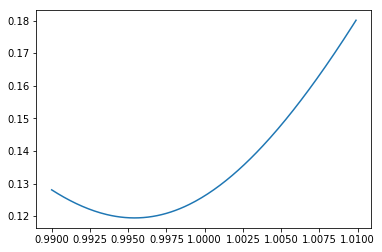

In [36]:
#print("Make predictions on the test set")
for gbm_info in gbm_list:
    key = gbm_info[0]
    gbm = gbm_info[1]
    
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(key) + "----valid_set----"+ 'RMSPE: {:.6f}'.format(error))
    
    
    dtest = xgb.DMatrix(xtest.values)
    test_probs = gbm.predict(dtest)

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+".csv", index=False)
    
    
    
    print("weight correction")
    W=[(0.9900+(i/10000)) for i in range(200)]
    S =[]
    for w in W:
        error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
        #print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print (str(key) + '------Best weight for Score:{}'.format(BS))
    
    w = float(BS.index[0])
    #yhat_new = yhat*w
    #error = 
    #print (str(key) + '------RMSPE for weight corretion {:6f}'.format(error))

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*w)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+"_fix.csv", index=False)

